<a href="https://colab.research.google.com/github/ganel1113s/fyp/blob/main/Federated_Learning_with_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q flwr[simulation] flwr-datasets[vision] torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.6/523.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not current

In [ ]:
!pip install -q fsspec==2024.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.6.1 which is incompatible.


In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import flwr

In [ ]:

import zipfile
import os

from collections import OrderedDict
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from datasets.utils.logging import disable_progress_bar
from torch.utils.data import DataLoader,Dataset

from flwr.client import Client, ClientApp, NumPyClient
from flwr.server import ServerApp, ServerConfig, ServerAppComponents
from flwr.server.strategy import FedAvg, FedAdagrad
from flwr.simulation import run_simulation,start_simulation
from flwr_datasets import FederatedDataset
from flwr.common import ndarrays_to_parameters, NDArrays, Scalar, Context,Metrics

DEVICE = torch.device("cuda")  # Try "cuda" to train on GPU
print(f"Training on {DEVICE}")
print(f"Flower {flwr.__version__} / PyTorch {torch.__version__}")
disable_progress_bar()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training on cuda
Flower 1.14.0 / PyTorch 2.5.1+cu121


In [ ]:
import optuna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
final_df = pd.read_parquet('/content/drive/MyDrive/FYP/N-BaIoT_small_unbalanced_(1).parquet')

In [ ]:
final_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0               1.000000       75.000000            0.000000   
1               1.106002       61.437635           19.497725   
2               2.105991       60.754994           10.754895   
3               3.105975       60.511916            7.416684   
4               4.105965       60.387240            5.658644   
...                  ...             ...                 ...   
205108          1.000000       60.000000            0.000000   
205109          1.000000       60.000000            0.000000   
205110          1.000000       60.000000            0.000000   
205111          1.000000       60.000000            0.000000   
205112          1.000000       60.000000            0.000000   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       75.000000            0.000000   
1               1.260128       63.096451           36.858761   
2               2.260121       61.726414           22.915699   
3               3.260111       61.196857           16.520386   
4               4.260104       60.915911           12.899777   
...                  ...             ...                 ...   
205108          1.000000       60.000000            0.000000   
205109          1.000000       60.000000            0.000000   
205110          1.000000       60.000000            0.000000   
205111          1.000000       60.000000            0.000000   
205112          1.000000       60.000000            0.000000   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0               1.000000       75.000000            0.000000   
1               1.638356       65.844478           53.509247   
2               2.638352       63.629278           41.267511   
3               3.638348       62.631771           32.550346   
4               4.638346       62.064377           26.703999   
...                  ...             ...                 ...   
205108          1.000000       60.000000            0.000000   
205109          1.000000       60.000000            0.000000   
205110          1.000000       60.000000            0.000000   
205111          1.000000       60.000000            0.000000   
205112          1.000000       60.000000            0.000000   

        MI_dir_L0.1_weight  ...  HpHp_L0.01_weight  HpHp_L0.01_mean  \
0                 1.000000  ...                1.0             75.0   
1                 1.956106  ...                1.0             60.0   
2                 2.956106  ...                1.0             60.0   
3                 3.956106  ...                1.0             60.0   
4                 4.956105  ...                1.0             60.0   
...                    ...  ...                ...              ...   
205108            1.000000  ...                1.0             60.0   
205109            1.000000  ...                1.0             60.0   
205110            1.000000  ...                1.0             60.0   
205111            1.000000  ...                1.0             60.0   
205112            1.000000  ...                1.0             60.0   

        HpHp_L0.01_std  HpHp_L0.01_magnitude  HpHp_L0.01_radius  \
0                  0.0                  75.0                0.0   
1                  0.0                  60.0                0.0   
2                  0.0                  60.0                0.0   
3                  0.0                  60.0                0.0   
4                  0.0                  60.0                0.0   
...                ...                   ...                ...   
205108             0.0                  60.0                0.0   
205109             0.0                  60.0                0.0   
205110             0.0                  60.0                0.0   
205111             0.0                  60.0                0.0   
205112             0.0                  60.0                0.0   

        HpHp_L0.01_covariance  HpHp_L0.01_p

## **Unzip Data file**

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/FYP/N-BaIoT.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/N-BaIoT')  # Extract to the default Colab directory


## **Create Parquet file**

In [ ]:
file_lst = []
file_path = '/content/N-BaIoT'
for file in os.listdir('/content/N-BaIoT'):
  if file[0].isdigit():
    file_lst.append(os.path.join(file_path,file))

In [ ]:
import pandas as pd

df_lst = []

for file in file_lst:
    # Read each CSV file into a DataFrame
    # Unbalanced benign and attack data
    if 'benign' in file:
      df = pd.read_csv(file).iloc[:16000]
    else:
      df = pd.read_csv(file).iloc[:800]
    # Add a feature column with the file name (without extension)
    file_name = os.path.splitext(os.path.basename(file))[0]
    df['client_id'] = int(file_name[0])  # Use file name without extension
    df['label'] = 0 if file_name.split('.')[1] == 'benign' else 1
    df['attack_type'] = file_name.split('.')[1]

    # Append the DataFrame to the list
    df_lst.append(df)

# Concatenate all DataFrames along the columns (axis=1)
final_df = pd.concat(df_lst)

# Display or save the final concatenated DataFrame
#print(final_df)


In [ ]:
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.to_parquet('N-BaIoT_small_unbalanced.parquet')

In [ ]:
final_df['client_id'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([4, 9, 8, 5, 3, 1, 2, 6, 7])

In [ ]:
del df_lst

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Load with HuggingFace Partitioner**



In [ ]:
from datasets import Dataset
from flwr_datasets.partitioner import PathologicalPartitioner

dataset = load_dataset('parquet',data_files = '/content/drive/MyDrive/FYP/N-BaIoT.parquet')

partitioner = PathologicalPartitioner(num_partitions=9,partition_by = 'client_id',num_classes_per_partition=1,class_assignment_mode = 'deterministic',shuffle = False)
partitioner.dataset = dataset
partition = partitioner.load_partition(partition_id=0)

In [ ]:
dataset = Dataset.from_pandas(final_df) ## High RAM and runtime

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataset, transform=None):
        """
        Args:
            dataset: a Huggingface dataset after partition
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataset = dataset.set_format('torch')
        self.data = self.dataset.remove_columns('label')
        self.labels = self.dataset['label']
        self.transform = transform

    def __len__(self):
        # Return the number of samples
        return len(self.data)

    def __getitem__(self, idx):
        # Get the data and label for a given index
        sample = self.data[idx]
        label = self.labels[idx]

        # Apply optional transformation (e.g., normalization)
        if self.transform:
            sample = self.transform(sample)

        return sample, label


In [ ]:
def min_max_normalize(example,feature_columns,min_values,max_values):
  for col in feature_columns:
    min_val,max_val = min_values[col],max_values[col]
    if min_val == max_val:
      example[col] = 0
    else:
      example[col] = (example[col] - min_values[col]) / (max_values[col] - min_values[col])
  return example

In [ ]:
NUM_CLIENTS = 9
BATCH_SIZE = 32


def load_datasets(dataset,model_type:str,partition_id: int):
    partitioner = PathologicalPartitioner(num_partitions=9,partition_by = 'client_id',num_classes_per_partition=1,class_assignment_mode = 'deterministic',shuffle = False)
    partitioner.dataset = dataset
    partition = partitioner.load_partition(partition_id)
    # Split in chronological order and leave 2% space between train and test
    # if autoencoder is used, split the benign data into train, validation/threshold-selection and test set, with a ratio of 39:39:20, with the same amount of attack data
    partition_train_test = {}
    if model_type == 'Autoencoder':
      # select normal data profile to train
      partition_benign = partition.filter(lambda packet: packet["label"]==1).remove_columns(['client_id','__index_level_0__'])
      partition_attack = partition.filter(lambda packet: packet["label"]==0).remove_columns(['client_id','__index_level_0__'])
      partition_train_test['train'] = partition_benign.select([i for i in range(int(0.39*len(partition_benign)))])
      partition_train_test['val'] = partition_benign.select([i for i in range(int(0.39*len(partition_benign)),int(0.78*len(partition_benign)))])
      partition_train_test['test'] = concatenate_datasets([partition_benign.select([i for i in range(int(0.8*len(partition_benign)),int(len(partition_benign)))]),partition_attack])
    partitioni_train_test['train']
    def apply_transforms(batch):

      mean = batch.mean()
      std = batch.std()
      batch = (batch - mean) / std
      return batch
    # Create train/val for each partition and wrap it into DataLoader
    trainloader = DataLoader(
        partition_train_test["train"].with_transform(apply_transforms), batch_size=BATCH_SIZE, shuffle=False
    )
    valloader = DataLoader(partition_train_test["val"].with_transform(apply_transforms), batch_size=BATCH_SIZE,shuffle = False)
    testset = partition_train_test['test'].with_transform(apply_transforms)
    testloader = DataLoader(testset, batch_size=BATCH_SIZE,shuffle = False)
    return trainloader, valloader, testloader

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Load with Pandas DataFrame**

### **Prepare dataset for sklearn classifiers**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

def prepare_dataset(dataset,partition_id,label_col_num):
  partition = dataset.loc[dataset['client_id'] == partition_id+1]
  feature_columns = partition.columns[:-label_col_num]
  partition_train_test = {}
  partition_benign = partition.loc[partition['label']==0]
  partition_attack = partition.loc[partition['label']==1]
  partition_train_test['train'] = partition_benign.iloc[:int(0.39*len(partition_benign))-1]
  partition_train_test['val'] = partition_benign.iloc[int(0.39*len(partition_benign)):int(0.78*len(partition_benign))]
  partition_train_test['test_benign'] = partition_benign.iloc[int(0.8*len(partition_benign)):]
  partition_train_test['test_attack'] = partition_attack.iloc[:int(0.2*len(partition_benign))]
  scaler = MinMaxScaler()
  scaler.fit(partition_train_test['train'][feature_columns])
  X_train = scaler.transform(partition_train_test['train'][feature_columns])
  y_train = partition_train_test['train']['label']
  X_val = scaler.transform(partition_train_test['val'][feature_columns])
  y_val = partition_train_test['val']['label']
  X_test_benign = scaler.transform(partition_train_test['test_benign'][feature_columns])
  y_test_benign = partition_train_test['test_benign']['label']
  X_test_attack = scaler.transform(partition_train_test['test_attack'][feature_columns])
  y_test_attack = partition_train_test['test_attack']['label']
  return X_train,y_train,X_val,y_val,X_test_benign,y_test_benign,X_test_attack,y_test_attack

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def visualize_clustering(X, true_labels, predicted_labels, cluster_centers):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Ground Truth
    scatter = axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', s=50)
    legend1 = axes[0].legend(
        *scatter.legend_elements(),
        title="True Labels",
        loc="upper right"
    )
    axes[0].add_artist(legend1)
    axes[0].set_title("Ground Truth Clustering")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")

    # K-Means Clustering
    axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50)
    axes[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
    axes[1].set_title("K-Means Clustering")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_outliers(X, true_labels, predicted_labels):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Ground Truth
    scatter = axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', s=50)
    legend1 = axes[0].legend(
        *scatter.legend_elements(),
        title="True Labels",
        loc="upper right"
    )
    axes[0].add_artist(legend1)
    axes[0].set_title("Ground Truth Clustering")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")

    # One Class SVM
    scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50)
    legend2 = axes[1].legend(
        *scatter2.legend_elements(),
        title="Predicted Labels",
        loc="upper right"
    )
    axes[1].add_artist(legend2)
    axes[1].set_title("Outliers with One Class SVM")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

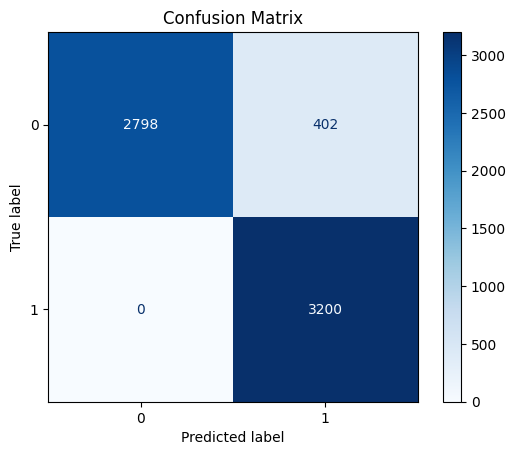

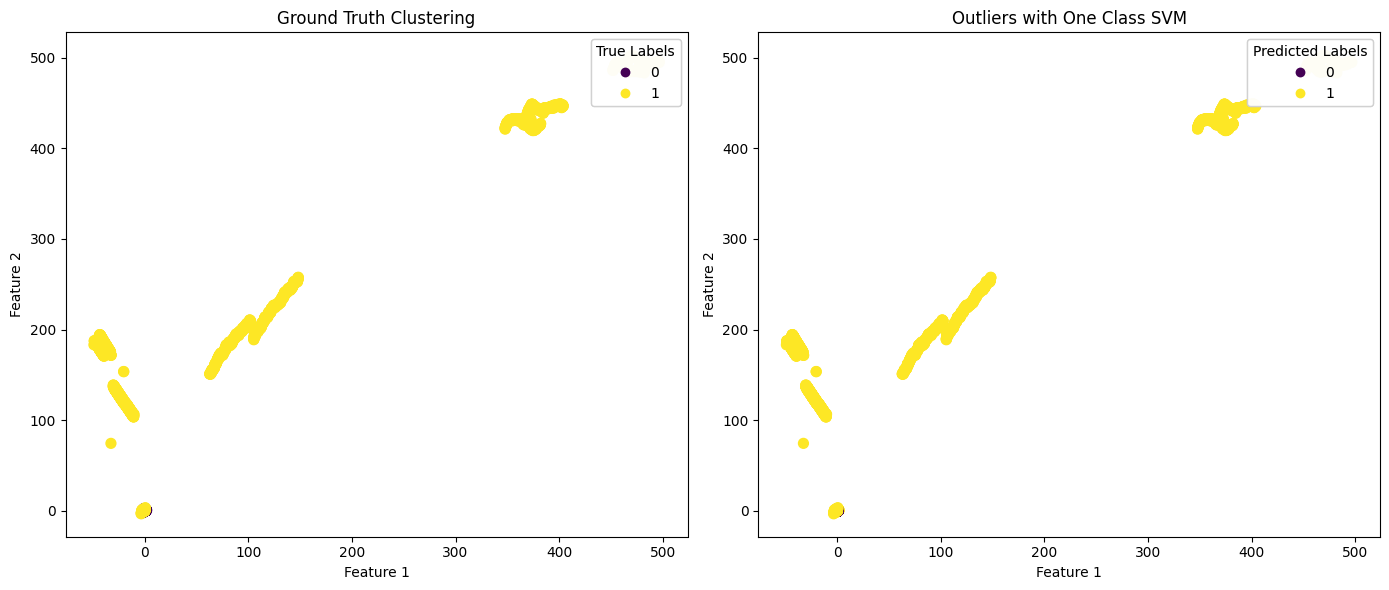

Client_id 0:0.9371875


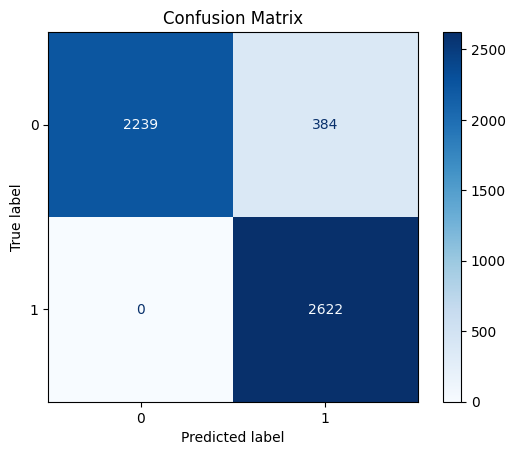

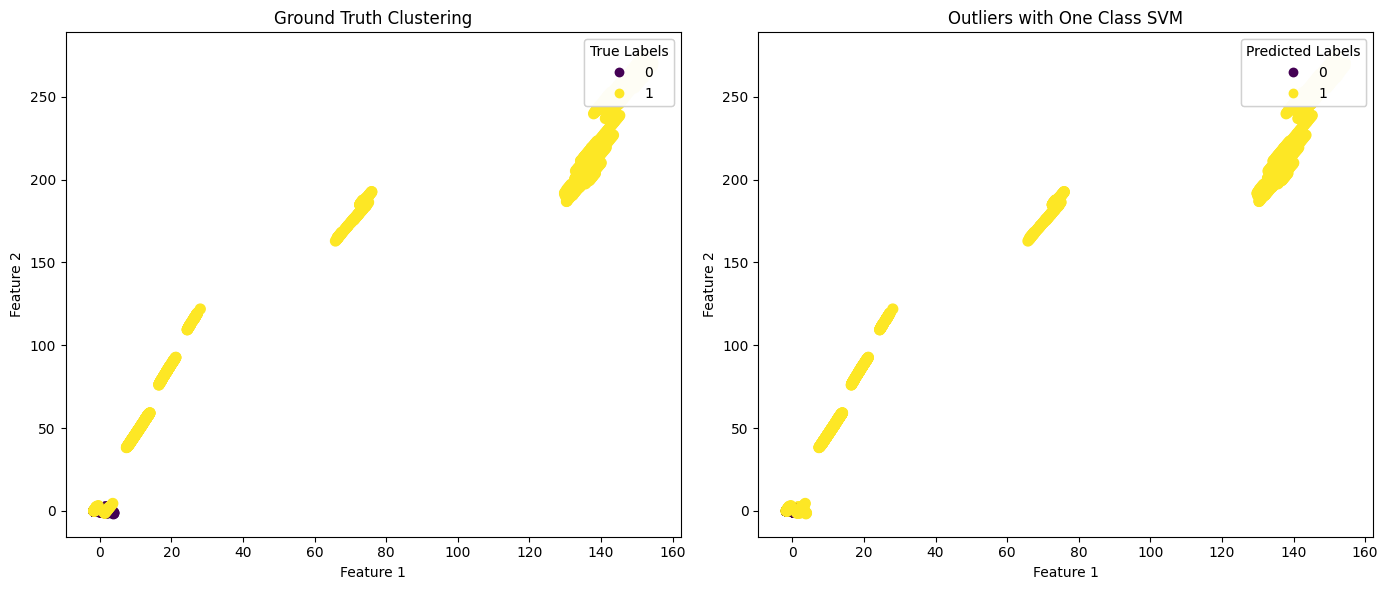

Client_id 1:0.926787416587226


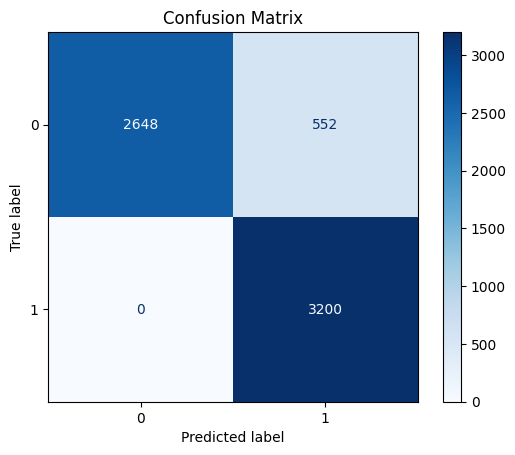

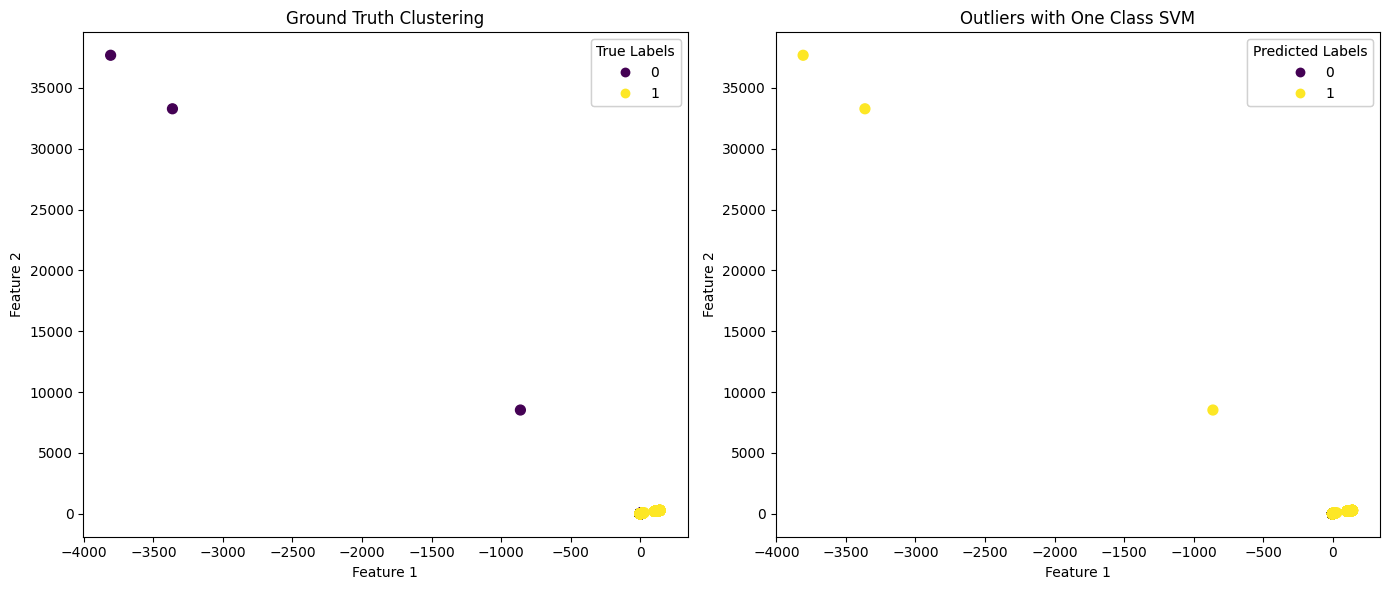

Client_id 2:0.91375


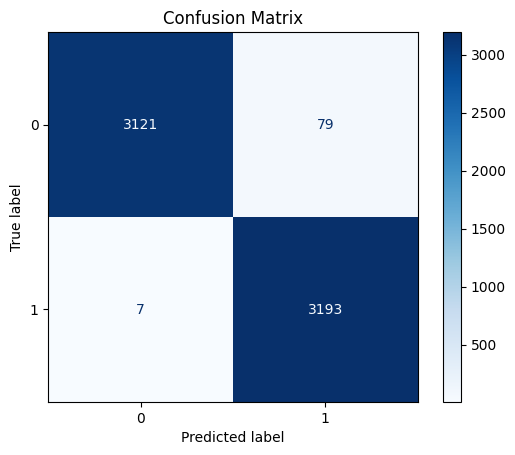

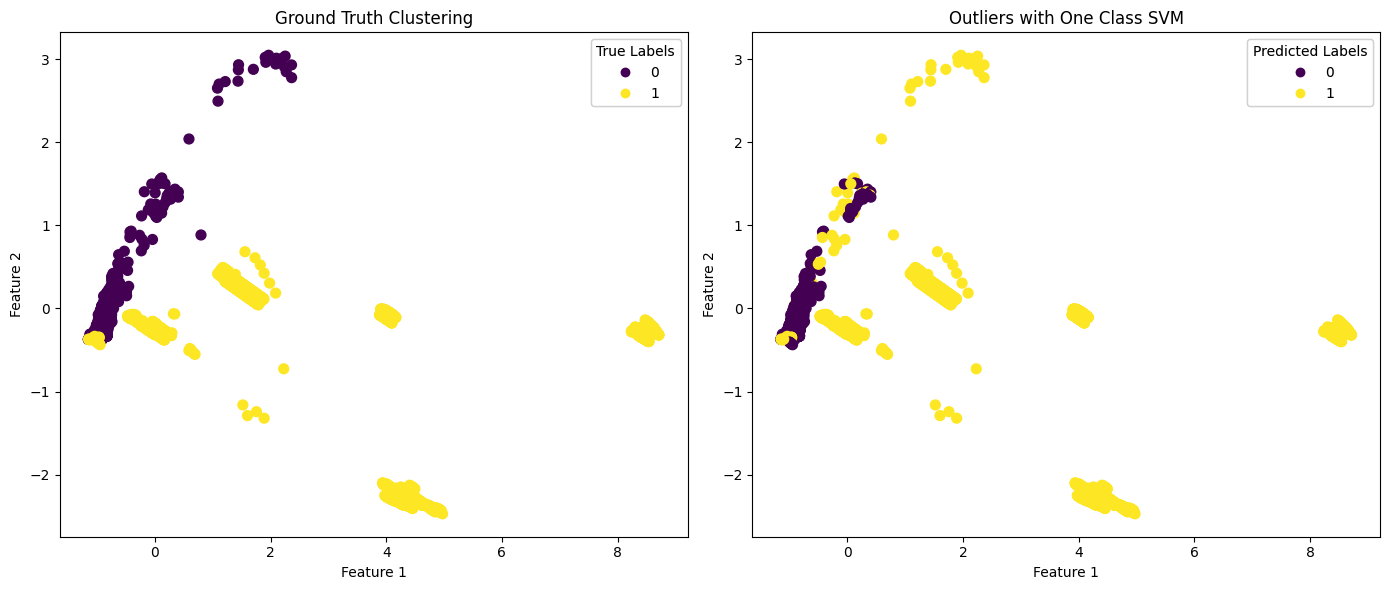

Client_id 3:0.9865625


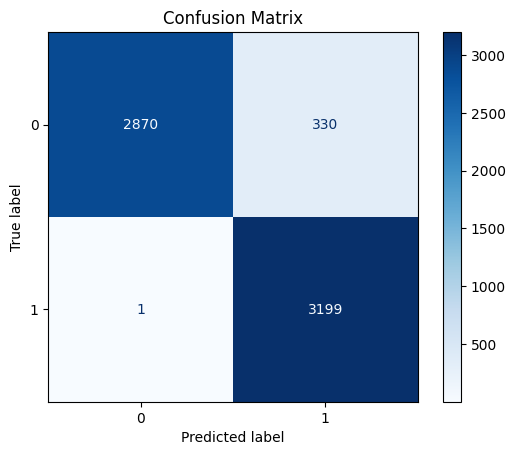

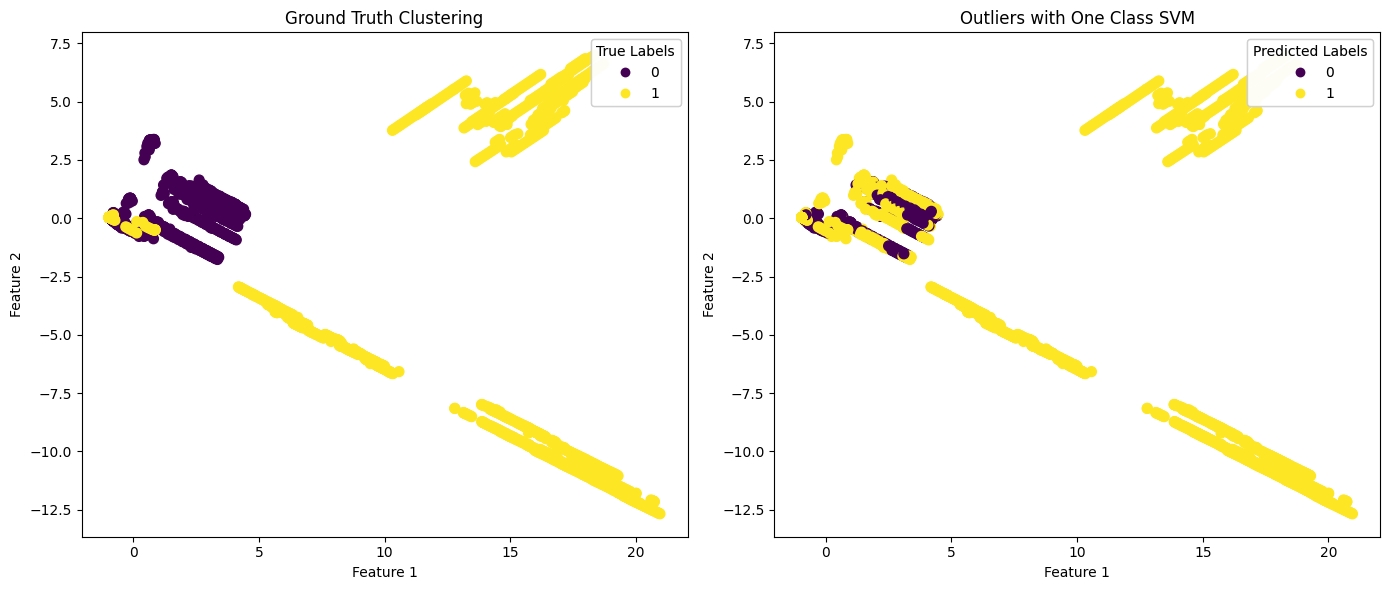

Client_id 4:0.94828125


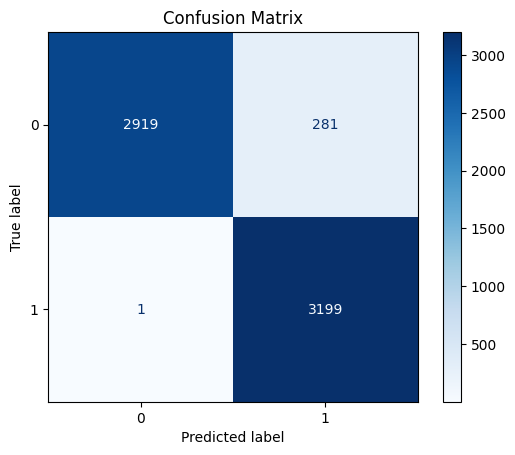

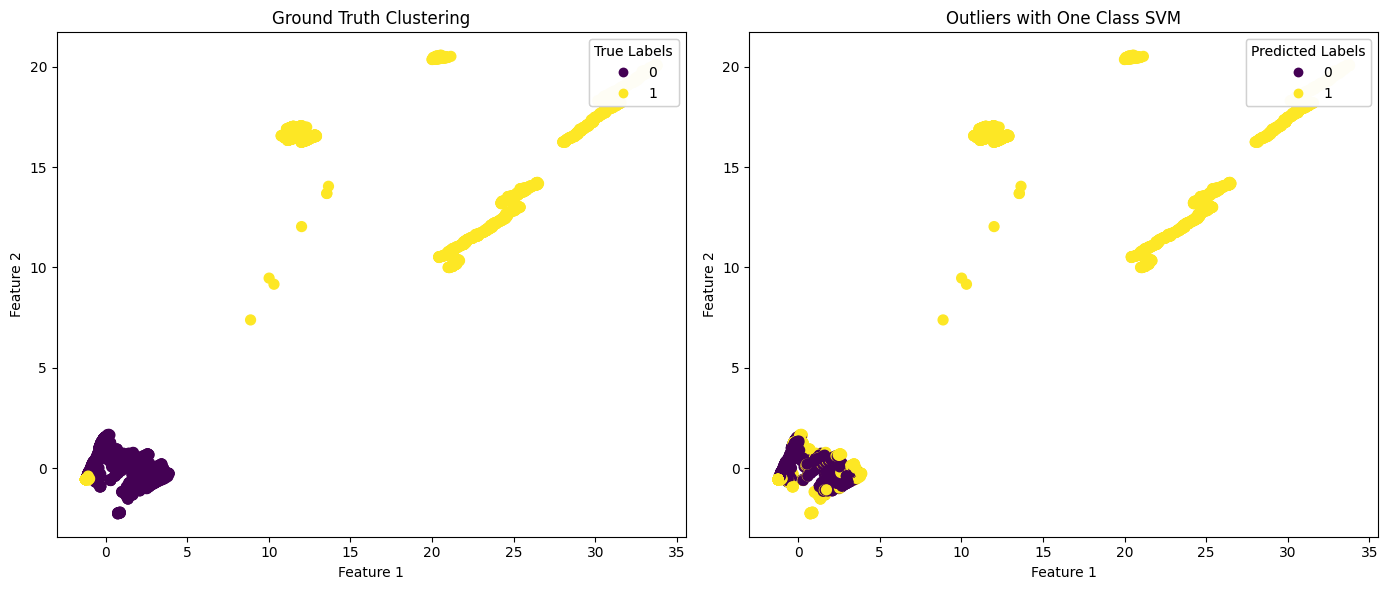

Client_id 5:0.9559375


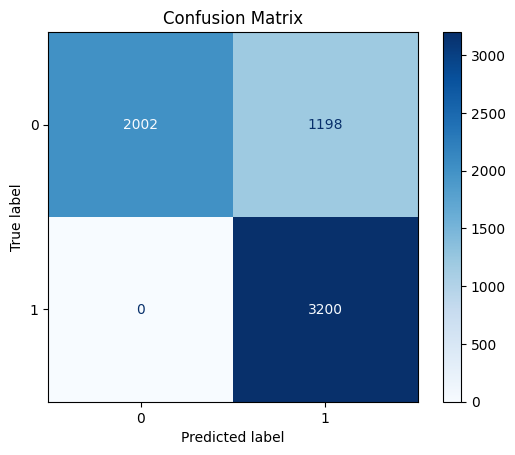

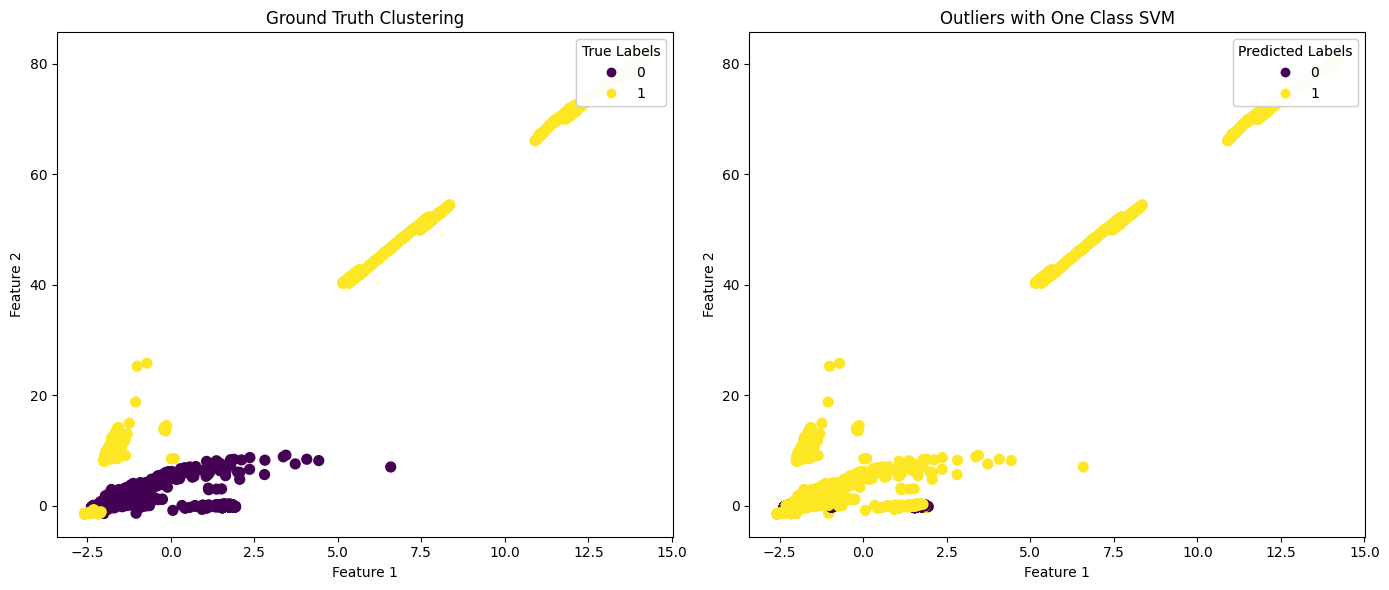

Client_id 6:0.8128125


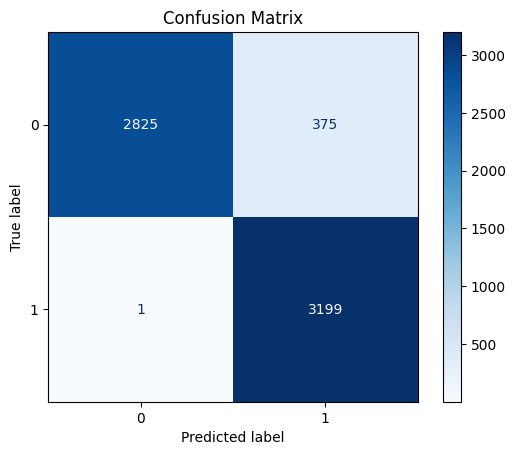

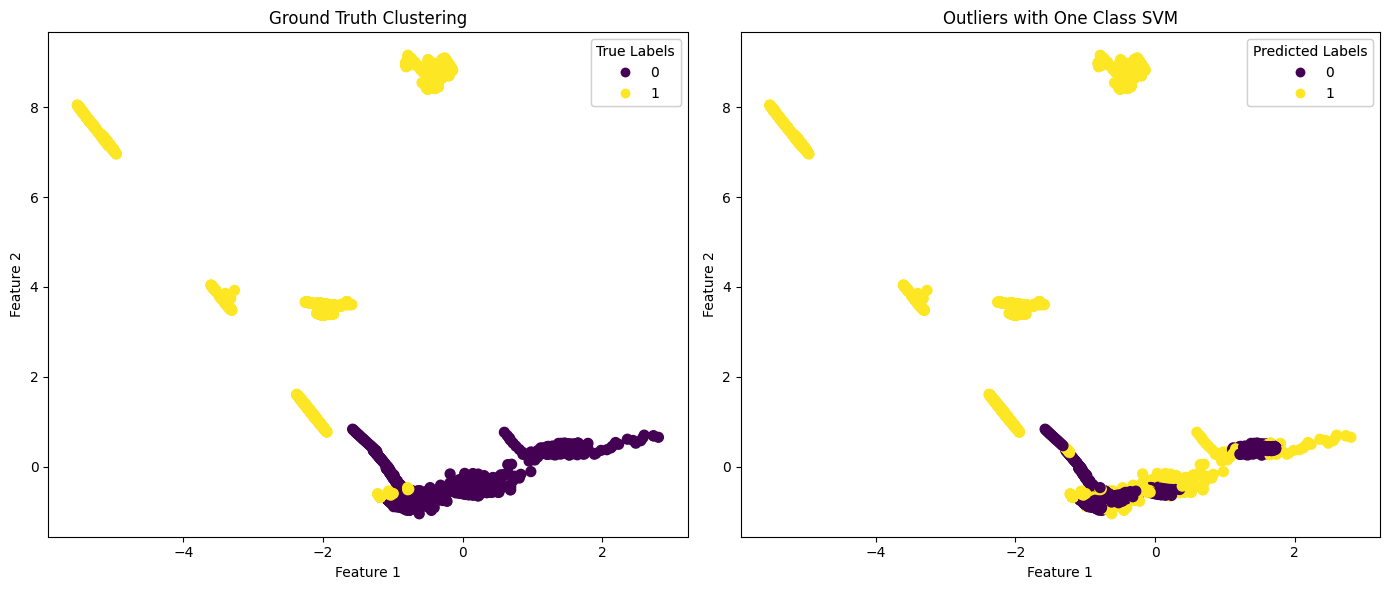

Client_id 7:0.94125


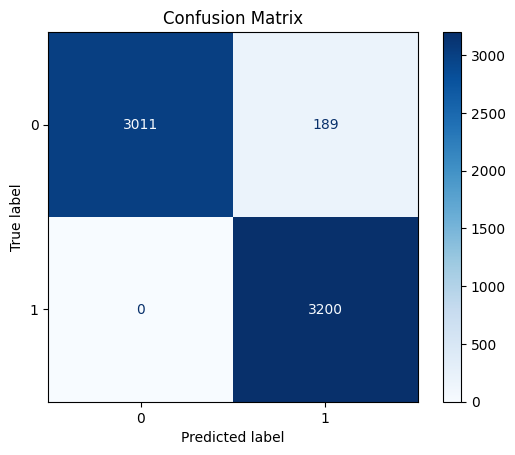

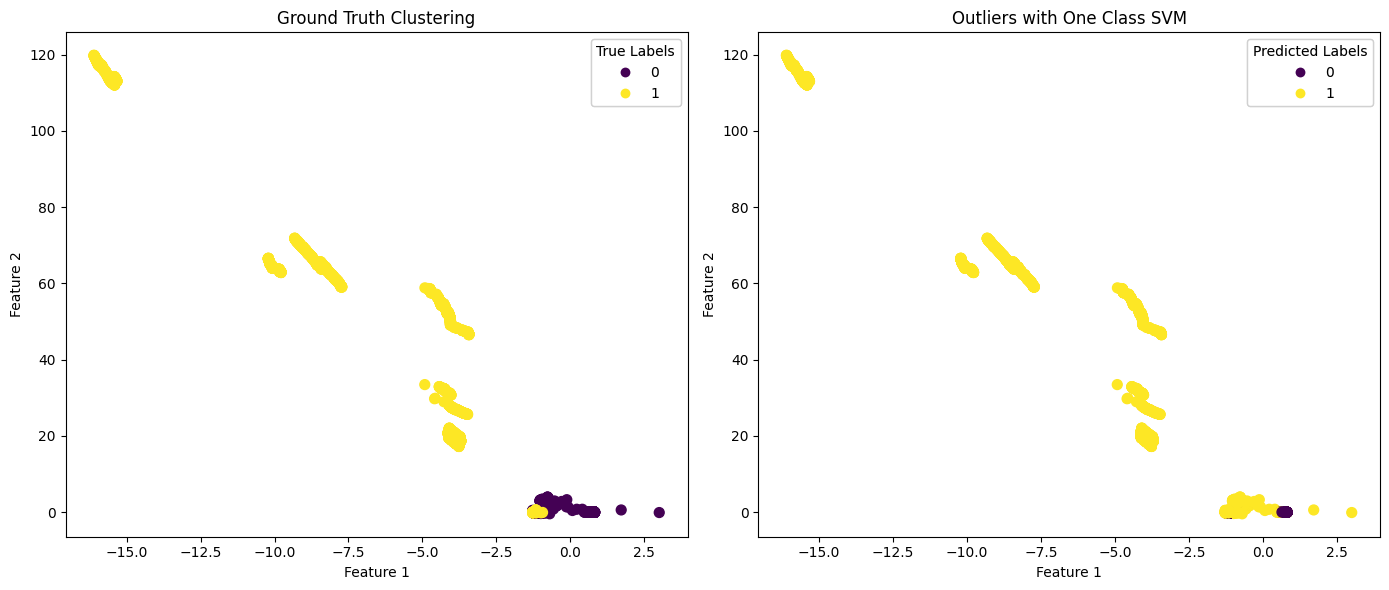

Client_id 8:0.97046875
Weighted Average Accuracy:0.9326778279741341


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy_list = []
sample_size_list = []
tpr_list = []
fpr_list = []
for i in range(9):
  X_train,_,_,_,X_Benign,y_Benign,X_Attack,y_Attack = prepare_dataset(final_df,partition_id=i,label_col_num=3)
  X_test = np.concatenate((X_Benign,X_Attack),axis=0)
  y_test = np.concatenate((y_Benign,y_Attack),axis=0)
  pca = PCA(n_components=35)
  pca = pca.fit(X_train)
  train_reduced = pca.transform(X_train)
  test_reduced = pca.transform(X_test)
  oc_svm = OneClassSVM(kernel='rbf', gamma=0.4, nu=0.1)
  oc_svm.fit(train_reduced)
  predictions = oc_svm.predict(test_reduced)
  y_predict = (predictions < 0)
  cm = confusion_matrix(y_test, y_predict)
  tn, fp, fn, tp = cm.ravel()
  tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
  fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
  # Plot confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Adjust labels if necessary
  disp.plot(cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.show()
  visualize_outliers(test_reduced,y_test,y_predict)
  accuracy = (np.sum(y_test == y_predict))/len(y_test)
  accuracy_list.append(accuracy)
  tpr_list.append(tpr)
  fpr_list.append(fpr)
  sample_size_list.append(len(y_test))
  print(f'Client_id {i}:{accuracy}')
weighted_average = np.sum(np.multiply(np.array(accuracy_list),np.array(sample_size_list)))/np.sum(np.array(sample_size_list))
print(f'Weighted Average Accuracy:{weighted_average}')

In [ ]:
fpr_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.125625,
 0.14639725505146778,
 0.1725,
 0.0246875,
 0.103125,
 0.0878125,
 0.374375,
 0.1171875,
 0.0590625]

In [ ]:
tpr_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1.0, 1.0, 1.0, 0.9978125, 0.9996875, 0.9996875, 1.0, 0.9996875, 1.0]

In [ ]:
accuracy_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.9371875,
 0.926787416587226,
 0.91375,
 0.9865625,
 0.94828125,
 0.9559375,
 0.8128125,
 0.94125,
 0.97046875]

In [ ]:
sample_size_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[6400, 5245, 6400, 6400, 6400, 6400, 6400, 6400, 6400]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Client_id 0:0.09680237249504438


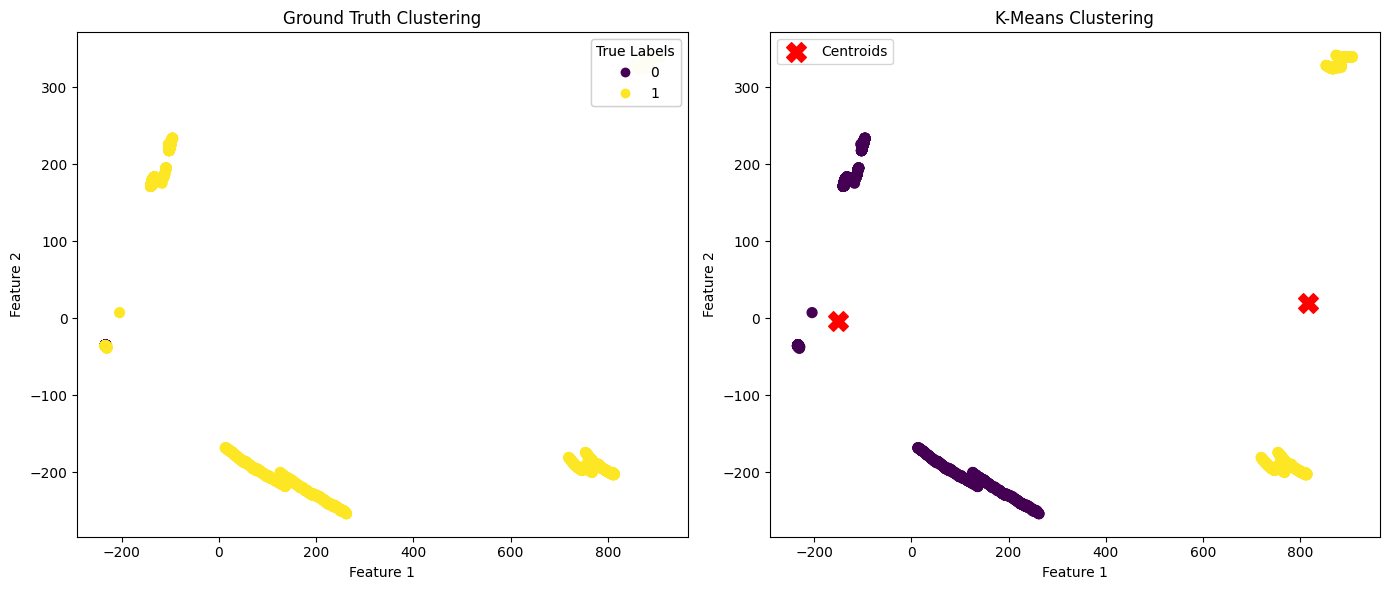

Client_id 1:0.22436487541708813


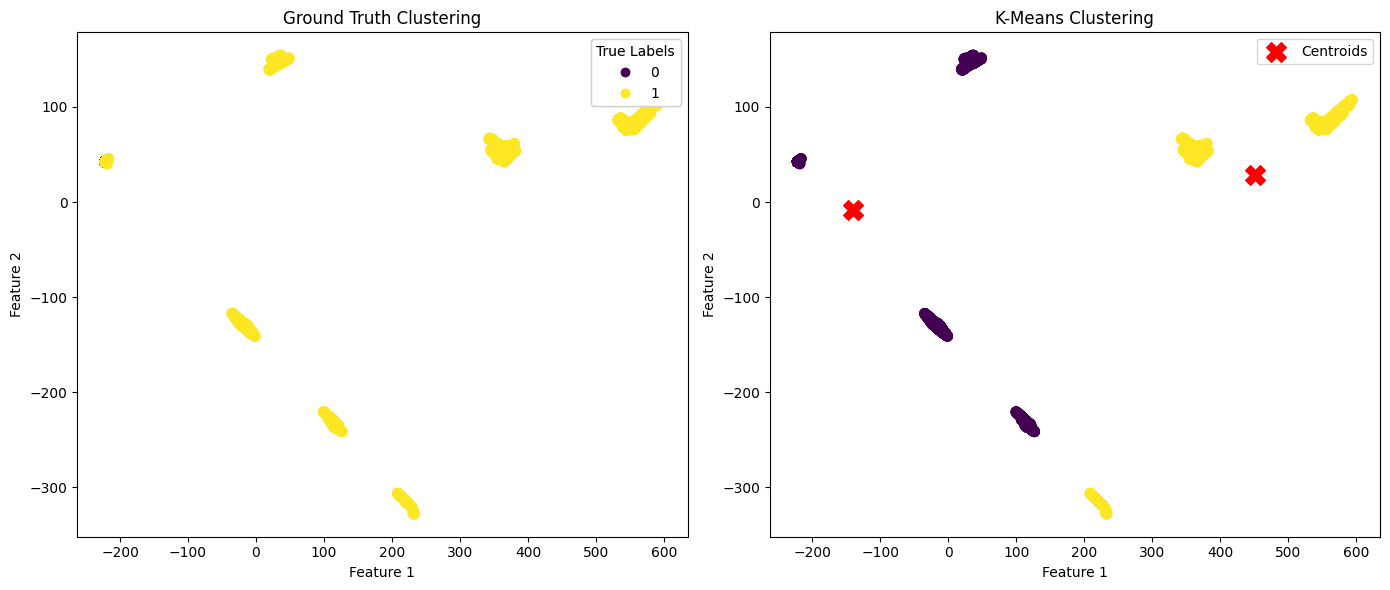

Client_id 2:1.9534306049422092e-07


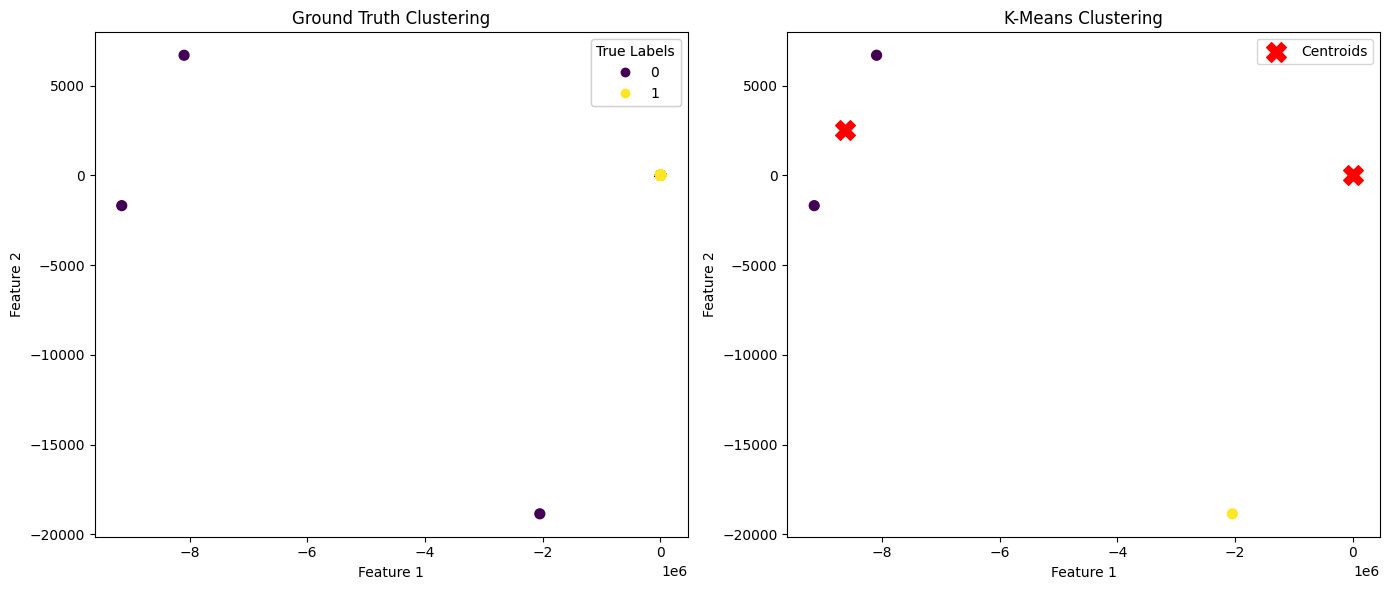

Client_id 3:0.5433789807113054


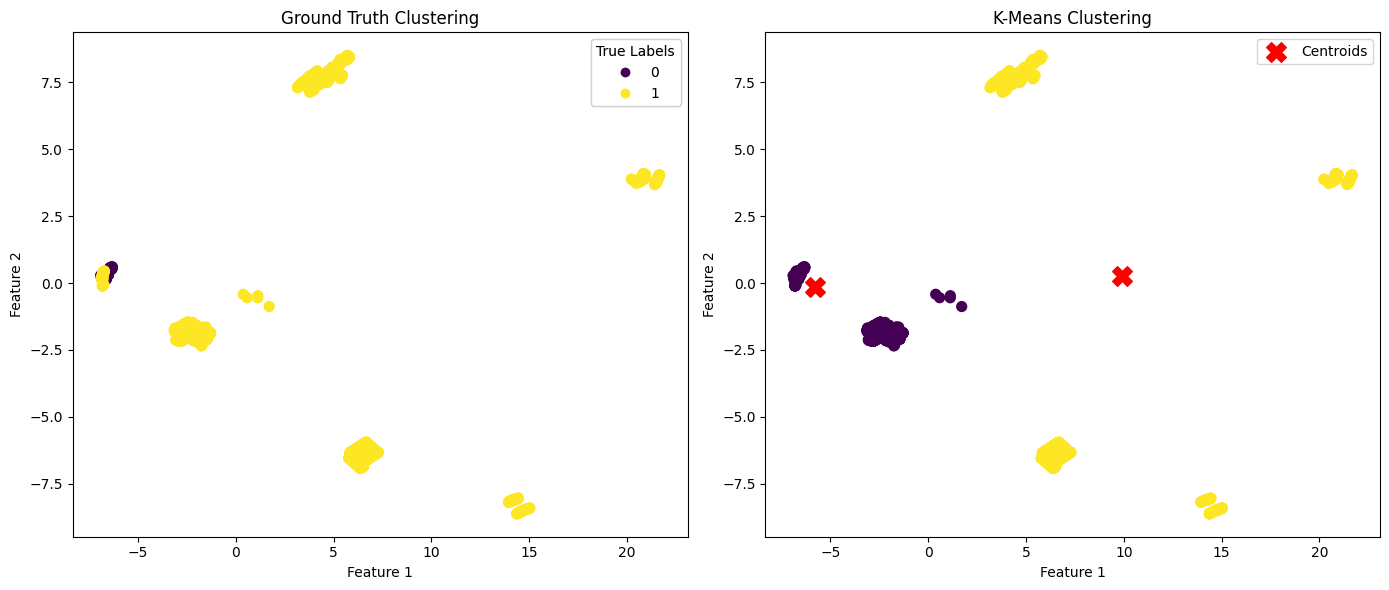

Client_id 4:0.3754561915911788


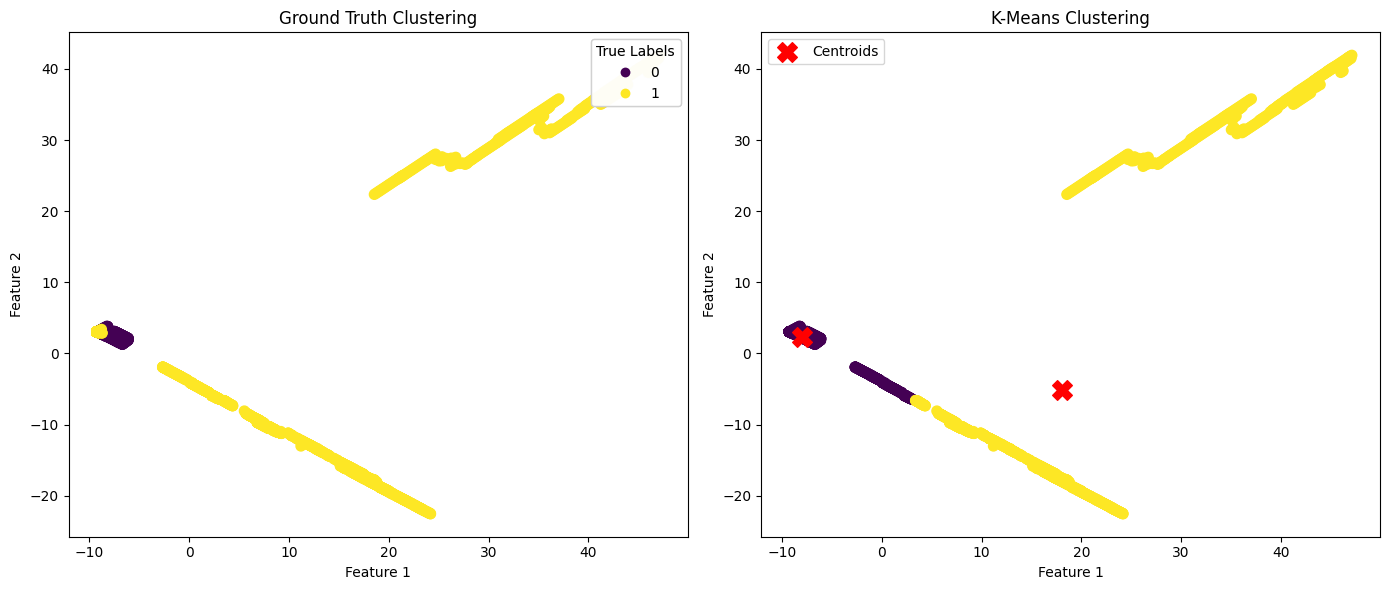

Client_id 5:0.2729185328022476


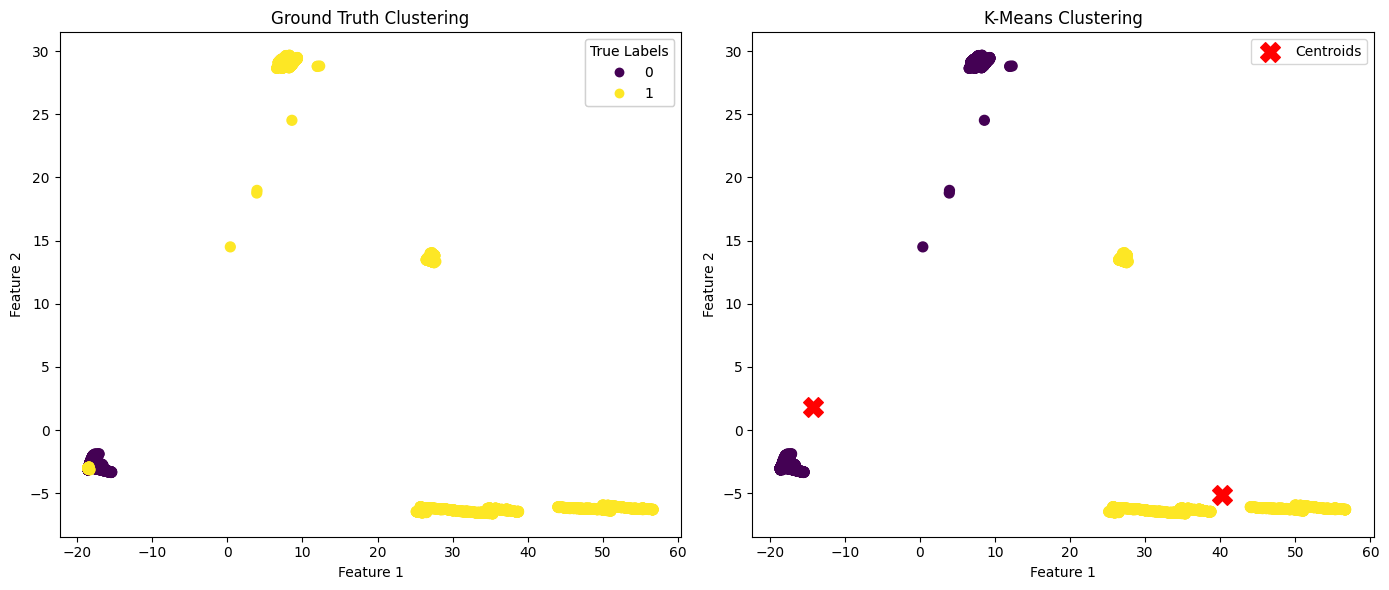

Client_id 6:0.2418531268670744


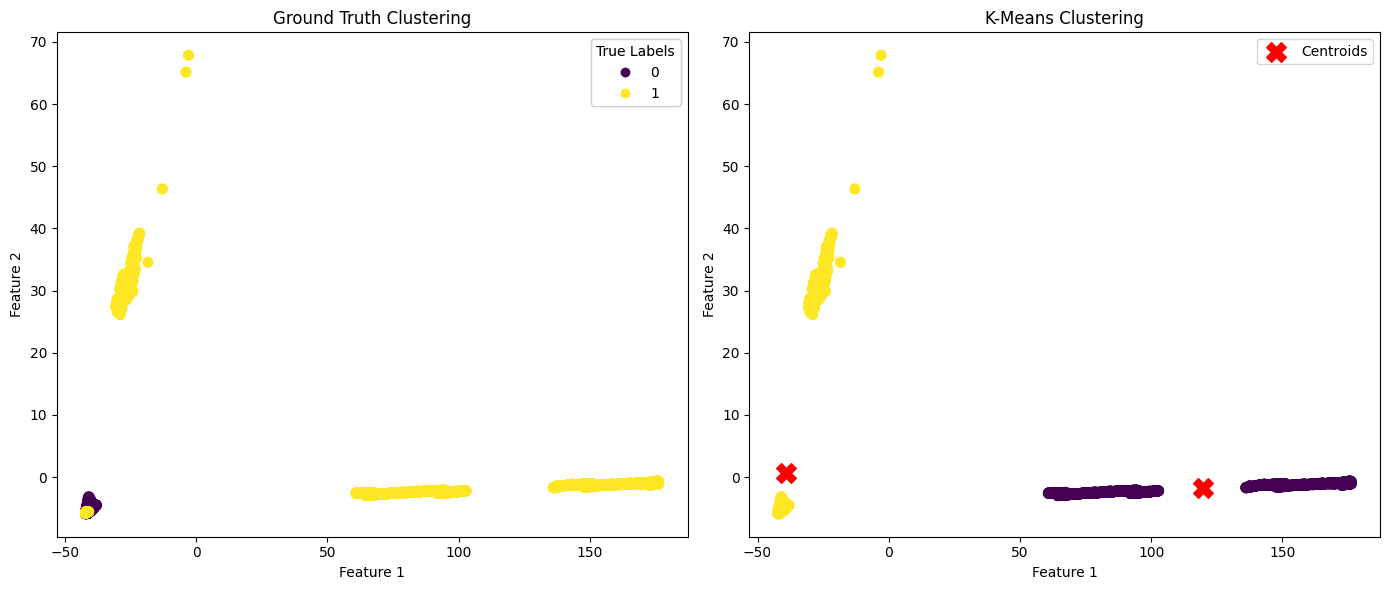

Client_id 7:0.24462781909282447


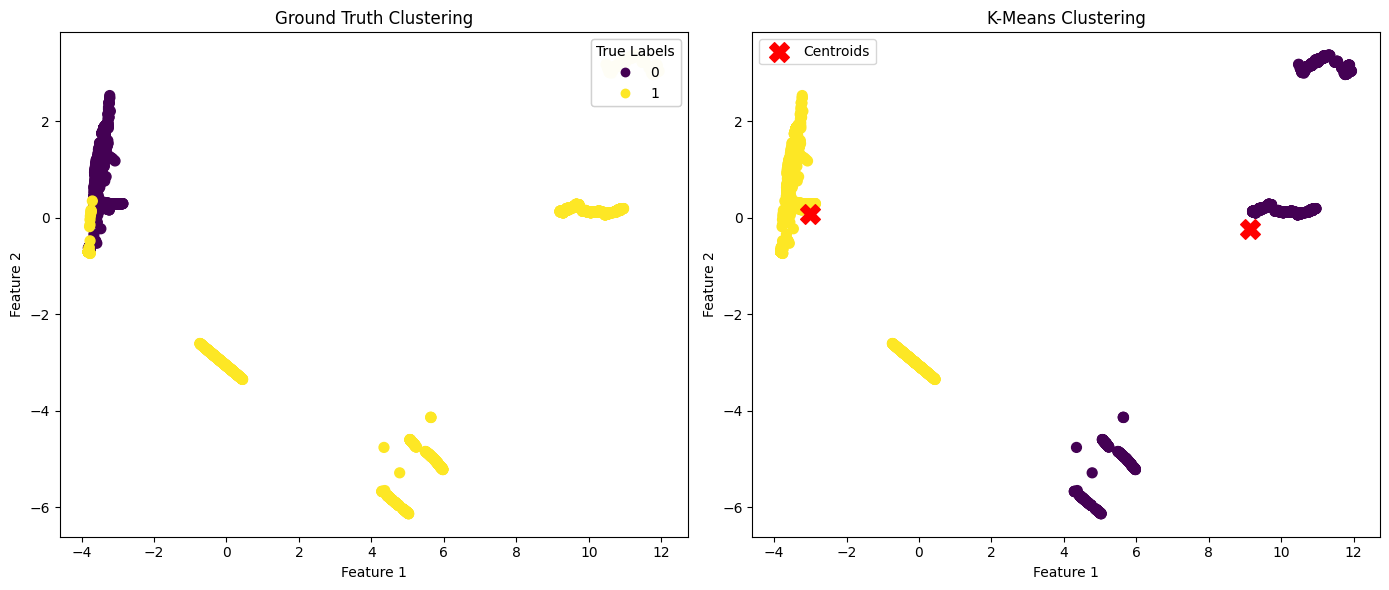

Client_id 8:0.4289463808466739


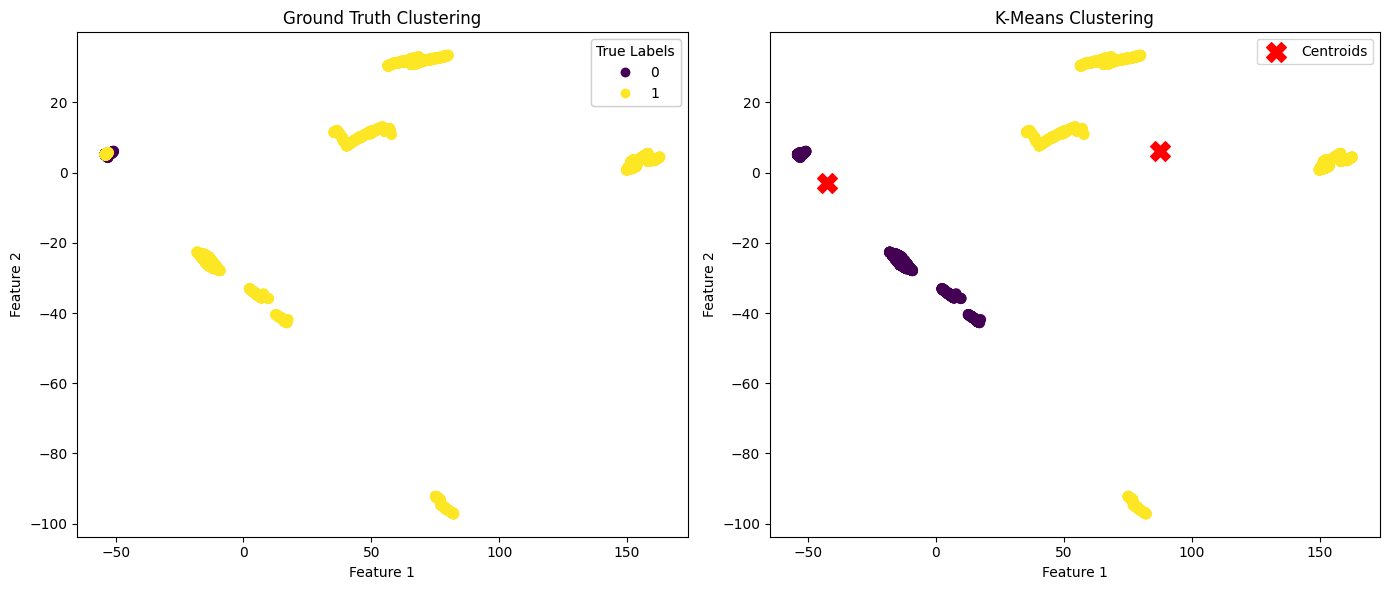

In [ ]:
# with attack data about two times benign data in the tetst dataset
rand_score_list = []
for i in range(9):
  _,_,_,_,X_Benign,y_Benign,X_Attack,y_Attack = prepare_dataset(final_df,partition_id=i,label_col_num=3)
  data = np.concatenate((X_Benign,X_Attack),axis=0)
  labels = np.concatenate((y_Benign,y_Attack),axis=0)
  pca = PCA(n_components=35)
  reduced_data = pca.fit_transform(data)
  kmeans = KMeans(init="random", n_clusters=2, n_init='auto', random_state=0)
  label_predicted = kmeans.fit_predict(reduced_data)
  ad_ri = adjusted_rand_score(labels,label_predicted)
  rand_score_list.append(rand_score_list)
  print(f'Client_id {i}:{ad_ri}')
  cluster_centers = kmeans.cluster_centers_
  visualize_clustering(reduced_data, labels, label_predicted, cluster_centers)

In [ ]:
indices = range(len(rand_score_list))

# Plot the bar chart
plt.bar(indices, rand_score_list, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Client ID")
plt.ylabel("Adjsuted Random Score")
plt.title("Performance of K-Means Clustering on Invidual Clients")
plt.xticks(indices)  # Set x-ticks to match indices

# Show the plot
plt.show()

Client_id 0:0.09680237249504438


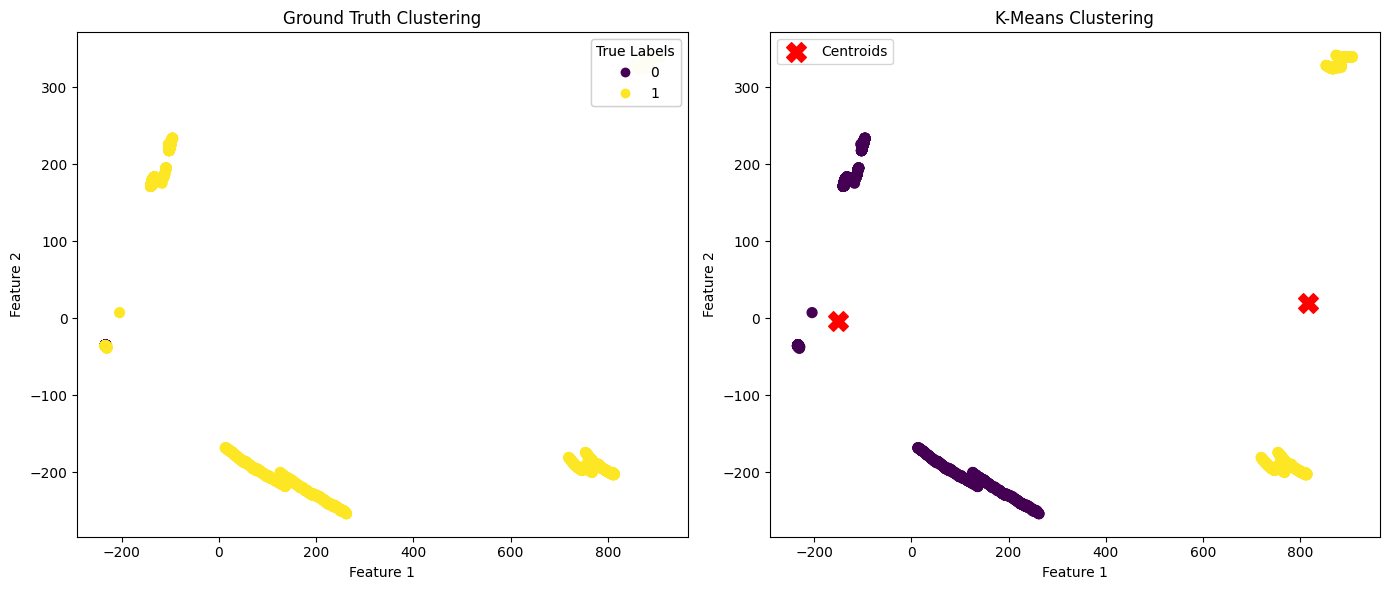

Client_id 1:0.22436487541708813


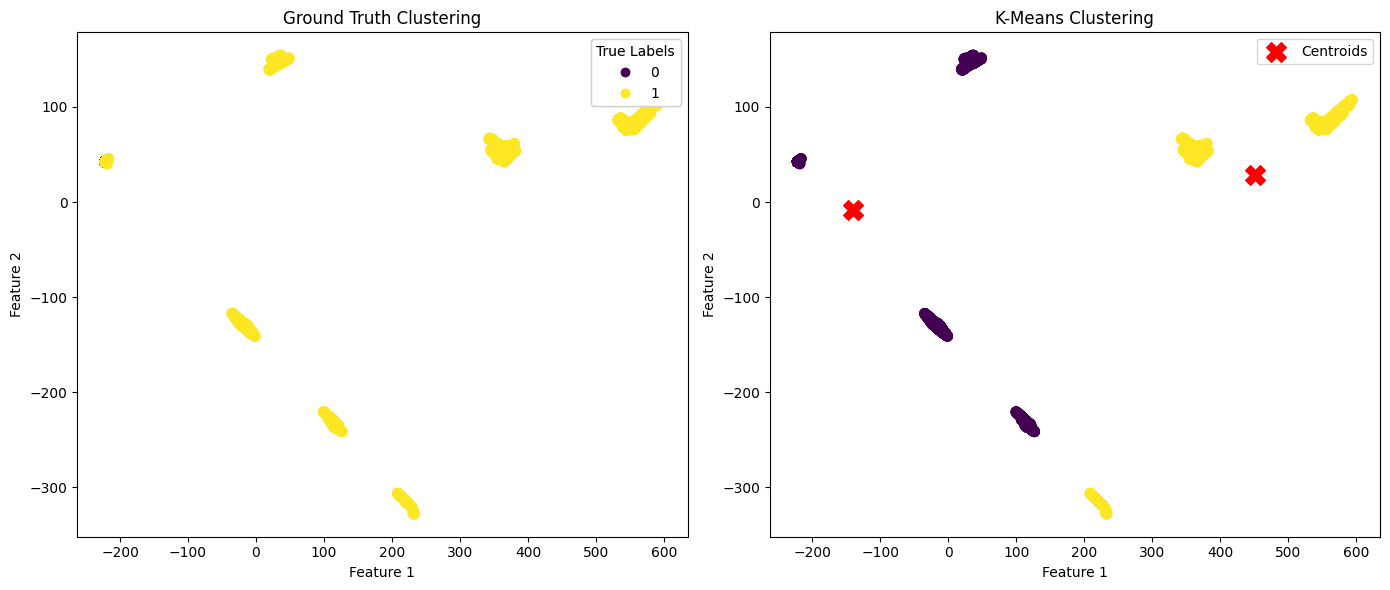

Client_id 2:1.9534306049422092e-07


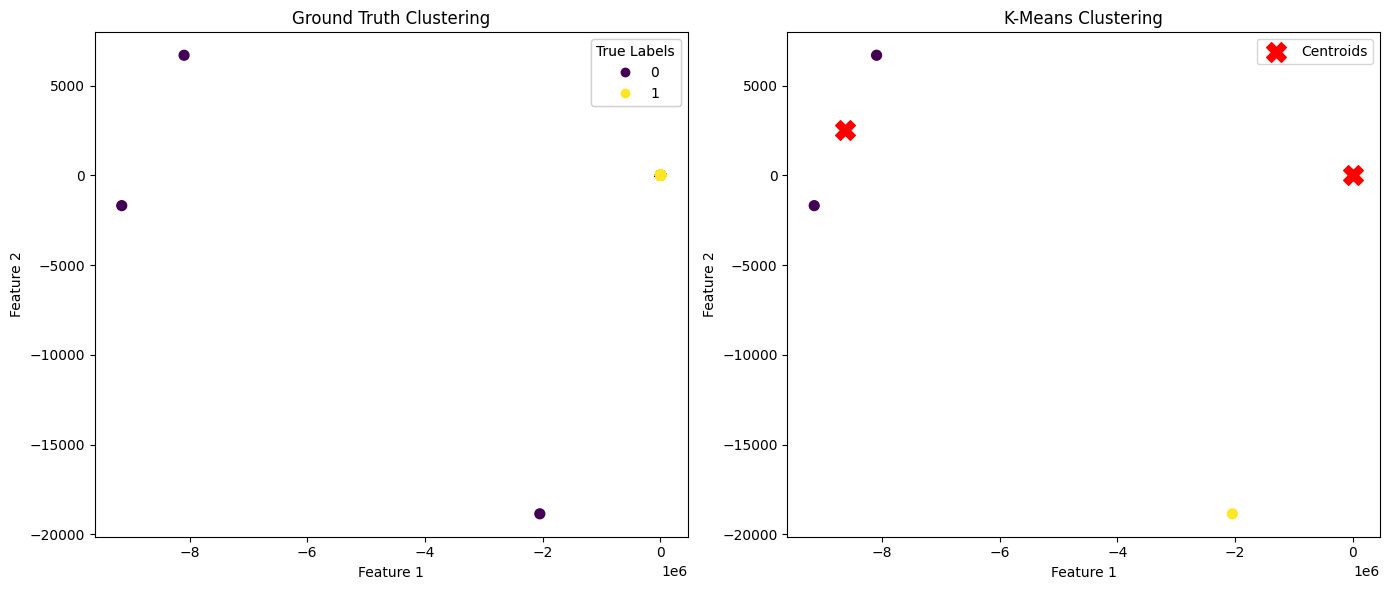

Client_id 3:0.5433789807113054


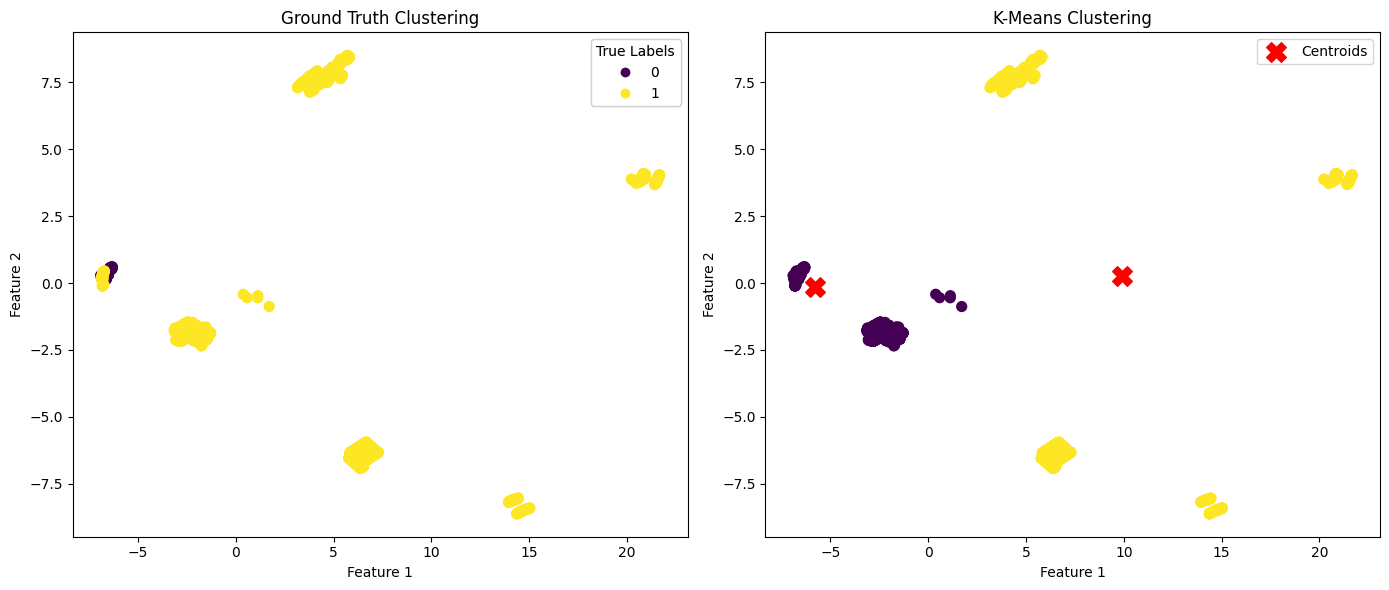

Client_id 4:0.3754561915911788


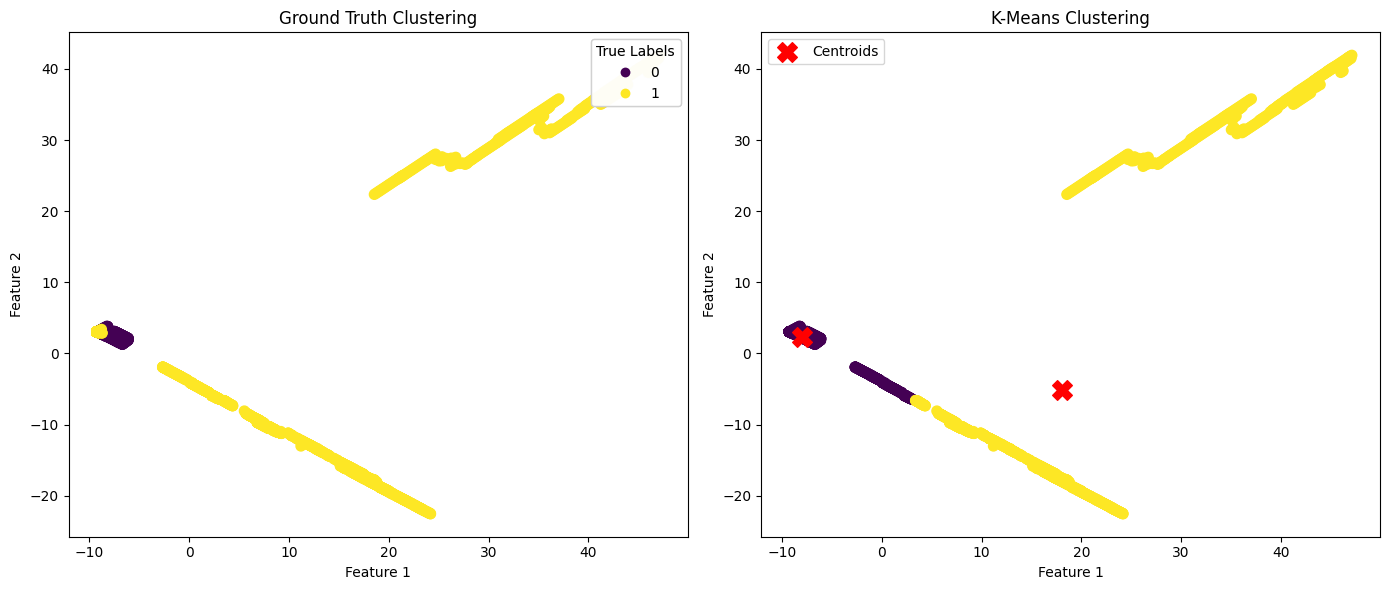

Client_id 5:0.2729185328022476


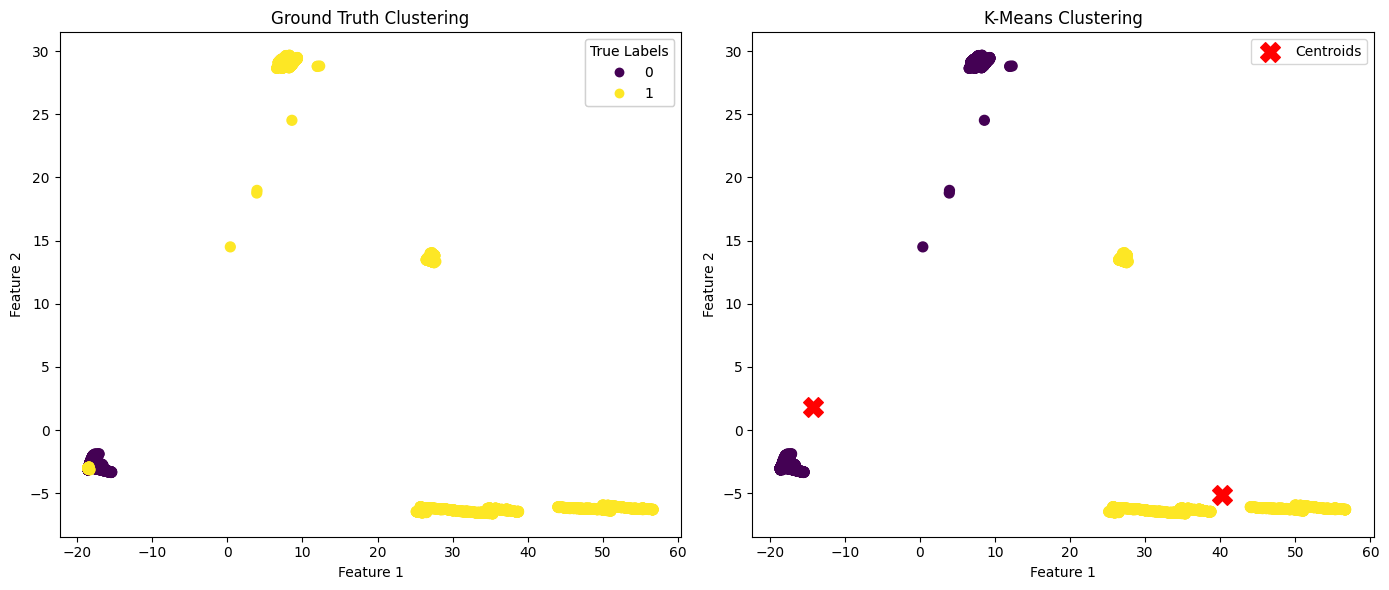

Client_id 6:0.2418531268670744


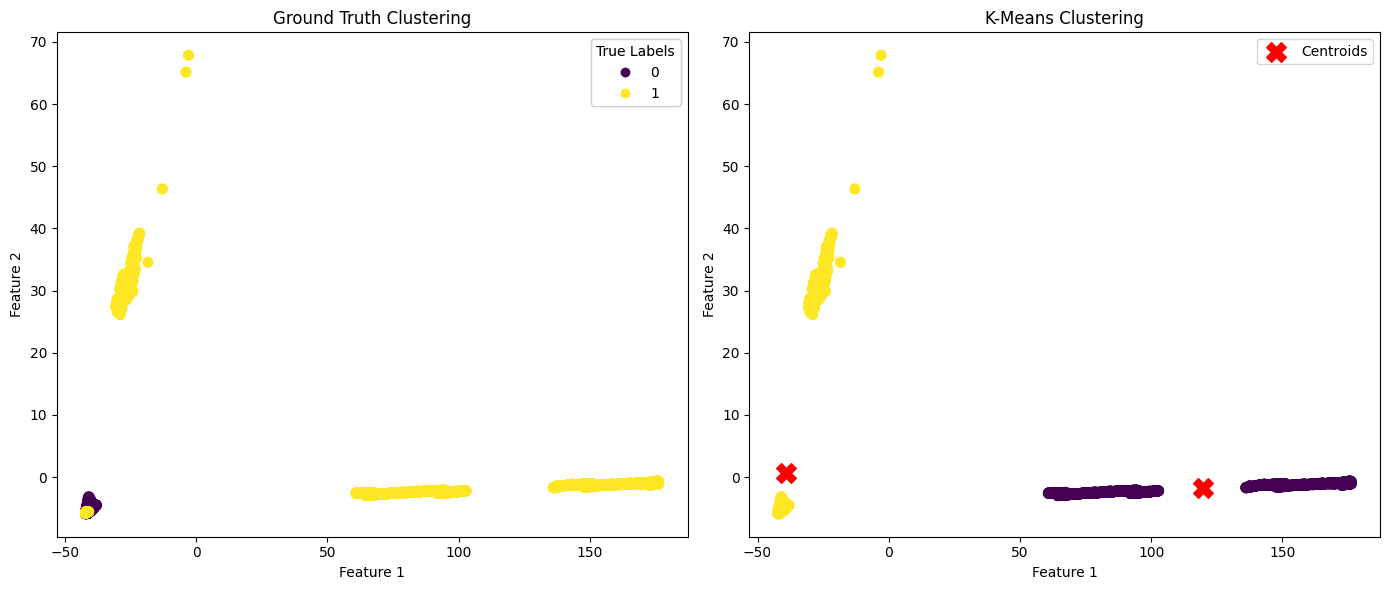

Client_id 7:0.24462781909282447


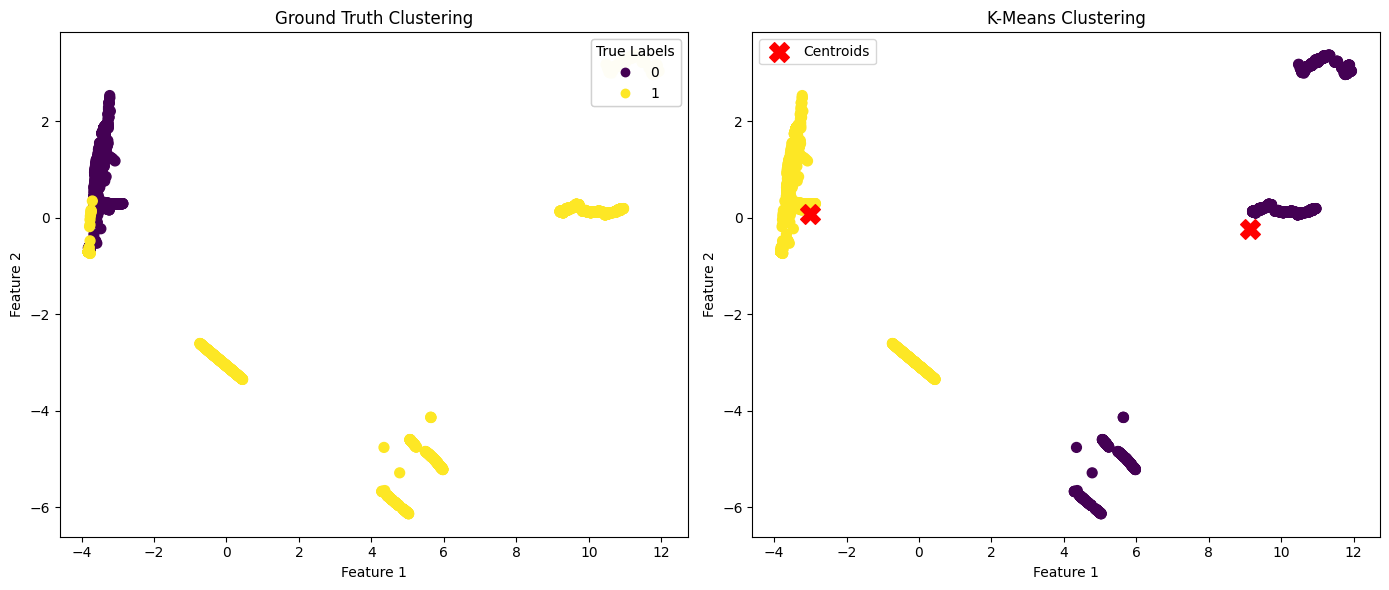

Client_id 8:0.4289463808466739


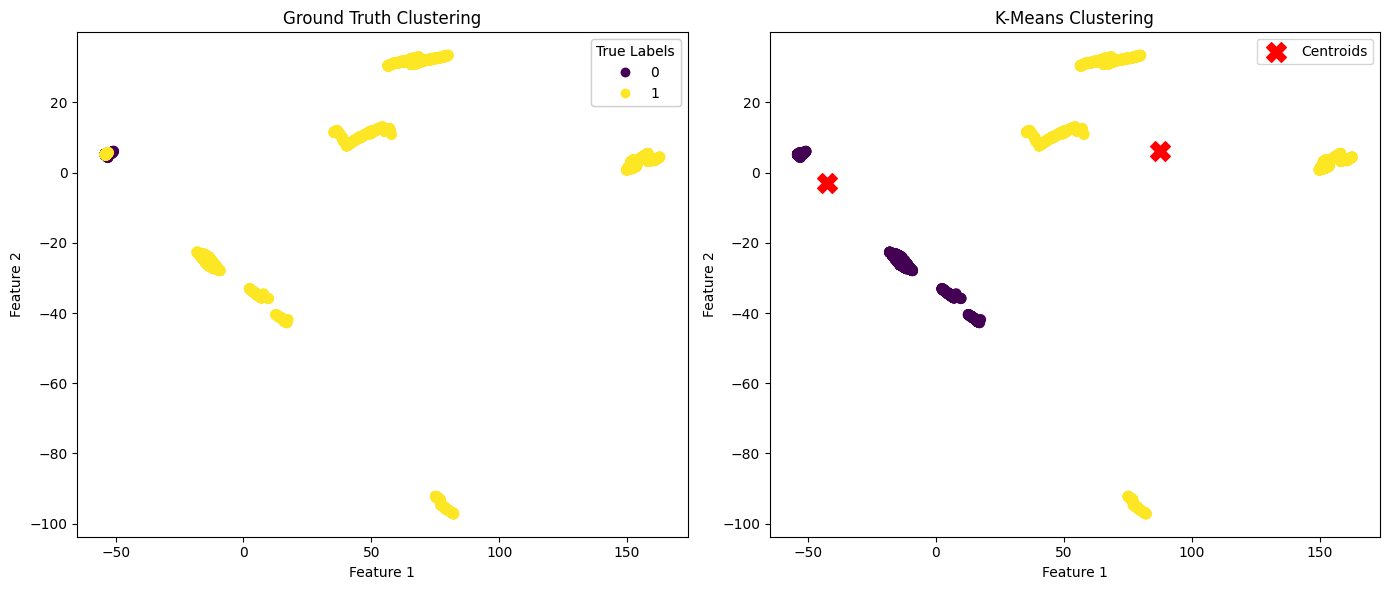

In [ ]:
# with attack data about the same asbenign data in the test dataset
for i in range(9):
  _,_,_,_,X_Benign,y_Benign,X_Attack,y_Attack = prepare_dataset(final_df,partition_id=i,label_col_num=3)
  data = np.concatenate((X_Benign,X_Attack),axis=0)
  labels = np.concatenate((y_Benign,y_Attack),axis=0)
  pca = PCA(n_components=35)
  reduced_data = pca.fit_transform(data)
  kmeans = KMeans(init="random", n_clusters=2, n_init='auto', random_state=0)
  label_predicted = kmeans.fit_predict(reduced_data)
  ad_ri = adjusted_rand_score(labels,label_predicted)
  print(f'Client_id {i}:{ad_ri}')
  cluster_centers = kmeans.cluster_centers_
  visualize_clustering(reduced_data, labels, label_predicted, cluster_centers)

In [ ]:
for i in range(9):
  _,_,_,_,X_Benign,y_Benign,X_Attack,y_Attack = prepare_dataset(final_df,partition_id=i,label_col_num=3)
  data = np.concatenate((X_Benign,X_Attack),axis=0)
  labels = np.concatenate((y_Benign,y_Attack),axis=0)
  kmeans = KMeans(init="random", n_clusters=2, n_init='auto', random_state=0)
  label_predicted = kmeans.fit_predict(data)
  ad_ri = adjusted_rand_score(labels,label_predicted)
  print(f'Client_id {i}:{ad_ri}')

Client_id 0:-0.07731061175371784
Client_id 1:-0.07572223966852154
Client_id 2:0.00013904132217395482
Client_id 3:-0.018068588640827898
Client_id 4:0.03618044792222883
Client_id 5:-0.053934848865545566
Client_id 6:0.10275602600877394
Client_id 7:0.01724292329895554
Client_id 8:0.042301713866271726


### **Prepare Pytorch Dataloader**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset
from sklearn.decomposition import PCA

NUM_CLIENTS = 9
BATCH_SIZE = 32
ENABLE_PCA = False

def load_datasets(dataset,model_type:str,partition_id: int,label_col_num:int):
    partition = dataset.loc[dataset['client_id'] == partition_id+1]
    feature_columns = partition.columns[:-label_col_num]
    partition_train_test = {}
    if model_type == 'Autoencoder':
      # select normal data profile to train
      partition_benign = partition.loc[partition['label']==0]
      #print(partition_benign.index)
      partition_attack = partition.loc[partition['label']==1]
      partition_train_test['train'] = partition_benign.iloc[:int(0.39*len(partition_benign))-1]
      #print(partition_train_test['train'].index)
      #print(int(0.39*len(partition_benign))-1)
      partition_train_test['val'] = partition_benign.iloc[int(0.39*len(partition_benign)):int(0.78*len(partition_benign))]
      #print(len(partition_train_test['val']))
      #partition_train_test['test_benign'] = pd.concat([partition_benign.iloc[int(0.8*len(partition_benign)):],partition_attack.iloc[:len(partition_benign)]])
      partition_train_test['test_benign'] = partition_benign.iloc[int(0.8*len(partition_benign)):]
      #print(len(partition_train_test['test_benign']))
      partition_train_test['test_attack'] = partition_attack.iloc[:int(0.2*len(partition_benign))]
      #print(len(partition_train_test['test_attack']))
    scaler = MinMaxScaler()
    scaler.fit(partition_train_test['train'][feature_columns])
    X_train = torch.tensor(scaler.transform(partition_train_test['train'][feature_columns]))
    #print(f'train_max:{X_train.max()}')
    y_train = torch.tensor(partition_train_test['train']['label'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=50)
      X_train = torch.tensor(pca.fit_transform(X_train.numpy()))

      explained_variance = pca.explained_variance_ratio_
      plt.figure(figsize=(10, 6))
      plt.bar(range(1, 51), explained_variance, alpha=0.7, color='blue', align='center')
      plt.xlabel('Principal Component')
      plt.ylabel('Explained Variance Ratio')
      plt.title('Explained Variance by Principal Component (Top 50)')
      plt.xticks(range(1, 51))
      plt.show()


    X_val = torch.tensor(scaler.transform(partition_train_test['val'][feature_columns]))
    y_val = torch.tensor(partition_train_test['val']['label'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_val = torch.tensor(pca.fit_transform(X_val.numpy()))
    #print(f'val_max:{X_val.max()}')
    X_test_benign = torch.tensor(scaler.transform(partition_train_test['test_benign'][feature_columns]))
    y_test_benign = torch.tensor(partition_train_test['test_benign']['label'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_test_benign = torch.tensor(pca.fit_transform(X_test_benign.numpy()))
    #print(f'benign_max:{X_test_benign.max()}')
    X_test_attack = torch.tensor(scaler.transform(partition_train_test['test_attack'][feature_columns]))
    y_test_attack = torch.tensor(partition_train_test['test_attack']['label'].values)
    if ENABLE_PCA:
      pca = PCA(n_components=35)
      X_test_attack = torch.tensor(pca.fit_transform(X_test_attack.numpy()))
    #print(f'attack_max:{X_test_attack.max()}')
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_benign_dataset = TensorDataset(X_test_benign, y_test_benign)
    test_attack_dataset = TensorDataset(X_test_attack, y_test_attack)
    trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
    valloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    benign_testloader = DataLoader(test_benign_dataset, batch_size=BATCH_SIZE)
    attack_testloader = DataLoader(test_attack_dataset, batch_size=BATCH_SIZE)
    return trainloader, valloader, benign_testloader, attack_testloader

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in range(9):
  trainloader, valid_loader, benign_test,attack_test = load_datasets(final_df,'Autoencoder',partition_id=i,label_col_num=3)

  print(f'partition_id:{i}')
  print(f'trainloader:{len(trainloader.dataset)}')
  print(f'valid_loader:{len(valid_loader.dataset)}')
  print(f'benign_test:{len(benign_test.dataset)}')
  print(f'attack_test:{len(attack_test.dataset)}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


partition_id:0
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:1
trainloader:5113
valid_loader:5114
benign_test:2623
attack_test:2622
partition_id:2
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:3
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:4
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:5
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:6
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:7
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200
partition_id:8
trainloader:6239
valid_loader:6240
benign_test:3200
attack_test:3200


In [ ]:
trainloader, valid_loader, benign_test,attack_test = load_datasets(final_df,'Autoencoder',partition_id=3,label_col_num=3) ## Set label_col_num = 3 for N-BaIoT dataset
batch = next(iter(attack_test))
input,label = batch
print(input.shape)
print(label.shape)

train_max:1.0000000000000002
val_max:1.0400156669648448
benign_max:1.2056959090625972
attack_max:25.584204516080494
torch.Size([32, 115])
torch.Size([32])


In [ ]:
trainloader, valid_loader, benign_test,attack_test = load_datasets(final_df,'Autoencoder',partition_id=3,label_col_num=3) ## Set label_col_num = 3 for N-BaIoT dataset
batch = next(iter(attack_test))
input,label = batch
print(input.shape)
print(label.shape)

torch.Size([32, 115])
torch.Size([32])


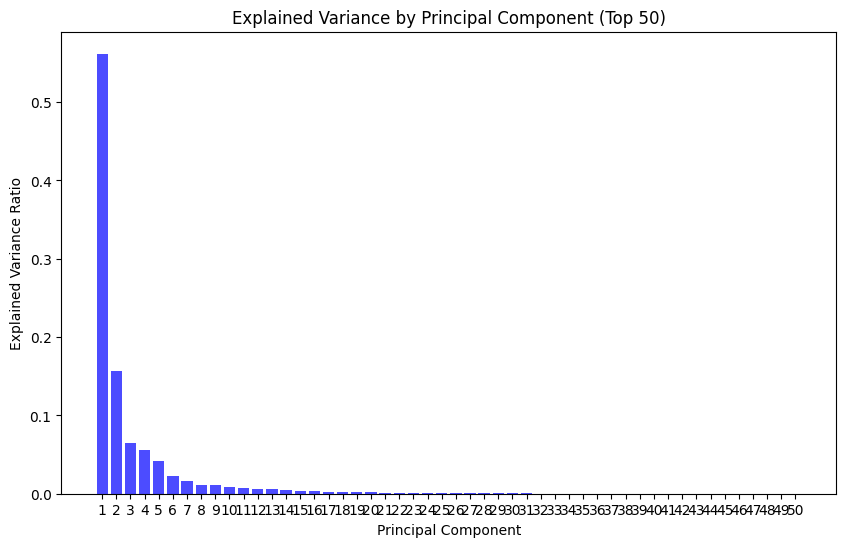

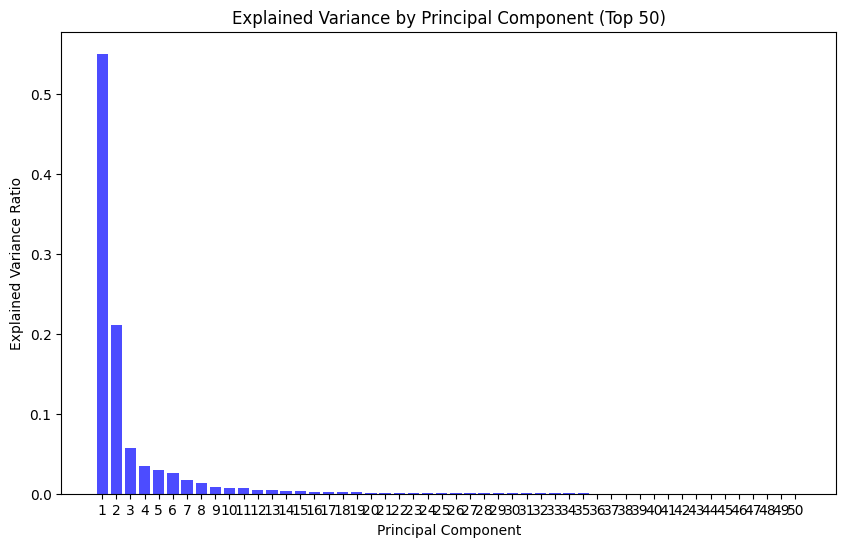

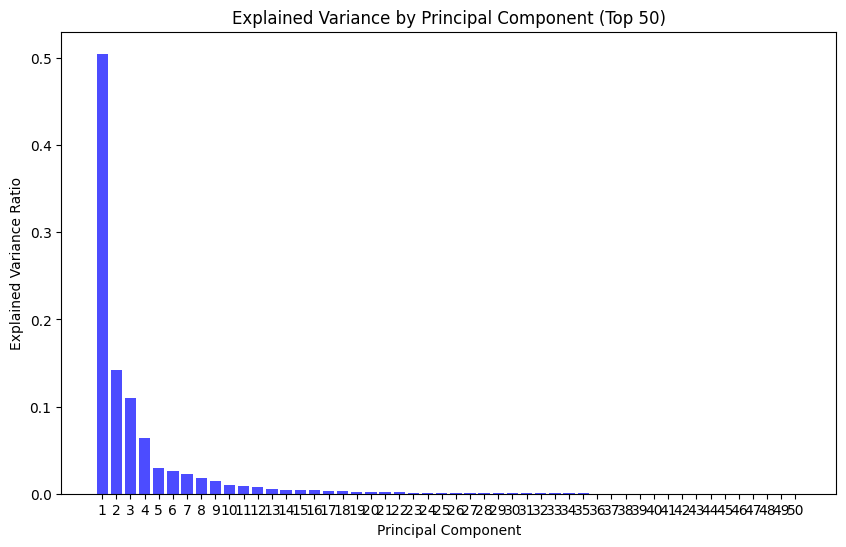

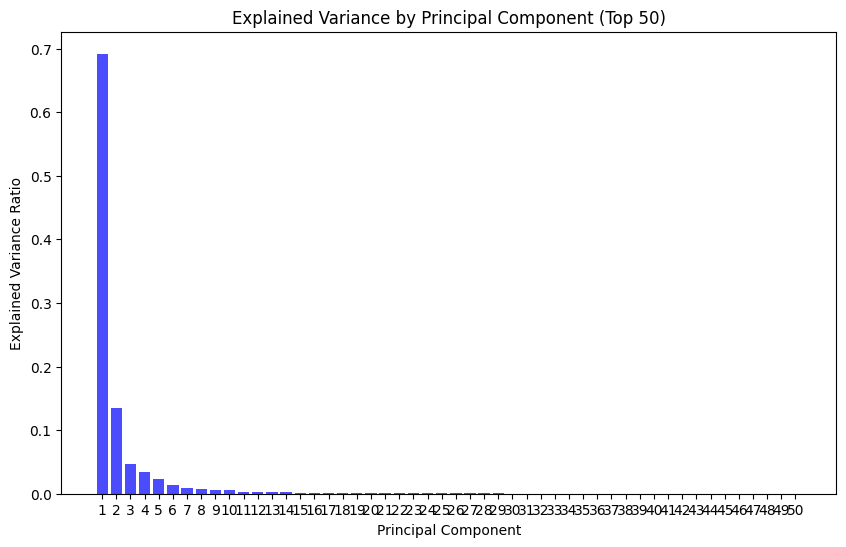

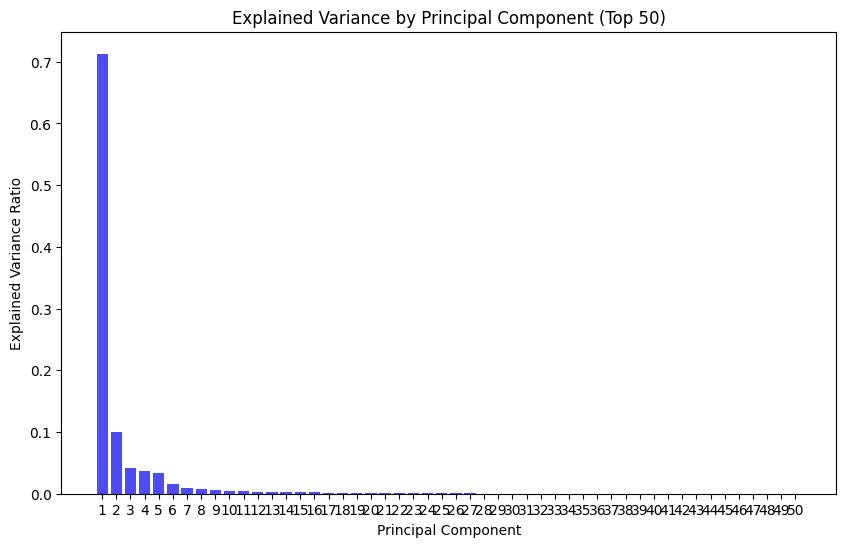

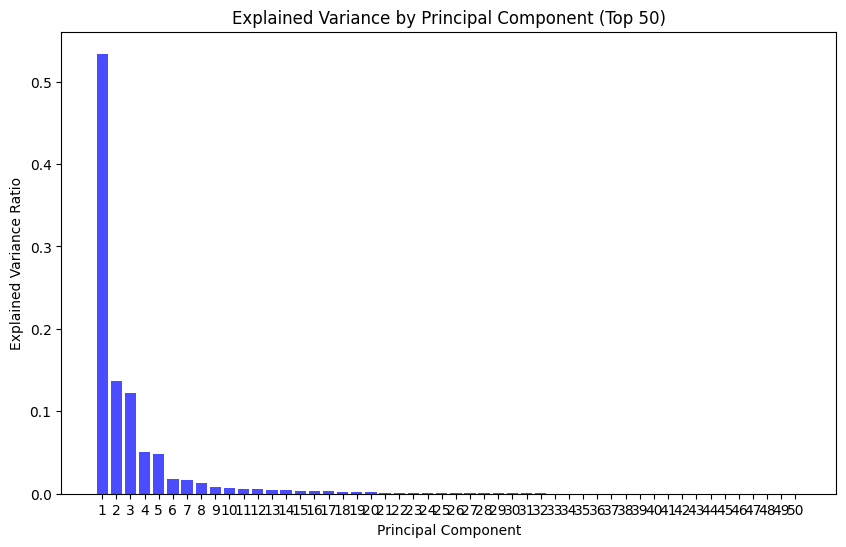

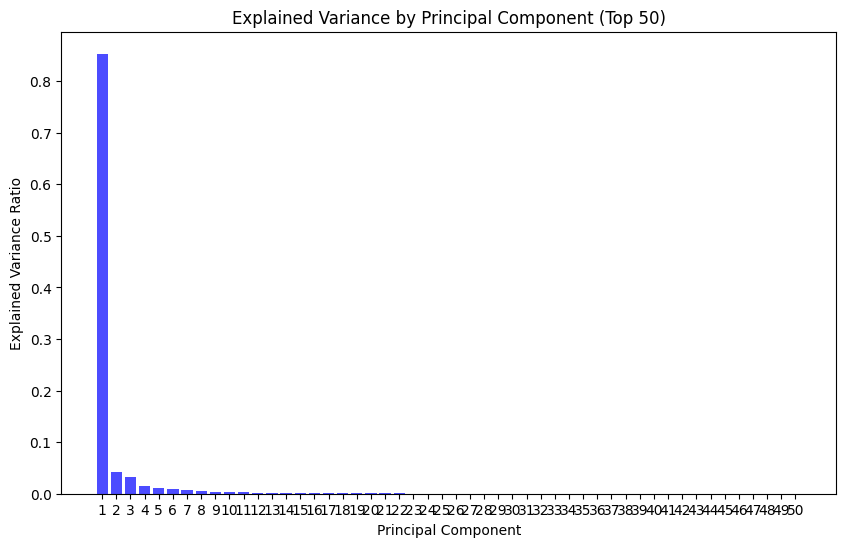

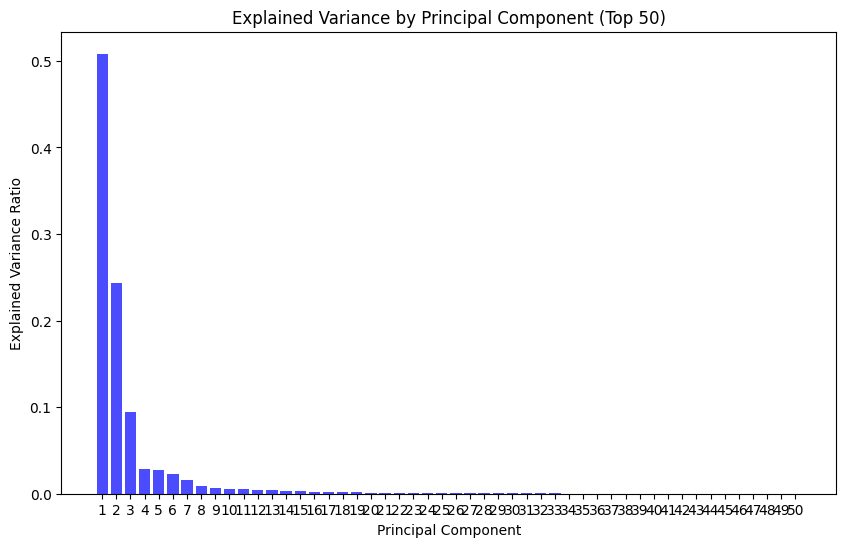

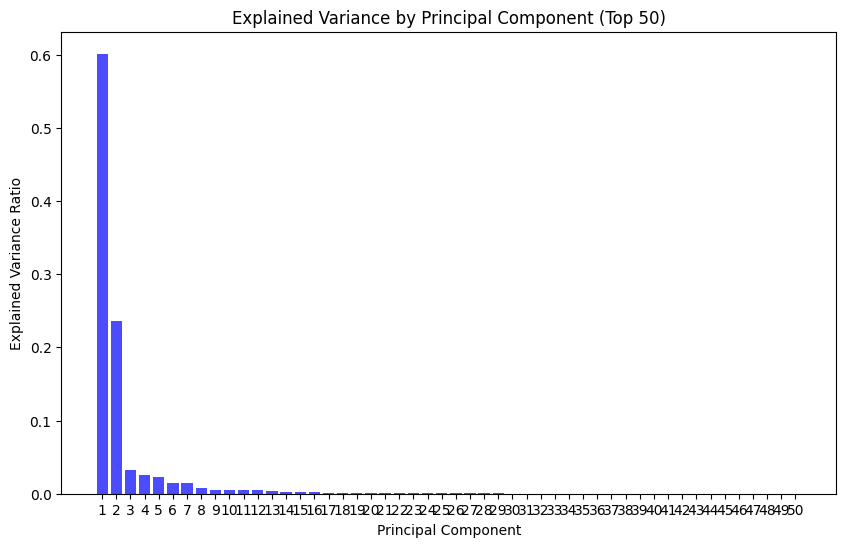

In [ ]:
for i in range(9):
  trainloader, valid_loader, benign_test,attack_test = load_datasets(final_df,'Autoencoder',partition_id=i,label_col_num=3) ## Set label_col_num = 3 for N-BaIoT dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca_2d(data):
    """
    Applies PCA to reduce the input tensor to 2D and plots the sample points.

    Parameters:
    data (torch.Tensor): A tensor of shape (n_samples, n_features), where
                         n_samples is the number of samples and n_features is the number of features.
    """
    # Check if input is a torch tensor, if not, raise an error
    '''
    if not isinstance(data, torch.Tensor):
        raise TypeError("Input data must be a torch.Tensor")
    '''

    # Convert tensor to numpy for use with sklearn PCA
    if isinstance(data, torch.Tensor):
        data = data.numpy()
    #data_np = data.numpy()

    # Apply PCA to reduce dimensionality to 2D
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    print(data_2d)
    # Plot the 2D projection of the data
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', marker='o', edgecolor='k')
    plt.title('2D Visualization of Dimensionality-Reduced Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

Batch 186:
[[ 6.03170148e+05  4.68586379e+02]
 [ 6.03170148e+05  4.68586477e+02]
 [ 6.03170148e+05  4.68582468e+02]
 [ 6.03170148e+05  4.68586254e+02]
 [ 6.03170148e+05  4.68586354e+02]
 [ 6.03170148e+05  4.68586454e+02]
 [ 6.03170148e+05  4.68586550e+02]
 [ 6.03170148e+05  4.68586518e+02]
 [ 6.03170148e+05  4.68586619e+02]
 [ 6.03170148e+05  4.68586720e+02]
 [ 6.03170148e+05  4.68586822e+02]
 [ 6.03170148e+05  4.68586828e+02]
 [ 6.03170148e+05  4.68586927e+02]
 [ 6.03170148e+05  4.68587027e+02]
 [ 6.03170148e+05  4.68587123e+02]
 [ 6.03170148e+05  4.68582313e+02]
 [ 6.03170148e+05  4.68652511e+02]
 [ 6.03170148e+05  4.68643448e+02]
 [ 6.03170148e+05  4.68633075e+02]
 [ 6.03170148e+05  4.68582344e+02]
 [ 6.03170148e+05  4.68582331e+02]
 [ 6.03170148e+05  4.68582311e+02]
 [-7.49224148e+06  6.68011187e+03]
 [-8.55146893e+06 -1.75948319e+03]
 [ 6.03170148e+05  4.68582412e+02]
 [ 6.03170148e+05  4.68582395e+02]
 [ 6.03170148e+05  4.68582387e+02]
 [ 6.03170148e+05  4.68582472e+02]
 [ 6.0317

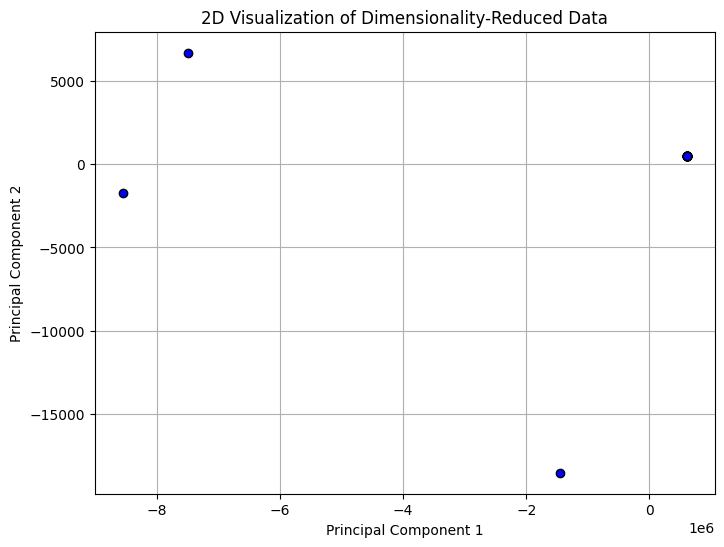

In [ ]:
torch.set_printoptions(threshold=float('inf'))

batch_index = 186

# Iterate through the dataloader and get the 30th batch
for idx, (inputs, targets) in enumerate(valid_loader):
    if idx == batch_index:
        # Access the 30th batch (remember indexing starts at 0, so it's batch_index-1)
        print(f"Batch {batch_index}:")
        #print("Inputs:", inputs)
        plot_pca_2d(inputs)

        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Batch 185:
[[-7.15536568e+00  2.82040821e+00]
 [-6.42221685e+00  1.92566261e+00]
 [-5.59391507e+00  1.43597688e+00]
 [-4.84043221e+00  1.11379068e+00]
 [-4.15689317e+00  9.04204323e-01]
 [-3.69478546e+00  6.12772041e-01]
 [-3.05522269e+00  5.43605652e-01]
 [-2.43536033e+00  5.18455574e-01]
 [-1.83615492e+00  5.27001837e-01]
 [-9.81654230e+00 -6.13861518e+00]
 [-1.96462986e+00 -2.89973397e-01]
 [-1.32461013e+00 -2.53101372e-01]
 [-7.49779738e-01 -2.10588021e-01]
 [-1.61563110e-01 -1.15127678e-01]
 [-2.06871815e-01 -4.79149789e-01]
 [ 3.58852468e-01 -3.73347705e-01]
 [ 9.04348551e-01 -2.55488080e-01]
 [ 1.41430662e+00 -1.46860516e-01]
 [ 1.51917466e+00 -3.07416051e-01]
 [ 2.05567730e+00 -1.56568836e-01]
 [ 2.58854123e+00  3.38061824e-03]
 [ 3.10999830e+00  1.63455419e-01]
 [ 2.28821123e+00 -6.74782100e-01]
 [ 2.82696105e+00 -5.04424300e-01]
 [ 3.36216642e+00 -3.22598029e-01]
 [ 3.88515805e+00 -1.40509355e-01]
 [ 3.73515572e+00 -3.97026974e-01]
 [ 4.26345861e+00 -2.02140242e-01]
 [ 4.7647

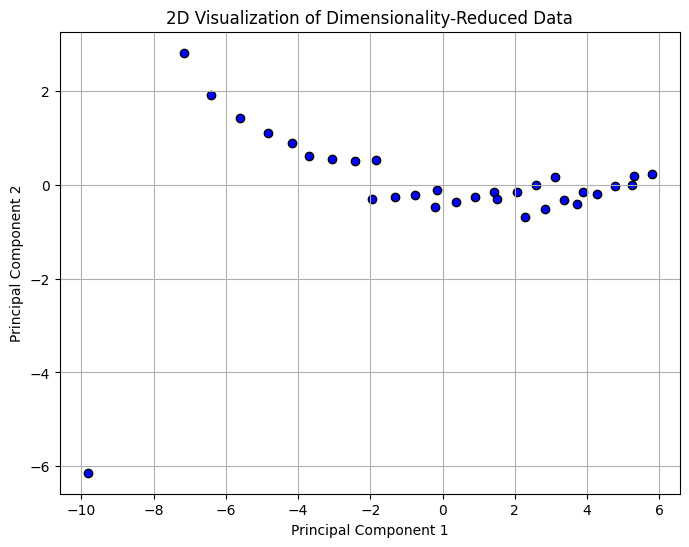

In [ ]:
batch_index = 185

# Iterate through the dataloader and get the 30th batch
for idx, (inputs, targets) in enumerate(valid_loader):
    if idx == batch_index:
        # Access the 30th batch (remember indexing starts at 0, so it's batch_index-1)
        print(f"Batch {batch_index}:")
        #print("Inputs:", inputs)
        #print("Targets:", targets)
        plot_pca_2d(inputs)
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Batch 0:
[[ 2.73434890e-02 -4.91161544e-01]
 [-4.59704895e-01 -2.84947148e-01]
 [-6.74937620e-01 -2.54097875e-01]
 [ 3.71296343e+00 -1.33242293e-01]
 [-5.26785233e-01 -5.99622282e-01]
 [ 3.09409173e-01 -4.20979983e-01]
 [-4.31119208e-01 -4.10679731e-01]
 [-2.13827477e-01 -1.70356637e-01]
 [-2.59992832e-01 -4.15801382e-01]
 [-6.70731963e-01 -3.89240153e-01]
 [-4.68378408e-01 -1.59169447e-01]
 [-2.63354496e-01  2.30508604e+00]
 [-6.03733006e-01  2.33299807e+00]
 [-4.02223261e-01  2.55582143e+00]
 [-1.63369012e-01  8.61778155e-02]
 [-4.80817897e-01  2.07492426e-01]
 [-3.02638715e-01  4.47739078e-01]
 [-6.90796864e-01 -4.51528606e-01]
 [ 8.92436074e-02 -2.61299231e-01]
 [-3.41912209e-01 -8.71005601e-02]
 [-5.06971675e-01 -3.33555413e-02]
 [ 3.62051008e+00  1.32865521e-01]
 [-2.84399491e-01 -4.53286979e-01]
 [-5.16634538e-01 -3.87471759e-01]
 [ 8.42139739e-02 -1.50534107e-01]
 [-7.33323256e-01 -5.48524360e-01]
 [-3.76284531e-01 -3.89613339e-01]
 [-2.96481384e-01 -2.17969957e-01]
 [-6.119044

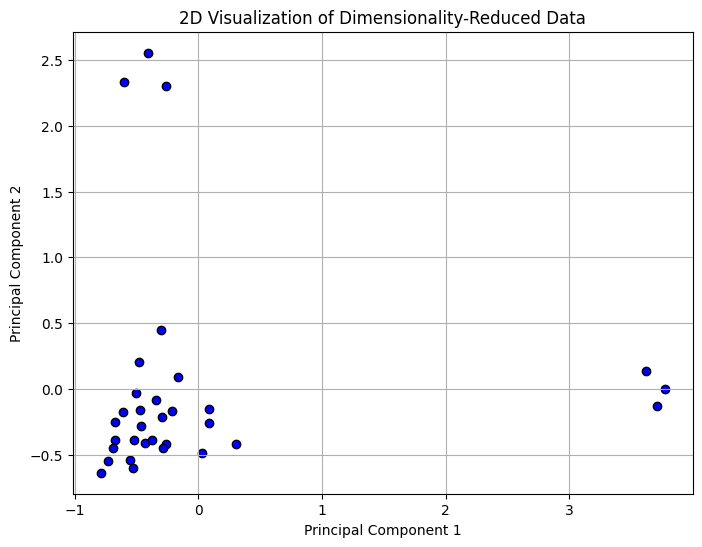

In [ ]:
batch_index = 0

# Iterate through the dataloader and get the 30th batch
for idx, (inputs, targets) in enumerate(valid_loader):
    if idx == batch_index:
        # Access the 30th batch (remember indexing starts at 0, so it's batch_index-1)
        print(f"Batch {batch_index}:")
        #print("Inputs:", inputs)
        #print("Targets:", targets)
        plot_pca_2d(inputs)
        break

## **Create the Autoencoder model**

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, latent_size)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
class Autoencoder_2_layers(nn.Module):
    def __init__(self, input_size,latent_size):
        super(Autoencoder_2_layers, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, latent_size),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
class Autoencoder_4_layers(nn.Module):
    def __init__(self, layer_sizes):
        """
        Initialize the Autoencoder with custom layer sizes.

        Parameters
        ----------
        layer_sizes : list of int
            A list of four integers specifying the number of neurons in each layer.
            Example: [115, 87, 58, 29]
        """
        super(Autoencoder_4_layers, self).__init__()

        # Ensure we have exactly four layers specified
        assert len(layer_sizes) == 4, "layer_sizes should contain exactly four values."

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(layer_sizes[0], layer_sizes[1]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[1], layer_sizes[2]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[2], layer_sizes[3]),
            nn.ReLU(True)
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(layer_sizes[3], layer_sizes[2]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[2], layer_sizes[1]),
            nn.ReLU(True),
            nn.Linear(layer_sizes[1], layer_sizes[0]),
            nn.Sigmoid()  # Using Sigmoid to keep the output in range (0, 1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Example usage
layer_sizes = [115, 87, 58, 29]
autoencoder = Autoencoder_4_layers(layer_sizes)
print(autoencoder)


Autoencoder_4_layers(
  (encoder): Sequential(
    (0): Linear(in_features=115, out_features=87, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=87, out_features=58, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=58, out_features=29, bias=True)
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=29, out_features=58, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=58, out_features=87, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=87, out_features=115, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
class Net(nn.Module):
    def __init__(self) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## **Define Training Functions**

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

def train(net, trainloader, num_epochs: int, learning_rate=0.001, verbose=False):
    """Train the network on the training set."""
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(),lr = learning_rate)
    net.train()
    for epoch in range(num_epochs):
        correct, total, epoch_loss = 0, 0, 0.0
        for batch in trainloader:
            inputs = batch[0].float()
            has_nan = torch.isnan(inputs).any()
            if has_nan:
              print(f"Contains NaN: {has_nan}")

            # Check for inf values
            has_inf = torch.isinf(inputs).any()
            if has_inf:
              print(f"Contains Inf: {has_inf}")

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = torch.sqrt(criterion(outputs, inputs))
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
        epoch_loss /= len(trainloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss.item():.4f}')
    return epoch_loss.item()


def validation(net,valloader):
  criterion = torch.nn.MSELoss(reduction = 'none')
  net.eval()
  total_loss = 0.0
  loss_history = []
  batch_num = 0
  unreducedLoss_list = []
  with torch.no_grad():
    for batch in valloader:
      batch_num += 1
      inputs = batch[0].float()
      has_nan = torch.isnan(inputs).any()
      if has_nan:
        print(f"Contains NaN: {has_nan}")

      # Check for inf values
      has_inf = torch.isinf(inputs).any()
      if has_inf:
        print(f"Contains Inf: {has_inf}")
      outputs = net(inputs)
      # Raw loss with dimension 32*115
      unreducedLoss = criterion(outputs, inputs)
      unreducedLoss_list.append(unreducedLoss)
      # Raw loss reduced by the second dimension, mean of squared difference
      loss = torch.sqrt(unreducedLoss.mean(dim=1))
      '''
      if loss.sum().item() > 288:
        #print(inputs)
        print(batch_num)
        print(outputs)
        print(loss)
      '''
      total_loss += loss.sum().item()
      loss_history.extend(loss.tolist())
  total_loss/=len(valloader.dataset)
  unreducedLoss_array = np.concatenate([tensor.numpy() for tensor in unreducedLoss_list], axis=0)
  return total_loss,loss_history,unreducedLoss_array


def test(net, testloader,threshold):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.MSELoss(reduction = 'none')
    loss_distribution = []
    unreducedLoss_list = []
    net.eval()
    count_exceed_threshold,count_total,total_loss = 0.0,0.0,0.0
    #print(f'total_size:{len(testloader.dataset)}')
    with torch.no_grad():
        for batch in testloader:
            inputs, labels = [t.float() for t in batch]
            has_nan = torch.isnan(inputs).any()
            if has_nan:
              print(f"Contains NaN: {has_nan}")

            # Check for inf values
            has_inf = torch.isinf(inputs).any()
            if has_inf:
              print(f"Contains Inf: {has_inf}")
            outputs = net(inputs.float())
            # Raw loss with dimension 32*115
            unreducedLoss = criterion(outputs, inputs)
            unreducedLoss_list.append(unreducedLoss)
            # Raw loss reduced by the second dimension, mean of squared difference
            loss = torch.sqrt(unreducedLoss.mean(dim=1))
            #print(f'loss_dtype:{loss.dtype}')
            if torch.isinf(loss).any():
              print(inputs.dtype)
              inf_indices = torch.nonzero(torch.isinf(loss), as_tuple=False)
              print(f'index:{inf_indices}')
              print(f'inputs:{inputs[inf_indices]}')
              print(f'outputs:{outputs[inf_indices]}')
              print(f'loss:{loss}')
              for i in inf_indices:
                input,output = inputs[i],outputs[i]
                print(f'dimension:{input.shape}')
                SE = (output-input)**2
                print(f'SE:{SE}')
                inf_index = torch.nonzero(torch.isinf(SE), as_tuple=False)
                print(f'SE_inf_input:{input[:,inf_index]}')
                print(f'SE_inf_output:{output[:,inf_index]}')
                custom_MSE = torch.mean((output-input)**2)
                print(f'MSE:{custom_MSE}')
                print(f'RMSE:{torch.sqrt(custom_MSE)}')
            #print(f'shape of loss:{loss.shape}')
            #print(loss)
            ## find outlier in reconstruction loss from predefined threshold
            if threshold:
              count_exceed_threshold += (loss > threshold).sum().item()
            count_total += len(loss)
            total_loss += loss.sum().item()
            #print(f'total_loss_dtype:{total_loss.type()}')
            #print(loss.tolist())
            #print(f'loss:{loss}')
            #print(f'total_loss:{total_loss}')
            #print(loss.mean())
            loss_distribution.extend(loss.tolist())
            #total_loss += loss.item()
    exceed_threshold_proportion = count_exceed_threshold/count_total
    #print(f'number of loss:{len(loss_history)}')
    print(f'exceed threshold proportion:{exceed_threshold_proportion}')
    print(f'count_total:{count_total}')
    total_loss /= count_total
    unreducedLoss_array = np.concatenate([tensor.numpy() for tensor in unreducedLoss_list], axis=0)
    return total_loss,loss_distribution, exceed_threshold_proportion,unreducedLoss_array

# **Large validation reconstruction error on partition_id = 2, i.e. client_id = 3**

Epoch [1/1], Train Loss: 0.1753
187
tensor([[0.4321, 0.3781, 0.5663,  ..., 0.1236, 0.3771, 0.6237],
        [0.4403, 0.3867, 0.5827,  ..., 0.1360, 0.3743, 0.6277],
        [0.1238, 0.0094, 0.0014,  ..., 0.0067, 0.3850, 0.5373],
        ...,
        [0.2187, 0.0291, 0.0059,  ..., 0.0241, 0.3658, 0.5584],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 1.0000],
        [0.1395, 0.0085, 0.0011,  ..., 0.0074, 0.3506, 0.5616]])
tensor([1.6857e+00, 1.7367e+00, 7.1462e-01, 1.6427e+00, 1.6909e+00, 1.7398e+00,
        1.7879e+00, 1.7692e+00, 1.8175e+00, 1.8668e+00, 1.9169e+00, 1.9152e+00,
        1.9635e+00, 2.0125e+00, 2.0603e+00, 7.0907e-01, 1.4477e+01, 1.2589e+01,
        1.0432e+01, 6.8258e-01, 6.9986e-01, 7.1814e-01, 7.5490e+05, 8.5367e+05,
        7.2992e-01, 7.4825e-01, 7.6716e-01, 8.0590e-01, 8.2267e-01, 8.4473e-01,
        1.9130e+05, 1.4185e+00])
Epoch 1: validation loss 288.61516976641155
validation_loss_mean:288.6151595629704,validation_loss_std:14625.191659838545
Epoch [1/1]

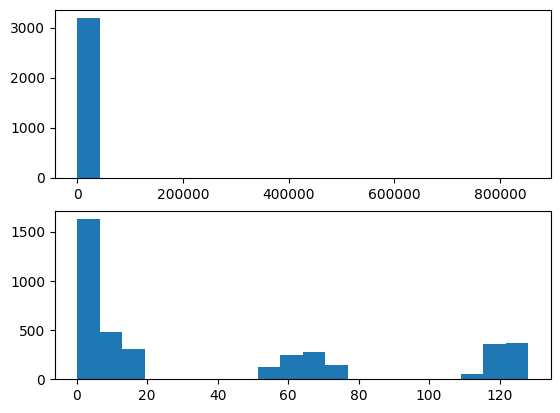

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=2,label_col_num = 3)
net = Autoencoder(115,58,29)

for epoch in range(3):
    train(net, trainloader, 1)
    loss,loss_history= validation(net, valloader)
    print(f"Epoch {epoch+1}: validation loss {loss}")
    print(f'validation_loss_mean:{np.mean(loss_history)},validation_loss_std:{np.std(loss_history)}')
print('BENIGN:')
benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,5)
print("ATTACK:")
attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,5)
print(f'fpr:{false_positive}')
print(f'tpr:{true_positive}')
print(f"Final test set performance:\n\t benign loss {benign_MSE}")
print(f"Final test set performance:\n\t attack loss {attack_MSE}")
plt.subplot(2,1,1)
plt.hist(benign_MSE_history,bins =20)
plt.subplot(2,1,2)
plt.hist(attack_MSE_history,bins = 20)
plt.show()

Epoch [1/1], Train Loss: 0.4073
Epoch 1: validation loss 288.92508399731076
validation_loss_mean:288.9250741045349,validation_loss_std:14625.18554589809
Epoch [1/1], Train Loss: 0.4072
Epoch 2: validation loss 288.9249323398639
validation_loss_mean:288.9249223964098,validation_loss_std:14625.185548890966
Epoch [1/1], Train Loss: 0.4070
Epoch 3: validation loss 288.92478091197137
validation_loss_mean:288.92477091616735,validation_loss_std:14625.185551879347
Epoch [1/1], Train Loss: 0.4069
Epoch 4: validation loss 288.9246297116463
validation_loss_mean:288.9246196612859,validation_loss_std:14625.185554863285
Epoch [1/1], Train Loss: 0.4067
Epoch 5: validation loss 288.9244787336924
validation_loss_mean:288.9244686303756,validation_loss_std:14625.18555784281
BENIGN:
exceed threshold proportion:0.00625
count_total:3200.0
ATTACK:
exceed threshold proportion:0.59375
count_total:4000.0
fpr:0.00625
tpr:0.59375
Final test set performance:
	 benign loss 562.9660263240337
Final test set performan

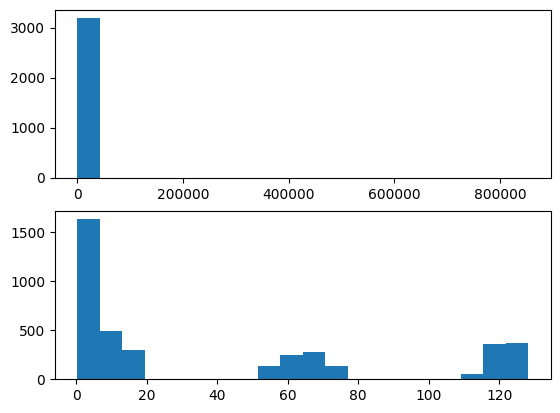

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=2,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)

for epoch in range(5):
    train(net, trainloader, 1)
    loss,loss_history= validation(net, valloader)
    print(f"Epoch {epoch+1}: validation loss {loss}")
    print(f'validation_loss_mean:{np.mean(loss_history)},validation_loss_std:{np.std(loss_history)}')
print('BENIGN:')
benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,5)
print("ATTACK:")
attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,5)
print(f'fpr:{false_positive}')
print(f'tpr:{true_positive}')
print(f"Final test set performance:\n\t benign loss {benign_MSE}")
print(f"Final test set performance:\n\t attack loss {attack_MSE}")
plt.subplot(2,1,1)
plt.hist(benign_MSE_history,bins =20)
plt.subplot(2,1,2)
plt.hist(attack_MSE_history,bins = 20)
plt.show()

In [ ]:
def plot_roc(benign_MSE_history,attack_MSE_history,plot):
  reconstruction_errors = benign_MSE_history+attack_MSE_history  # Combine errors
  labels = [0]*len(benign_MSE_history) + [1]*len(attack_MSE_history)  # 0 for normal, 1 for anomaly

  # Compute ROC Curve
  fpr, tpr, thresholds = roc_curve(labels, reconstruction_errors)
  roc_auc = auc(fpr, tpr)
  print(f'roc_auc:{roc_auc:.4f}')
  # Plot ROC Curve
  if plot == True:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
  return roc_auc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=0)
net = Autoencoder(115,58,29)

for epoch in range(5):
    train(net, trainloader, 1)
    loss = validation(net, valloader)
    print(f"Epoch {epoch+1}: validation loss {loss}")

benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,5)
attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,5)
print(f'fpr:{false_positive}')
print(f'tpr:{true_positive}')
print(f"Final test set performance:\n\t benign loss {benign_MSE}")
print(f"Final test set performance:\n\t attack loss {attack_MSE}")
plt.subplot(2,1,1)
plt.plot(benign_MSE_history)
plt.subplot(2,1,2)
plt.plot(attack_MSE_history)
plt.show()

Epoch [1/1], Train Loss: 0.0010
Epoch 1: validation loss 0.00014846688949873146
Epoch [1/1], Train Loss: 0.0001
Epoch 2: validation loss 4.064800666058615e-05
Epoch [1/1], Train Loss: 0.0001
Epoch 3: validation loss 2.7874832346405573e-05
Epoch [1/1], Train Loss: 0.0000
Epoch 4: validation loss 2.1268645902567258e-05
Epoch [1/1], Train Loss: 0.0000
Epoch 5: validation loss 1.8628749365654166e-05
total_size:3200
total_loss:0.009178077802062035
total_loss:0.019471791572868824
total_loss:0.02745479065924883
total_loss:0.04593998100608587
total_loss:0.055484091863036156
total_loss:0.07517597265541553
total_loss:0.09643974527716637
total_loss:0.12276510149240494
total_loss:0.15347954258322716
total_loss:0.1980976015329361
total_loss:0.2197653129696846
total_loss:0.23215001821517944
total_loss:0.24180825985968113
total_loss:0.2534254575148225
total_loss:0.2688963692635298
total_loss:0.28523534908890724
total_loss:1.2677195109426975
total_loss:1.7004873789846897
total_loss:1.7668836899101734


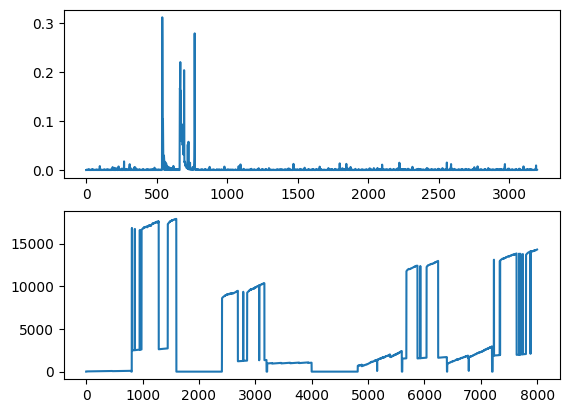

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=0)
net = Autoencoder(115,58,29)

for epoch in range(5):
    train(net, trainloader, 1)
    loss = validation(net, valloader)
    print(f"Epoch {epoch+1}: validation loss {loss}")

benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,5)
attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,5)
print(f'fpr:{false_positive}')
print(f'tpr:{true_positive}')
print(f"Final test set performance:\n\t benign loss {benign_MSE}")
print(f"Final test set performance:\n\t attack loss {attack_MSE}")
plt.subplot(2,1,1)
plt.plot(benign_MSE_history)
plt.subplot(2,1,2)
plt.plot(attack_MSE_history)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch [1/1], Train Loss: 0.0009
Epoch 1: validation loss 0.00014505412930306287
Epoch [1/1], Train Loss: 0.0001
Epoch 2: validation loss 4.193252273417341e-05
Epoch [1/1], Train Loss: 0.0001
Epoch 3: validation loss 2.9195839940653875e-05
Epoch [1/1], Train Loss: 0.0000
Epoch 4: validation loss 2.457086093972276e-05
Epoch [1/1], Train Loss: 0.0000
Epoch 5: validation loss 2.1968015869042107e-05
total_size:3200
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.789875
benign_error:0.002330001335358247
attack_error:3923.8026283572613


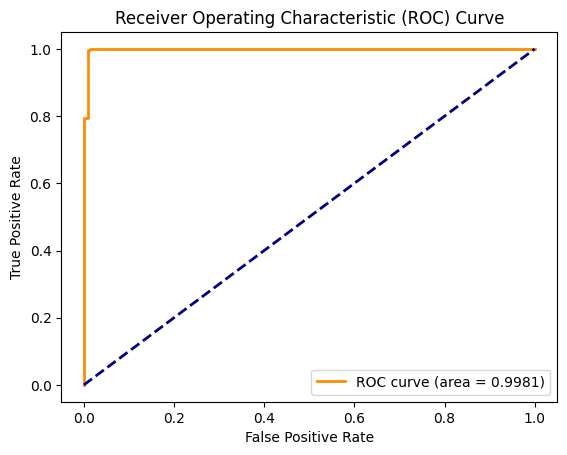

Epoch [1/1], Train Loss: 0.0010
Epoch 1: validation loss 0.00029894010403139264
Epoch [1/1], Train Loss: 0.0002
Epoch 2: validation loss 0.00015175887740460816
Epoch [1/1], Train Loss: 0.0001
Epoch 3: validation loss 0.00013015036704109768
Epoch [1/1], Train Loss: 0.0001
Epoch 4: validation loss 0.00010939188127008573
Epoch [1/1], Train Loss: 0.0001
Epoch 5: validation loss 9.170239355570266e-05
total_size:2623
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.788
benign_error:0.0030114587568232363
attack_error:2128.49044682917


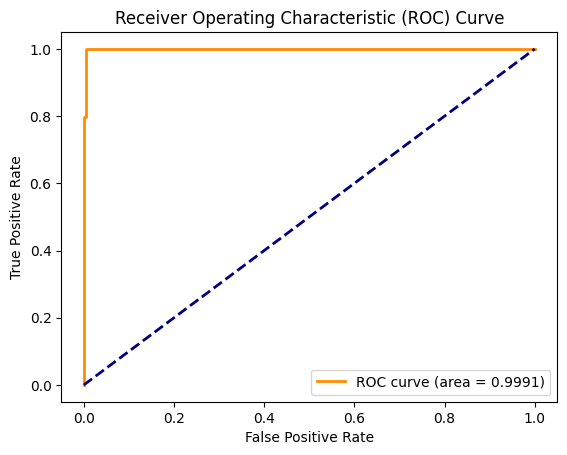

Epoch [1/1], Train Loss: 0.0012
Epoch 1: validation loss 6686860.496252983
Epoch [1/1], Train Loss: 0.0003
Epoch 2: validation loss 6686860.495552409
Epoch [1/1], Train Loss: 0.0002
Epoch 3: validation loss 6686860.495521939
Epoch [1/1], Train Loss: 0.0001
Epoch 4: validation loss 6686860.495467148
Epoch [1/1], Train Loss: 0.0001
Epoch 5: validation loss 6686860.495434151
total_size:3200
exceed threshold proportion:0.0096875
total_size:4000
exceed threshold proportion:0.59375
benign_error:417260094.17000335
attack_error:3751.998488771826


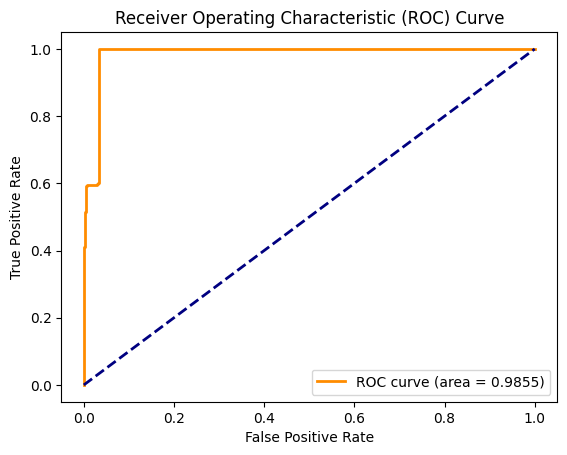

Epoch [1/1], Train Loss: 0.0015
Epoch 1: validation loss 8.078105266367157e-05
Epoch [1/1], Train Loss: 0.0014
Epoch 2: validation loss 6.979272081643546e-05
Epoch [1/1], Train Loss: 0.0008
Epoch 3: validation loss 5.8692672248584226e-05
Epoch [1/1], Train Loss: 0.0005
Epoch 4: validation loss 4.038604844399976e-05
Epoch [1/1], Train Loss: 0.0003
Epoch 5: validation loss 3.2277787245104076e-05
total_size:3200
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.246625
benign_error:0.0012856227210431826
attack_error:3.8017619517445564


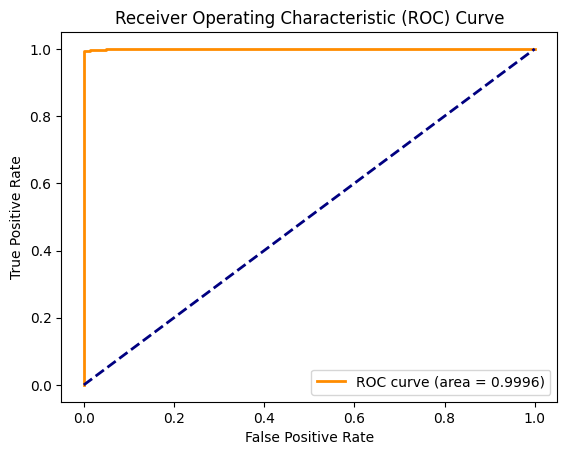

Epoch [1/1], Train Loss: 0.0014
Epoch 1: validation loss 0.0003669105136419276
Epoch [1/1], Train Loss: 0.0003
Epoch 2: validation loss 0.00019133721897303938
Epoch [1/1], Train Loss: 0.0002
Epoch 3: validation loss 0.00014431095976481
Epoch [1/1], Train Loss: 0.0001
Epoch 4: validation loss 8.952100415160366e-05
Epoch [1/1], Train Loss: 0.0001
Epoch 5: validation loss 9.542967274729819e-05
total_size:3200
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.484125
benign_error:0.0029920770667376927
attack_error:8.342610254839062


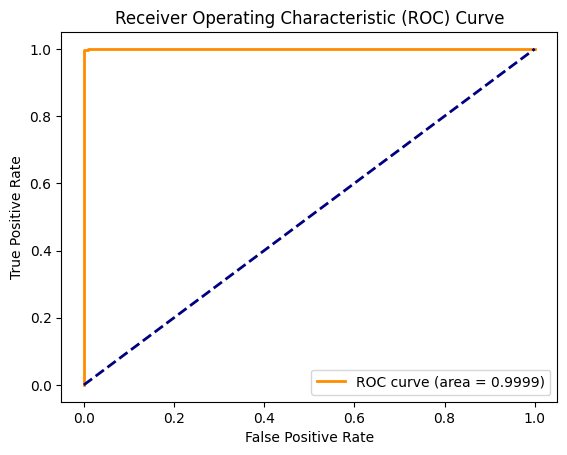

Epoch [1/1], Train Loss: 0.0015
Epoch 1: validation loss 0.00043050459689066673
Epoch [1/1], Train Loss: 0.0004
Epoch 2: validation loss 0.00027057343223788895
Epoch [1/1], Train Loss: 0.0003
Epoch 3: validation loss 0.00017934981158946475
Epoch [1/1], Train Loss: 0.0002
Epoch 4: validation loss 0.00014032129374987935
Epoch [1/1], Train Loss: 0.0002
Epoch 5: validation loss 0.00010998546107984088
total_size:3200
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.655375
benign_error:0.0034820624726125972
attack_error:14.393315267995


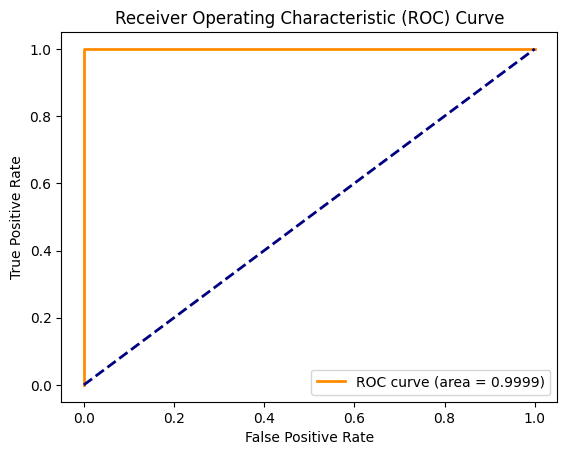

Epoch [1/1], Train Loss: 0.0009
Epoch 1: validation loss 0.00016038221548138283
Epoch [1/1], Train Loss: 0.0001
Epoch 2: validation loss 0.00013433538796305537
Epoch [1/1], Train Loss: 0.0001
Epoch 3: validation loss 0.00012530660188088242
Epoch [1/1], Train Loss: 0.0001
Epoch 4: validation loss 0.00010577711740878816
Epoch [1/1], Train Loss: 0.0001
Epoch 5: validation loss 8.682207223430921e-05
total_size:3200
exceed threshold proportion:0.0
total_size:4000
exceed threshold proportion:0.5925
benign_error:0.022185498914914205
attack_error:95.30312751740217


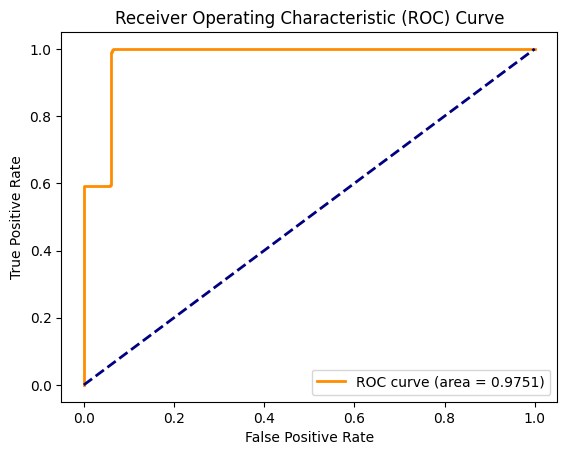

Epoch [1/1], Train Loss: 0.0014
Epoch 1: validation loss 0.00022588601612556094
Epoch [1/1], Train Loss: 0.0005
Epoch 2: validation loss 0.00019712396345149057
Epoch [1/1], Train Loss: 0.0003
Epoch 3: validation loss 0.00015412665850770933
Epoch [1/1], Train Loss: 0.0002
Epoch 4: validation loss 7.899223566756774e-05
Epoch [1/1], Train Loss: 0.0002
Epoch 5: validation loss 5.288934350037613e-05
total_size:3200
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.06925
benign_error:0.004322736831963994
attack_error:1.345871837079525


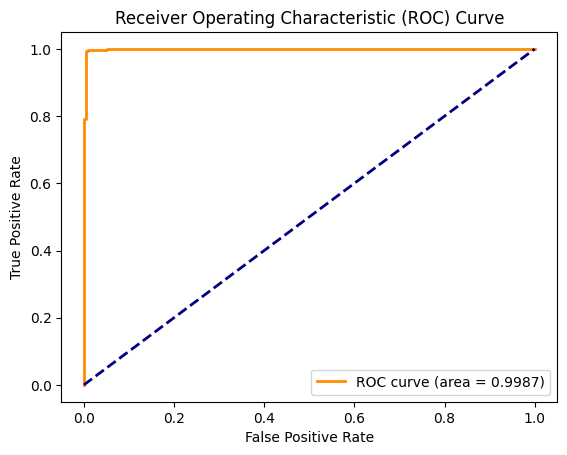

Epoch [1/1], Train Loss: 0.0009
Epoch 1: validation loss 0.00031127204153259905
Epoch [1/1], Train Loss: 0.0002
Epoch 2: validation loss 0.00025810222984709515
Epoch [1/1], Train Loss: 0.0002
Epoch 3: validation loss 0.0002352268584777798
Epoch [1/1], Train Loss: 0.0001
Epoch 4: validation loss 0.00020461764556668454
Epoch [1/1], Train Loss: 0.0001
Epoch 5: validation loss 0.00019939891860233799
total_size:3200
exceed threshold proportion:0.0
total_size:8000
exceed threshold proportion:0.719
benign_error:0.002744607370113954
attack_error:87.8187074444741


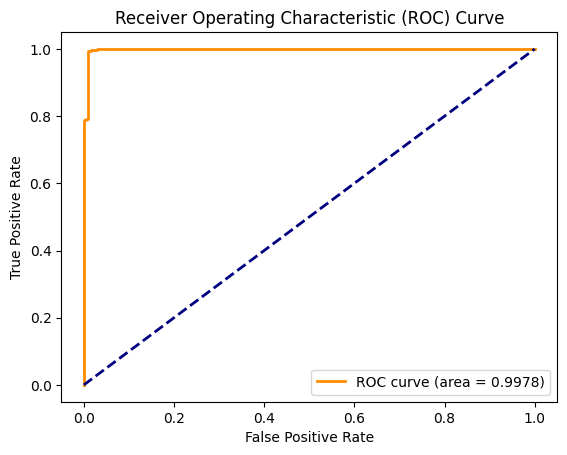

In [ ]:
## Using MSe
for client in range(9):
  trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=client)
  net = Autoencoder(115,58,29)

  for epoch in range(5):
      train(net, trainloader, 1)
      loss = validation(net, valloader)
      print(f"Epoch {epoch+1}: validation loss {loss}")
  benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,5)
  attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,5)
  print(f'benign_error:{benign_MSE}')
  print(f'attack_error:{attack_MSE}')
  plot_roc(benign_MSE_history,attack_MSE_history)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch [1/1], Train Loss: 0.1246
Epoch 1: validation loss 0.05787835201391807
Epoch [1/1], Train Loss: 0.0419
Epoch 2: validation loss 0.023558349401140825
Epoch [1/1], Train Loss: 0.0287
Epoch 3: validation loss 0.01902500582524599
Epoch [1/1], Train Loss: 0.0251
Epoch 4: validation loss 0.017255162304410567
Epoch [1/1], Train Loss: 0.0237
Epoch 5: validation loss 0.016270079420736203
exceed threshold proportion:0.0
exceed threshold proportion:0.789875
benign_error:0.021988408928737043
attack_error:46.26404443663359


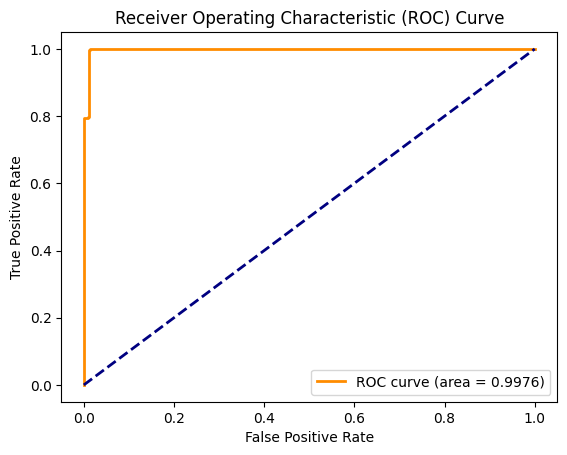

Epoch [1/1], Train Loss: 0.1469
Epoch 1: validation loss 0.07776908684299008
Epoch [1/1], Train Loss: 0.0667
Epoch 2: validation loss 0.05345584997032413
Epoch [1/1], Train Loss: 0.0528
Epoch 3: validation loss 0.04593722578786433
Epoch [1/1], Train Loss: 0.0456
Epoch 4: validation loss 0.03925602799474517
Epoch [1/1], Train Loss: 0.0392
Epoch 5: validation loss 0.03402342928495545
exceed threshold proportion:0.0
exceed threshold proportion:0.788
benign_error:0.03765686888572963
attack_error:36.434948624670504


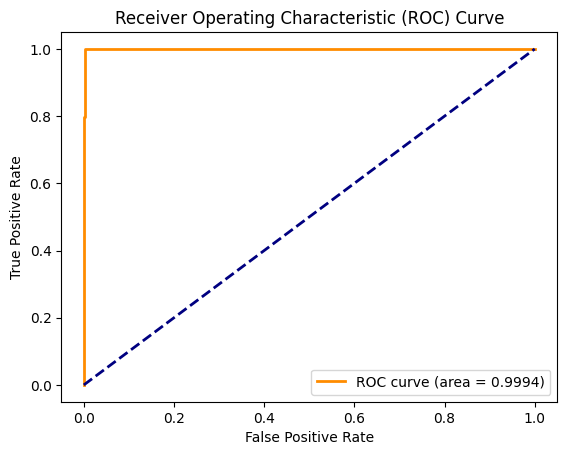

Epoch [1/1], Train Loss: 0.1698
Epoch 1: validation loss 288.61583862558774
Epoch [1/1], Train Loss: 0.0842
Epoch 2: validation loss 288.59697598870366
Epoch [1/1], Train Loss: 0.0684
Epoch 3: validation loss 288.5814056167427
Epoch [1/1], Train Loss: 0.0555
Epoch 4: validation loss 288.5732990934203
Epoch [1/1], Train Loss: 0.0500
Epoch 5: validation loss 288.57010309232925
exceed threshold proportion:0.00625
exceed threshold proportion:0.59375
benign_error:562.615413896963
attack_error:39.12923524808884


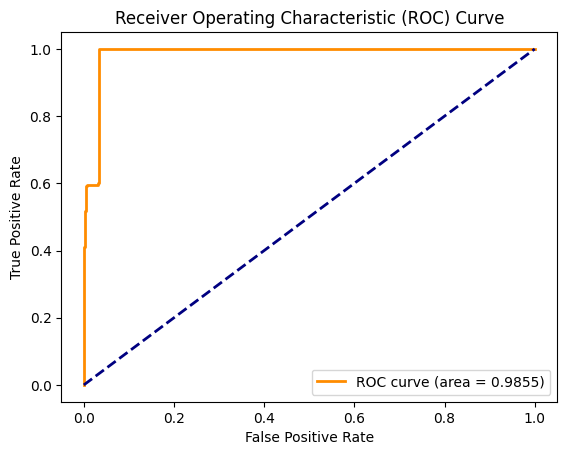

Epoch [1/1], Train Loss: 0.1563
Epoch 1: validation loss 0.023597817442929134
Epoch [1/1], Train Loss: 0.1309
Epoch 2: validation loss 0.022468697981765637
Epoch [1/1], Train Loss: 0.1015
Epoch 3: validation loss 0.020932405623487936
Epoch [1/1], Train Loss: 0.0808
Epoch 4: validation loss 0.019970087038400846
Epoch [1/1], Train Loss: 0.0712
Epoch 5: validation loss 0.019876666319293853
exceed threshold proportion:0.0
exceed threshold proportion:0.0
benign_error:0.022574761174619196
attack_error:1.5234468790888787


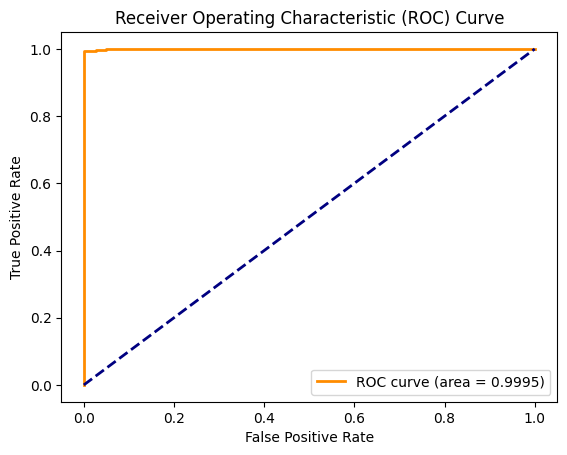

Epoch [1/1], Train Loss: 0.1642
Epoch 1: validation loss 0.06783366786936919
Epoch [1/1], Train Loss: 0.0728
Epoch 2: validation loss 0.05557607505948116
Epoch [1/1], Train Loss: 0.0609
Epoch 3: validation loss 0.0458132768002076
Epoch [1/1], Train Loss: 0.0524
Epoch 4: validation loss 0.03984654336594618
Epoch [1/1], Train Loss: 0.0486
Epoch 5: validation loss 0.03769691707805181
exceed threshold proportion:0.0
exceed threshold proportion:0.122125
benign_error:0.03753109652549028
attack_error:2.367682014107704


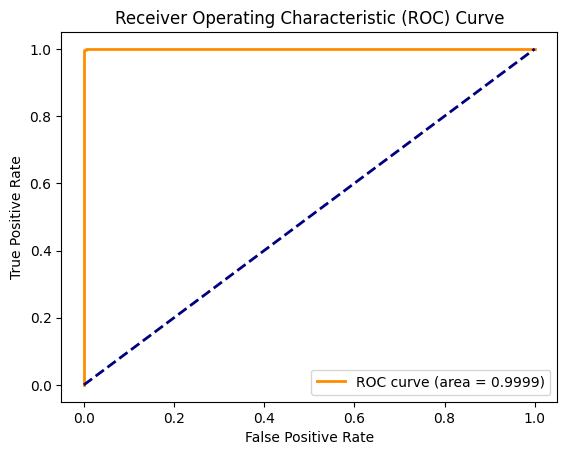

Epoch [1/1], Train Loss: 0.1917
Epoch 1: validation loss 0.09506721715323437
Epoch [1/1], Train Loss: 0.1002
Epoch 2: validation loss 0.0769859534712174
Epoch [1/1], Train Loss: 0.0810
Epoch 3: validation loss 0.06420694295412455
Epoch [1/1], Train Loss: 0.0679
Epoch 4: validation loss 0.057622351908148864
Epoch [1/1], Train Loss: 0.0626
Epoch 5: validation loss 0.05315952800596372
exceed threshold proportion:0.0
exceed threshold proportion:0.165
benign_error:0.05281196994706988
attack_error:3.103100046277046


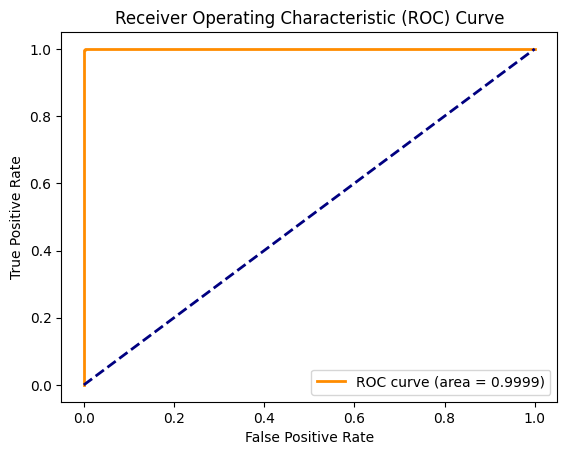

Epoch [1/1], Train Loss: 0.1477
Epoch 1: validation loss 0.06427604412803282
Epoch [1/1], Train Loss: 0.0544
Epoch 2: validation loss 0.05686877549458773
Epoch [1/1], Train Loss: 0.0487
Epoch 3: validation loss 0.053157716722060475
Epoch [1/1], Train Loss: 0.0392
Epoch 4: validation loss 0.04367267643220914
Epoch [1/1], Train Loss: 0.0281
Epoch 5: validation loss 0.041435463659656356
exceed threshold proportion:0.0
exceed threshold proportion:0.3945
benign_error:0.07258388176560401
attack_error:6.764201224207878


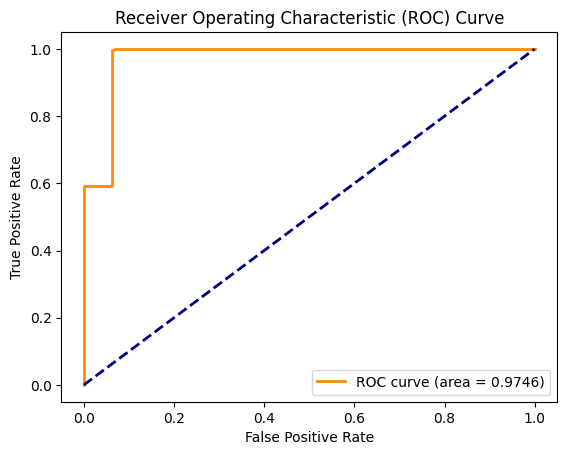

Epoch [1/1], Train Loss: 0.1769
Epoch 1: validation loss 0.05232753253135926
Epoch [1/1], Train Loss: 0.0926
Epoch 2: validation loss 0.046554722933050914
Epoch [1/1], Train Loss: 0.0825
Epoch 3: validation loss 0.043657778633328585
Epoch [1/1], Train Loss: 0.0702
Epoch 4: validation loss 0.03648660019613229
Epoch [1/1], Train Loss: 0.0574
Epoch 5: validation loss 0.028352522038114378
exceed threshold proportion:0.0
exceed threshold proportion:0.0
benign_error:0.04373633267357945
attack_error:0.9288599034547805


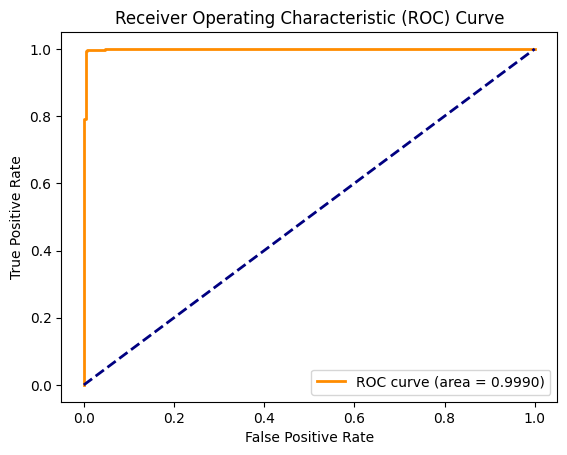

Epoch [1/1], Train Loss: 0.1167
Epoch 1: validation loss 0.04388274019345259
Epoch [1/1], Train Loss: 0.0392
Epoch 2: validation loss 0.03734421800726499
Epoch [1/1], Train Loss: 0.0374
Epoch 3: validation loss 0.03495287409482094
Epoch [1/1], Train Loss: 0.0352
Epoch 4: validation loss 0.0337699142881693
Epoch [1/1], Train Loss: 0.0335
Epoch 5: validation loss 0.036745128446282485
exceed threshold proportion:0.0
exceed threshold proportion:0.596625
benign_error:0.02759437954053283
attack_error:7.4443570845723155


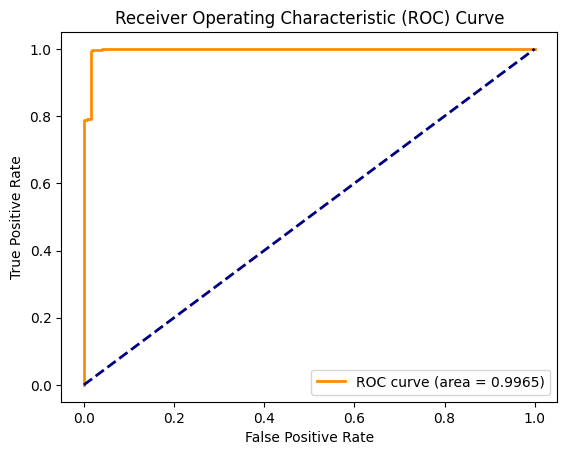

In [ ]:
# Corrected training loss
for client in range(9):
  trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=client,label_col_num = 3)
  net = Autoencoder(115,58,29)

  for epoch in range(5):
      train(net, trainloader, 1)
      loss,loss_history= validation(net, valloader)
      print(f"Epoch {epoch+1}: validation loss {loss}")
  benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,5)
  attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,5)
  print(f'benign_error:{benign_MSE}')
  print(f'attack_error:{attack_MSE}')
  plot_roc(benign_MSE_history,attack_MSE_history)

In [ ]:
def plot_barchart(list1,list2,title,variables,labels = [f'Client_{i}' for i in range(9)]):
  bar_width = 0.35
  index = np.arange(len(labels))

  plt.figure(figsize=(10, 6))
  bars1 = plt.bar(index, list1, bar_width, label=variables[0])
  bars2 = plt.bar(index + bar_width, list2, bar_width, label=variables[1])

  plt.xlabel("Categories")
  plt.ylabel("Values")
  plt.title(f"MAD vs OCSVM {title}")
  plt.xticks(index + bar_width / 2, labels)  # Adjust x-ticks to be between the two bars
  plt.legend()
  for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.4g}',
             ha='center', va='bottom')
  for bar in bars2:
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.4g}',
              ha='center', va='bottom')

# **Comparing threshold selection via Median Absolute Deviation, Standard Deviation, and OCSVM**

In [ ]:
# with MAD threshold selection
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
def run_test_OCSVM(K,nu,threshold_type = 'STD'):
  client_thresholds = []
  client_fpr = []
  client_fpr_ocsvm = []
  client_tpr = []
  client_tpr_ocsvm = []
  client_roc_auc = []
  for client in range(9):
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=client,label_col_num = 3)
    net = Autoencoder_4_layers(layer_sizes)
    print(f'CLIENT:{client}')
    for epoch in range(50):
        train(net, trainloader, 1)
        loss,loss_history, raw_valid_loss = validation(net, valloader)
        loss_history = np.array(loss_history)
        ## find threshold based on median absolute deviation
        if threshold_type == 'MAD':
          RE_MED = np.median(loss_history)
          RE_MAD = np.median(np.abs(loss_history - RE_MED))
          threshold = RE_MED + K*RE_MAD
        ## find threshold based on std
        elif threshold_type == 'STD':
          q1 = np.percentile(loss_history, 25)
          q3 = np.percentile(loss_history, 75)
          iqr = q3 - q1
          lower_bound = q1 - 1.5 * iqr
          upper_bound = q3 + 1.5 * iqr
          loss_history_filtered = loss_history[(loss_history >= lower_bound) & (loss_history <= upper_bound)]
          #print(f'original loss:{len(loss_history)}')
          #print(f'filtered loss:{len(loss_history_filtered)}')
          mean = np.mean(loss_history_filtered)
          std = np.std(loss_history_filtered)
          threshold = mean + K*std
        ## find threshold based on clustering
        # Reshape the data to 2D (K-Means requires a 2D array)
        #values_reshaped = np.array(values).reshape(-1, 1)

        # Specify the number of clusters
        #k = 2  # Adjust this to your desired number of clusters

        # Apply K-Means clustering
        #kmeans = KMeans(n_clusters=k, random_state=42)
        #clusters = kmeans.fit_predict(values_reshaped)

        print(f"Epoch {epoch+1}: validation loss {loss}")
        print(f'threshold:{threshold}')
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(raw_valid_loss)
    pca = PCA(n_components=35)
    pca = pca.fit(data_scaled)
    data_reduced = pca.transform(data_scaled)
    ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
    ocsvm.fit(data_reduced)
    client_thresholds.append(threshold)
    benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
    #plot_pca_2d(raw_benign_loss)
    attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
    #plot_pca_2d(raw_attack_loss)
    raw_benign_loss_scaled = scaler.transform(raw_benign_loss)
    benign_reduced = pca.transform(raw_benign_loss_scaled)
    raw_attack_loss_scaled = scaler.transform(raw_attack_loss)
    attack_reduced = pca.transform(raw_attack_loss_scaled)
    benign_predicts = ocsvm.predict(benign_reduced)
    ocsvm_fpr = (benign_predicts < 0).sum()/len(benign_predicts)
    client_fpr_ocsvm.append(ocsvm_fpr)
    print(f'FPR derived with OCSVM:{ocsvm_fpr}')
    attack_predicts = ocsvm.predict(attack_reduced)
    ocsvm_tpr = (attack_predicts < 0).sum()/len(attack_predicts)
    client_tpr_ocsvm.append(ocsvm_tpr)
    print(f'TPR derived with OCSVM:{ocsvm_tpr}')
    fpr,tpr,tnr,fnr = false_positive,true_positive,1-false_positive,1-true_positive
    client_fpr.append(fpr)
    client_tpr.append(tpr)
    print(f'False Positive Rate:{fpr}')
    print(f'True Positive Rate:{tpr}')
    print(f'benign_error:{benign_MSE}')
    print(f'attack_error:{attack_MSE}')
    roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
    client_roc_auc.append(roc_auc)
  history_MAD = {'thresholds':client_thresholds,'fpr':client_fpr,'tpr':client_tpr,'roc_auc':client_roc_auc}
  history_OCSVM = {'fpr':client_fpr_ocsvm,'tpr':client_tpr_ocsvm}
  plot_barchart(client_fpr,client_fpr_ocsvm,'False Positive Rate',['MAD','OCSVM'])
  plot_barchart(client_tpr,client_tpr_ocsvm,'True Positive Rate',['MAD','OCSVM'])
  return history_MAD,history_OCSVM

CLIENT:0
Epoch [1/1], Train Loss: 0.1258
Epoch 1: validation loss 0.06144821384014228
threshold:0.09162958086578282
Epoch [1/1], Train Loss: 0.0460
Epoch 2: validation loss 0.023123094315330186
threshold:0.04114637501375256
Epoch [1/1], Train Loss: 0.0297
Epoch 3: validation loss 0.01889714046070973
threshold:0.036395889314751885
Epoch [1/1], Train Loss: 0.0255
Epoch 4: validation loss 0.017381803466914557
threshold:0.03427913594363652
Epoch [1/1], Train Loss: 0.0244
Epoch 5: validation loss 0.01687348899073326
threshold:0.03334834842040705
Epoch [1/1], Train Loss: 0.0237
Epoch 6: validation loss 0.016400883910365593
threshold:0.03276207828006995
Epoch [1/1], Train Loss: 0.0231
Epoch 7: validation loss 0.015887843989408932
threshold:0.03211028029783139
Epoch [1/1], Train Loss: 0.0225
Epoch 8: validation loss 0.015278229666635012
threshold:0.03142983143652102
Epoch [1/1], Train Loss: 0.0218
Epoch 9: validation loss 0.014705897657535015
threshold:0.030657975632178106
Epoch [1/1], Train L

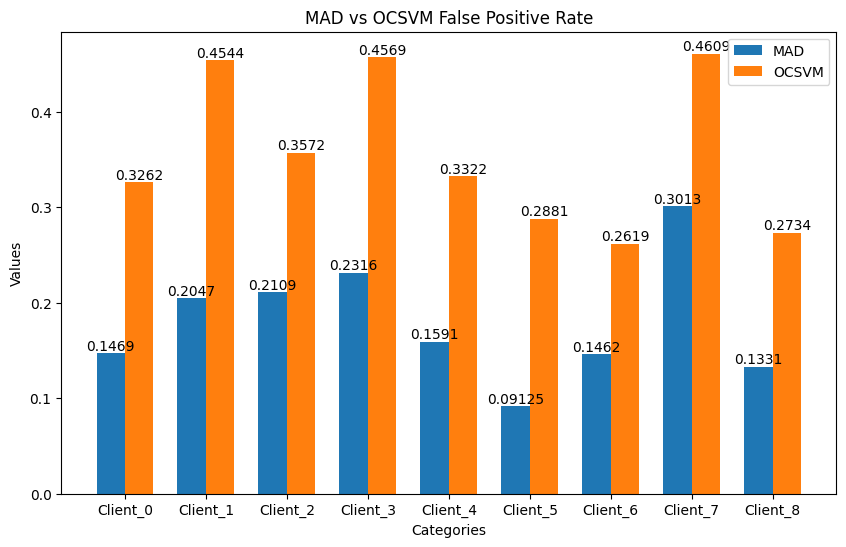

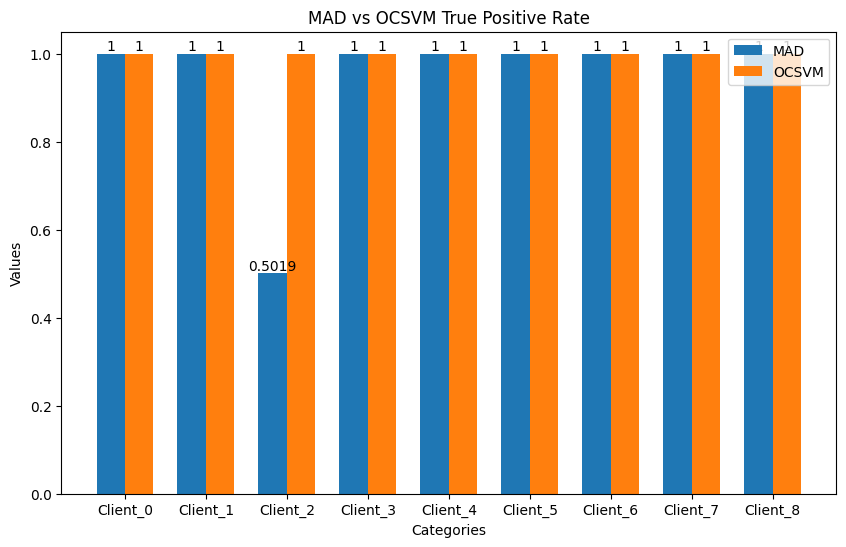

In [ ]:
history_STD,history_OCSVM = run_test_OCSVM(2,0.3,threshold_type='STD')

CLIENT:0
Epoch [1/1], Train Loss: 0.1231
original loss:6240
filtered loss:6086
Epoch 1: validation loss 0.061236356179683635
threshold:0.10925573413479688
Epoch [1/1], Train Loss: 0.0464
original loss:6240
filtered loss:6005
Epoch 2: validation loss 0.022216634003397746
threshold:0.05262623594469293
Epoch [1/1], Train Loss: 0.0304
original loss:6240
filtered loss:5982
Epoch 3: validation loss 0.018967810865396107
threshold:0.04596572798081885
Epoch [1/1], Train Loss: 0.0260
original loss:6240
filtered loss:6017
Epoch 4: validation loss 0.017637682357468668
threshold:0.0434663040272835
Epoch [1/1], Train Loss: 0.0246
original loss:6240
filtered loss:6024
Epoch 5: validation loss 0.016955241594368068
threshold:0.04169516575155942
Epoch [1/1], Train Loss: 0.0237
original loss:6240
filtered loss:6025
Epoch 6: validation loss 0.016194213119645914
threshold:0.04065724885941514
Epoch [1/1], Train Loss: 0.0229
original loss:6240
filtered loss:6017
Epoch 7: validation loss 0.015725451989624745


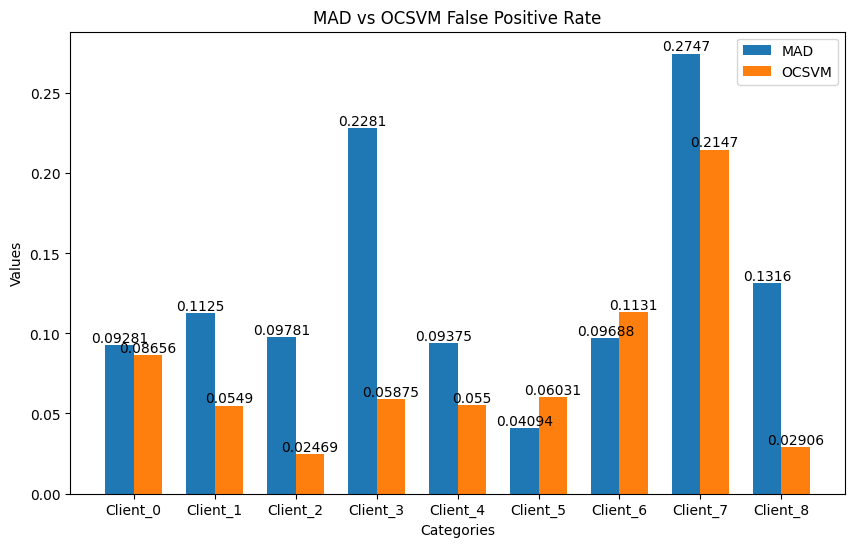

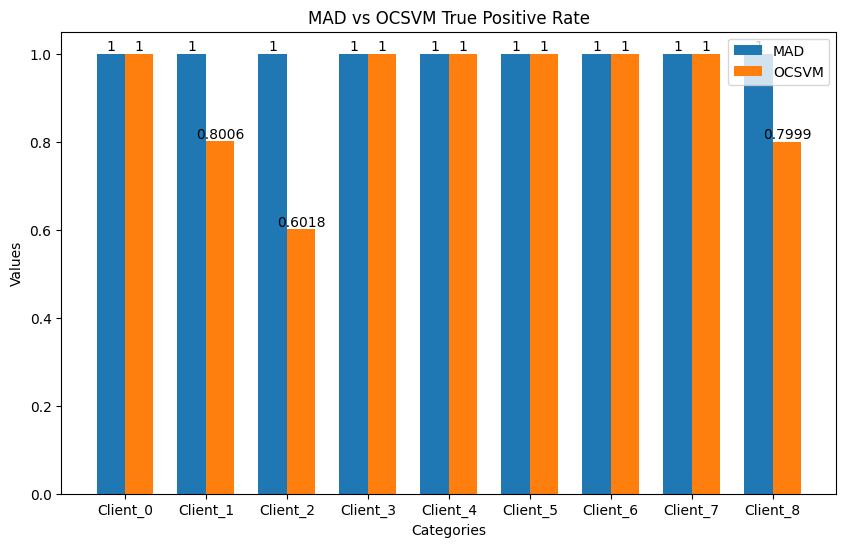

In [ ]:
history_STD,history_OCSVM = run_test_OCSVM(3,0.02,threshold_type='STD')

CLIENT:0
Epoch [1/1], Train Loss: 0.1249
Epoch 1: validation loss 0.061839840694879876
threshold:0.20113617181777954
Epoch [1/1], Train Loss: 0.0549
Epoch 2: validation loss 0.026874497857613443
threshold:0.12220528069883585
Epoch [1/1], Train Loss: 0.0328
Epoch 3: validation loss 0.021706479186048875
threshold:0.07458847714588046
Epoch [1/1], Train Loss: 0.0279
Epoch 4: validation loss 0.0190082940678948
threshold:0.05434679472818971
Epoch [1/1], Train Loss: 0.0250
Epoch 5: validation loss 0.017726928821932046
threshold:0.049196168314665556
Epoch [1/1], Train Loss: 0.0239
Epoch 6: validation loss 0.01698042109895211
threshold:0.04494535690173507
Epoch [1/1], Train Loss: 0.0230
Epoch 7: validation loss 0.016536157028988387
threshold:0.04156857309862971
Epoch [1/1], Train Loss: 0.0223
Epoch 8: validation loss 0.015699799301532598
threshold:0.04257844714447856
Epoch [1/1], Train Loss: 0.0216
Epoch 9: validation loss 0.01498997038564621
threshold:0.04292979696765542
Epoch [1/1], Train Los

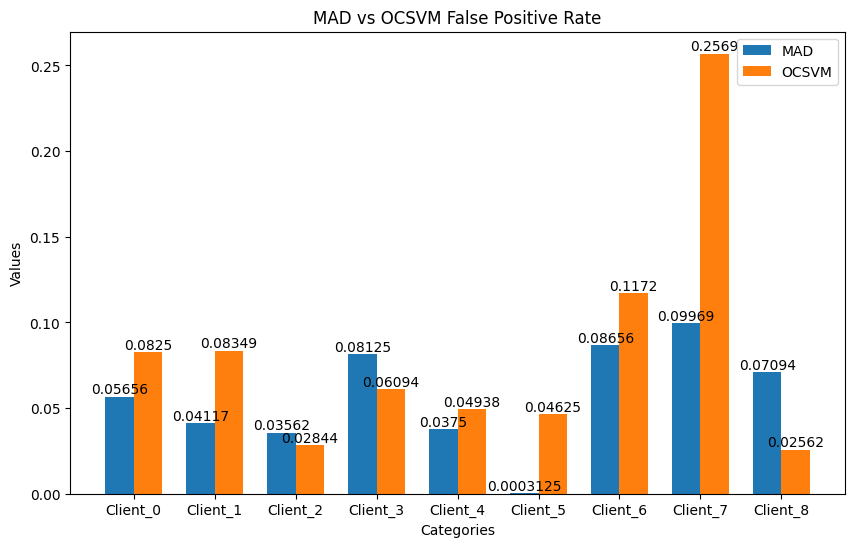

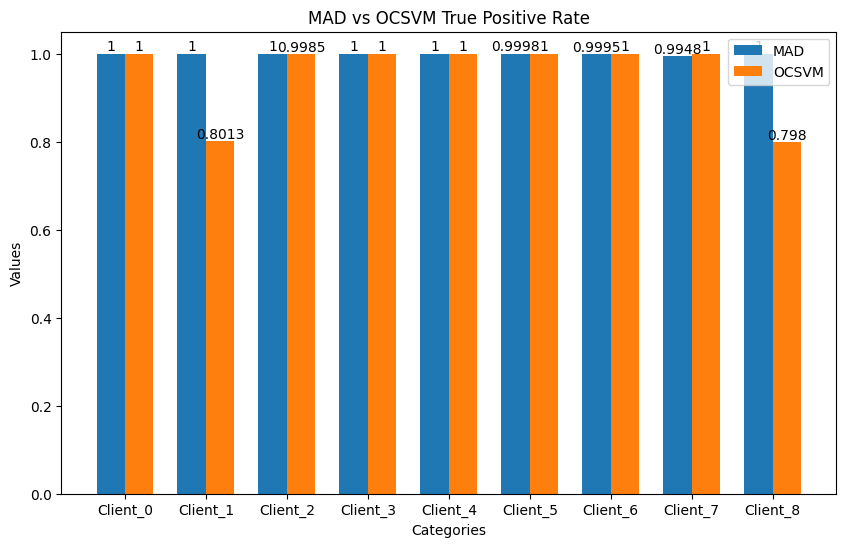

In [ ]:
history_MAD,history_OCSVM = run_test_OCSVM(10,0.02)

MAD-based thresholding outperforms OCSVM if training for large number of epochs

In [ ]:
print(f"roc_auc:{history_MAD['roc_auc']}")
print(f"fpr:{history_MAD['fpr']}")
print(f"tpr:{history_MAD['tpr']}")

roc_auc:[0.995871171875, 0.9997643442622951, 0.985462890625, 0.9998418359375001, 0.9999911328125, 0.999934140625, 0.971465625, 0.9806333984375, 0.9961080859375]
fpr:[0.0565625, 0.041174227983225314, 0.035625, 0.08125, 0.0375, 0.0003125, 0.0865625, 0.0996875, 0.0709375]
tpr:[1.0, 1.0, 1.0, 1.0, 1.0, 0.99975, 0.9995, 0.99475, 1.0]


Epoch [1/1], Train Loss: 0.1276
Epoch [1/1], Train Loss: 0.0404
Epoch [1/1], Train Loss: 0.0287
Epoch [1/1], Train Loss: 0.0244
Epoch [1/1], Train Loss: 0.0225
exceed threshold proportion:0.0271875
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.0265625
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.0259375
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.025625
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.024375
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.02375
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.0225
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
exceed threshold proportion:0.0221875
count_total:3200.0
exceed threshold proportion:1.0
co

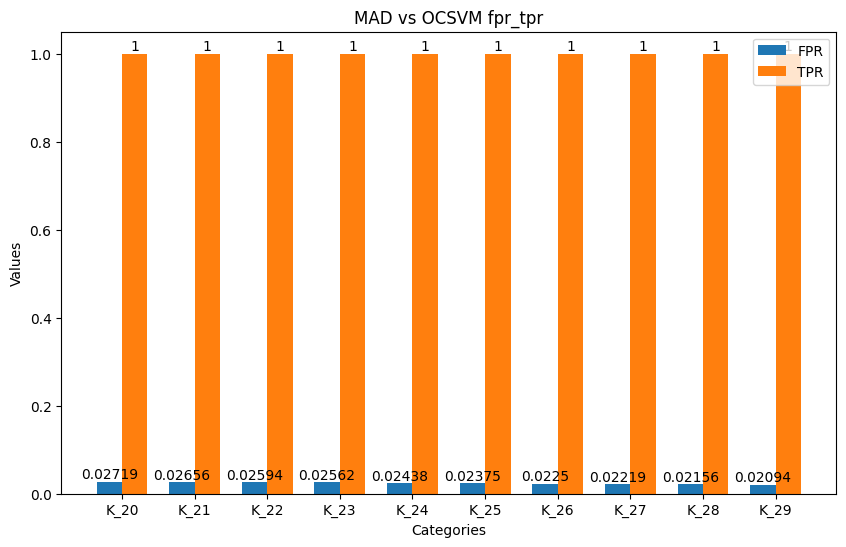

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=0,label_col_num = 3)
net = Autoencoder(115,58,29)
for epoch in range(5):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(20,30):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(20,30)])

Epoch [1/1], Train Loss: 0.1263
Epoch [1/1], Train Loss: 0.0510
Epoch [1/1], Train Loss: 0.0316
Epoch [1/1], Train Loss: 0.0269
Epoch [1/1], Train Loss: 0.0245
Epoch [1/1], Train Loss: 0.0236
Epoch [1/1], Train Loss: 0.0229
Epoch [1/1], Train Loss: 0.0221
Epoch [1/1], Train Loss: 0.0211
Epoch [1/1], Train Loss: 0.0202
Epoch [1/1], Train Loss: 0.0192
Epoch [1/1], Train Loss: 0.0183
Epoch [1/1], Train Loss: 0.0175
Epoch [1/1], Train Loss: 0.0167
Epoch [1/1], Train Loss: 0.0161
Epoch [1/1], Train Loss: 0.0156
Epoch [1/1], Train Loss: 0.0153
Epoch [1/1], Train Loss: 0.0149
Epoch [1/1], Train Loss: 0.0147
Epoch [1/1], Train Loss: 0.0144
Epoch [1/1], Train Loss: 0.0141
Epoch [1/1], Train Loss: 0.0137
Epoch [1/1], Train Loss: 0.0135
Epoch [1/1], Train Loss: 0.0132
Epoch [1/1], Train Loss: 0.0129
Epoch [1/1], Train Loss: 0.0127
Epoch [1/1], Train Loss: 0.0124
Epoch [1/1], Train Loss: 0.0121
Epoch [1/1], Train Loss: 0.0119
Epoch [1/1], Train Loss: 0.0117
Epoch [1/1], Train Loss: 0.0114
Epoch [1

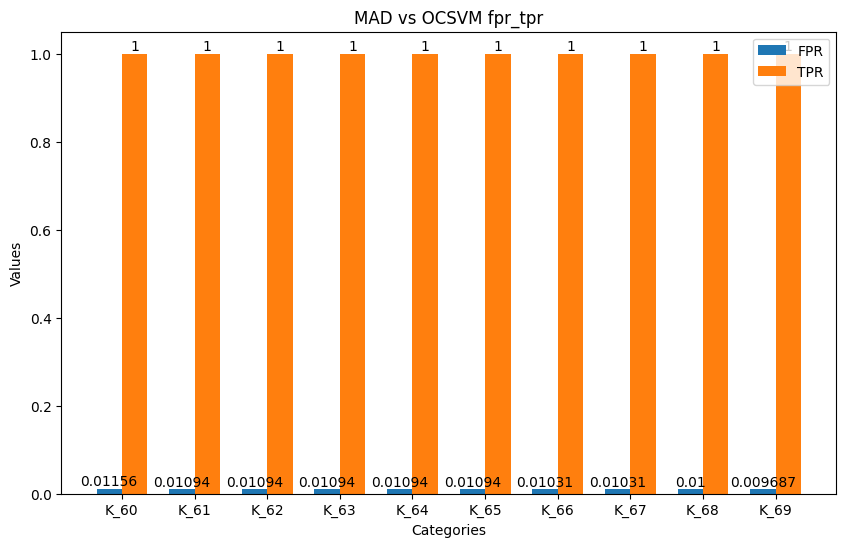

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=0,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(60,70):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(60,70)])

## **Select K = 69 for Client 1**

Epoch [1/1], Train Loss: 0.1508
Epoch [1/1], Train Loss: 0.0808
Epoch [1/1], Train Loss: 0.0606
Epoch [1/1], Train Loss: 0.0498
Epoch [1/1], Train Loss: 0.0467
Epoch [1/1], Train Loss: 0.0446
Epoch [1/1], Train Loss: 0.0419
Epoch [1/1], Train Loss: 0.0397
Epoch [1/1], Train Loss: 0.0381
Epoch [1/1], Train Loss: 0.0371
Epoch [1/1], Train Loss: 0.0362
Epoch [1/1], Train Loss: 0.0352
Epoch [1/1], Train Loss: 0.0342
Epoch [1/1], Train Loss: 0.0335
Epoch [1/1], Train Loss: 0.0320
Epoch [1/1], Train Loss: 0.0311
Epoch [1/1], Train Loss: 0.0307
Epoch [1/1], Train Loss: 0.0301
Epoch [1/1], Train Loss: 0.0297
Epoch [1/1], Train Loss: 0.0291
Epoch [1/1], Train Loss: 0.0286
Epoch [1/1], Train Loss: 0.0281
Epoch [1/1], Train Loss: 0.0275
Epoch [1/1], Train Loss: 0.0269
Epoch [1/1], Train Loss: 0.0265
Epoch [1/1], Train Loss: 0.0260
Epoch [1/1], Train Loss: 0.0255
Epoch [1/1], Train Loss: 0.0250
Epoch [1/1], Train Loss: 0.0245
Epoch [1/1], Train Loss: 0.0240
Epoch [1/1], Train Loss: 0.0237
Epoch [1

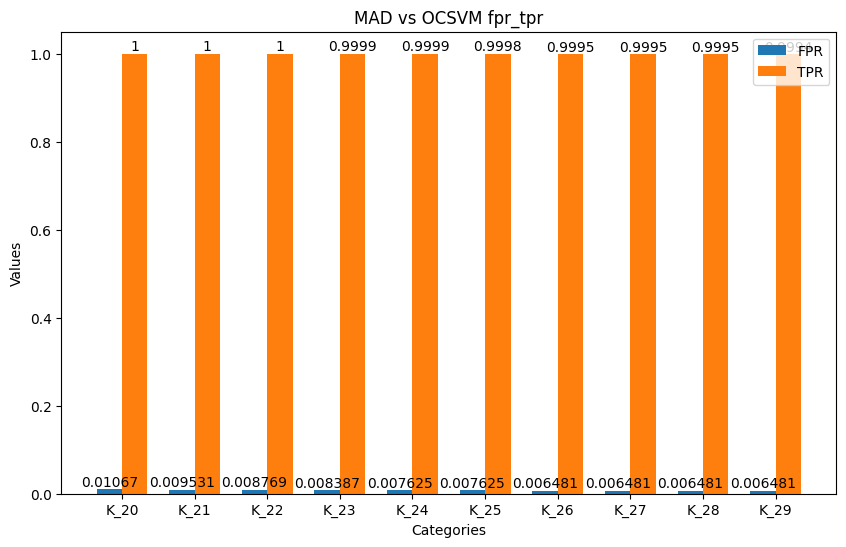

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=1,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(20,30):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(20,30)])

## **Select K = 22 for Client 2**

Epoch [1/1], Train Loss: 0.1792
Epoch [1/1], Train Loss: 0.0887
Epoch [1/1], Train Loss: 0.0745
Epoch [1/1], Train Loss: 0.0648
Epoch [1/1], Train Loss: 0.0599
Epoch [1/1], Train Loss: 0.0556
Epoch [1/1], Train Loss: 0.0522
Epoch [1/1], Train Loss: 0.0487
Epoch [1/1], Train Loss: 0.0450
Epoch [1/1], Train Loss: 0.0425
Epoch [1/1], Train Loss: 0.0410
Epoch [1/1], Train Loss: 0.0398
Epoch [1/1], Train Loss: 0.0385
Epoch [1/1], Train Loss: 0.0373
Epoch [1/1], Train Loss: 0.0363
Epoch [1/1], Train Loss: 0.0353
Epoch [1/1], Train Loss: 0.0345
Epoch [1/1], Train Loss: 0.0338
Epoch [1/1], Train Loss: 0.0331
Epoch [1/1], Train Loss: 0.0325
Epoch [1/1], Train Loss: 0.0318
Epoch [1/1], Train Loss: 0.0314
Epoch [1/1], Train Loss: 0.0309
Epoch [1/1], Train Loss: 0.0305
Epoch [1/1], Train Loss: 0.0301
Epoch [1/1], Train Loss: 0.0297
Epoch [1/1], Train Loss: 0.0293
Epoch [1/1], Train Loss: 0.0290
Epoch [1/1], Train Loss: 0.0285
Epoch [1/1], Train Loss: 0.0283
Epoch [1/1], Train Loss: 0.0278
Epoch [1

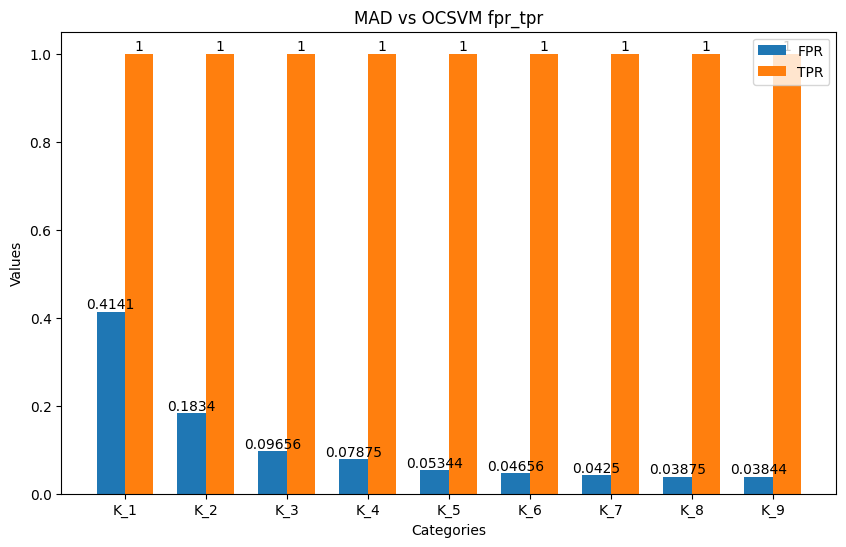

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=2,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(1,10):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(1,10)])

## **Select K = 9 for Client 3**

Epoch [1/1], Train Loss: 0.1453
Epoch [1/1], Train Loss: 0.1119
Epoch [1/1], Train Loss: 0.1068
Epoch [1/1], Train Loss: 0.0972
Epoch [1/1], Train Loss: 0.0818
Epoch [1/1], Train Loss: 0.0744
Epoch [1/1], Train Loss: 0.0712
Epoch [1/1], Train Loss: 0.0703
Epoch [1/1], Train Loss: 0.0687
Epoch [1/1], Train Loss: 0.0657
Epoch [1/1], Train Loss: 0.0634
Epoch [1/1], Train Loss: 0.0631
Epoch [1/1], Train Loss: 0.0615
Epoch [1/1], Train Loss: 0.0594
Epoch [1/1], Train Loss: 0.0601
Epoch [1/1], Train Loss: 0.0577
Epoch [1/1], Train Loss: 0.0581
Epoch [1/1], Train Loss: 0.0564
Epoch [1/1], Train Loss: 0.0564
Epoch [1/1], Train Loss: 0.0554
Epoch [1/1], Train Loss: 0.0543
Epoch [1/1], Train Loss: 0.0553
Epoch [1/1], Train Loss: 0.0533
Epoch [1/1], Train Loss: 0.0537
Epoch [1/1], Train Loss: 0.0542
Epoch [1/1], Train Loss: 0.0532
Epoch [1/1], Train Loss: 0.0502
Epoch [1/1], Train Loss: 0.0474
Epoch [1/1], Train Loss: 0.0476
Epoch [1/1], Train Loss: 0.0456
Epoch [1/1], Train Loss: 0.0453
Epoch [1

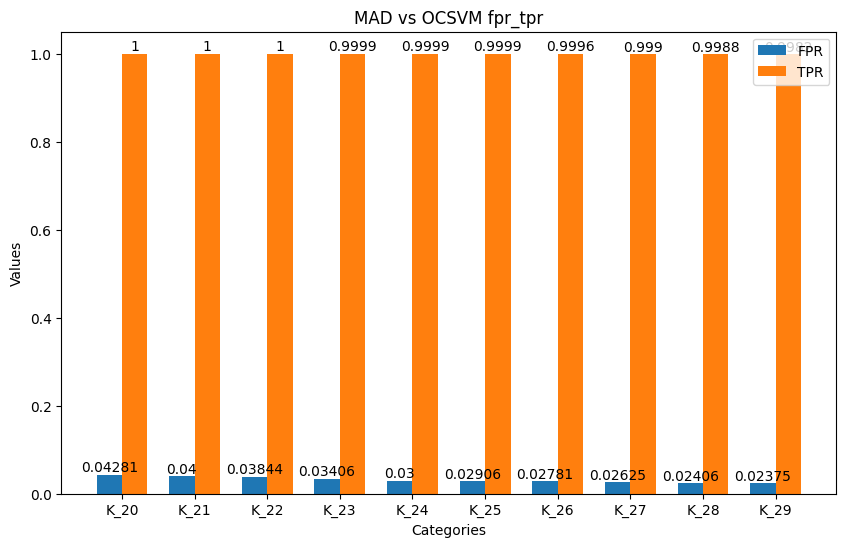

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=3,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(20,30):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(20,30)])

## **Select K = 21 for client 4**

Epoch [1/1], Train Loss: 0.1615
Epoch [1/1], Train Loss: 0.0822
Epoch [1/1], Train Loss: 0.0700
Epoch [1/1], Train Loss: 0.0648
Epoch [1/1], Train Loss: 0.0607
Epoch [1/1], Train Loss: 0.0572
Epoch [1/1], Train Loss: 0.0548
Epoch [1/1], Train Loss: 0.0511
Epoch [1/1], Train Loss: 0.0474
Epoch [1/1], Train Loss: 0.0449
Epoch [1/1], Train Loss: 0.0433
Epoch [1/1], Train Loss: 0.0415
Epoch [1/1], Train Loss: 0.0415
Epoch [1/1], Train Loss: 0.0398
Epoch [1/1], Train Loss: 0.0388
Epoch [1/1], Train Loss: 0.0376
Epoch [1/1], Train Loss: 0.0372
Epoch [1/1], Train Loss: 0.0363
Epoch [1/1], Train Loss: 0.0343
Epoch [1/1], Train Loss: 0.0328
Epoch [1/1], Train Loss: 0.0322
Epoch [1/1], Train Loss: 0.0317
Epoch [1/1], Train Loss: 0.0326
Epoch [1/1], Train Loss: 0.0311
Epoch [1/1], Train Loss: 0.0309
Epoch [1/1], Train Loss: 0.0301
Epoch [1/1], Train Loss: 0.0289
Epoch [1/1], Train Loss: 0.0282
Epoch [1/1], Train Loss: 0.0277
Epoch [1/1], Train Loss: 0.0287
Epoch [1/1], Train Loss: 0.0264
Epoch [1

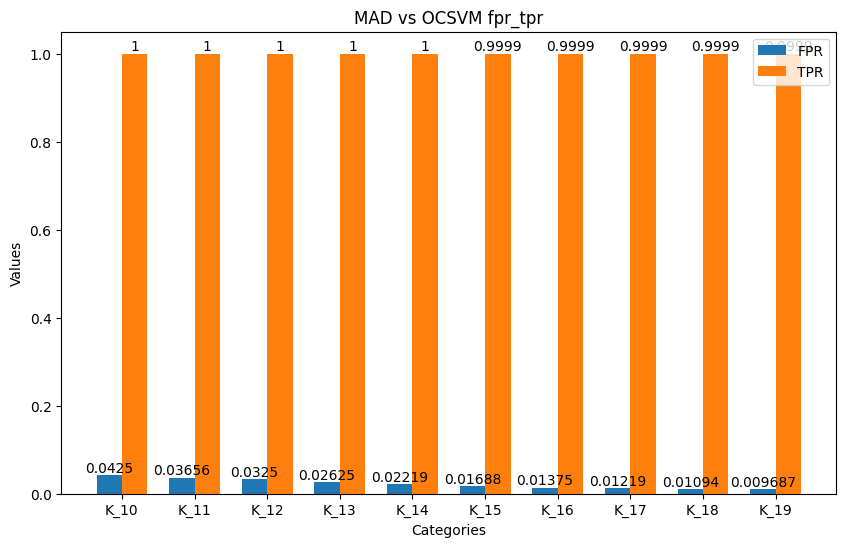

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=4,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(10,20):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
  roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
  print(f'roc_auc:{roc_auc}')
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(10,20)])


## **Select K = 14 for client 5**

Epoch [1/1], Train Loss: 0.1829
Epoch [1/1], Train Loss: 0.1132
Epoch [1/1], Train Loss: 0.0954
Epoch [1/1], Train Loss: 0.0873
Epoch [1/1], Train Loss: 0.0830
Epoch [1/1], Train Loss: 0.0721
Epoch [1/1], Train Loss: 0.0635
Epoch [1/1], Train Loss: 0.0620
Epoch [1/1], Train Loss: 0.0585
Epoch [1/1], Train Loss: 0.0545
Epoch [1/1], Train Loss: 0.0536
Epoch [1/1], Train Loss: 0.0542
Epoch [1/1], Train Loss: 0.0509
Epoch [1/1], Train Loss: 0.0497
Epoch [1/1], Train Loss: 0.0478
Epoch [1/1], Train Loss: 0.0481
Epoch [1/1], Train Loss: 0.0478
Epoch [1/1], Train Loss: 0.0439
Epoch [1/1], Train Loss: 0.0473
Epoch [1/1], Train Loss: 0.0467
Epoch [1/1], Train Loss: 0.0455
Epoch [1/1], Train Loss: 0.0425
Epoch [1/1], Train Loss: 0.0415
Epoch [1/1], Train Loss: 0.0421
Epoch [1/1], Train Loss: 0.0397
Epoch [1/1], Train Loss: 0.0391
Epoch [1/1], Train Loss: 0.0399
Epoch [1/1], Train Loss: 0.0390
Epoch [1/1], Train Loss: 0.0393
Epoch [1/1], Train Loss: 0.0371
Epoch [1/1], Train Loss: 0.0388
Epoch [1

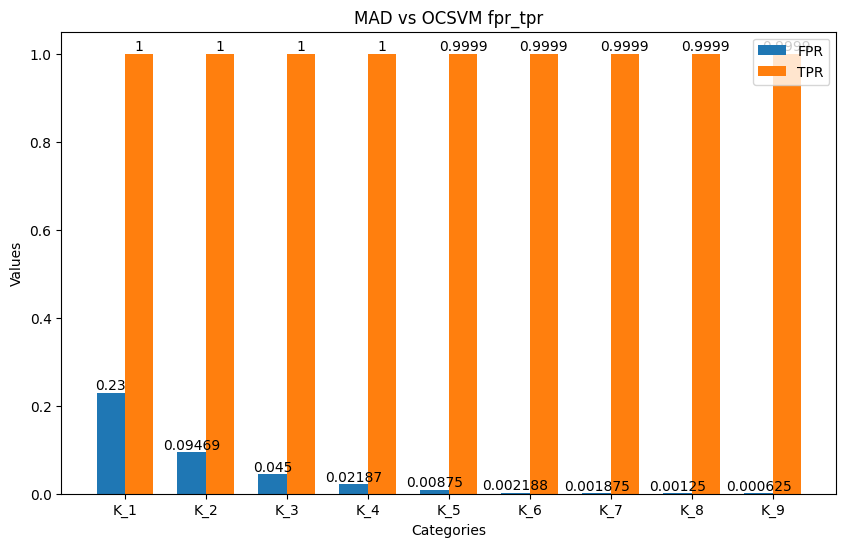

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=5,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(1,10):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
  roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
  print(f'roc_auc:{roc_auc}')
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(1,10)])


## **Select K = 4 for client 6**

Epoch [1/1], Train Loss: 0.1519
Epoch [1/1], Train Loss: 0.0545
Epoch [1/1], Train Loss: 0.0435
Epoch [1/1], Train Loss: 0.0312
Epoch [1/1], Train Loss: 0.0277
Epoch [1/1], Train Loss: 0.0261
Epoch [1/1], Train Loss: 0.0251
Epoch [1/1], Train Loss: 0.0244
Epoch [1/1], Train Loss: 0.0239
Epoch [1/1], Train Loss: 0.0233
Epoch [1/1], Train Loss: 0.0226
Epoch [1/1], Train Loss: 0.0212
Epoch [1/1], Train Loss: 0.0196
Epoch [1/1], Train Loss: 0.0175
Epoch [1/1], Train Loss: 0.0170
Epoch [1/1], Train Loss: 0.0154
Epoch [1/1], Train Loss: 0.0152
Epoch [1/1], Train Loss: 0.0143
Epoch [1/1], Train Loss: 0.0143
Epoch [1/1], Train Loss: 0.0137
Epoch [1/1], Train Loss: 0.0138
Epoch [1/1], Train Loss: 0.0133
Epoch [1/1], Train Loss: 0.0136
Epoch [1/1], Train Loss: 0.0132
Epoch [1/1], Train Loss: 0.0130
Epoch [1/1], Train Loss: 0.0130
Epoch [1/1], Train Loss: 0.0127
Epoch [1/1], Train Loss: 0.0127
Epoch [1/1], Train Loss: 0.0124
Epoch [1/1], Train Loss: 0.0126
Epoch [1/1], Train Loss: 0.0122
Epoch [1

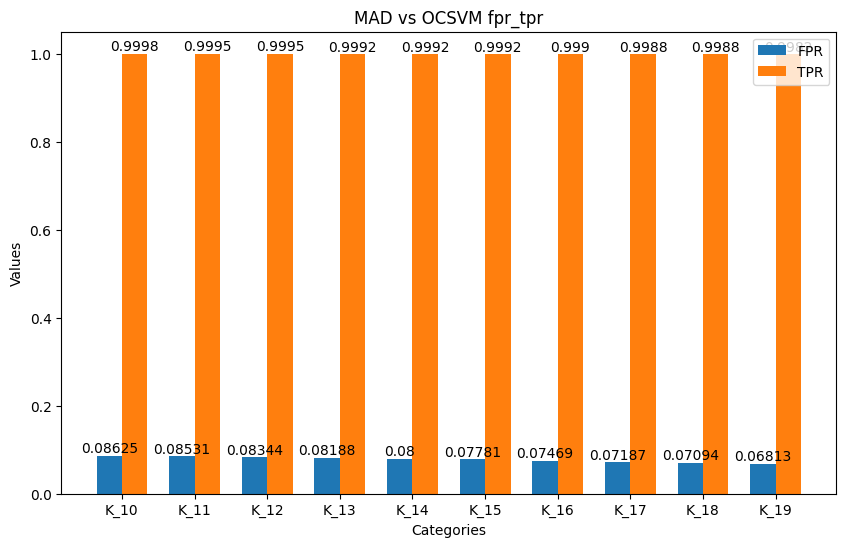

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=6,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(10,20):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
  roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
  print(f'roc_auc:{roc_auc}')
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(10,20)])


## **Select K = 9 for client 7**

Epoch [1/1], Train Loss: 0.1777
Epoch [1/1], Train Loss: 0.0960
Epoch [1/1], Train Loss: 0.0902
Epoch [1/1], Train Loss: 0.0872
Epoch [1/1], Train Loss: 0.0781
Epoch [1/1], Train Loss: 0.0683
Epoch [1/1], Train Loss: 0.0695
Epoch [1/1], Train Loss: 0.0593
Epoch [1/1], Train Loss: 0.0543
Epoch [1/1], Train Loss: 0.0514
Epoch [1/1], Train Loss: 0.0469
Epoch [1/1], Train Loss: 0.0431
Epoch [1/1], Train Loss: 0.0420
Epoch [1/1], Train Loss: 0.0406
Epoch [1/1], Train Loss: 0.0396
Epoch [1/1], Train Loss: 0.0393
Epoch [1/1], Train Loss: 0.0394
Epoch [1/1], Train Loss: 0.0383
Epoch [1/1], Train Loss: 0.0376
Epoch [1/1], Train Loss: 0.0366
Epoch [1/1], Train Loss: 0.0367
Epoch [1/1], Train Loss: 0.0375
Epoch [1/1], Train Loss: 0.0366
Epoch [1/1], Train Loss: 0.0367
Epoch [1/1], Train Loss: 0.0356
Epoch [1/1], Train Loss: 0.0358
Epoch [1/1], Train Loss: 0.0348
Epoch [1/1], Train Loss: 0.0343
Epoch [1/1], Train Loss: 0.0350
Epoch [1/1], Train Loss: 0.0346
Epoch [1/1], Train Loss: 0.0329
Epoch [1

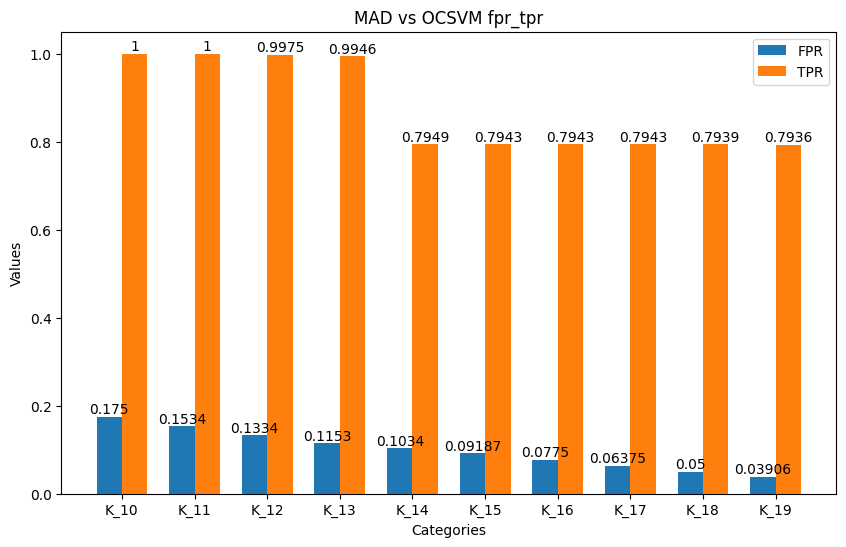

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=7,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(10,20):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
  roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
  print(f'roc_auc:{roc_auc}')
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(10,20)])


## **Select K = 10 for client 8**

Epoch [1/1], Train Loss: 0.1242
Epoch [1/1], Train Loss: 0.0489
Epoch [1/1], Train Loss: 0.0417
Epoch [1/1], Train Loss: 0.0389
Epoch [1/1], Train Loss: 0.0376
Epoch [1/1], Train Loss: 0.0347
Epoch [1/1], Train Loss: 0.0331
Epoch [1/1], Train Loss: 0.0313
Epoch [1/1], Train Loss: 0.0300
Epoch [1/1], Train Loss: 0.0290
Epoch [1/1], Train Loss: 0.0286
Epoch [1/1], Train Loss: 0.0282
Epoch [1/1], Train Loss: 0.0276
Epoch [1/1], Train Loss: 0.0275
Epoch [1/1], Train Loss: 0.0271
Epoch [1/1], Train Loss: 0.0262
Epoch [1/1], Train Loss: 0.0255
Epoch [1/1], Train Loss: 0.0252
Epoch [1/1], Train Loss: 0.0243
Epoch [1/1], Train Loss: 0.0238
Epoch [1/1], Train Loss: 0.0233
Epoch [1/1], Train Loss: 0.0228
Epoch [1/1], Train Loss: 0.0229
Epoch [1/1], Train Loss: 0.0221
Epoch [1/1], Train Loss: 0.0211
Epoch [1/1], Train Loss: 0.0207
Epoch [1/1], Train Loss: 0.0206
Epoch [1/1], Train Loss: 0.0201
Epoch [1/1], Train Loss: 0.0212
Epoch [1/1], Train Loss: 0.0214
Epoch [1/1], Train Loss: 0.0199
Epoch [1

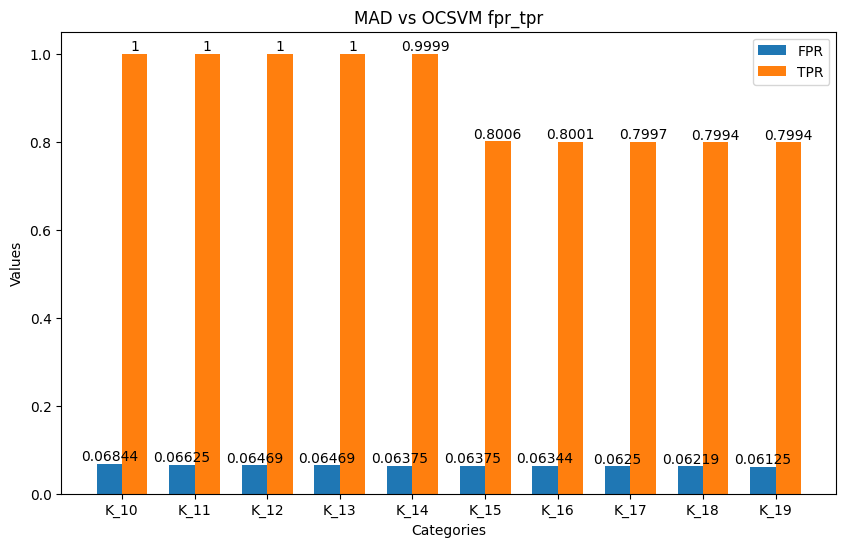

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=8,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(10,20):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
  roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
  print(f'roc_auc:{roc_auc}')
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(10,20)])


## **Select K = 13 for client 9**

In [ ]:
client_thresholds = {0:65,1:22,2:9,3:21,4:14,5:4,6:9,7:9,8:13}

# **Train individual clients with individual thresholds**

In [ ]:
# with MAD threshold selection
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
def run_test_customized(K_dict,nu,threshold_type = 'MAD'):
  client_thresholds = []
  client_fpr = []
  client_fpr_ocsvm = []
  client_tpr = []
  client_tpr_ocsvm = []
  client_roc_auc = []
  for client in range(9):
    K = K_dict[client]
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=client,label_col_num = 3)
    net = Autoencoder_4_layers(layer_sizes)
    print(f'CLIENT:{client}')
    for epoch in range(50):
        train(net, trainloader, 1)
        loss,loss_history, raw_valid_loss = validation(net, valloader)
        ## find threshold based on median absolute deviation
        RE_MED = np.median(loss_history)
        RE_MAD = np.median(np.abs(loss_history - RE_MED))
        ## find threshold based on std
        mean = np.mean(loss_history)
        std = np.std(loss_history)
        if threshold_type == 'MAD':
          threshold = RE_MED + K*RE_MAD
        elif threshold_type == 'std':
          threshold = mean + K*std
        ## find threshold based on clustering
        # Reshape the data to 2D (K-Means requires a 2D array)
        #values_reshaped = np.array(values).reshape(-1, 1)

        # Specify the number of clusters
        #k = 2  # Adjust this to your desired number of clusters

        # Apply K-Means clustering
        #kmeans = KMeans(n_clusters=k, random_state=42)
        #clusters = kmeans.fit_predict(values_reshaped)

        print(f"Epoch {epoch+1}: validation loss {loss}")
        print(f'threshold:{threshold}')
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(raw_valid_loss)
    ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
    ocsvm.fit(data_scaled)
    client_thresholds.append(threshold)
    benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
    #plot_pca_2d(raw_benign_loss)
    attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
    #plot_pca_2d(raw_attack_loss)
    raw_benign_loss_scaled = scaler.transform(raw_benign_loss)
    raw_attack_loss_scaled = scaler.transform(raw_attack_loss)
    benign_predicts = ocsvm.predict(raw_benign_loss_scaled)
    ocsvm_fpr = (benign_predicts < 0).sum()/len(benign_predicts)
    client_fpr_ocsvm.append(ocsvm_fpr)
    print(f'FPR derived with OCSVM:{ocsvm_fpr}')
    attack_predicts = ocsvm.predict(raw_attack_loss_scaled)
    ocsvm_tpr = (attack_predicts < 0).sum()/len(attack_predicts)
    client_tpr_ocsvm.append(ocsvm_tpr)
    print(f'TPR derived with OCSVM:{ocsvm_tpr}')
    fpr,tpr,tnr,fnr = false_positive,true_positive,1-false_positive,1-true_positive
    client_fpr.append(fpr)
    client_tpr.append(tpr)
    print(f'False Positive Rate:{fpr}')
    print(f'True Positive Rate:{tpr}')
    print(f'benign_error:{benign_MSE}')
    print(f'attack_error:{attack_MSE}')
    roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
    client_roc_auc.append(roc_auc)
  history_MAD = {'thresholds':client_thresholds,'fpr':client_fpr,'tpr':client_tpr,'roc_auc':client_roc_auc}
  history_OCSVM = {'fpr':client_fpr_ocsvm,'tpr':client_tpr_ocsvm}
  plot_barchart(client_fpr,client_fpr_ocsvm,'False Positive Rate',['MAD','OCSVM'])
  plot_barchart(client_tpr,client_tpr_ocsvm,'True Positive Rate',['MAD','OCSVM'])
  return history_MAD,history_OCSVM

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CLIENT:0
Epoch [1/1], Train Loss: 0.1246
Epoch 1: validation loss 0.061499255972030833
threshold:0.9677381496876478
Epoch [1/1], Train Loss: 0.0477
Epoch 2: validation loss 0.02405205540932142
threshold:0.6289029819890857
Epoch [1/1], Train Loss: 0.0309
Epoch 3: validation loss 0.019458067101927903
threshold:0.45185310719534755
Epoch [1/1], Train Loss: 0.0261
Epoch 4: validation loss 0.018025023217957754
threshold:0.33653359045274556
Epoch [1/1], Train Loss: 0.0246
Epoch 5: validation loss 0.017297730738153824
threshold:0.31298506492748857
Epoch [1/1], Train Loss: 0.0238
Epoch 6: validation loss 0.016780665292380714
threshold:0.2862732228823006
Epoch [1/1], Train Loss: 0.0232
Epoch 7: validation loss 0.01610482435864516
threshold:0.27273577032610774
Epoch [1/1], Train Loss: 0.0226
Epoch 8: validation loss 0.015561371076947604
threshold:0.2693838640116155
Epoch [1/1], Train Loss: 0.0222
Epoch 9: validation loss 0.015081954756990458
threshold:0.27210054779425263
Epoch [1/1], Train Loss: 

({'thresholds': [0.13452884438447654,
   0.10577634582296014,
   0.0983193526044488,
   0.05910133616998792,
   0.06324679823592305,
   0.052043684758245945,
   0.07275425619445741,
   0.052263332763686776,
   0.017161092488095164],
  'fpr': [0.00875,
   0.008387342737323675,
   0.0371875,
   0.04625,
   0.0246875,
   0.0315625,
   0.0878125,
   0.09375,
   0.0715625],
  'tpr': [0.79725, 0.99975, 1.0, 1.0, 1.0, 1.0, 1.0, 0.795375, 1.0],
  'roc_auc': [0.9967999609375,
   0.9998335874952344,
   0.9859603125000002,
   0.9998122656249999,
   0.9999915234375,
   0.9999991406250001,
   0.9796828906249999,
   0.9781208593749999,
   0.9885614453125]},
 {'fpr': [0.08625,
   0.09378574151734655,
   0.0325,
   0.06375,
   0.0578125,
   0.0509375,
   0.1278125,
   0.2603125,
   0.0209375],
  'tpr': [1.0, 1.0, 0.60325, 1.0, 1.0, 1.0, 1.0, 1.0, 0.799125]})

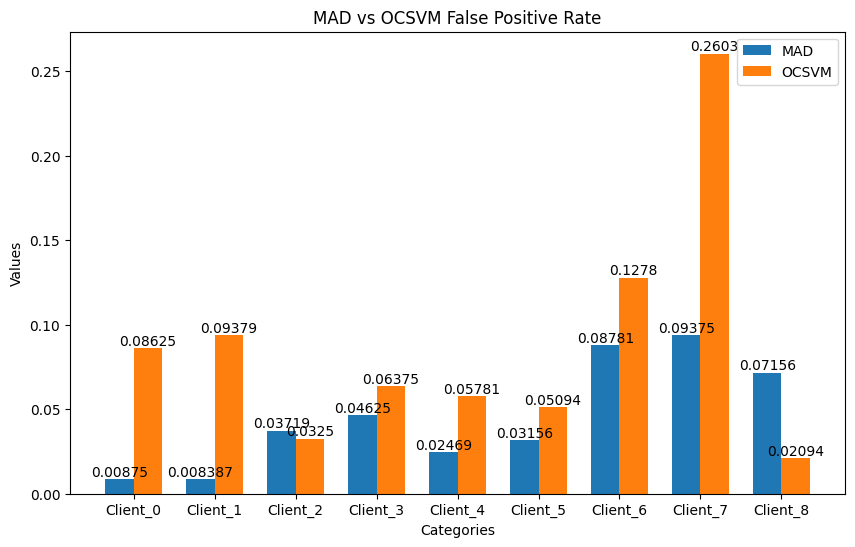

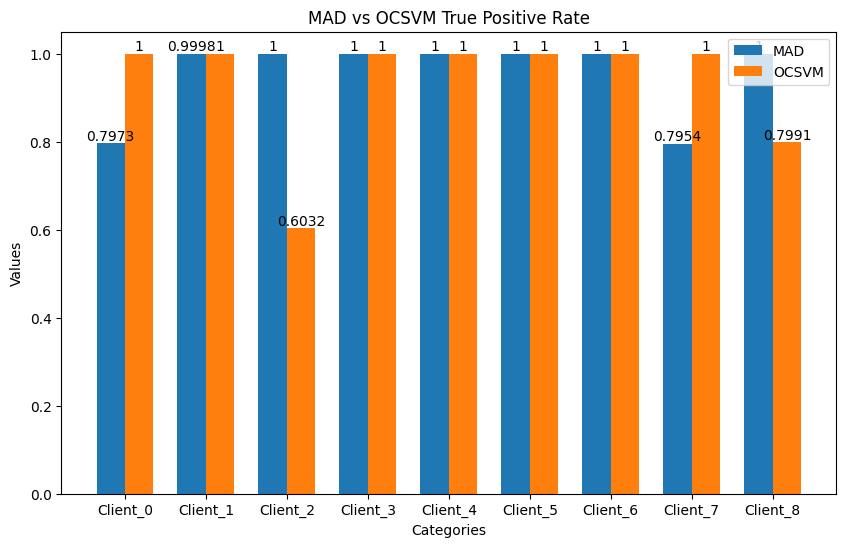

In [ ]:
run_test_customized(client_thresholds,0.02)

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=5,label_col_num = 3)
net = Autoencoder_4_layers(layer_sizes)
for epoch in range(50):
    train(net, trainloader, 1)
    loss,loss_history, raw_valid_loss = validation(net, valloader)
    ## find threshold based on median absolute deviation
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    std = np.std(loss_history)
fpr_list = []
tpr_list = []
for K in range(1,10):
  threshold = RE_MED + K*RE_MAD
  benign_MSE, benign_MSE_history,false_positive,raw_benign_loss = test(net, benign_testloader,threshold = threshold)
  attack_MSE, attack_MSE_history,true_positive, raw_attack_loss = test(net, attack_testloader,threshold = threshold)
  fpr_list.append(false_positive)
  tpr_list.append(true_positive)
  roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
  print(f'roc_auc:{roc_auc}')
plot_barchart(fpr_list,tpr_list,'fpr_tpr',['FPR','TPR'],labels = [f'K_{i}' for i in range(1,10)])


CLIENT:0
Epoch [1/1], Train Loss: 0.1242
Epoch 1: validation loss 0.05547013928492864
threshold:0.06880886107683182
Epoch [1/1], Train Loss: 0.0395
Epoch 2: validation loss 0.02260634504640714
threshold:0.02778830612078309
Epoch [1/1], Train Loss: 0.0275
Epoch 3: validation loss 0.018874377690446684
threshold:0.020864921621978283
Epoch [1/1], Train Loss: 0.0250
Epoch 4: validation loss 0.01699105002081547
threshold:0.016055635642260313
Epoch [1/1], Train Loss: 0.0233
Epoch 5: validation loss 0.015668819080560635
threshold:0.013800829881802201
exceed threshold proportion:0.4071875
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
FPR derived with OCSVM:0.106875
TPR derived with OCSVM:1.0
False Positive Rate:0.4071875
True Positive Rate:1.0
benign_error:0.021432622633874417
attack_error:46.21744666200876
roc_auc:0.9977
CLIENT:1
Epoch [1/1], Train Loss: 0.1501
Epoch 1: validation loss 0.07276713398223657
threshold:0.08230104669928551
Epoch [1/1], Train Loss: 0.0645
Epo

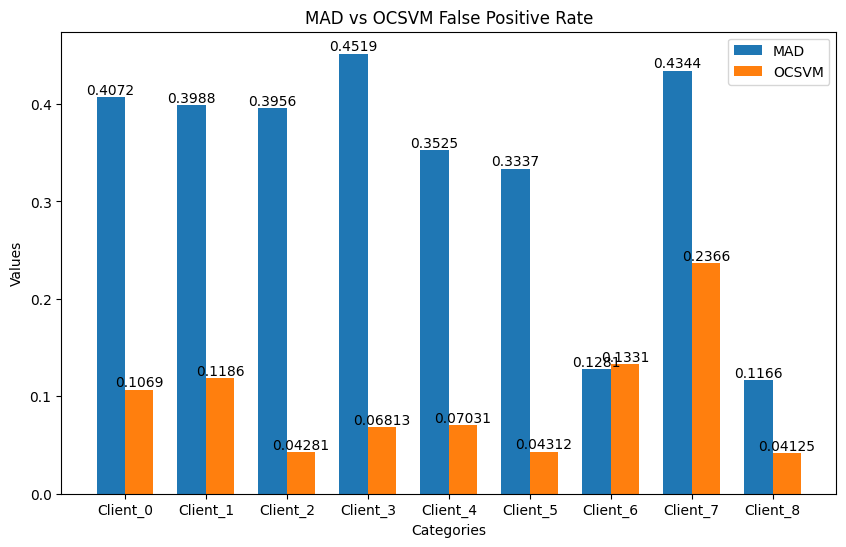

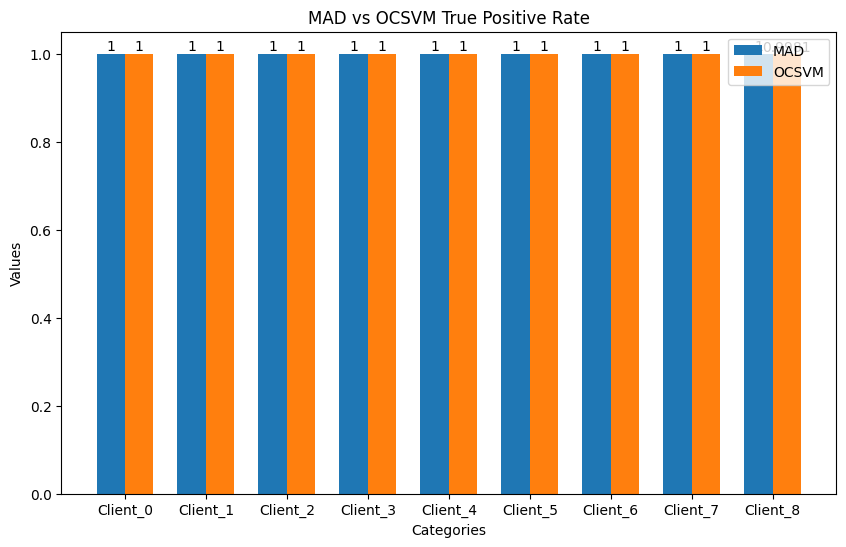

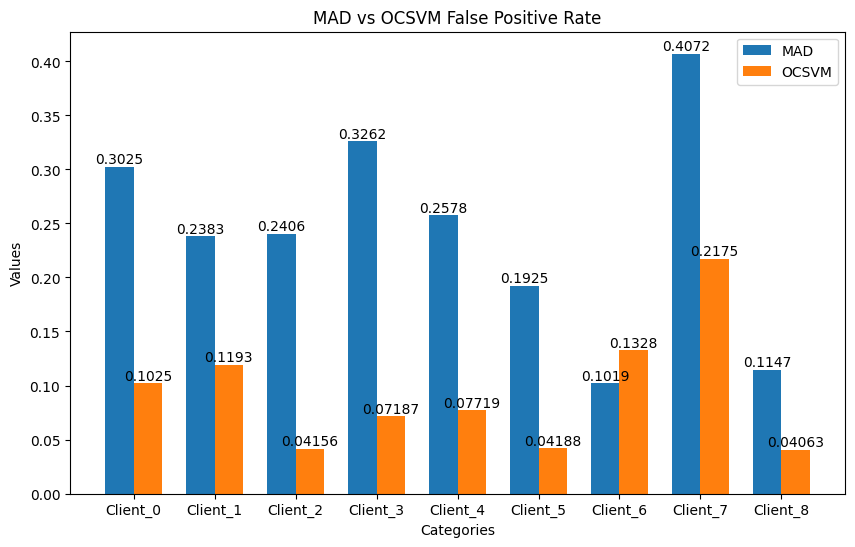

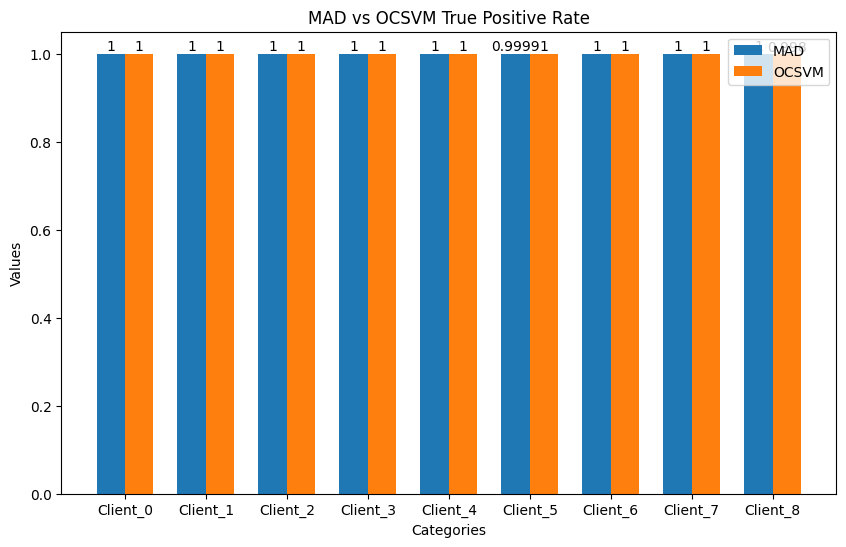

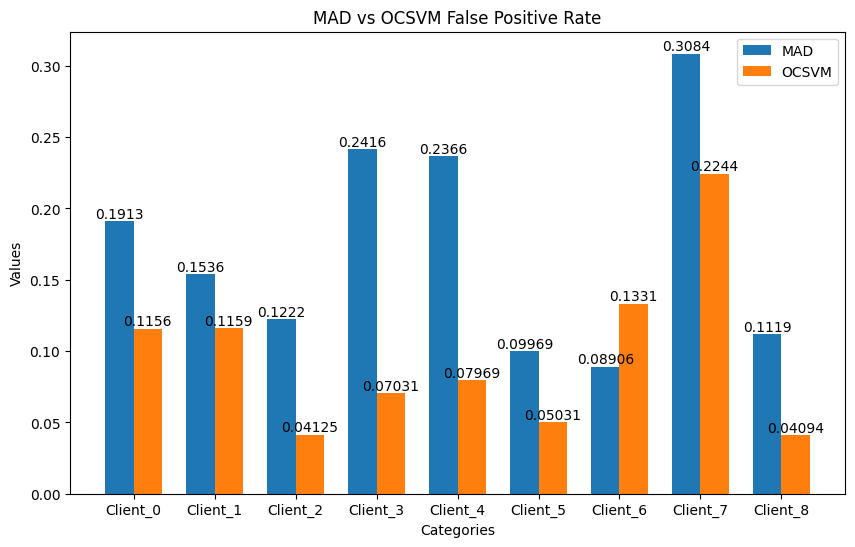

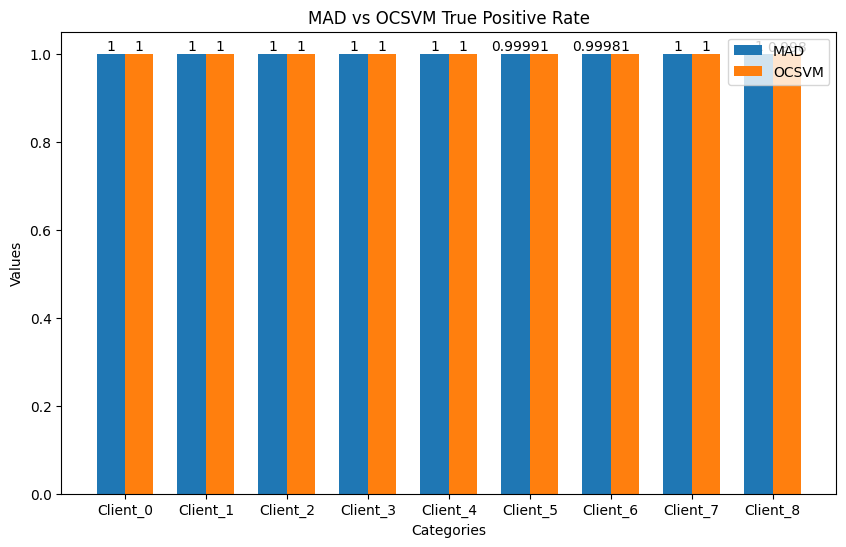

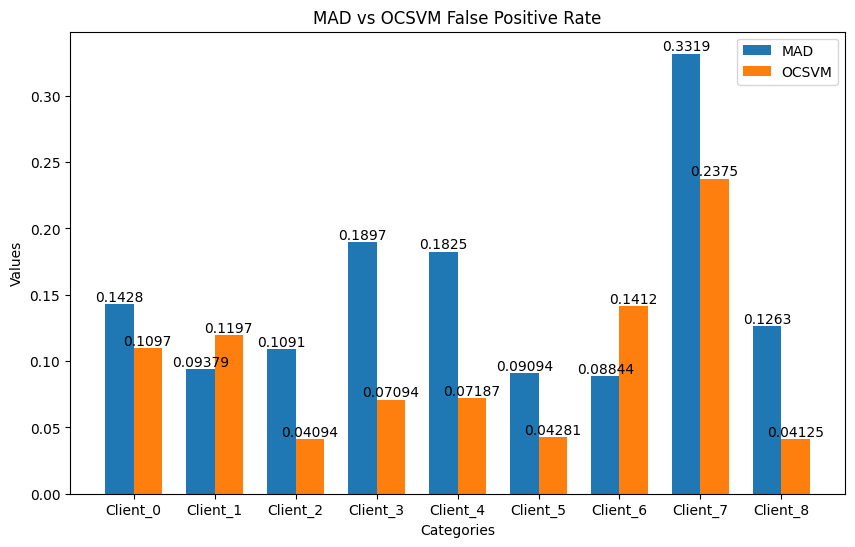

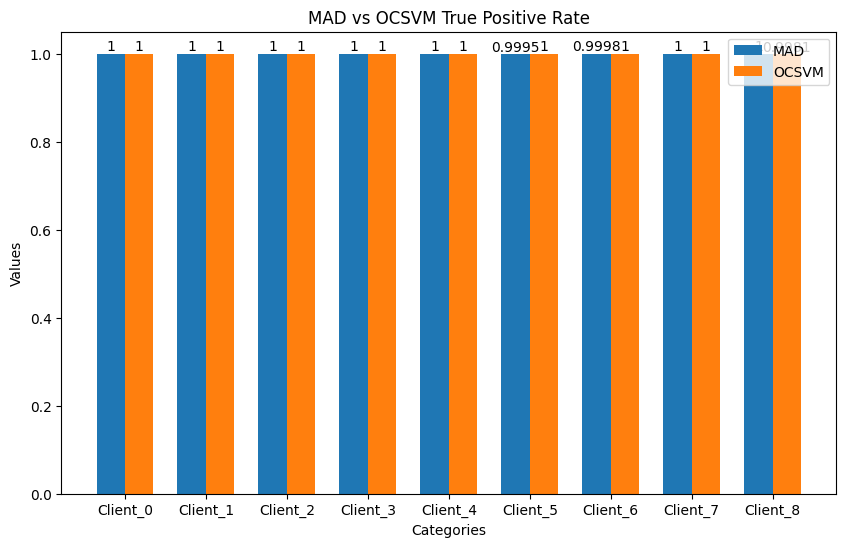

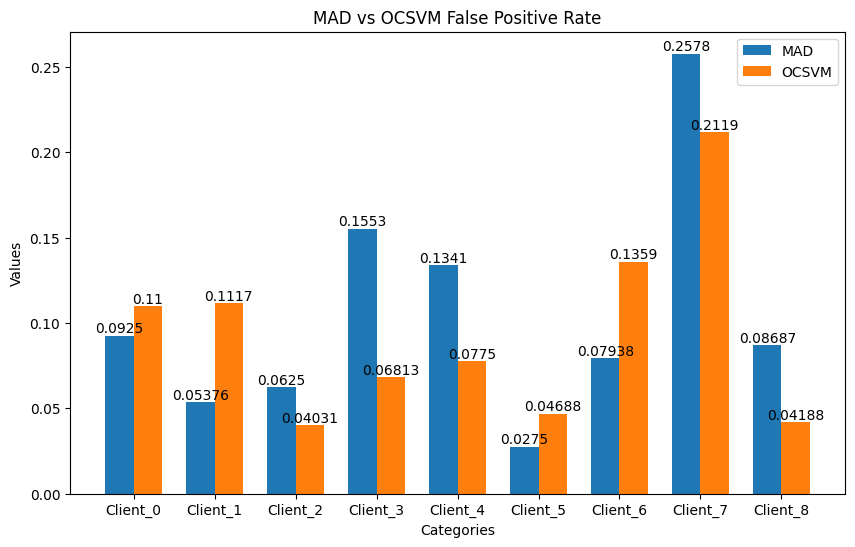

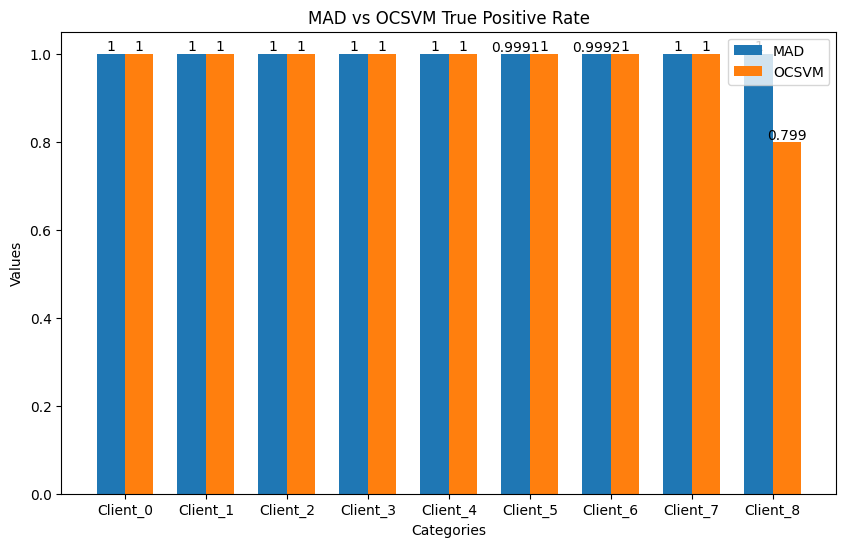

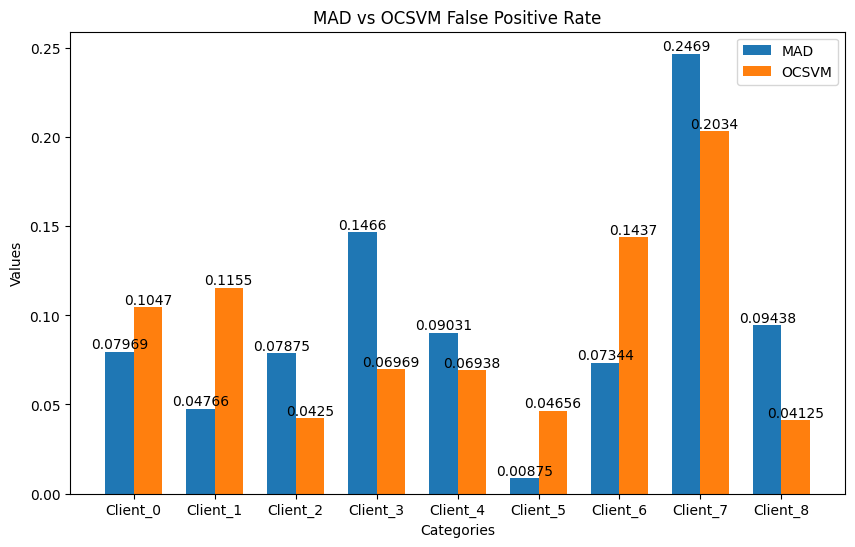

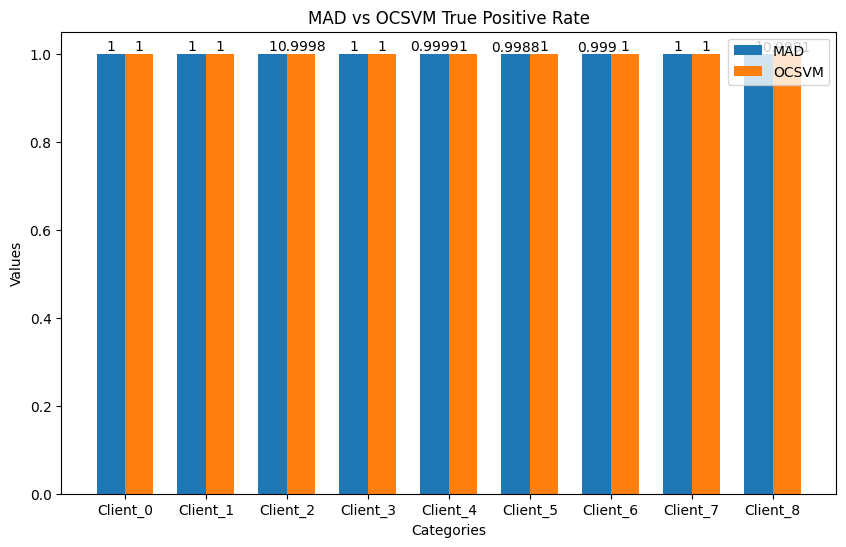

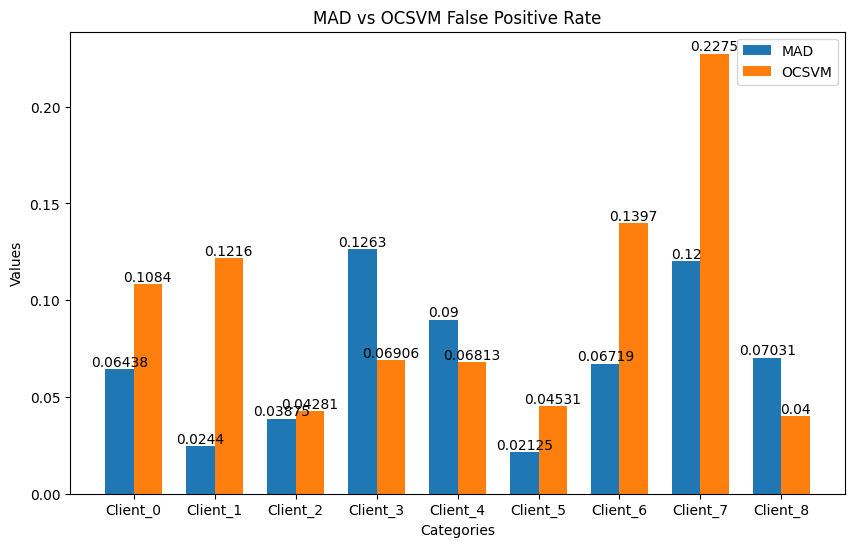

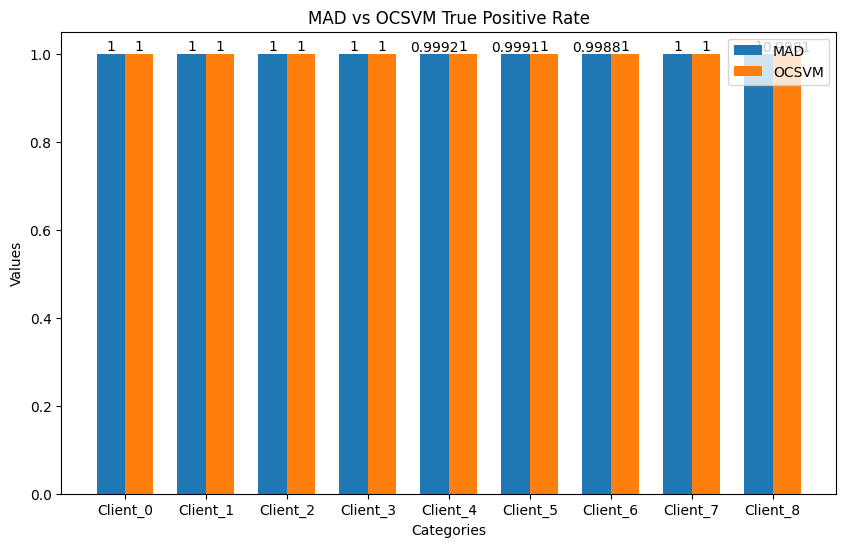

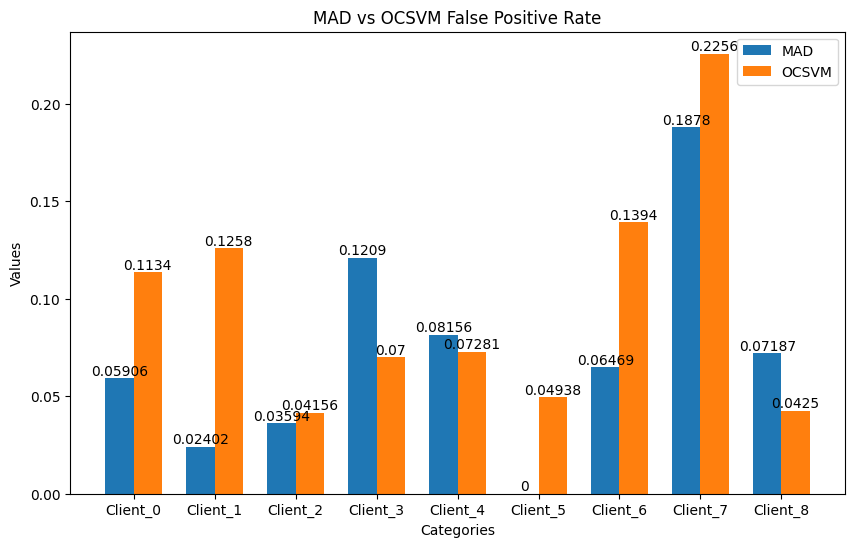

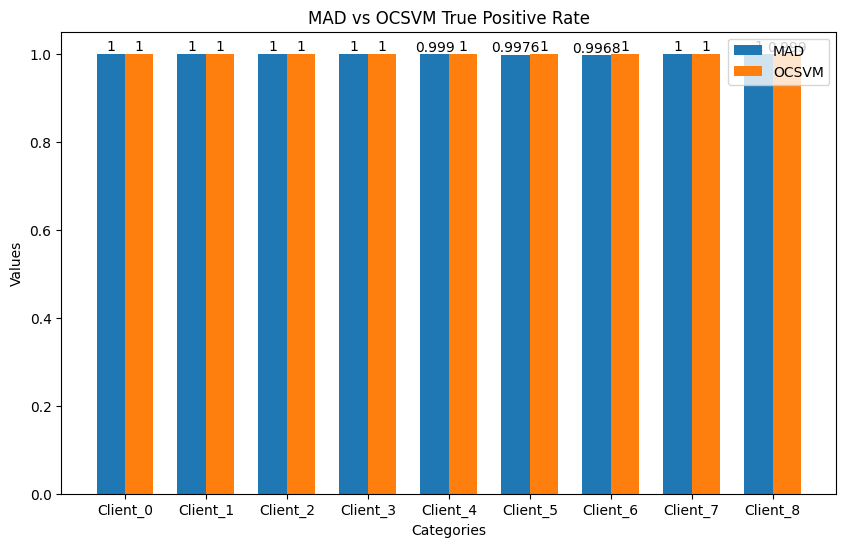

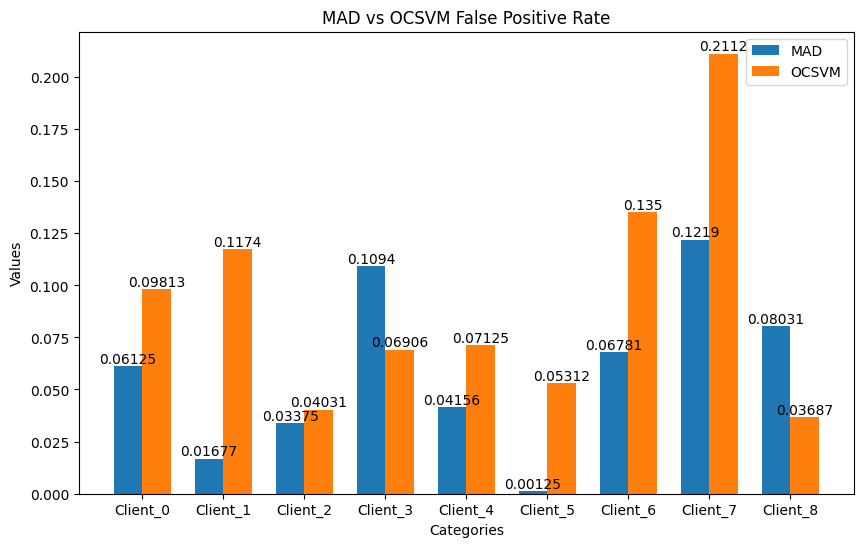

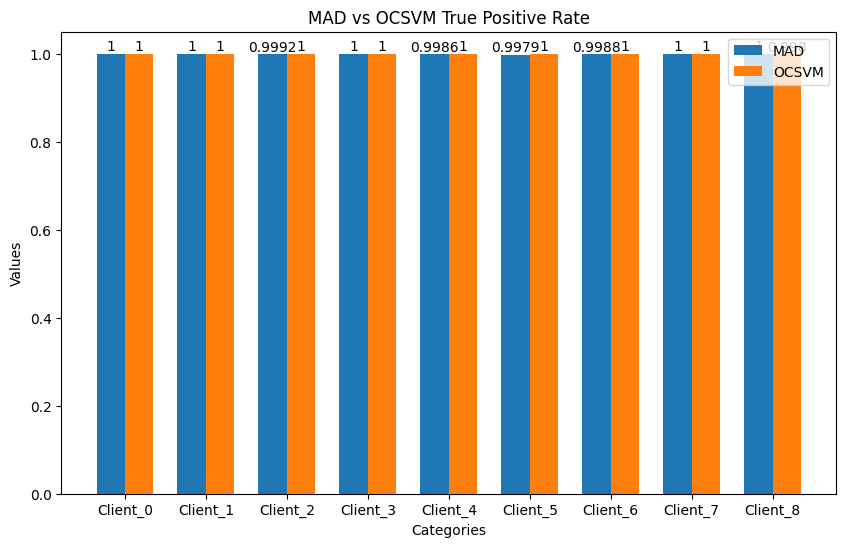

In [ ]:
from sklearn.metrics import auc
fpr_list = []
tpr_list = []
auc_list = []
for K in range(1,10):
  history_MAD,_ = run_test_OCSVM(K,0.04) # gamma set to scale
  fpr = history_MAD['fpr']
  fpr_list.append(fpr)
  tpr = history_MAD['tpr']
  tpr_list.append(tpr)
fpr_array = np.array(fpr_list)
tpr_array = np.array(tpr_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CLIENT:0
Epoch [1/1], Train Loss: 0.1290
Epoch 1: validation loss 0.061229031704939325
threshold:0.0612290316953873
Epoch [1/1], Train Loss: 0.0438
Epoch 2: validation loss 0.024594707108843022
threshold:0.024594707265406704
Epoch [1/1], Train Loss: 0.0287
Epoch 3: validation loss 0.01891477907506319
threshold:0.018914779055735263
Epoch [1/1], Train Loss: 0.0253
Epoch 4: validation loss 0.0172416443291765
threshold:0.01724164438768266
Epoch [1/1], Train Loss: 0.0238
Epoch 5: validation loss 0.01624870919741881
threshold:0.016248709253238465
exceed threshold proportion:0.3725
count_total:3200.0
exceed threshold proportion:1.0
count_total:8000.0
FPR derived with OCSVM:0.128125
TPR derived with OCSVM:1.0
False Positive Rate:0.3725
True Positive Rate:1.0
benign_error:0.021922380803152917
attack_error:46.266827805161476
roc_auc:0.9976
CLIENT:1
Epoch [1/1], Train Loss: 0.1465
Epoch 1: validation loss 0.07054576325519131
threshold:0.07054576327850169
Epoch [1/1], Train Loss: 0.0619
Epoch 2: v

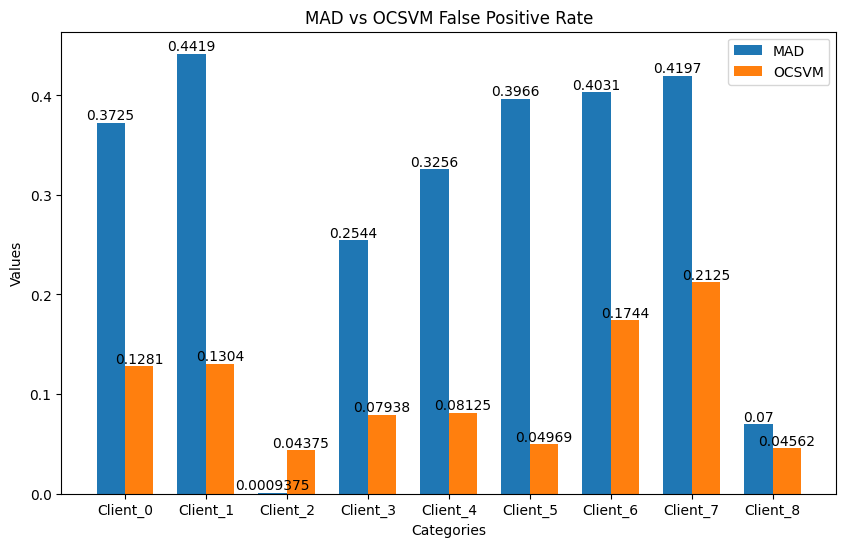

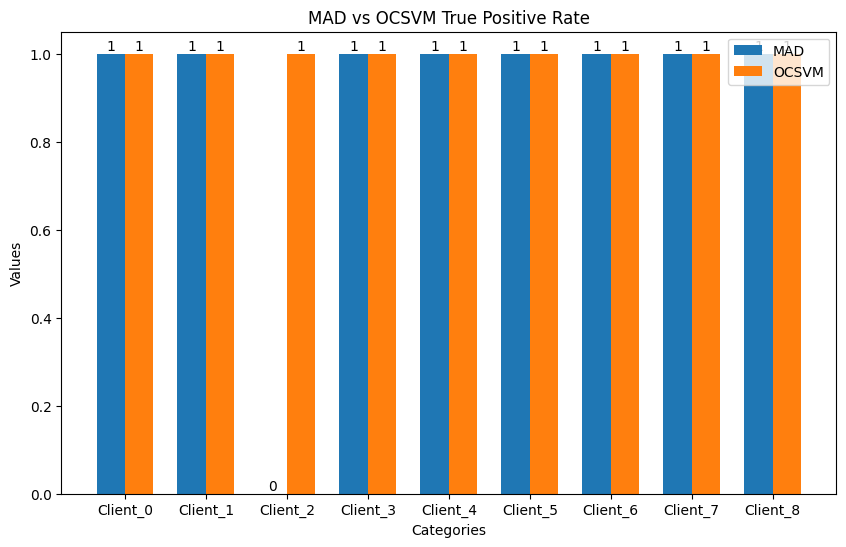

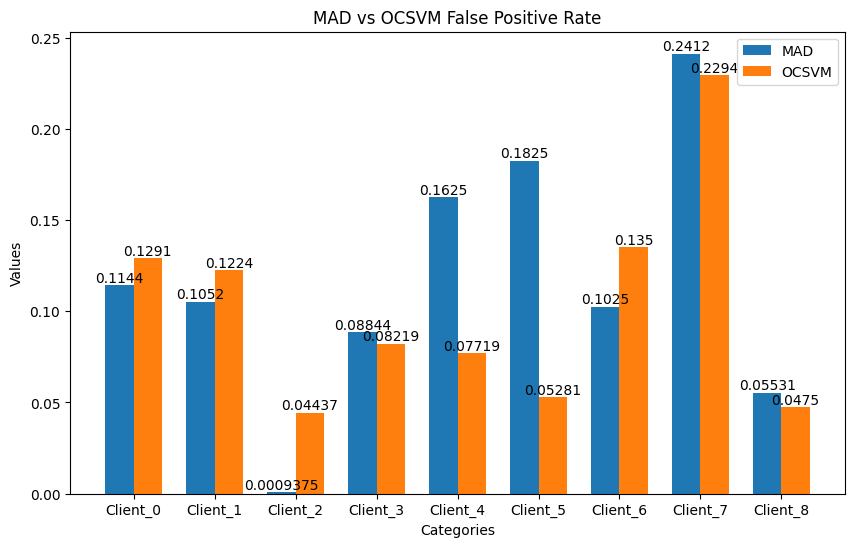

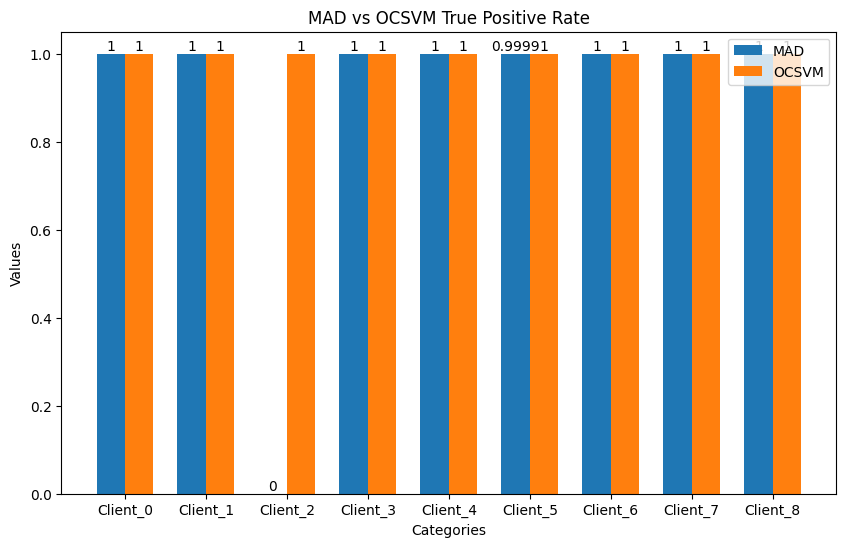

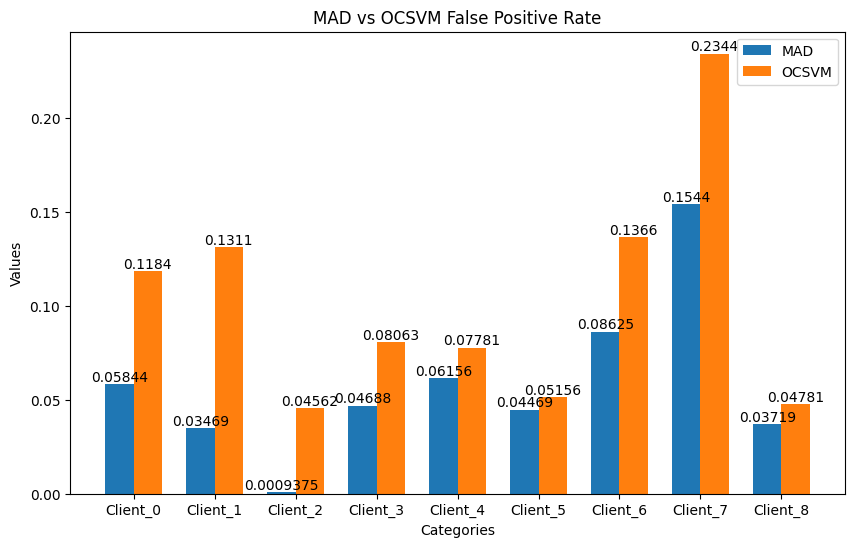

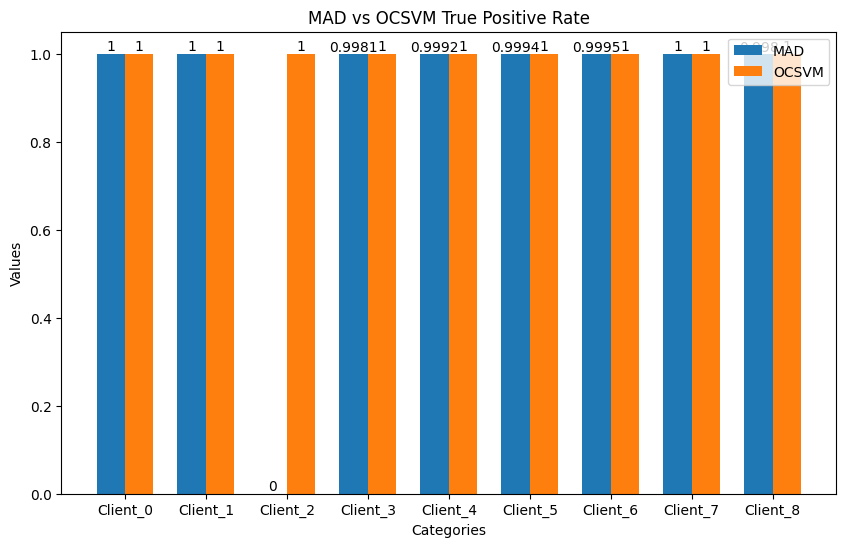

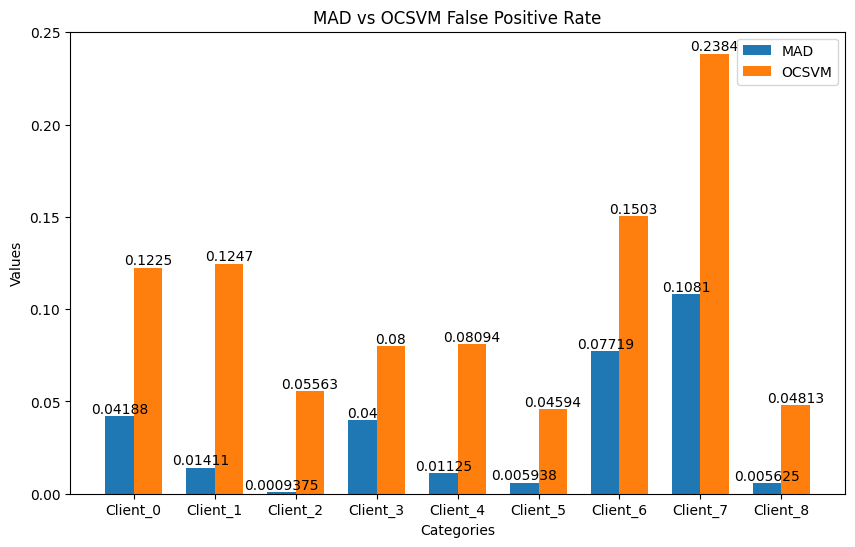

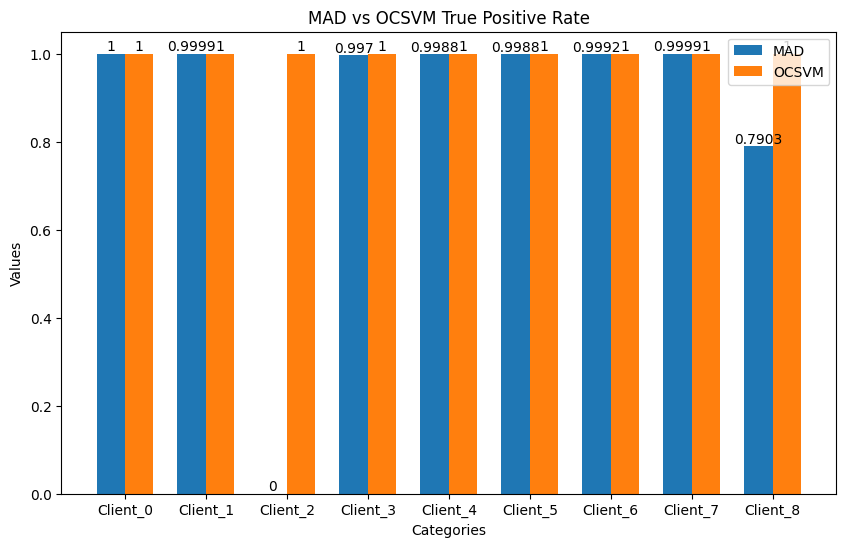

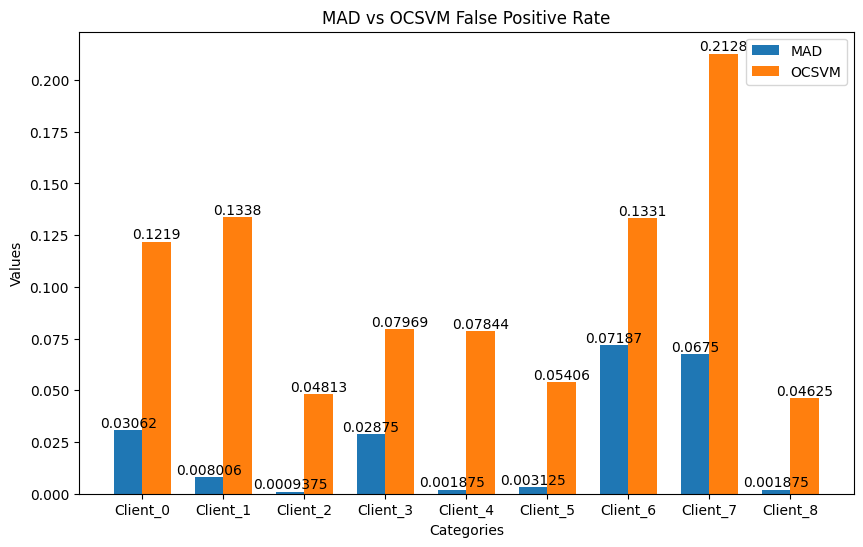

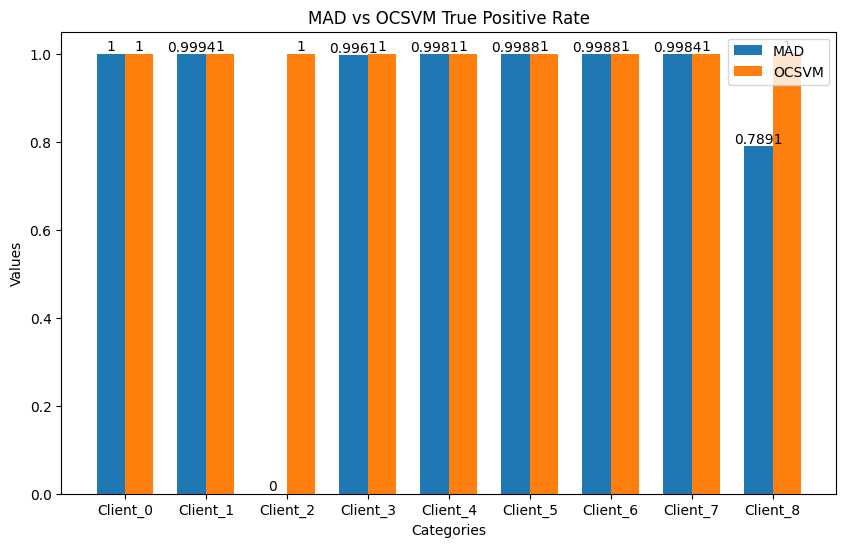

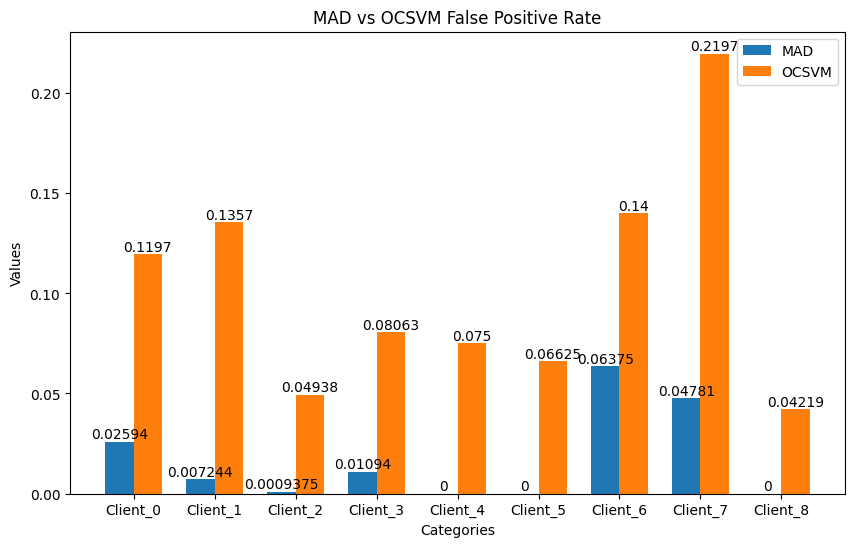

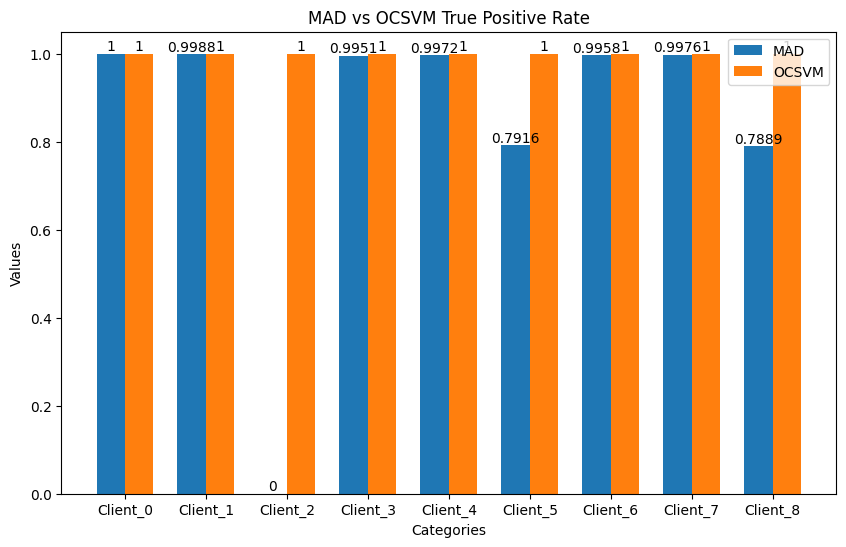

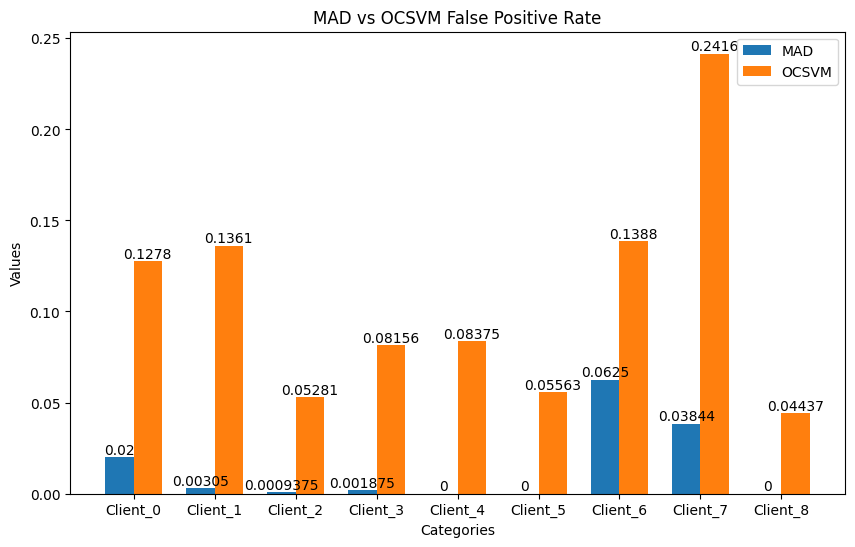

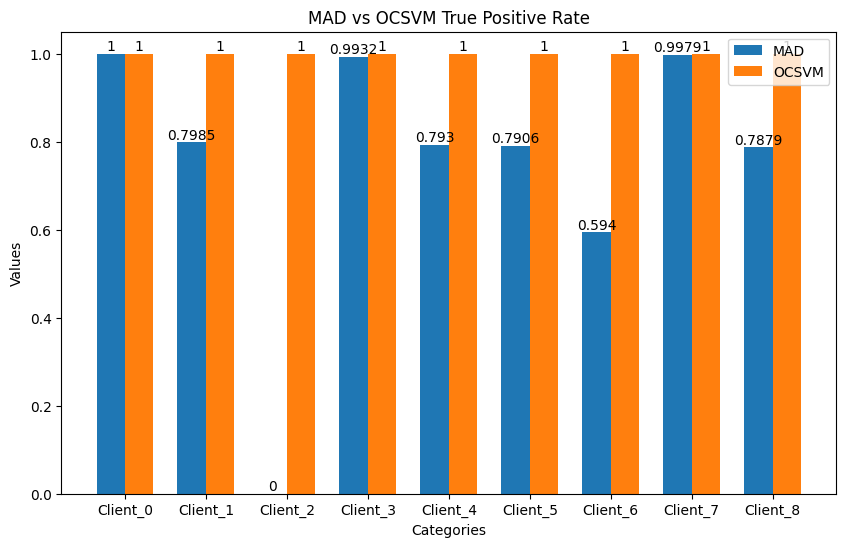

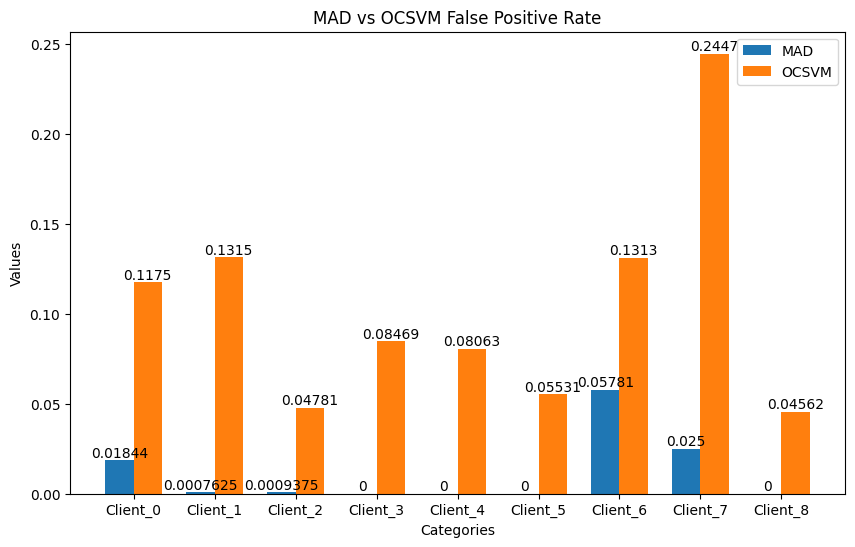

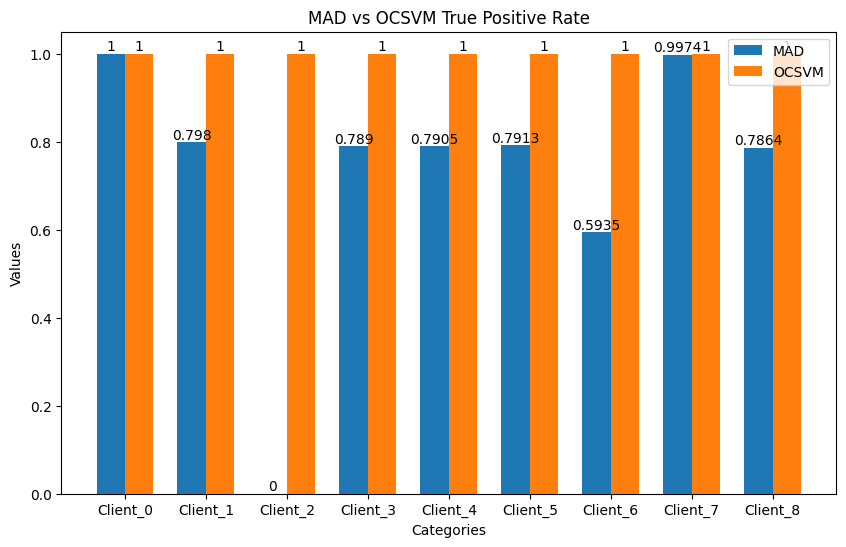

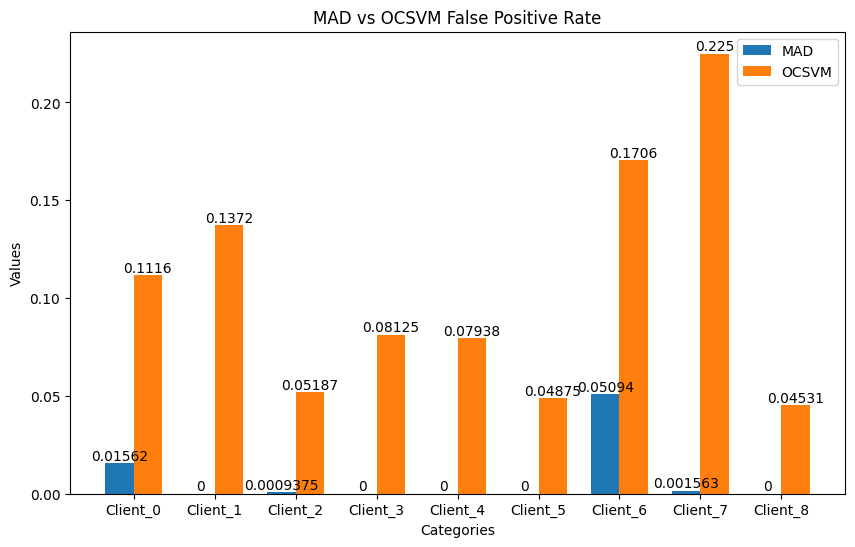

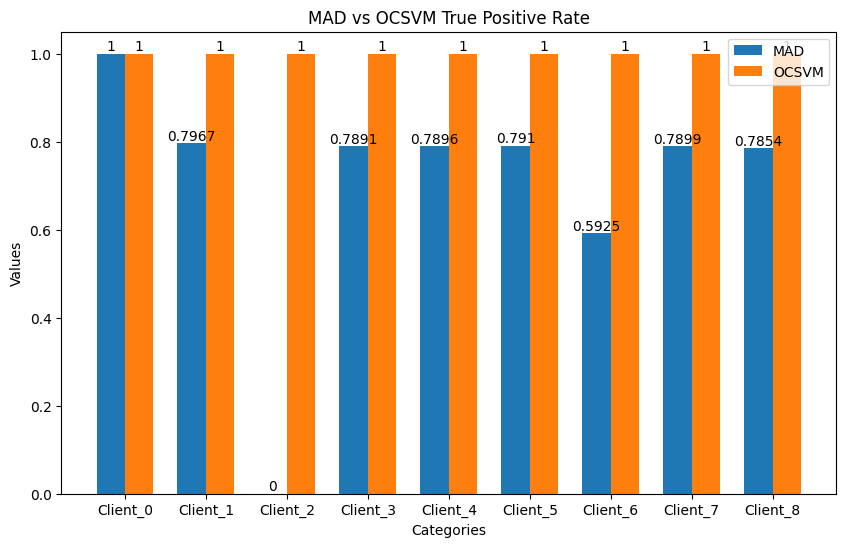

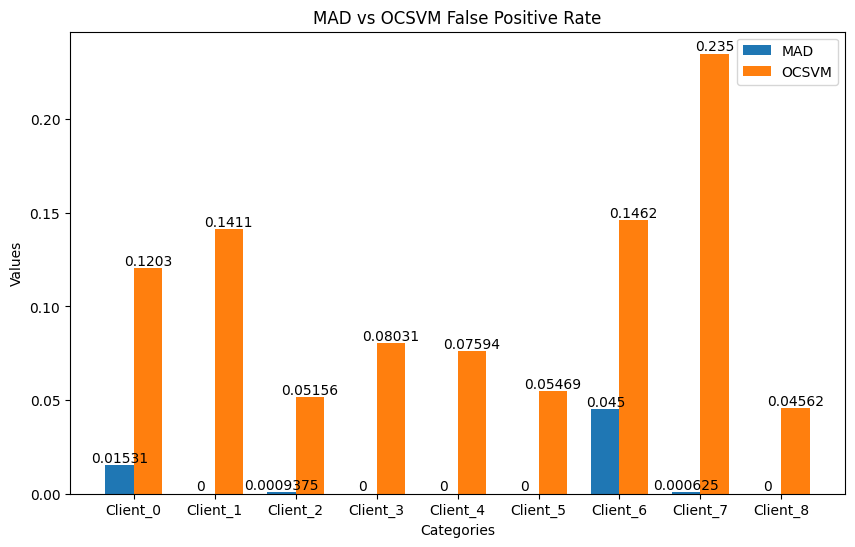

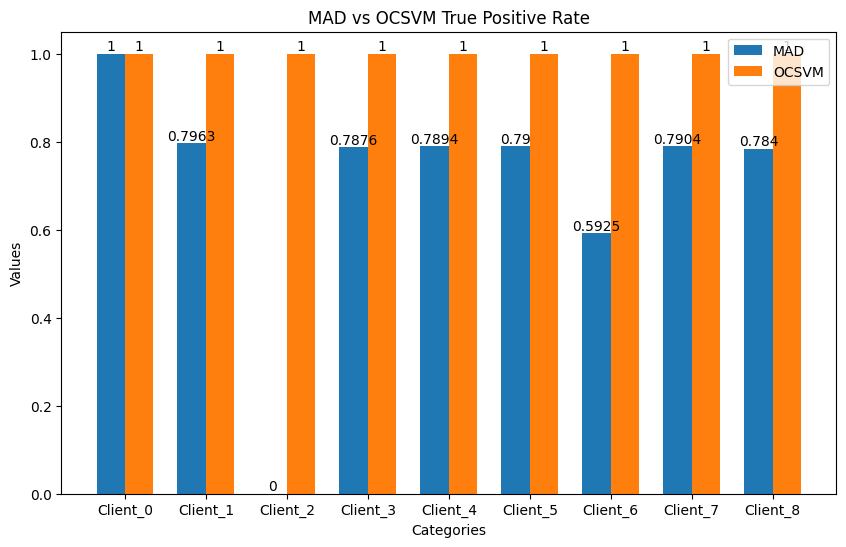

In [ ]:
## threshold-based std against k
from sklearn.metrics import auc
fpr_list = []
tpr_list = []
auc_list = []
for K in range(10):
  history_MAD,_ = run_test_OCSVM(K,0.05, threshold_type = 'std')
  fpr = history_MAD['fpr']
  fpr_list.append(fpr)
  tpr = history_MAD['tpr']
  tpr_list.append(tpr)
fpr_array = np.array(fpr_list)
tpr_array = np.array(tpr_list)

(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)


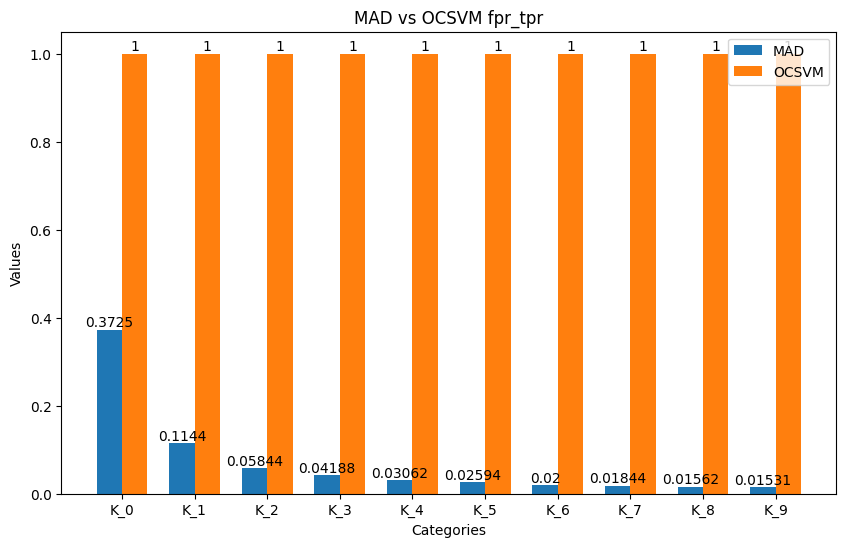

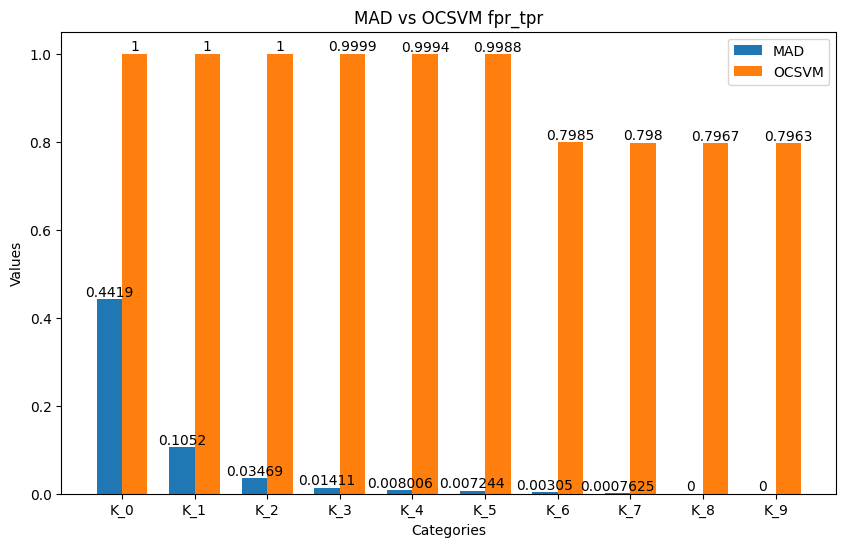

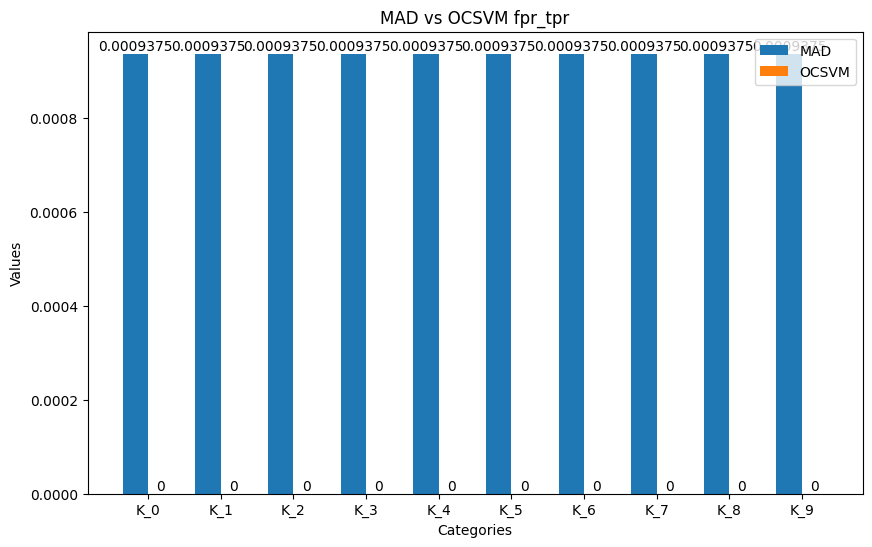

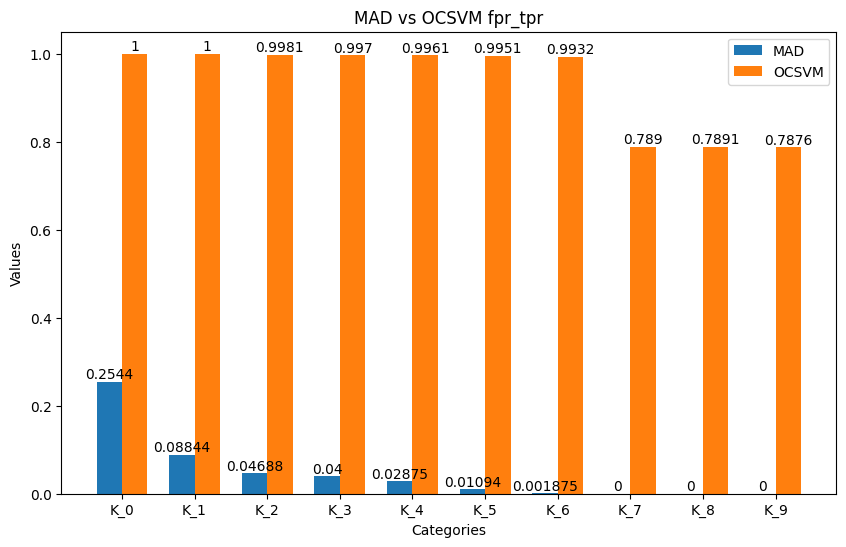

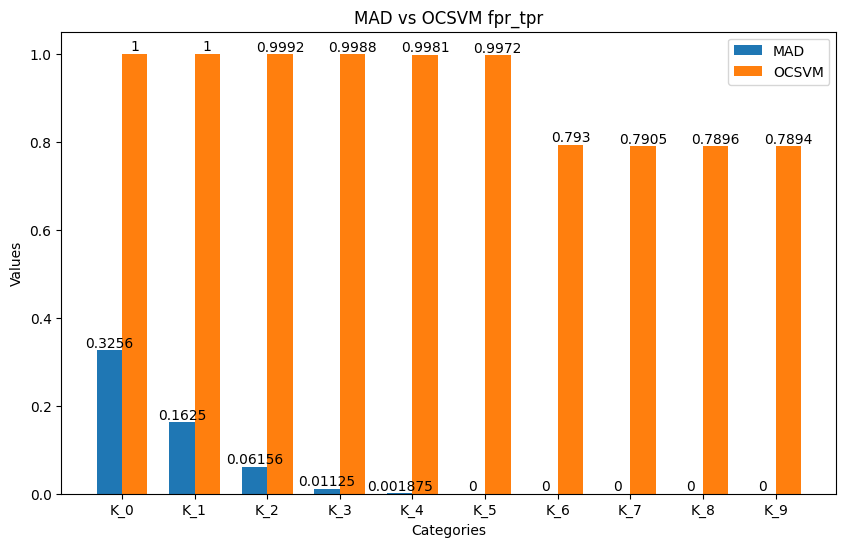

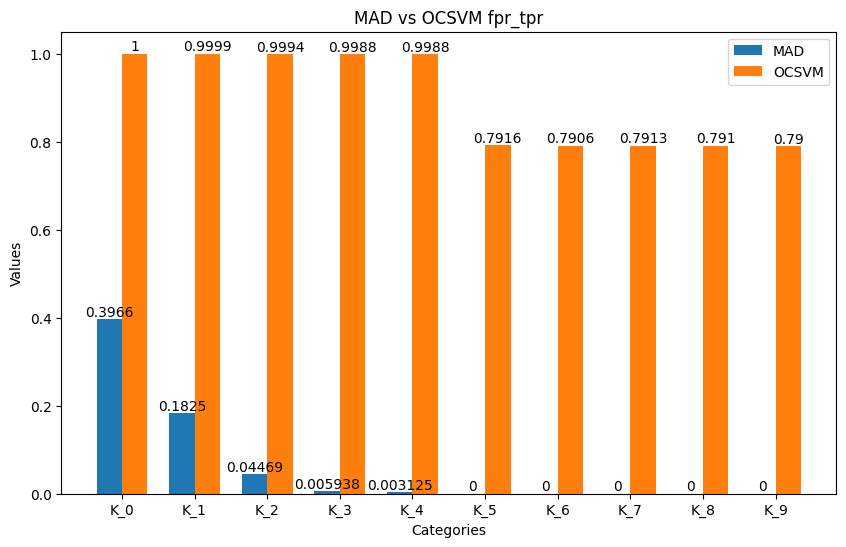

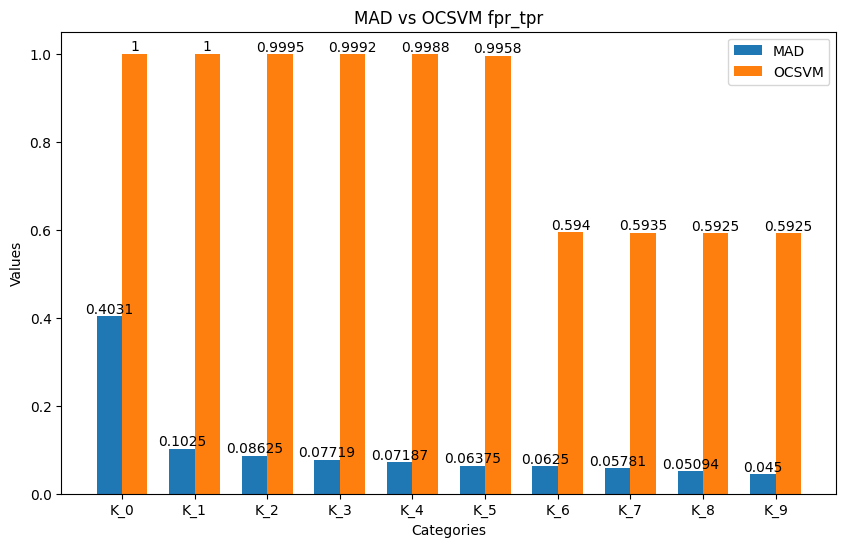

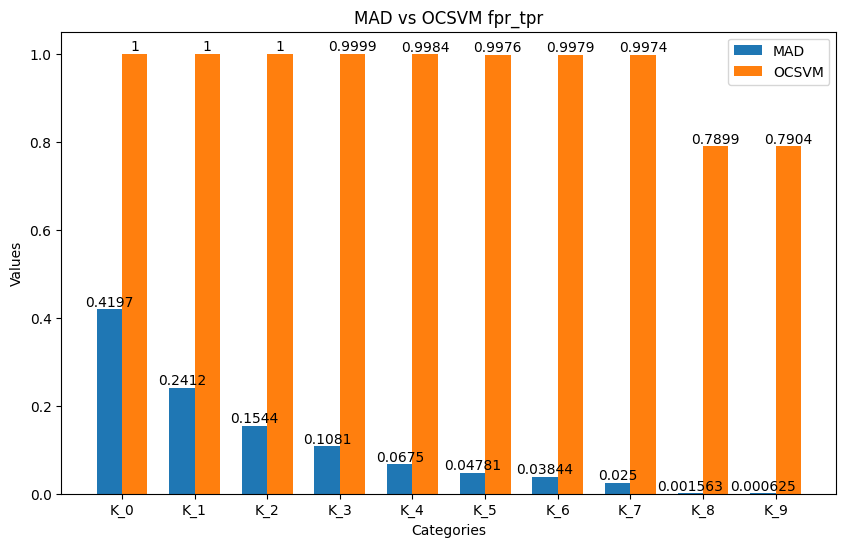

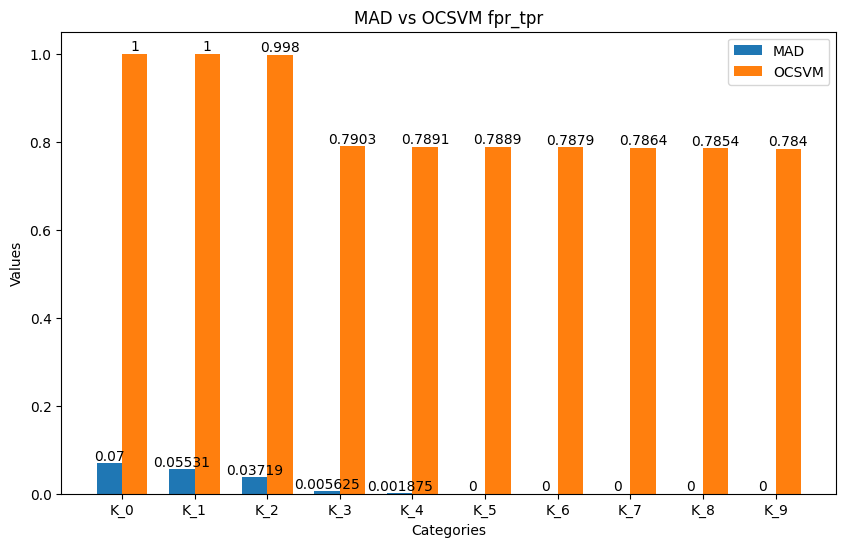

In [ ]:
## With STD
from sklearn.metrics import auc
auc_k_list = []
for client_id in range(9):
  fpr_K_list = fpr_array[:,client_id]
  print(fpr_K_list.shape)
  tpr_K_list = tpr_array[:,client_id]
  print(tpr_K_list.shape)
  plot_barchart(fpr_K_list,tpr_K_list,'fpr_tpr',labels = [f'K_{i}' for i in range(10)])

In [ ]:
# with MAD threshold selection
from sklearn.metrics import roc_curve, auc
def run_test_individual(K):
  client_thresholds = []
  client_fpr = []
  client_tpr = []
  client_roc_auc = []
  for client in range(9):
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=client,label_col_num = 3)
    net = Autoencoder(115,58,29)
    print(f'CLIENT:{client}')
    for epoch in range(5):
        train(net, trainloader, 1)
        loss,loss_history= validation(net, valloader)
        ## find threshold based on median absolute deviation
        RE_MED = np.median(loss_history)
        RE_MAD = np.median(np.abs(loss_history - RE_MED))
        threshold = RE_MED + K*RE_MAD

        ## find threshold based on clustering
        # Reshape the data to 2D (K-Means requires a 2D array)
        #values_reshaped = np.array(values).reshape(-1, 1)

        # Specify the number of clusters
        #k = 2  # Adjust this to your desired number of clusters

        # Apply K-Means clustering
        #kmeans = KMeans(n_clusters=k, random_state=42)
        #clusters = kmeans.fit_predict(values_reshaped)

        print(f"Epoch {epoch+1}: validation loss {loss}")
        print(f'threshold:{threshold}')
    client_thresholds.append(threshold)
    benign_MSE, benign_MSE_history,false_positive = test(net, benign_testloader,threshold = threshold)
    print(benign_MSE_history)
    attack_MSE, attack_MSE_history,true_positive = test(net, attack_testloader,threshold = threshold)
    print(attack_MSE_history)
    fpr,tpr,tnr,fnr = false_positive,true_positive,1-false_positive,1-true_positive
    client_fpr.append(fpr)
    client_tpr.append(tpr)
    print(f'False Positive Rate:{fpr}')
    print(f'True Positive Rate:{tpr}')
    print(f'benign_error:{benign_MSE}')
    print(f'attack_error:{attack_MSE}')
    roc_auc = plot_roc(benign_MSE_history,attack_MSE_history,plot = False)
    client_roc_auc.append(roc_auc)
    history = {'thresholds':client_thresholds,'fpr':client_fpr,'tpr':client_tpr,'roc_auc':client_roc_auc}
  return client_thresholds,client_fpr,client_tpr,roc_auc

# **Federated Learning**

### **Define the ClientApp**

In [ ]:
import joblib
from sklearn.ensemble import IsolationForest
from flwr.common import Context, ConfigsRecord

In [ ]:
def set_parameters(net, parameters: List[np.ndarray]):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)


def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]

In [ ]:
file_path = 'train_5.txt'

In [ ]:
## The first step toward creating a ClientApp is to implement a subclasses of flwr.client.Client or flwr.client.NumPyClient.
## We use NumPyClient in this tutorial because it is easier to implement and requires us to write less boilerplate.
class FlowerClient_Train(NumPyClient):
    def __init__(self, net, partition_id,trainloader, valloader, benign_testloader, attack_testloader,context:Context):
        self.client_state = (
            context.state
        )
        if "eval_metrics" not in self.client_state.configs_records:
            self.client_state.configs_records["eval_metrics"] = ConfigsRecord()
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.benign_testloader = benign_testloader
        self.attack_testloader = attack_testloader
        self.partition_id = partition_id
        print(self.client_state.configs_records)

    def get_parameters(self, config):
        return get_parameters(self.net)
    ## Training
    def fit(self, parameters, config):
      print(f"[Client {self.partition_id}] fit, config: {config}")
      set_parameters(self.net, parameters)
      eval_metrics = self.client_state.configs_records["eval_metrics"]
      local_epoch = 1
      learning_rate = config['learning_rate']
      '''
      if 'local_epoch' not in eval_metrics:
        local_epoch = 4
        eval_metrics["local_epoch"] = [4]
      else:
        local_epoch = eval_metrics['local_epoch'][-1]
      if local_epoch == 8:
        learning_rate = 0.005
      with open(file_path, "a") as file:
        for key, value in eval_metrics.items():
            file.write(f"Client {self.partition_id} {key}: {', '.join(map(str, value))}\n")
      '''
      loss = train(self.net, self.trainloader, num_epochs=local_epoch,learning_rate = learning_rate)
      return get_parameters(self.net), len(self.trainloader), {'train_loss':loss,'config':local_epoch}
    ## Validation on subset of benign data to select threshold
    def evaluate(self, parameters, config):
      print(f"[Client {self.partition_id}] evaluate, config: {config}")
      set_parameters(self.net, parameters)
      loss,val_loss_history,valid_unreduced_loss = validation(self.net,self.valloader)
      val_loss_history = np.array(val_loss_history)
      ## calculate threshold based on MAD to make it more robust to outliers in normal data
      '''
      median = np.median(val_loss_history)
      MAD = np.median(np.abs(val_loss_history - median))
      threshold = median +10*MAD
      '''
      ## calculate threshold based on standard deviation after filtering out the outliers with IQR
      q1 = np.percentile(val_loss_history, 25)
      q3 = np.percentile(val_loss_history, 75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      val_loss_history_filtered = val_loss_history[(val_loss_history >= lower_bound) & (val_loss_history <= upper_bound)]
      #print(f'original loss:{len(loss_history)}')
      #print(f'filtered loss:{len(loss_history_filtered)}')
      mean = np.mean(val_loss_history_filtered)
      std = np.std(val_loss_history_filtered)
      threshold = mean + 2*std
      '''
      # train a linear one class SVM to find anomalous data
      svm = OneClassSVM(kernel='linear', nu=0.5)
      svm.fit(val_loss_history_filtered.reshape(-1, 1))
      #outlier_scores = svm.decision_function(val_loss_history.reshape(-1, 1))
      # save the one-class svm model fit on the local validation set
      joblib.dump(svm, f'svm_model_{self.partition_id}.pkl')
      # train an isolation forest to find anomalous data
      #model = IsolationForest(contamination=0.1, random_state=42)
'''
      eval_metrics = self.client_state.configs_records["eval_metrics"]
      if 'local_epoch' not in eval_metrics:
        eval_metrics["local_epoch"] = [4]
      if "threshold" not in eval_metrics:
        eval_metrics["threshold"] = [threshold]
      else:
        if threshold > eval_metrics['threshold'][-1]:
          eval_metrics['local_epoch'].append(8)
          eval_metrics["threshold"].append(threshold)
        else:
          eval_metrics['local_epoch'].append(4)

      print(f'mean_valid_loss:{np.mean(val_loss_history)}')

      return float(loss), len(self.valloader), {'Client':self.partition_id,'validation_loss':loss,'validation_threshold':threshold}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## The first step toward creating a ClientApp is to implement a subclasses of flwr.client.Client or flwr.client.NumPyClient.
## We use NumPyClient in this tutorial because it is easier to implement and requires us to write less boilerplate.
class FlowerClient_Test(NumPyClient):
    def __init__(self, net, partition_id,trainloader, valloader, benign_testloader, attack_testloader,context:Context):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.benign_testloader = benign_testloader
        self.attack_testloader = attack_testloader
        self.partition_id = partition_id

    def get_parameters(self, config):
        return get_parameters(self.net)
    ## Federated Training
    def fit(self, parameters, config):
      print(f"[Client {self.partition_id}] fit, config: {config}")
      set_parameters(self.net, parameters)
      train(self.net, self.trainloader, num_epochs=4)
      return get_parameters(self.net), len(self.trainloader), {}
    ## Federated Evaluation (client-side evaluation)
    def evaluate(self, parameters, config):
      print(f"[Client {self.partition_id}] evaluate, config: {config}")
      set_parameters(self.net, parameters)
      loss, benign_loss, benign_loss_array = test(self.net, self.benign_testloader)
      loss, attack_loss, attack_loss_array = test(self.net, self.attack_testloader)
      return float(loss), len(self.valloader), {"benign_MSE": benign_loss,"attack_MSE":attack_loss}

 To enable the Flower framework to create clients when necessary, we need to implement a function that creates a FlowerClient instance on demand. We typically call this function client_fn. Flower calls client_fn whenever it needs an instance of one particular client to call fit or evaluate

In [ ]:
layer_sizes

[115, 87, 58, 29]

## **Configure client function for training and threshold-selection**

In [ ]:
def client_fn_train(context: Context) -> Client:
    """Create a Flower client representing a single organization."""

    # Load model
    #net = Autoencoder(115,58,29).to(DEVICE)
    #net = Autoencoder(115,58,29)
    net = Autoencoder_4_layers(layer_sizes)
    #net = Autoencoder_2_layers(35,15)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data partition
    # Read the node_config to fetch data partition associated to this node
    # The value of partition-id is retrieved from the node_config dictionary in the Context object, which holds the information that persists throughout each training round.
    partition_id = int(context.node_config["partition-id"])
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df, 'Autoencoder',partition_id=partition_id,label_col_num = 3)

    # Create a single Flower client representing a single organization
    # FlowerClient is a subclass of NumPyClient, so we need to call .to_client()
    # to convert it to a subclass of `flwr.client.Client`
    return FlowerClient_Train(net, partition_id,trainloader, valloader,benign_testloader,attack_testloader,context).to_client()


# Create the ClientApp
client = ClientApp(client_fn=client_fn_train)

### **Define the ServerApp**

### **Define client resources**

In [ ]:
# Specify the resources each of your clients need
# By default, each client will be allocated 1x CPU and 0x GPUs
backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 0.0}}

# When running on GPU, assign an entire GPU for each client
if DEVICE.type == "cuda":
    backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 0}}
    # Refer to our Flower framework documentation for more details about Flower simulations
    # and how to set up the `backend_config`

In [ ]:
DEVICE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


device(type='cuda')

### **Define metrics**

In [ ]:
## Select the max loss from validation dataset as the threshold
def max_loss(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  client_valid_loss = [m['validation_loss'] for _,m in metrics]
  print(client_valid_loss)
  client_max_loss = client_valid_loss.index(max(client_valid_loss))
  return {'max_loss':max(client_valid_loss),'client_max_loss':client_max_loss}

In [ ]:
def threshold_selection(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  client_valid_threshold = [m['validation_threshold'] for _,m in metrics]
  client_id = [m['Client'] for _,m in metrics]
  for id,threshold in zip(client_id,client_valid_threshold):
    print(f'Client {id} threshold: {threshold}')
  sorted_data = sorted(zip(client_id, client_valid_threshold), key=lambda x: x[0])
  sorted_client_id, sorted_client_valid_threshold = zip(*sorted_data)
  aggregate_threshold_mean = np.mean(client_valid_threshold)
  aggregate_threshold_std = np.std(client_valid_threshold)
  return {'aggregate_threshold_mean':aggregate_threshold_mean,'aggregate_threshold_std':aggregate_threshold_std,'client_thresholds':sorted_client_valid_threshold}

In [ ]:
def fit_config(server_round: int):
  config = {
        "server_round": server_round,  # The current round of federated learning
        "local_epochs": 1 if server_round < 2 else 2,
    }

In [ ]:
def OCSVM(metrics: List[Tuple[int, Metrics]]):


In [ ]:
## Return average training loss
def average_loss(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  client_train_loss = [m['train_loss'] for num_examples,m in metrics]
  client_config = [m['config'] for num_examples,m in metrics]
  print(client_train_loss)
  print(client_config)
  return {'train_loss':sum(client_train_loss)/len(client_train_loss)}

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]

    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples)}

## **Save global model**

In [ ]:
global_model_trained = Autoencoder(115,58,29)

In [ ]:
global_model_trained = Autoencoder_4_layers(layer_sizes)

In [ ]:
 global_model_trained = Autoencoder_2_layers(35,15)

In [ ]:
from typing import Union, Optional, Dict
from flwr.server.client_proxy import ClientProxy
from flwr.common import FitRes,Parameters, FitIns, EvaluateRes
from flwr.server.client_manager import ClientManager
from flwr.server.strategy import FedAdam,FedYogi

class SaveModelStrategy(FedAdam):
    def __init__(self,
                 *,
                 patience:int,
                 **kwargs):
       super().__init__(**kwargs)
       self.best_eval_thres = float('inf')
       self.server_rounds_without_improvement = 0
       self.patience = patience
       self.current_model_params = None
       self.update_params = False
       self.previous_client_threshold = {key: None for key in range(9)}
       self.client_update_lst = []

    def aggregate_fit(
        self,
        server_round: int,
        results: List[Tuple[flwr.server.client_proxy.ClientProxy, flwr.common.FitRes]],
        failures: List[Union[Tuple[ClientProxy, FitRes], BaseException]],
    ) -> Tuple[Optional[Parameters], Dict[str, Scalar]]:
        """Aggregate model weights using weighted average and store checkpoint"""

        # Call aggregate_fit from base class (FedAvg) to aggregate parameters and metrics
        aggregated_parameters, aggregated_metrics = super().aggregate_fit(
            server_round, results, failures
        )

        if aggregated_parameters is not None:
          aggregated_ndarrays: List[np.ndarray] = flwr.common.parameters_to_ndarrays(
                aggregated_parameters
            )
          self.current_model_params = aggregated_ndarrays

        return aggregated_parameters, aggregated_metrics

    def aggregate_evaluate(
        self,
        server_round: int,
        results: list[tuple[ClientProxy, EvaluateRes]],
        failures: list[Union[tuple[ClientProxy, EvaluateRes], BaseException]],
    ) -> tuple[Optional[float], dict[str, Scalar]]:

        loss_aggregated, metrics_aggregated = super().aggregate_evaluate(server_round, results, failures)
        # Get current highest threshold on the client-side validation set
        current_eval_thres = metrics_aggregated['aggregate_threshold_mean']

        client_thresholds = metrics_aggregated['client_thresholds']
        self.client_update_lst = []
        for i in range(len(client_thresholds)):
          if self.previous_client_threshold[i] is not None:
            if client_thresholds[i] > self.previous_client_threshold[i]:
              self.client_update_lst.append(i)
          self.previous_client_threshold[i] = client_thresholds[i]
        #print(self.client_update_lst)

        if current_eval_thres < self.best_eval_thres:
          self.server_rounds_without_improvement = 0
          # Update the best threshold
          self.best_eval_thres = current_eval_thres
          self.update_params = True
          print('Lowest validation threshold updated')
          # Save the model if the threshold is the lowest
          params_dict = zip(global_model_trained.state_dict().keys(), self.current_model_params)
          state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
          global_model_trained.load_state_dict(state_dict, strict=True)
          print(f'Saving model at round {server_round}')
          torch.save(global_model_trained.state_dict(), f"model_round_{server_round}.pth")
        else:
          self.server_rounds_without_improvement += 1
          self.update_parms = False
          print(f"No improvement in validation loss for {self.server_rounds_without_improvement} round(s)")
        if self.server_rounds_without_improvement >= self.patience:
          print(f"Early stopping triggered at round {server_round}")

        return loss_aggregated, metrics_aggregated







In [ ]:
NUM_CLIENTS = 9

In [ ]:
def server_fn(context: Context) -> ServerAppComponents:
    """Construct components that set the ServerApp behaviour.

    You can use settings in `context.run_config` to parameterize the
    construction of all elements (e.g the strategy or the number of rounds)
    wrapped in the returned ServerAppComponents object.
    """

    # Create FedAvg strategy
    strategy = SaveModelStrategy(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=1,
        min_evaluate_clients=1,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn=threshold_selection,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=average_loss,
        patience = 15
    )

    # Configure the server for 10 rounds of training
    config = ServerConfig(num_rounds=50)

    return ServerAppComponents(strategy=strategy, config=config)

In [ ]:
backend_config

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'client_resources': {'num_cpus': 1, 'num_gpus': 0},
 'init_args': {'logging_level': 30, 'log_to_driver': True},
 'actor': {'tensorflow': 0}}

In [ ]:
state_dict_ndarrays = [v.cpu().numpy() for v in global_model_trained.state_dict().values()]
initial_parameters = flwr.common.ndarrays_to_parameters(state_dict_ndarrays)

## **Hyperparameter tuning**

In [ ]:
def objective(trial):
  strategy = SaveModelStrategy(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=1,
        min_evaluate_clients=1,
        min_available_clients=9,
        initial_parameters = initial_parameters,
        evaluate_metrics_aggregation_fn=threshold_selection,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=average_loss,
        patience = 15,
        eta = trial.suggest_float('eta',1e-3,1e-1),
        eta_l = trial.suggest_float('eta_l',1e-3,5e-3),
        beta_1 = trial.suggest_float('beta_1',0.9,0.99),
        beta_2 = trial.suggest_float('beta_2',0.99,0.999),
        tau = trial.suggest_float('tau',1e-9,1e-8)
    )

  history_train = flwr.simulation.start_simulation(
          client_fn=client_fn_train,  # a function that spawns a particular client
          num_clients=NUM_CLIENTS,  # total number of clients
          config=flwr.server.ServerConfig(
              num_rounds=10
          ),  # minimal config for the server loop telling the number of rounds in FL
          strategy=strategy,  # our strategy of choice
          client_resources={
              "num_cpus": 1,
              "num_gpus": 0.0,
          },  # (optional) controls the degree of parallelism of your simulation.
          # Lower resources per client allow for more clients to run concurrently
          # (but need to be set taking into account the compute/memory footprint of your run)
          # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
          # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
      )
  return min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=30)

[I 2024-11-27 12:37:05,780] A new study created in memory with name: no-name-048a0927-22b9-43e8-803f-99f82a79dd7c
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
2024-11-27 12:37:09,736	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'memory': 32672383796.0, 'object_store_memory': 16336191897.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resourc

(ClientAppActor pid=268765) [Client 0] fit, config: {}
(ClientAppActor pid=268765) Epoch [1/4], Train Loss: 0.1290


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04694124683737755, 0.02330075018107891, 0.026573525741696358, 0.07415894418954849, 0.05228617414832115, 0.06188037991523743, 0.06469976902008057, 0.03487520292401314, 0.07480370253324509]
(ClientAppActor pid=268765) [Client 0] evaluate, config: {}
(ClientAppActor pid=268765) [Client 2] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=268765) mean_valid_loss:0.28832759017077014


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.3523866159783702
Client 4 threshold: 0.246483790435222
Client 5 threshold: 0.2879055275697986
Client 1 threshold: 0.2463885268638961
Client 0 threshold: 0.3079355547836703
Client 8 threshold: 0.23269523064672165
Client 3 threshold: 0.19369515480764837
Client 6 threshold: 0.44513473062810827
Client 2 threshold: 0.28462175280015467
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=268772) Epoch [1/4], Train Loss: 0.1166 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03300976753234863, 0.06562269479036331, 0.046228114515542984, 0.024666737765073776, 0.055933400988578796, 0.04324212670326233, 0.052357301115989685, 0.029571307823061943, 0.02107156813144684]
(ClientAppActor pid=268764) [Client 3] evaluate, config: {} [repeated 12x across cluster]
(ClientAppActor pid=268765) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268768) mean_valid_loss:0.26372991269693163 [repeated 11x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45034075637266463
Client 5 threshold: 0.3418503608036283
Client 3 threshold: 0.19214647867572007
Client 8 threshold: 0.33251084658849733
Client 0 threshold: 0.19930847557760373
Client 4 threshold: 0.2774537822406923
Client 2 threshold: 0.34762412998961706
Client 1 threshold: 0.3952909628042066
Client 6 threshold: 0.5665819861942964
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=268771) Epoch [1/4], Train Loss: 0.0866 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027369029819965363, 0.036542411893606186, 0.019374309107661247, 0.03766482323408127, 0.04623190686106682, 0.04403660446405411, 0.05789496749639511, 0.030758634209632874, 0.018148062750697136]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.28273613868533515
Client 6 threshold: 0.24791498904691534
Client 1 threshold: 0.3505238766583064
Client 7 threshold: 0.24478767209164265
Client 5 threshold: 0.2706601744648388
Client 3 threshold: 0.19271765794657564
Client 4 threshold: 0.2290094954490219
Client 0 threshold: 0.24071429136681172
Client 2 threshold: 0.29041727678250207
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=268767) [Client 3] evaluate, config: {} [repeated 14x across cluster]
(ClientAppActor pid=268766) [Client 8] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=268767) mean_valid_loss:0.19069986480455367 [repeated 15x across cluster]
(ClientAppActor pid=268770) Epoch [4/4], Train Loss: 0.0290 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04190659150481224, 0.026142222806811333, 0.016003355383872986, 0.05289236828684807, 0.028990676626563072, 0.03556646779179573, 0.032949309796094894, 0.04175645858049393, 0.017027508467435837]
(ClientAppActor pid=268771) [Client 4] evaluate, config: {} [repeated 6x across cluster]
(ClientAppActor pid=268770) [Client 5] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=268766) mean_valid_loss:0.23082342852849627 [repeated 5x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2830932326796135
Client 4 threshold: 0.1189175276153169
Client 7 threshold: 0.35900803458080727
Client 3 threshold: 0.16214398884111
Client 8 threshold: 0.39999364862558406
Client 0 threshold: 0.37541930040340554
Client 2 threshold: 0.18521948217108214
Client 6 threshold: 0.3639261984445996
Client 1 threshold: 0.4012115323765063
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=268768) Epoch [2/4], Train Loss: 0.0459 [repeated 34x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.024209963157773018, 0.014635485596954823, 0.03456544131040573, 0.016022585332393646, 0.03938361629843712, 0.0397624708712101, 0.05000152066349983, 0.031193764880299568, 0.027359073981642723]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.48728143825074943
Client 7 threshold: 0.43099166788873955
Client 5 threshold: 0.3022995119528138
Client 0 threshold: 0.345487631981923
Client 4 threshold: 0.13735422175093914
Client 1 threshold: 0.47731320152625184
Client 6 threshold: 0.4006541349891629
Client 3 threshold: 0.1172762418620403
Client 2 threshold: 0.28332862147130145
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=268771) [Client 8] evaluate, config: {} [repeated 12x across cluster]
(ClientAppActor pid=268764) [Client 2] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=268770) mean_valid_loss:0.19042236274227692 [repeated 13x across cluster]
(ClientAppActor pid=268764) Epoch [4/4], Train Loss: 0.0344 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015811601653695107, 0.034360121935606, 0.022119423374533653, 0.026930663734674454, 0.013933833688497543, 0.037650950253009796, 0.046896886080503464, 0.029433194547891617, 0.039574816823005676]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.37494143662648377
Client 8 threshold: 0.4358902651658807
Client 6 threshold: 0.3440495945887858
Client 0 threshold: 0.17643435224514661
Client 2 threshold: 0.35382854799518126
Client 5 threshold: 0.2846975319592161
Client 3 threshold: 0.13170451759386373
Client 1 threshold: 0.43019827276036826
Client 4 threshold: 0.19520596313388872
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=268768) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268771) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268768) mean_valid_loss:0.2009880915057296 [repeated 9x across cluster]
(ClientAppActor pid=268771) Epoch [2/4], Train Loss: 0.0399 [repeated 39x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02604684606194496, 0.03833947330713272, 0.0392269641160965, 0.013429767452180386, 0.028258610516786575, 0.04464569687843323, 0.01552274264395237, 0.03341208025813103, 0.020823143422603607]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.31265316999247134
Client 0 threshold: 0.17207831008442465
Client 8 threshold: 0.21830032498612337
Client 3 threshold: 0.13952885138600538
Client 6 threshold: 0.29648187073183774
Client 4 threshold: 0.23278644411561916
Client 2 threshold: 0.35774638633413525
Client 5 threshold: 0.3210101097196748
Client 7 threshold: 0.23690696276719186
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=268768) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268764) [Client 2] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=268768) mean_valid_loss:0.13089458545765434 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.035657551139593124, 0.02644195593893528, 0.025556225329637527, 0.013179232366383076, 0.03731187805533409, 0.0150592727586627, 0.04420575499534607, 0.032308802008628845, 0.020746521651744843]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.2689754204517106
Client 6 threshold: 0.3000431303674922
Client 7 threshold: 0.2548250851806597
Client 5 threshold: 0.3088885487639668
Client 4 threshold: 0.1668356122214363
Client 0 threshold: 0.15015933728012104
Client 3 threshold: 0.09624041420053185
Client 2 threshold: 0.33411710653606586
Client 8 threshold: 0.1306867487415946
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=268764) Epoch [4/4], Train Loss: 0.0323 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013338558375835419, 0.014328479766845703, 0.019165730103850365, 0.03127916157245636, 0.03469720855355263, 0.025279175490140915, 0.042287763208150864, 0.025764768943190575, 0.033643268048763275]
(ClientAppActor pid=268770) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268768) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268770) mean_valid_loss:0.15106727801717054 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.127991488867948
Client 7 threshold: 0.25098089470243423
Client 2 threshold: 0.2740515947657507
Client 1 threshold: 0.2404490909370706
Client 6 threshold: 0.2878958744944461
Client 0 threshold: 0.1561950105073524
Client 5 threshold: 0.2535928947542282
Client 8 threshold: 0.15160159420667593
Client 3 threshold: 0.07228873056654692
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=268764) Epoch [2/4], Train Loss: 0.0310 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01390982884913683, 0.013248024508357048, 0.03635752946138382, 0.030438873916864395, 0.04297303780913353, 0.025186892598867416, 0.01904781349003315, 0.024510320276021957, 0.03419504314661026]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 53.91s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.94422010346379
INFO :      		round 2: 32.924278022588716
INFO :      		round 3: 32.904747042097526
INFO :      		round 4: 32.89614800313865
INFO :      		round 5: 32.89237067492507
INFO :      		round 6: 32.89006939502828
INFO :      		round 7: 32.87033652672148
INFO :      		round 8: 32.84968187795308
INFO :      		round 9: 32.84038605296554
INFO :      		round 10: 32.83863287516697
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04130033548507425),
INFO :      	                (3, 0.03533563887079557),
INFO :      	                (4, 0.03258166213830312),
INFO :      	                (5, 0.030792658010290727),
INFO :      	                (6, 0.0296346102323797),
INFO :      	   

(ClientAppActor pid=268770) [Client 0] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=268764) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=268767) mean_valid_loss:0.1515835012237613 [repeated 15x across cluster]
Client 6 threshold: 0.2621004799132567
Client 4 threshold: 0.09767056397140896
Client 7 threshold: 0.24759354302379463
Client 3 threshold: 0.08855854967413762
Client 2 threshold: 0.2531169873978
Client 5 threshold: 0.21081203933902634
Client 0 threshold: 0.17574236463832446
Client 8 threshold: 0.18068829923078933
Client 1 threshold: 0.17935299382901265
Lowest validation threshold updated
Saving model at round 10


INFO :      	                         0.3210101097196748,
INFO :      	                         0.23690696276719186]),
INFO :      	                       (8,
INFO :      	                        [0.2689754204517106,
INFO :      	                         0.3000431303674922,
INFO :      	                         0.2548250851806597,
INFO :      	                         0.3088885487639668,
INFO :      	                         0.1668356122214363,
INFO :      	                         0.15015933728012104,
INFO :      	                         0.09624041420053185,
INFO :      	                         0.33411710653606586,
INFO :      	                         0.1306867487415946]),
INFO :      	                       (9,
INFO :      	                        [0.127991488867948,
INFO :      	                         0.25098089470243423,
INFO :      	                         0.2740515947657507,
INFO :      	                         0.2404490909370706,
INFO :      	                         0.28

(ClientAppActor pid=268764) Epoch [4/4], Train Loss: 0.0132 [repeated 25x across cluster]
(ClientAppActor pid=268770) mean_valid_loss:0.130196497311147 [repeated 3x across cluster]


2024-11-27 12:38:10,670	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 16336399564.0, 'memory': 32672799131.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=272123) 2024-11-27 12:38:12.959276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=272122) [Client 8] fit, config: {}
(ClientAppActor pid=272122) Epoch [1/4], Train Loss: 0.1225


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026573525741696358, 0.07480370253324509, 0.05228617414832115, 0.06469976902008057, 0.07415894418954849, 0.06188037991523743, 0.03487520292401314, 0.02330075018107891, 0.04694124683737755]
(ClientAppActor pid=272122) [Client 3] evaluate, config: {}
(ClientAppActor pid=272122) mean_valid_loss:0.2201169499506553


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]


(ClientAppActor pid=272122) [Client 7] fit, config: {} [repeated 8x across cluster]
Client 6 threshold: 0.6406398745312962
Client 4 threshold: 0.2466938462660539
Client 7 threshold: 0.48390875885226636
Client 3 threshold: 0.22386613274320502
Client 5 threshold: 0.3325849634460657
Client 2 threshold: 0.3810992446120099
Client 1 threshold: 0.4299272851687048
Client 0 threshold: 0.19653946628738134
Client 8 threshold: 0.36917934236097594
Lowest validation threshold updated
Saving model at round 1


INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=272123) Epoch [2/4], Train Loss: 0.0283 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.021767759695649147, 0.05009894073009491, 0.028200695291161537, 0.06105249002575874, 0.03953348472714424, 0.0488814115524292, 0.018717585131525993, 0.03989188000559807, 0.03258230537176132]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.3909092818527296
Client 0 threshold: 0.2275328523228929
Client 5 threshold: 0.2950115681717861
Client 6 threshold: 0.36349247019885467
Client 2 threshold: 0.3143035360587269
Client 7 threshold: 0.3940087886595
Client 3 threshold: 0.21460000442853092
Client 8 threshold: 0.3211071304469113
Client 4 threshold: 0.21866163220568074
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=272121) [Client 0] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=272121) mean_valid_loss:0.1875984418229797 [repeated 17x across cluster]
(ClientAppActor pid=272125) [Client 3] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=272122) Epoch [1/4], Train Loss: 0.0757 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02636140212416649, 0.030233804136514664, 0.05147009715437889, 0.041481249034404755, 0.04270711913704872, 0.018469518050551414, 0.01593659073114395, 0.03332995995879173, 0.035865139216184616]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.17013793312299996
Client 2 threshold: 0.28991313425561976
Client 3 threshold: 0.16195106761934047
Client 7 threshold: 0.41481620133889185
Client 0 threshold: 0.4916434428881187
Client 6 threshold: 0.4303467254096864
Client 8 threshold: 0.4773841037902472
Client 1 threshold: 0.4516486144415331
Client 5 threshold: 0.24007029329424673
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=272122) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=272121) mean_valid_loss:0.2357047175606474 [repeated 9x across cluster]
(ClientAppActor pid=272126) [Client 6] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04267221689224243, 0.024295611307024956, 0.016195237636566162, 0.03518744558095932, 0.040259070694446564, 0.028326619416475296, 0.03119545243680477, 0.015298929065465927, 0.05161430314183235]
(ClientAppActor pid=272122) Epoch [4/4], Train Loss: 0.0283 [repeated 43x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.3423647104219253
Client 6 threshold: 0.3661642673827258
Client 0 threshold: 0.3248467110104263
Client 7 threshold: 0.3653690123385057
Client 1 threshold: 0.3927856927588453
Client 8 threshold: 0.40717431605092425
Client 3 threshold: 0.16570276395051892
Client 4 threshold: 0.24588066275280981
Client 2 threshold: 0.4535736820893733
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=272119) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=272119) mean_valid_loss:0.2655862930397957 [repeated 9x across cluster]
(ClientAppActor pid=272126) [Client 8] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04028647392988205, 0.040358658879995346, 0.035402409732341766, 0.02408522181212902, 0.04404008015990257, 0.014817541465163231, 0.016426894813776016, 0.02984943613409996, 0.027917545288801193]
(ClientAppActor pid=272121) Epoch [4/4], Train Loss: 0.0148 [repeated 36x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.2616585208284795
Client 8 threshold: 0.26205342229879813
Client 7 threshold: 0.286549346045227
Client 6 threshold: 0.3095869035050507
Client 0 threshold: 0.2655115797795624
Client 5 threshold: 0.35294776060947985
Client 2 threshold: 0.39443647800002235
Client 3 threshold: 0.15855878062723155
Client 1 threshold: 0.32930778147067247
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=272121) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=272121) mean_valid_loss:0.205134762212252 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=272120) [Client 2] fit, config: {} [repeated 10x across cluster]
[0.0438336543738842, 0.029150694608688354, 0.042740557342767715, 0.03448467329144478, 0.01579459197819233, 0.014533117413520813, 0.02407676912844181, 0.03862965106964111, 0.027618184685707092]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.34978402146929904
Client 3 threshold: 0.0975975297300756
Client 6 threshold: 0.26535219446259156
Client 8 threshold: 0.2309622905320492
Client 7 threshold: 0.2923624839758616
Client 0 threshold: 0.18562096735756017
Client 4 threshold: 0.21635904199510358
Client 1 threshold: 0.2907908643809845
Client 2 threshold: 0.25533371930700915
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=272122) Epoch [1/4], Train Loss: 0.0679 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=272124) [Client 2] evaluate, config: {} [repeated 9x across cluster]
[0.020862651988863945, 0.028177687898278236, 0.03344424068927765, 0.015596108511090279, 0.03991401195526123, 0.03804268315434456, 0.028111379593610764, 0.014123138040304184, 0.04353366792201996]
(ClientAppActor pid=272124) mean_valid_loss:288.68629336674366 [repeated 9x across cluster]
(ClientAppActor pid=272119) [Client 7] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.21700705362519315
Client 2 threshold: 0.2912697274909534
Client 3 threshold: 0.10700745704643619
Client 0 threshold: 0.1843714166443955
Client 1 threshold: 0.24938258116587925
Client 4 threshold: 0.16388370619175
Client 6 threshold: 0.24611867930923748
Client 7 threshold: 0.25152130201112444
Client 5 threshold: 0.308732144293306
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=272120) Epoch [2/4], Train Loss: 0.0254 [repeated 39x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02734520472586155, 0.020499808713793755, 0.014164702035486698, 0.03838663920760155, 0.02824973687529564, 0.0328831821680069, 0.03616109490394592, 0.044803354889154434, 0.0151358125731349]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.14094290899876724
Client 1 threshold: 0.29377020598312975
Client 0 threshold: 0.17093463465595377
Client 5 threshold: 0.28536152917199614
Client 3 threshold: 0.11310980518630143
Client 7 threshold: 0.2773273703340955
Client 6 threshold: 0.3514285195235749
Client 2 threshold: 0.251136758971258
Client 8 threshold: 0.24864954367326875
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=272124) [Client 2] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=272124) mean_valid_loss:288.67228524148084 [repeated 18x across cluster]
(ClientAppActor pid=272125) [Client 0] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=272122) Epoch [4/4], Train Loss: 0.0374 [repeated 57x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04891502857208252, 0.019849883392453194, 0.028536582365632057, 0.0327497199177742, 0.014167530462145805, 0.04118122532963753, 0.03736297786235809, 0.015492473728954792, 0.02651696279644966]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.22280765711603412
Client 0 threshold: 0.19178954041264393
Client 6 threshold: 0.37770627225248454
Client 5 threshold: 0.29749568972686813
Client 1 threshold: 0.29803970422184745
Client 7 threshold: 0.29031770651543165
Client 4 threshold: 0.12212424984847628
Client 8 threshold: 0.22104496341147145
Client 3 threshold: 0.10379609047290056
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=272126) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=272124) mean_valid_loss:0.20368270096010888 [repeated 9x across cluster]
(ClientAppActor pid=272125) [Client 6] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03586138039827347, 0.04328072816133499, 0.026700856164097786, 0.03224047273397446, 0.03802582994103432, 0.01811170019209385, 0.02843305841088295, 0.01394170243293047, 0.01478454377502203]
(ClientAppActor pid=272124) Epoch [4/4], Train Loss: 0.0322 [repeated 44x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.05s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.95571694762758
INFO :      		round 2: 32.93555043244868
INFO :      		round 3: 32.929036572717806
INFO :      		round 4: 32.94452085306854
INFO :      		round 5: 32.90281531467095
INFO :      		round 6: 32.864970173835175
INFO :      		round 7: 32.85350786352409
INFO :      		round 8: 32.860096972359166
INFO :      		round 9: 32.85765646380735
INFO :      		round 10: 32.846575169391684
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03785850583679146),
INFO :      	                (3, 0.03287276439368725),
INFO :      	                (4, 0.03167165401909086),
INFO :      	                (5, 0.030353806912899017),
INFO :      	                (6, 0.030095765988032024),
INFO :      

Client 1 threshold: 0.2782636940863798
Client 6 threshold: 0.2939833646967356
Client 2 threshold: 0.27615450973983974
Client 8 threshold: 0.19511055556344992
Client 7 threshold: 0.20652802643912815
Client 0 threshold: 0.23656445003682575
Client 3 threshold: 0.07854926670557813
Client 4 threshold: 0.1216733679271294
Client 5 threshold: 0.28790658894388316
Lowest validation threshold updated
Saving model at round 10


INFO :      	                         0.1216733679271294,
INFO :      	                         0.28790658894388316])]}
INFO :      
[I 2024-11-27 12:39:03,779] Trial 1 finished with value: 0.2194148693487722 and parameters: {'eta': 0.09504175273242844, 'eta_l': 0.0013183764686135638, 'beta_1': 0.96786343965394, 'beta_2': 0.9971231906540846, 'tau': 7.239801313280783e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=272121) 2024-11-27 12:38:13.422140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:48

(ClientAppActor pid=272124) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=272124) mean_valid_loss:0.12444234608302418 [repeated 9x across cluster]
(ClientAppActor pid=272124) [Client 2] fit, config: {}


2024-11-27 12:39:09,802	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 16336715366.0, 'memory': 32673430734.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=275465) 2024-11-27 12:39:12.040034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=275465) [Client 7] fit, config: {}
(ClientAppActor pid=275465) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02330075018107891, 0.06188037991523743, 0.06469976902008057, 0.05228617414832115, 0.07480370253324509, 0.07415894418954849, 0.026573525741696358, 0.03487520292401314, 0.04694124683737755]
(ClientAppActor pid=275463) [Client 1] evaluate, config: {}
(ClientAppActor pid=275463) mean_valid_loss:0.28456782473860937


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=275463) [Client 1] fit, config: {} [repeated 8x across cluster]
Client 8 threshold: 0.36763686259838324
Client 5 threshold: 0.33209672090819853
Client 7 threshold: 0.48205436684546843
Client 6 threshold: 0.6388110493198231
Client 2 threshold: 0.37950401624008256
Client 1 threshold: 0.4283345354319479
Client 3 threshold: 0.2231178941145619
Client 0 threshold: 0.19659601184835385
Client 4 threshold: 0.24937443861578212
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=275468) Epoch [2/4], Train Loss: 0.0524 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04957635700702667, 0.032593805342912674, 0.018653053790330887, 0.038759149610996246, 0.039944786578416824, 0.06137039512395859, 0.028223641216754913, 0.022257432341575623, 0.04884049668908119]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.29652800601267904
Client 4 threshold: 0.22026739892726388
Client 6 threshold: 0.35755454889114846
Client 8 threshold: 0.32402009217174854
Client 0 threshold: 0.22581534732335126
Client 1 threshold: 0.39301100909277964
Client 3 threshold: 0.21406325591687075
Client 7 threshold: 0.39116502719035307
Client 2 threshold: 0.3174213139957321
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=275463) [Client 7] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=275463) mean_valid_loss:0.26044326620176433 [repeated 17x across cluster]
(ClientAppActor pid=275472) [Client 3] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=275465) Epoch [4/4], Train Loss: 0.0161 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03434993699193001, 0.026282183825969696, 0.0161177609115839, 0.03018529713153839, 0.03582869470119476, 0.041533488780260086, 0.018382500857114792, 0.04283693805336952, 0.05152061581611633]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.4842891981939206
Client 5 threshold: 0.24344229406092457
Client 7 threshold: 0.41901247623101917
Client 1 threshold: 0.44846457791742045
Client 3 threshold: 0.1629130791357817
Client 8 threshold: 0.4794882914761842
Client 6 threshold: 0.44329909574314247
Client 4 threshold: 0.16629430137081402
Client 2 threshold: 0.26450836757285745
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=275467) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=275467) mean_valid_loss:0.2564560801196748 [repeated 9x across cluster]
(ClientAppActor pid=275466) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=275469) Epoch [3/4], Train Loss: 0.0419 [repeated 43x across cluster]
[0.028132760897278786, 0.03693374991416931, 0.01626977138221264, 0.04013684019446373, 0.023870905861258507, 0.032303303480148315, 0.04933576285839081, 0.015296995639801025, 0.035178668797016144]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4166807409082509
Client 4 threshold: 0.2316488067449609
Client 2 threshold: 0.45076742629378214
Client 6 threshold: 0.3854475522716999
Client 1 threshold: 0.4022417440518897
Client 0 threshold: 0.3093850562180808
Client 7 threshold: 0.39123736277455723
Client 3 threshold: 0.15918571989615213
Client 5 threshold: 0.33461165231344303
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=275469) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=275469) mean_valid_loss:0.1841503382087327 [repeated 9x across cluster]
(ClientAppActor pid=275466) [Client 1] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.016349907964468002, 0.014601761475205421, 0.043198488652706146, 0.023301435634493828, 0.03540770336985588, 0.038922060281038284, 0.029076090082526207, 0.02775983139872551, 0.04443288967013359]
(ClientAppActor pid=275466) Epoch [4/4], Train Loss: 0.0163 [repeated 37x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.24819954281352005
Client 7 threshold: 0.27839804542441665
Client 6 threshold: 0.3287957360249641
Client 8 threshold: 0.2768471671693932
Client 5 threshold: 0.3577800225715764
Client 2 threshold: 0.3570817218470239
Client 1 threshold: 0.36866777202364587
Client 4 threshold: 0.2544643384366332
Client 3 threshold: 0.1580193276783446
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=275466) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=275466) mean_valid_loss:0.23860222804602302 [repeated 9x across cluster]
(ClientAppActor pid=275466) [Client 0] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027102384716272354, 0.044131916016340256, 0.03441213443875313, 0.028232522308826447, 0.02063700184226036, 0.040100473910570145, 0.014986611902713776, 0.01528807170689106, 0.04402100667357445]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.18258728466388274
Client 7 threshold: 0.291022707160693
Client 5 threshold: 0.3361728249746074
Client 2 threshold: 0.2634447445001548
Client 1 threshold: 0.27458477977758255
Client 8 threshold: 0.22777317107549402
Client 4 threshold: 0.20263555753168122
Client 6 threshold: 0.2939648748099357
Client 3 threshold: 0.10213858228521064
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=275472) Epoch [1/4], Train Loss: 0.0323 [repeated 37x across cluster]
(ClientAppActor pid=275472) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=275469) mean_valid_loss:0.124266395256974 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02036825753748417, 0.015247132629156113, 0.03927817568182945, 0.044682472944259644, 0.014627382159233093, 0.02802061103284359, 0.036903876811265945, 0.033402252942323685, 0.02779288962483406]
(ClientAppActor pid=275472) [Client 1] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.28266734660128884
Client 4 threshold: 0.17053538140250696
Client 1 threshold: 0.27456418249618003
Client 5 threshold: 0.30133424693667793
Client 8 threshold: 0.23963837450505637
Client 0 threshold: 0.18262079517290264
Client 3 threshold: 0.11526395370482923
Client 2 threshold: 0.26722118605554424
Client 6 threshold: 0.2687688704128519
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=275467) Epoch [2/4], Train Loss: 0.0175 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027866188436746597, 0.020206784829497337, 0.035921044647693634, 0.014548782259225845, 0.03975380212068558, 0.014710301533341408, 0.0400560088455677, 0.027312878519296646, 0.03303730860352516]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.338374830143612
Client 2 threshold: 0.2922717067045434
Client 4 threshold: 0.15015364082210536
Client 8 threshold: 0.2606386972923197
Client 3 threshold: 0.1197138201528986
Client 6 threshold: 0.3306961384292211
Client 0 threshold: 0.1745719322053067
Client 1 threshold: 0.2954159924715249
Client 5 threshold: 0.29569181368517233
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=275472) [Client 4] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=275472) mean_valid_loss:0.10727669403124122 [repeated 18x across cluster]
(ClientAppActor pid=275466) [Client 7] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=275465) Epoch [4/4], Train Loss: 0.0402 [repeated 55x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026621518656611443, 0.040219370275735855, 0.035454265773296356, 0.03233638033270836, 0.014723661355674267, 0.046491026878356934, 0.013821577653288841, 0.02944088913500309, 0.019595952704548836]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.31511891749069976
Client 4 threshold: 0.13320270939016535
Client 1 threshold: 0.2862339202620481
Client 7 threshold: 0.2665818959259118
Client 5 threshold: 0.296094041988643
Client 0 threshold: 0.18058534112397967
Client 3 threshold: 0.09741737712720934
Client 8 threshold: 0.2312637561131413
Client 2 threshold: 0.28037442210897356
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=275472) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=275472) mean_valid_loss:0.15464665347184892 [repeated 9x across cluster]
(ClientAppActor pid=275466) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013721860013902187, 0.014398210681974888, 0.03631651774048805, 0.029127219691872597, 0.03977804258465767, 0.03595733642578125, 0.025482045486569405, 0.01879516802728176, 0.03246434032917023]
(ClientAppActor pid=275468) Epoch [4/4], Train Loss: 0.0291 [repeated 42x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.80s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.954597467668535
INFO :      		round 2: 32.93483542554607
INFO :      		round 3: 32.927781643018655
INFO :      		round 4: 32.94109038794209
INFO :      		round 5: 32.90027925257626
INFO :      		round 6: 32.86553574704524
INFO :      		round 7: 32.855861010846716
INFO :      		round 8: 32.86241169206189
INFO :      		round 9: 32.852172211597036
INFO :      		round 10: 32.84315773669474
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.037802124189005956),
INFO :      	                (3, 0.03300415745211972),
INFO :      	                (4, 0.030828751002748806),
INFO :      	                (5, 0.03033890761435032),
INFO :      	                (6, 0.029879124835133553),
INFO :     

Client 6 threshold: 0.2863501996095379
Client 8 threshold: 0.1519644234038901
Client 5 threshold: 0.2906709803731421
Client 4 threshold: 0.1453387978709821
Client 7 threshold: 0.20023567431254102
Client 0 threshold: 0.1954356397253896
Client 2 threshold: 0.2811169598238894
Client 1 threshold: 0.2465884077026575
Client 3 threshold: 0.0730216862870953
Lowest validation threshold updated
Saving model at round 10


INFO :      
[I 2024-11-27 12:40:02,606] Trial 2 finished with value: 0.20785808545656945 and parameters: {'eta': 0.09341869966044966, 'eta_l': 0.0036702668008223574, 'beta_1': 0.9588573510319042, 'beta_2': 0.9977984827186102, 'tau': 4.0543261580409566e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=275469) 2024-11-27 12:39:12.408371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been regis

(ClientAppActor pid=275469) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=275469) mean_valid_loss:0.1212578979983496 [repeated 9x across cluster]
(ClientAppActor pid=275468) [Client 1] fit, config: {}


2024-11-27 12:40:06,489	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'object_store_memory': 16336072704.0, 'memory': 32672145408.0, 'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=278793) 2024-11-27 12:40:08.829087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=278792) [Client 1] fit, config: {}
(ClientAppActor pid=278792) Epoch [1/4], Train Loss: 0.1484


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06188037991523743, 0.02330075018107891, 0.04694124683737755, 0.06469976902008057, 0.05228617414832115, 0.07480370253324509, 0.07415894418954849, 0.03487520292401314, 0.026573525741696358]
(ClientAppActor pid=278792) [Client 5] evaluate, config: {}
(ClientAppActor pid=278792) mean_valid_loss:0.3798457339597054
(ClientAppActor pid=278792) [Client 4] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.41374599969400394
Client 4 threshold: 0.43310401842433965
Client 1 threshold: 0.456018973796513
Client 0 threshold: 0.4080909098277727
Client 5 threshold: 0.4651694318870383
Client 3 threshold: 0.40258104945487194
Client 7 threshold: 0.4228681048519931
Client 8 threshold: 0.4299955422523867
Client 6 threshold: 0.4183255296633018
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=278798) Epoch [2/4], Train Loss: 0.0723 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04911438748240471, 0.05447058007121086, 0.02383490838110447, 0.058998703956604004, 0.07096729427576065, 0.039588309824466705, 0.024822507053613663, 0.03450138494372368, 0.0678621158003807]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.4104544106962149
Client 7 threshold: 0.3405607488877269
Client 0 threshold: 0.31504167644522496
Client 8 threshold: 0.22086118882215994
Client 4 threshold: 0.24483212496816195
Client 5 threshold: 0.29258339814913786
Client 2 threshold: 0.28036150295113316
Client 1 threshold: 0.2349078187562867
Client 3 threshold: 0.18072060661533246
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=278792) [Client 4] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=278792) mean_valid_loss:0.23382294569642115 [repeated 17x across cluster]
(ClientAppActor pid=278798) [Client 0] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=278798) Epoch [3/4], Train Loss: 0.0232 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06487543135881424, 0.056832872331142426, 0.043384797871112823, 0.05130055174231529, 0.029722172766923904, 0.04703529551625252, 0.02113432250916958, 0.03353389725089073, 0.023848284035921097]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.2338436995476331
Client 4 threshold: 0.27681345550741693
Client 3 threshold: 0.16628106139310947
Client 5 threshold: 0.36814575301601854
Client 8 threshold: 0.27032636455120096
Client 6 threshold: 0.49276250152449375
Client 2 threshold: 0.34294939152889964
Client 1 threshold: 0.32068249862306236
Client 7 threshold: 0.3770401568312429
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=278793) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=278793) mean_valid_loss:0.1807236345556493 [repeated 9x across cluster]
(ClientAppActor pid=278797) [Client 2] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=278790) Epoch [4/4], Train Loss: 0.0207 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02873152494430542, 0.018576545640826225, 0.0485139898955822, 0.040144674479961395, 0.03816648945212364, 0.02069552056491375, 0.04883161559700966, 0.03176676854491234, 0.06118990108370781]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.33712929515926
Client 4 threshold: 0.2759837062492996
Client 2 threshold: 0.3303795491904199
Client 0 threshold: 0.1990060599103607
Client 6 threshold: 0.4582478722326007
Client 8 threshold: 0.31532713724128436
Client 7 threshold: 0.4127542831940161
Client 1 threshold: 0.3711703708555347
Client 3 threshold: 0.18545272918711453
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=278793) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=278796) mean_valid_loss:0.27504306110099724 [repeated 9x across cluster]
(ClientAppActor pid=278790) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=278798) Epoch [3/4], Train Loss: 0.0287 [repeated 38x across cluster]
[0.0566926971077919, 0.038344282656908035, 0.03547768294811249, 0.04520570486783981, 0.027290552854537964, 0.031233469024300575, 0.04505736008286476, 0.017748147249221802, 0.018673133105039597]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.31403203258581847
Client 7 threshold: 0.3608830541684228
Client 3 threshold: 0.18362617993670963
Client 6 threshold: 0.2571992463121072
Client 4 threshold: 0.23351444870452642
Client 0 threshold: 0.1996013685075454
Client 1 threshold: 0.3663446206590717
Client 2 threshold: 0.3123330971654773
Client 5 threshold: 0.30636455803349816
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=278796) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=278792) mean_valid_loss:0.21493367456281798 [repeated 9x across cluster]
(ClientAppActor pid=278795) [Client 0] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03347798436880112, 0.05494161322712898, 0.0430271290242672, 0.016747474670410156, 0.01774594560265541, 0.02644575573503971, 0.02999942936003208, 0.03690605238080025, 0.04342241585254669]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.28394767924468733
Client 3 threshold: 0.17176188632632647
Client 7 threshold: 0.23127991945531967
Client 6 threshold: 0.26772875891913916
Client 0 threshold: 0.2306045774825946
Client 2 threshold: 0.268971397270916
Client 8 threshold: 0.21950827473684714
Client 4 threshold: 0.23586617131093823
Client 1 threshold: 0.3081690975015554
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=278795) Epoch [4/4], Train Loss: 0.0167 [repeated 37x across cluster]
(ClientAppActor pid=278795) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=278795) mean_valid_loss:0.21130187786302623 [repeated 9x across cluster]
(ClientAppActor pid=278792) [Client 7] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03284918889403343, 0.05097391828894615, 0.04223956912755966, 0.025349508970975876, 0.015674352645874023, 0.03570789843797684, 0.04397527873516083, 0.02877320721745491, 0.016377689316868782]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.3827556170594302
Client 6 threshold: 0.3337183222779495
Client 2 threshold: 0.20841445606394182
Client 7 threshold: 0.3147317729101521
Client 8 threshold: 0.32383557274247743
Client 4 threshold: 0.19530173140107976
Client 3 threshold: 0.15871274599209312
Client 5 threshold: 0.2763610340115787
Client 0 threshold: 0.2873747420171179
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=278798) Epoch [1/4], Train Loss: 0.0628 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03132965415716171, 0.05018579214811325, 0.04671862721443176, 0.024809174239635468, 0.04114840179681778, 0.03491876274347305, 0.028214868158102036, 0.015193536877632141, 0.015616756863892078]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=278794) [Client 6] evaluate, config: {} [repeated 17x across cluster]
Client 4 threshold: 0.11777179408982914
Client 6 threshold: 0.3907549964777487
Client 1 threshold: 0.4269728616093009
Client 3 threshold: 0.12489614333416019
Client 5 threshold: 0.28303874554549446
Client 7 threshold: 0.36672950802753934
Client 8 threshold: 0.428104520120658
Client 2 threshold: 0.16702399823808234
Client 0 threshold: 0.3085231168325848
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=278790) mean_valid_loss:0.22643263877656025 [repeated 18x across cluster]
(ClientAppActor pid=278794) [Client 2] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=278796) Epoch [3/4], Train Loss: 0.0274 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0239865742623806, 0.04261849820613861, 0.015207493677735329, 0.027474556118249893, 0.03450007364153862, 0.03192569687962532, 0.014762728475034237, 0.047891635447740555, 0.042273737490177155]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.45466792122626837
Client 7 threshold: 0.4083325926415837
Client 8 threshold: 0.4840944514741915
Client 0 threshold: 0.26678059075212124
Client 3 threshold: 0.09569274967772992
Client 2 threshold: 0.17761499107391404
Client 5 threshold: 0.28157931818582954
Client 4 threshold: 0.13503389873728794
Client 6 threshold: 0.4025586112129146
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=278795) [Client 1] evaluate, config: {} [repeated 10x across cluster]
(ClientAppActor pid=278795) mean_valid_loss:0.21002542655252132 [repeated 9x across cluster]
(ClientAppActor pid=278792) [Client 3] fit, config: {} [repeated 15x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03412097692489624, 0.014244290068745613, 0.04707013815641403, 0.015179176814854145, 0.02940756268799305, 0.037476956844329834, 0.02282506227493286, 0.026825886219739914, 0.039148084819316864]
(ClientAppActor pid=278795) Epoch [4/4], Train Loss: 0.0228 [repeated 50x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.61s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.080218278230085
INFO :      		round 2: 32.937306806017496
INFO :      		round 3: 32.900158426912654
INFO :      		round 4: 32.91184163548435
INFO :      		round 5: 32.901211008118004
INFO :      		round 6: 32.88648032205085
INFO :      		round 7: 32.88787102057617
INFO :      		round 8: 32.880547274729096
INFO :      		round 9: 32.87385303325242
INFO :      		round 10: 32.87502291105145
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.047128910198807716),
INFO :      	                (3, 0.04129640282028251),
INFO :      	                (4, 0.037401892244815826),
INFO :      	                (5, 0.03508033665517966),
INFO :      	                (6, 0.033634866691297956),
INFO :    

Client 8 threshold: 0.46683356485622624
Client 7 threshold: 0.4091461242824196
Client 1 threshold: 0.4465049486978954
Client 4 threshold: 0.14121394843217006
Client 2 threshold: 0.24180925779339646
Client 0 threshold: 0.19373378314344034
Client 6 threshold: 0.3874013133344224
Client 5 threshold: 0.26526729077222777
Client 3 threshold: 0.11685642051976623
No improvement in validation loss for 4 round(s)


INFO :      	                         0.13503389873728794,
INFO :      	                         0.4025586112129146]),
INFO :      	                       (10,
INFO :      	                        [0.46683356485622624,
INFO :      	                         0.4091461242824196,
INFO :      	                         0.4465049486978954,
INFO :      	                         0.14121394843217006,
INFO :      	                         0.24180925779339646,
INFO :      	                         0.19373378314344034,
INFO :      	                         0.3874013133344224,
INFO :      	                         0.26526729077222777,
INFO :      	                         0.11685642051976623])]}
INFO :      
[I 2024-11-27 12:40:59,189] Trial 3 finished with value: 0.24642641802759158 and parameters: {'eta': 0.026347075590613497, 'eta_l': 0.0015818547588290128, 'beta_1': 0.9587803937864534, 'beta_2': 0.9984218733323657, 'tau': 5.200887111172804e-09}. Best is trial 0 with value: 0.18840398011306117.
	

(ClientAppActor pid=278795) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=278795) mean_valid_loss:0.23276980095304167 [repeated 9x across cluster]
(ClientAppActor pid=278795) [Client 8] fit, config: {}


2024-11-27 12:41:03,196	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'memory': 32672976078.0, 'object_store_memory': 16336488038.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=282124) 2024-11-27 12:41:05.683955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=282124) [Client 5] fit, config: {}
(ClientAppActor pid=282124) Epoch [1/4], Train Loss: 0.1956


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02330075018107891, 0.05228617414832115, 0.07480370253324509, 0.026573525741696358, 0.07415894418954849, 0.04694124683737755, 0.03487520292401314, 0.06469976902008057, 0.06188037991523743]
(ClientAppActor pid=282124) [Client 7] evaluate, config: {}
(ClientAppActor pid=282124) mean_valid_loss:0.30231806008766093
(ClientAppActor pid=282124) [Client 7] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.42664636711578147
Client 4 threshold: 0.25287392475980836
Client 2 threshold: 0.3782670698980791
Client 7 threshold: 0.4801822477105051
Client 5 threshold: 0.3317047944573364
Client 8 threshold: 0.36593917120953107
Client 3 threshold: 0.22231637129683007
Client 6 threshold: 0.6369215961460982
Client 0 threshold: 0.19658079724991706
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=282124) Epoch [1/4], Train Loss: 0.0800 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.039997413754463196, 0.04861108958721161, 0.018796946853399277, 0.049080874770879745, 0.028305713087320328, 0.03261495381593704, 0.06148923560976982, 0.03955567628145218, 0.02213425189256668]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.3538213684910373
Client 7 threshold: 0.39680063215110184
Client 3 threshold: 0.21330354560543632
Client 0 threshold: 0.22407882645026345
Client 4 threshold: 0.22014031255981337
Client 5 threshold: 0.2931270951832313
Client 1 threshold: 0.3939240185837861
Client 2 threshold: 0.31776815553440546
Client 8 threshold: 0.32522109823705575
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=282132) [Client 5] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=282132) mean_valid_loss:0.1775446905109745 [repeated 17x across cluster]
(ClientAppActor pid=282124) [Client 0] fit, config: {} [repeated 15x across cluster]
(ClientAppActor pid=282126) Epoch [3/4], Train Loss: 0.0279 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.018295740708708763, 0.01594243384897709, 0.03348243981599808, 0.04237900301814079, 0.05161624401807785, 0.030062129721045494, 0.026310715824365616, 0.042001161724328995, 0.03595191240310669]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.450926014608702
Client 8 threshold: 0.4800276143959663
Client 7 threshold: 0.4208349710101849
Client 0 threshold: 0.47858173973824253
Client 3 threshold: 0.1592762215518518
Client 6 threshold: 0.43862555608057696
Client 5 threshold: 0.2506839763596387
Client 4 threshold: 0.16146939184034584
Client 2 threshold: 0.28888762147849656
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=282132) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282132) mean_valid_loss:0.15070644666512426 [repeated 9x across cluster]
(ClientAppActor pid=282124) [Client 8] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=282130) Epoch [4/4], Train Loss: 0.0391 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03499409928917885, 0.048402830958366394, 0.016308512538671494, 0.015051677823066711, 0.04082530364394188, 0.030225399881601334, 0.039078935980796814, 0.027896925806999207, 0.023791933432221413]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.39086371747952475
Client 7 threshold: 0.3765527493373719
Client 2 threshold: 0.4468805067245581
Client 4 threshold: 0.23122356628786328
Client 6 threshold: 0.4138210684551012
Client 1 threshold: 0.38397418009120604
Client 3 threshold: 0.1575964978873472
Client 5 threshold: 0.32729508710929056
Client 0 threshold: 0.2675282982685792
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=282128) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282128) mean_valid_loss:0.23832546366044344 [repeated 9x across cluster]
(ClientAppActor pid=282124) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282129) Epoch [3/4], Train Loss: 0.0178 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04526080936193466, 0.030595295131206512, 0.014635268598794937, 0.038930825889110565, 0.042308010160923004, 0.016079753637313843, 0.03525882959365845, 0.023930570110678673, 0.02710029110312462]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.3074239060923891
Client 5 threshold: 0.3237460071980015
Client 1 threshold: 0.29987571966422005
Client 8 threshold: 0.21640304663826074
Client 7 threshold: 0.2882341005232676
Client 4 threshold: 0.22591776545261744
Client 3 threshold: 0.15016888839789674
Client 2 threshold: 0.29733105521471287
Client 0 threshold: 0.2455178867987039
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=282124) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282124) mean_valid_loss:0.19496905219335203 [repeated 9x across cluster]
(ClientAppActor pid=282131) [Client 6] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02214795909821987, 0.027060072869062424, 0.033718522638082504, 0.04118324816226959, 0.015704134479165077, 0.041253939270973206, 0.03639351576566696, 0.02787868306040764, 0.014351742342114449]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.22367586643634002
Client 5 threshold: 0.32449044214041073
Client 3 threshold: 0.09285635973752439
Client 1 threshold: 0.2483371946884321
Client 7 threshold: 0.2698177324241594
Client 2 threshold: 0.23944789977860217
Client 6 threshold: 0.24288679310606606
Client 4 threshold: 0.2131207926219702
Client 0 threshold: 0.16958533928657618
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=282131) Epoch [4/4], Train Loss: 0.0157 [repeated 37x across cluster]
(ClientAppActor pid=282127) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282127) mean_valid_loss:0.09035729252351209 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01436562929302454, 0.027074750512838364, 0.032726578414440155, 0.020538611337542534, 0.04223821684718132, 0.03658837452530861, 0.041590362787246704, 0.015022561885416508, 0.027325546368956566]
(ClientAppActor pid=282131) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.15396698228615643
Client 5 threshold: 0.29070846281762247
Client 6 threshold: 0.23451053704668215
Client 3 threshold: 0.0954018440414273
Client 1 threshold: 0.25328173708178003
Client 8 threshold: 0.17645693752990627
Client 2 threshold: 0.29317324505018694
Client 0 threshold: 0.17850149655069192
Client 7 threshold: 0.22557765167059246
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=282126) Epoch [1/4], Train Loss: 0.0457 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.019227271899580956, 0.03998815268278122, 0.035131342709064484, 0.014590540900826454, 0.027211377397179604, 0.026331519708037376, 0.0387457013130188, 0.03224293515086174, 0.013879451900720596]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.13029570215521752
Client 7 threshold: 0.2535298077149001
Client 1 threshold: 0.2771719163658625
Client 6 threshold: 0.3178792950594749
Client 2 threshold: 0.2657342859429003
Client 0 threshold: 0.17160360446991674
Client 5 threshold: 0.2784400207696732
Client 8 threshold: 0.19914203944360048
Client 3 threshold: 0.09555843953476954
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=282132) [Client 0] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=282132) mean_valid_loss:0.131437720453892 [repeated 18x across cluster]
(ClientAppActor pid=282127) [Client 5] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=282127) Epoch [3/4], Train Loss: 0.0368 [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04899095743894577, 0.03162549063563347, 0.027430539950728416, 0.014197662472724915, 0.04129414260387421, 0.025940829887986183, 0.013492843136191368, 0.03419144079089165, 0.01764495112001896]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.27579531824655784
Client 8 threshold: 0.21319887444284502
Client 0 threshold: 0.17840588847350863
Client 3 threshold: 0.087785175034564
Client 5 threshold: 0.29754773517666727
Client 6 threshold: 0.32497085403265724
Client 4 threshold: 0.12067419865213183
Client 1 threshold: 0.25276650193695116
Client 7 threshold: 0.23296981583661722
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=282132) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282132) mean_valid_loss:0.15374133771589177 [repeated 9x across cluster]
(ClientAppActor pid=282127) [Client 6] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02572622522711754, 0.03109121322631836, 0.0395188182592392, 0.014095278456807137, 0.027229655534029007, 0.03907981887459755, 0.03362927958369255, 0.012950481846928596, 0.01808520033955574]
(ClientAppActor pid=282126) Epoch [4/4], Train Loss: 0.0130 [repeated 48x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.65s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.95350416039661
INFO :      		round 2: 32.9340425239442
INFO :      		round 3: 32.925187119286164
INFO :      		round 4: 32.93522919179233
INFO :      		round 5: 32.88680702739887
INFO :      		round 6: 32.85441601051457
INFO :      		round 7: 32.845160213196216
INFO :      		round 8: 32.84592552382307
INFO :      		round 9: 32.843172640099844
INFO :      		round 10: 32.84343774518106
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.037842906183666654),
INFO :      	                (3, 0.0328935312314166),
INFO :      	                (4, 0.030730624372760456),
INFO :      	                (5, 0.030455517065193918),
INFO :      	                (6, 0.028854646409551304),
INFO :      	

Client 5 threshold: 0.29998171237892246
Client 1 threshold: 0.248533592865236
Client 8 threshold: 0.16272262994914222
Client 0 threshold: 0.23427420473205945
Client 3 threshold: 0.07567041369189809
Client 4 threshold: 0.11780624212512754
Client 7 threshold: 0.2525632047519055
Client 2 threshold: 0.2912131288645323
Client 6 threshold: 0.31105808618557285
No improvement in validation loss for 3 round(s)


INFO :      	                       (10,
INFO :      	                        [0.29998171237892246,
INFO :      	                         0.248533592865236,
INFO :      	                         0.16272262994914222,
INFO :      	                         0.23427420473205945,
INFO :      	                         0.07567041369189809,
INFO :      	                         0.11780624212512754,
INFO :      	                         0.2525632047519055,
INFO :      	                         0.2912131288645323,
INFO :      	                         0.31105808618557285])]}
INFO :      
[I 2024-11-27 12:41:55,993] Trial 4 finished with value: 0.21128654378611622 and parameters: {'eta': 0.09094359594270461, 'eta_l': 0.004621863352881304, 'beta_1': 0.926640606031844, 'beta_2': 0.9920041047156222, 'tau': 4.207353928686295e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ fl

(ClientAppActor pid=282132) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=282132) mean_valid_loss:0.16287084738843335 [repeated 9x across cluster]
(ClientAppActor pid=282126) [Client 0] fit, config: {}


2024-11-27 12:41:59,892	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 16334929920.0, 'memory': 32669859840.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=285463) 2024-11-27 12:42:02.233486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=285463) [Client 6] fit, config: {}
(ClientAppActor pid=285463) Epoch [1/4], Train Loss: 0.1356


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026573525741696358, 0.02330075018107891, 0.06188037991523743, 0.07480370253324509, 0.03487520292401314, 0.06469976902008057, 0.05228617414832115, 0.04694124683737755, 0.07415894418954849]
(ClientAppActor pid=285461) [Client 7] evaluate, config: {}
(ClientAppActor pid=285461) [Client 2] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=285459) mean_valid_loss:0.25580203435980736


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.23116288542858496
Client 3 threshold: 0.2154567372937669
Client 2 threshold: 0.28445290759580216
Client 1 threshold: 0.24450940456561113
Client 0 threshold: 0.32048937910002256
Client 4 threshold: 0.27164878915091245
Client 6 threshold: 0.42492537075938613
Client 5 threshold: 0.2800289850372721
Client 7 threshold: 0.3409567032546717
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=285461) Epoch [2/4], Train Loss: 0.0632 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05513530597090721, 0.024602850899100304, 0.033598948270082474, 0.047919802367687225, 0.04391453415155411, 0.06697360426187515, 0.029711488634347916, 0.02122342213988304, 0.05248349905014038]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.19846266010251357
Client 6 threshold: 0.5764832429080031
Client 5 threshold: 0.3480450019041088
Client 8 threshold: 0.3338574403040222
Client 2 threshold: 0.34920448609845867
Client 3 threshold: 0.1907215377587357
Client 7 threshold: 0.4497673413880779
Client 1 threshold: 0.39398306440176356
Client 4 threshold: 0.28195159597155717
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=285458) [Client 0] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=285460) [Client 0] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=285458) mean_valid_loss:0.15147778660727618 [repeated 17x across cluster]
(ClientAppActor pid=285460) Epoch [3/4], Train Loss: 0.0196 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02759728580713272, 0.04726960137486458, 0.046071141958236694, 0.01815233938395977, 0.020042236894369125, 0.031374383717775345, 0.0588473342359066, 0.03790920600295067, 0.036671508103609085]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.2002287047779753
Client 1 threshold: 0.38958091698152697
Client 4 threshold: 0.21861297895079024
Client 8 threshold: 0.3280773157893676
Client 2 threshold: 0.32690731913688154
Client 5 threshold: 0.2788528849306925
Client 6 threshold: 0.27005860170411666
Client 7 threshold: 0.38912291422145606
Client 0 threshold: 0.2125741576111675
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=285458) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285459) [Client 3] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=285458) mean_valid_loss:0.2457915764612456 [repeated 9x across cluster]
(ClientAppActor pid=285461) Epoch [4/4], Train Loss: 0.0259 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03591504693031311, 0.02590407058596611, 0.05352623760700226, 0.029536515474319458, 0.03274713084101677, 0.01824907399713993, 0.04271448403596878, 0.0413387231528759, 0.015939276665449142]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.34261213683098485
Client 1 threshold: 0.3809740839853596
Client 4 threshold: 0.15425381862756676
Client 3 threshold: 0.1841720154661787
Client 5 threshold: 0.2740053462314711
Client 6 threshold: 0.32665684287115093
Client 7 threshold: 0.32455016754835525
Client 8 threshold: 0.3446231893278367
Client 2 threshold: 0.2165493684467591
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=285460) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285459) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285460) mean_valid_loss:0.20513291532197633 [repeated 9x across cluster]
(ClientAppActor pid=285458) Epoch [3/4], Train Loss: 0.0428 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04258035868406296, 0.04060753434896469, 0.02793789841234684, 0.03462992608547211, 0.016179829835891724, 0.03186886012554169, 0.014617344364523888, 0.04870596528053284, 0.025217236950993538]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.5067948852699579
Client 3 threshold: 0.11109428564982696
Client 1 threshold: 0.4786531499456762
Client 5 threshold: 0.32373230033576295
Client 7 threshold: 0.42786820523918845
Client 2 threshold: 0.2240943168559369
Client 4 threshold: 0.13547509075653463
Client 0 threshold: 0.3966712548479251
Client 6 threshold: 0.42459582692495546
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=285463) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285457) [Client 0] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=285463) mean_valid_loss:0.10700240909862213 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03471612557768822, 0.016085200011730194, 0.02964993193745613, 0.03833552449941635, 0.014145619235932827, 0.02706887386739254, 0.036515817046165466, 0.048982467502355576, 0.02295738086104393]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.28944914339669137
Client 2 threshold: 0.35844573117514994
Client 7 threshold: 0.4176238600403479
Client 1 threshold: 0.48749563016761177
Client 8 threshold: 0.49175596887575257
Client 5 threshold: 0.29567508775004736
Client 6 threshold: 0.3981416014966154
Client 4 threshold: 0.20022680098658913
Client 3 threshold: 0.13592704218460475
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=285457) Epoch [4/4], Train Loss: 0.0141 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.034562524408102036, 0.015654338523745537, 0.03954891115427017, 0.021337931975722313, 0.04994979873299599, 0.029026789590716362, 0.013823524117469788, 0.03970762714743614, 0.026367073878645897]
(ClientAppActor pid=285456) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285459) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285456) mean_valid_loss:0.15616231124060084 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.22260363304949726
Client 6 threshold: 0.3127820450758291
Client 1 threshold: 0.4128254710128033
Client 3 threshold: 0.15386684211109805
Client 5 threshold: 0.28857775656658313
Client 0 threshold: 0.16768548468838204
Client 2 threshold: 0.3834679951013859
Client 8 threshold: 0.3837853129613795
Client 7 threshold: 0.33007270623940915
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=285461) Epoch [1/4], Train Loss: 0.0486 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.022260602563619614, 0.04758334159851074, 0.013486392796039581, 0.033144399523735046, 0.026011604815721512, 0.038880906999111176, 0.02842170186340809, 0.015416531823575497, 0.03991685435175896]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3664046379000083
Client 5 threshold: 0.3339444498562981
Client 6 threshold: 0.26438543465194475
Client 4 threshold: 0.25960359323575827
Client 8 threshold: 0.22439525947653174
Client 0 threshold: 0.176444118393603
Client 7 threshold: 0.25208841447022495
Client 3 threshold: 0.15609418011261061
Client 1 threshold: 0.3106352380700354
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=285462) [Client 5] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=285456) [Client 8] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=285462) mean_valid_loss:0.1462397308817181 [repeated 18x across cluster]
(ClientAppActor pid=285463) Epoch [4/4], Train Loss: 0.0353 [repeated 58x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03745846450328827, 0.020499445497989655, 0.027665385976433754, 0.0352739654481411, 0.03287111222743988, 0.013334388844668865, 0.025812676176428795, 0.014757324941456318, 0.04313649237155914]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.275521735672027
Client 6 threshold: 0.26562993347808134
Client 3 threshold: 0.11732471399562147
Client 4 threshold: 0.21768508375615603
Client 8 threshold: 0.15138712331861187
Client 2 threshold: 0.27424713166592896
Client 0 threshold: 0.17373650517025296
Client 5 threshold: 0.3247225161353893
Client 7 threshold: 0.2624427823900026
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=285463) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285456) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285463) mean_valid_loss:0.14256574872236413 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03426237776875496, 0.03529049828648567, 0.013897528871893883, 0.014484959654510021, 0.01879839599132538, 0.025664960965514183, 0.03207401931285858, 0.02729022689163685, 0.040915004909038544]
(ClientAppActor pid=285458) Epoch [4/4], Train Loss: 0.0139 [repeated 46x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.45s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.9591278449939
INFO :      		round 2: 32.92386594983523
INFO :      		round 3: 32.916587650417085
INFO :      		round 4: 32.90346810500672
INFO :      		round 5: 32.89226300918373
INFO :      		round 6: 32.90462240887298
INFO :      		round 7: 32.898561348156704
INFO :      		round 8: 32.882120128762686
INFO :      		round 9: 32.863438558188555
INFO :      		round 10: 32.84866717739862
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.041729272860619754),
INFO :      	                (3, 0.0359927819420894),
INFO :      	                (4, 0.03287450658778349),
INFO :      	                (5, 0.03137166156537003),
INFO :      	                (6, 0.029828548948797915),
INFO :      	 

Client 8 threshold: 0.1451894431210941
Client 1 threshold: 0.277915034324335
Client 2 threshold: 0.24531516279952942
Client 7 threshold: 0.24502507870411205
Client 6 threshold: 0.2313111455908568
Client 5 threshold: 0.30628240844768273
Client 3 threshold: 0.06703296456114193
Client 4 threshold: 0.1764964931320901
Client 0 threshold: 0.18288988118229776
Lowest validation threshold updated
Saving model at round 10


INFO :      
[I 2024-11-27 12:42:52,411] Trial 5 finished with value: 0.20860640131812666 and parameters: {'eta': 0.05247847392628769, 'eta_l': 0.0018842551601114513, 'beta_1': 0.9641337639683292, 'beta_2': 0.9923710812814263, 'tau': 7.333094817650075e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=285462) 2024-11-27 12:42:02.472207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been regist

(ClientAppActor pid=285458) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=285458) [Client 0] fit, config: {}
(ClientAppActor pid=285460) mean_valid_loss:0.13749258460309835 [repeated 9x across cluster]


2024-11-27 12:42:58,428	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 32672720487.0, 'object_store_memory': 16336360243.0, 'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=288799) 2024-11-27 12:43:00.788753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=288802) [Client 6] fit, config: {}
(ClientAppActor pid=288802) Epoch [1/4], Train Loss: 0.1356


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05228617414832115, 0.04694124683737755, 0.06469976902008057, 0.02330075018107891, 0.07480370253324509, 0.06188037991523743, 0.03487520292401314, 0.07415894418954849, 0.026573525741696358]
(ClientAppActor pid=288800) [Client 4] evaluate, config: {}
(ClientAppActor pid=288800) mean_valid_loss:0.4131630399240515
(ClientAppActor pid=288800) [Client 5] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.4493649696908285
Client 8 threshold: 0.47902792690920015
Client 6 threshold: 0.4250276595229329
Client 3 threshold: 0.443955358640529
Client 4 threshold: 0.4646921537805
Client 2 threshold: 0.45364631031039715
Client 1 threshold: 0.5125295974606668
Client 5 threshold: 0.5061230679475819
Client 7 threshold: 0.4633432725590984
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=288796) Epoch [2/4], Train Loss: 0.0740 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05490158870816231, 0.0726131945848465, 0.024061962962150574, 0.0745488628745079, 0.03594384714961052, 0.043617911636829376, 0.025839785113930702, 0.05512424185872078, 0.060830600559711456]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.43279840493172717
Client 1 threshold: 0.46986684769105713
Client 6 threshold: 0.4248872347608825
Client 3 threshold: 0.412483123413609
Client 2 threshold: 0.4228535990952188
Client 4 threshold: 0.4406594581972434
Client 5 threshold: 0.47551406818029296
Client 0 threshold: 0.4200088465596035
Client 8 threshold: 0.44214415042198185
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=288802) [Client 3] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=288802) mean_valid_loss:0.4029431035169042 [repeated 17x across cluster]
(ClientAppActor pid=288800) [Client 6] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=288797) Epoch [3/4], Train Loss: 0.0653 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06847669929265976, 0.03462603688240051, 0.04081127047538757, 0.025517966598272324, 0.049789443612098694, 0.07149887830018997, 0.058167681097984314, 0.024002255871891975, 0.054154712706804276]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.3742390218366
Client 5 threshold: 0.3936364428710308
Client 6 threshold: 0.3848664539000447
Client 1 threshold: 0.3626906049374683
Client 3 threshold: 0.33626869894197037
Client 2 threshold: 0.3599265995699697
Client 8 threshold: 0.34941528795093146
Client 7 threshold: 0.3512452351679444
Client 4 threshold: 0.3853822367863629
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=288802) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=288802) mean_valid_loss:288.8460118746194 [repeated 9x across cluster]
(ClientAppActor pid=288798) [Client 6] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=288799) Epoch [2/4], Train Loss: 0.0687 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05116335675120354, 0.03675162047147751, 0.04662914201617241, 0.025887487456202507, 0.055064860731363297, 0.021950066089630127, 0.030583156272768974, 0.062045399099588394, 0.06998103857040405]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.23292015470659114
Client 8 threshold: 0.22495110357294276
Client 0 threshold: 0.3304109945599882
Client 5 threshold: 0.28257114079635404
Client 2 threshold: 0.2771525496068017
Client 3 threshold: 0.21804498622209958
Client 4 threshold: 0.2825268130218032
Client 6 threshold: 0.38022690344471277
Client 7 threshold: 0.30258625382061305
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=288802) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=288802) mean_valid_loss:0.26806420070620685 [repeated 9x across cluster]
(ClientAppActor pid=288798) [Client 8] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06709474325180054, 0.04866313934326172, 0.04485151171684265, 0.051663316786289215, 0.02971496991813183, 0.03396397829055786, 0.0593586228787899, 0.025170698761940002, 0.021454304456710815]
(ClientAppActor pid=288796) Epoch [4/4], Train Loss: 0.0449 [repeated 38x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.2911174127189001
Client 4 threshold: 0.17633939730753262
Client 3 threshold: 0.13915682267293644
Client 6 threshold: 0.41392511035901136
Client 7 threshold: 0.33628000171877404
Client 5 threshold: 0.34018716455727704
Client 8 threshold: 0.20123376841723545
Client 1 threshold: 0.23267846555068306
Client 0 threshold: 0.29347483913971845
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=288796) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=288796) mean_valid_loss:0.1752657519480797 [repeated 9x across cluster]
(ClientAppActor pid=288796) [Client 1] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05354887992143631, 0.030098604038357735, 0.032619036734104156, 0.020459109917283058, 0.06272810697555542, 0.042848918586969376, 0.04990611970424652, 0.022342674434185028, 0.04470469802618027]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.14866294919079032
Client 7 threshold: 0.3380171305813925
Client 2 threshold: 0.3460997943485009
Client 0 threshold: 0.25547819621868767
Client 4 threshold: 0.17028547833465651
Client 8 threshold: 0.220449694503217
Client 1 threshold: 0.2738456188103654
Client 5 threshold: 0.37040398071595937
Client 6 threshold: 0.4377023629462417
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=288799) Epoch [1/4], Train Loss: 0.0489 [repeated 37x across cluster]
(ClientAppActor pid=288796) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=288796) mean_valid_loss:288.70249138717327 [repeated 9x across cluster]
(ClientAppActor pid=288797) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.028657281771302223, 0.050766509026288986, 0.04107705503702164, 0.01940503902733326, 0.04840560629963875, 0.04079227149486542, 0.031837474554777145, 0.06150196120142937, 0.02176147699356079]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.3534455363877888
Client 6 threshold: 0.43769542582877397
Client 5 threshold: 0.3644683333932261
Client 8 threshold: 0.26090797621989237
Client 4 threshold: 0.2831077571690539
Client 2 threshold: 0.33780427783348854
Client 0 threshold: 0.22027845576928196
Client 3 threshold: 0.1670790530282184
Client 1 threshold: 0.3183500812315654
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=288799) Epoch [2/4], Train Loss: 0.0700 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03861120343208313, 0.031635187566280365, 0.028235839679837227, 0.040035683661699295, 0.047996021807193756, 0.047121938318014145, 0.019998081028461456, 0.018637260422110558, 0.05963125079870224]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=288799) [Client 5] evaluate, config: {} [repeated 16x across cluster]
(ClientAppActor pid=288800) mean_valid_loss:288.7226230756475 [repeated 12x across cluster]
Client 7 threshold: 0.36542887473424157
Client 0 threshold: 0.20118337464464012
Client 2 threshold: 0.32984003174082743
Client 3 threshold: 0.176535884860332
Client 6 threshold: 0.4090278266513632
Client 8 threshold: 0.28507666135806164
Client 1 threshold: 0.34335063635455587
Client 5 threshold: 0.3501164196011347
Client 4 threshold: 0.28850622086665956
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=288802) [Client 4] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=288796) Epoch [4/4], Train Loss: 0.0465 [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04651317745447159, 0.02761833742260933, 0.04643511027097702, 0.03713716194033623, 0.017950307577848434, 0.039463501423597336, 0.0313030406832695, 0.020059270784258842, 0.05708123743534088]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.18070758146810806
Client 4 threshold: 0.2802262494061538
Client 6 threshold: 0.32818571625581905
Client 1 threshold: 0.3525683042468856
Client 0 threshold: 0.19613453048266477
Client 8 threshold: 0.29446619056342815
Client 7 threshold: 0.3595505471588646
Client 2 threshold: 0.319817740925805
Client 5 threshold: 0.33503731052494445
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=288800) [Client 1] evaluate, config: {} [repeated 11x across cluster]
(ClientAppActor pid=288800) mean_valid_loss:0.2253126084183896 [repeated 15x across cluster]
(ClientAppActor pid=288797) [Client 7] fit, config: {} [repeated 13x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03888870030641556, 0.05650380626320839, 0.046501852571964264, 0.017687572166323662, 0.03085562027990818, 0.01861703023314476, 0.04563995823264122, 0.0357445627450943, 0.02722170390188694]
(ClientAppActor pid=288800) Epoch [4/4], Train Loss: 0.0309 [repeated 43x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.78s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.110569273623724
INFO :      		round 2: 33.087268363262126
INFO :      		round 3: 33.0377345612398
INFO :      		round 4: 32.962108740395614
INFO :      		round 5: 32.901664773266894
INFO :      		round 6: 32.88982890862307
INFO :      		round 7: 32.89704145851215
INFO :      		round 8: 32.90193889896305
INFO :      		round 9: 32.90167488585488
INFO :      		round 10: 32.89714255827235
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.049720221716496676),
INFO :      	                (3, 0.047449438315298825),
INFO :      	                (4, 0.04445068082875676),
INFO :      	                (5, 0.04243725393381384),
INFO :      	                (6, 0.03991734981536865),
INFO :      	

Client 6 threshold: 0.25643066553593363
Client 0 threshold: 0.19428068614966415
Client 4 threshold: 0.266015487029449
Client 7 threshold: 0.32621627287946486
Client 2 threshold: 0.3083038049779095
Client 3 threshold: 0.1814830797746371
Client 1 threshold: 0.34775065081724443
Client 5 threshold: 0.32074853350998883
Client 8 threshold: 0.29263261524346845
No improvement in validation loss for 5 round(s)


[I 2024-11-27 12:43:51,288] Trial 6 finished with value: 0.2693769980491187 and parameters: {'eta': 0.011180929460521079, 'eta_l': 0.0026718004495770976, 'beta_1': 0.9780303472160555, 'beta_2': 0.9975008821875726, 'tau': 4.5203683732643845e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=288798) 2024-11-27 12:43:01.141181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeat

(ClientAppActor pid=288800) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=288796) mean_valid_loss:0.12163400451342264 [repeated 9x across cluster]
(ClientAppActor pid=288800) [Client 1] fit, config: {}


2024-11-27 12:43:56,476	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'CPU': 8.0, 'memory': 32672440320.0, 'object_store_memory': 16336220160.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=292138) 2024-11-27 12:43:58.735958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=292138) [Client 5] fit, config: {}
(ClientAppActor pid=292138) Epoch [1/4], Train Loss: 0.1956


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06188037991523743, 0.07480370253324509, 0.05228617414832115, 0.026573525741696358, 0.03487520292401314, 0.07415894418954849, 0.04694124683737755, 0.06469976902008057, 0.02330075018107891]
(ClientAppActor pid=292136) [Client 4] evaluate, config: {}
(ClientAppActor pid=292136) mean_valid_loss:0.308936243205785
(ClientAppActor pid=292136) [Client 8] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.3947451691377258
Client 4 threshold: 0.3381302280148691
Client 2 threshold: 0.3126418156923277
Client 3 threshold: 0.2804311050418871
Client 7 threshold: 0.31409765564534275
Client 0 threshold: 0.34991844827021473
Client 5 threshold: 0.3359821193904341
Client 1 threshold: 0.29304776119200526
Client 8 threshold: 0.27663062364956653
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=292137) Epoch [1/4], Train Loss: 0.0537 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04575575888156891, 0.0539625845849514, 0.035954006016254425, 0.025075918063521385, 0.05715631693601608, 0.04880864918231964, 0.02213602140545845, 0.06797969341278076, 0.029950682073831558]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.28852878270822124
Client 6 threshold: 0.5525890891344472
Client 7 threshold: 0.4228535900137821
Client 3 threshold: 0.17861689682169926
Client 8 threshold: 0.30914707468794467
Client 0 threshold: 0.21313964787254808
Client 1 threshold: 0.3639032178824725
Client 2 threshold: 0.34567195670709694
Client 5 threshold: 0.36462106572092146
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=292136) [Client 7] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=292136) mean_valid_loss:0.2504113383591175 [repeated 17x across cluster]
(ClientAppActor pid=292136) [Client 5] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=292142) Epoch [3/4], Train Loss: 0.0524 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01861596293747425, 0.031430236995220184, 0.03915366902947426, 0.0593186691403389, 0.04779352992773056, 0.028298774734139442, 0.021802131086587906, 0.037772711366415024, 0.047554582357406616]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.39089177610043685
Client 0 threshold: 0.2002278804536885
Client 3 threshold: 0.19474474399661318
Client 4 threshold: 0.2346789883717437
Client 2 threshold: 0.3282081611814427
Client 5 threshold: 0.29507553817136967
Client 1 threshold: 0.38904501203188946
Client 7 threshold: 0.4336803898495803
Client 8 threshold: 0.3281644892137615
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=292136) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=292136) mean_valid_loss:0.1618147794969189 [repeated 9x across cluster]
(ClientAppActor pid=292137) [Client 0] fit, config: {} [repeated 16x across cluster]
(ClientAppActor pid=292136) Epoch [2/4], Train Loss: 0.0624 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01797693967819214, 0.054786697030067444, 0.037145521491765976, 0.04362017661333084, 0.04412210360169411, 0.029856618493795395, 0.0270091500133276, 0.03540078178048134, 0.016792917624115944]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.18271609329919075
Client 8 threshold: 0.21480018093865189
Client 4 threshold: 0.23821873543861294
Client 5 threshold: 0.2664124810559536
Client 2 threshold: 0.24643230829120255
Client 7 threshold: 0.24732963450195422
Client 1 threshold: 0.3172637152327349
Client 0 threshold: 0.2657719674700104
Client 6 threshold: 0.2718369213066797
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=292136) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=292136) mean_valid_loss:0.20097054730718716 [repeated 9x across cluster]
(ClientAppActor pid=292141) [Client 3] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.047309864312410355, 0.035315703600645065, 0.032247334718704224, 0.025616412982344627, 0.04429510608315468, 0.01539266761392355, 0.016011329367756844, 0.05166453495621681, 0.028421079739928246]
(ClientAppActor pid=292136) Epoch [4/4], Train Loss: 0.0256 [repeated 38x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.17591471395513666
Client 3 threshold: 0.1503038434218051
Client 6 threshold: 0.3897721605327571
Client 4 threshold: 0.11380403878148808
Client 1 threshold: 0.4185329028422542
Client 5 threshold: 0.29320565485423555
Client 7 threshold: 0.37750187666028984
Client 8 threshold: 0.4247609198823681
Client 0 threshold: 0.3309564631841869
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=292136) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=292136) mean_valid_loss:0.2377839888374393 [repeated 9x across cluster]
(ClientAppActor pid=292140) [Client 1] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03456433489918709, 0.042258914560079575, 0.05098702386021614, 0.02998557686805725, 0.02412610687315464, 0.02766614779829979, 0.03779071569442749, 0.014510827139019966, 0.015264248475432396]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.29257765469821023
Client 1 threshold: 0.471977385930876
Client 5 threshold: 0.2957714549424304
Client 8 threshold: 0.5043312972625954
Client 6 threshold: 0.42482583446165856
Client 2 threshold: 0.221702783732119
Client 3 threshold: 0.10955679816852565
Client 4 threshold: 0.13330051840629414
Client 7 threshold: 0.43597093240198903
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=292139) Epoch [1/4], Train Loss: 0.0536 [repeated 39x across cluster]
(ClientAppActor pid=292139) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=292139) mean_valid_loss:288.6750806091007 [repeated 9x across cluster]
(ClientAppActor pid=292139) [Client 7] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04916289448738098, 0.022371402010321617, 0.029154175892472267, 0.034206949174404144, 0.014180292375385761, 0.03567296639084816, 0.015803487971425056, 0.038238123059272766, 0.027040231972932816]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.17707224432542337
Client 4 threshold: 0.19212539568841935
Client 5 threshold: 0.28484321615383545
Client 8 threshold: 0.48226463778408213
Client 3 threshold: 0.12715953622787035
Client 1 threshold: 0.4595148905435925
Client 7 threshold: 0.4041266086261303
Client 6 threshold: 0.38925957258527283
Client 2 threshold: 0.3517847365412864
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=292135) Epoch [2/4], Train Loss: 0.0265 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.033422451466321945, 0.026524018496274948, 0.03717443346977234, 0.04612128064036369, 0.020481955260038376, 0.028676707297563553, 0.03932994604110718, 0.015474541112780571, 0.013496804982423782]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.36438961712006523
Client 4 threshold: 0.2168141117603516
Client 1 threshold: 0.3803740532449351
Client 2 threshold: 0.35791122541752773
Client 6 threshold: 0.32097843153334393
Client 0 threshold: 0.16500079785159882
Client 7 threshold: 0.327002040466985
Client 3 threshold: 0.13837150116865823
Client 5 threshold: 0.3075627101915207
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=292139) [Client 2] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=292139) mean_valid_loss:288.73775677086593 [repeated 18x across cluster]
(ClientAppActor pid=292136) [Client 2] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=292140) Epoch [4/4], Train Loss: 0.0451 [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04507587477564812, 0.02597057819366455, 0.039913225919008255, 0.014586566016077995, 0.03891297057271004, 0.01305991318076849, 0.028493965044617653, 0.03262568265199661, 0.020107107236981392]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.32564252968950164
Client 5 threshold: 0.334714077693523
Client 4 threshold: 0.24965656005003015
Client 6 threshold: 0.3014579736486438
Client 0 threshold: 0.18090492189397045
Client 3 threshold: 0.14887438722178487
Client 1 threshold: 0.28292061147720365
Client 8 threshold: 0.19380342085319827
Client 7 threshold: 0.24116279035997232
No improvement in validation loss for 5 round(s)
(ClientAppActor pid=292139) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=292139) mean_valid_loss:0.11107124870117659 [repeated 9x across cluster]
(ClientAppActor pid=292137) [Client 0] fit, config: {} [repeated 12x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0281881894916296, 0.019530482590198517, 0.03834039345383644, 0.03197006508708, 0.014584608376026154, 0.036794938147068024, 0.025592435151338577, 0.012967272661626339, 0.04372873902320862]
(ClientAppActor pid=292141) Epoch [4/4], Train Loss: 0.0195 [repeated 44x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.73s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.000903675688654
INFO :      		round 2: 32.91295290757744
INFO :      		round 3: 32.918883938460155
INFO :      		round 4: 32.8943004432348
INFO :      		round 5: 32.889665086994334
INFO :      		round 6: 32.885507944143356
INFO :      		round 7: 32.89015971018765
INFO :      		round 8: 32.88481999506076
INFO :      		round 9: 32.870110271998485
INFO :      		round 10: 32.854731523635046
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04297551450630029),
INFO :      	                (3, 0.0368600297305319),
INFO :      	                (4, 0.03407898959186342),
INFO :      	                (5, 0.032919337041676044),
INFO :      	                (6, 0.030794877351986036),
INFO :      

Client 6 threshold: 0.30199455912392026
Client 2 threshold: 0.25268711580652525
Client 1 threshold: 0.2808321962182033
Client 3 threshold: 0.11293320847982022
Client 4 threshold: 0.19964377514412662
Client 0 threshold: 0.17858391810136187
Client 7 threshold: 0.2664359632246782
Client 5 threshold: 0.33133247414712486
Client 8 threshold: 0.17031786204646873
Lowest validation threshold updated
Saving model at round 10


INFO :      	                         0.11293320847982022,
INFO :      	                         0.19964377514412662,
INFO :      	                         0.17858391810136187,
INFO :      	                         0.2664359632246782,
INFO :      	                         0.33133247414712486,
INFO :      	                         0.17031786204646873])]}
INFO :      
[I 2024-11-27 12:44:49,259] Trial 7 finished with value: 0.23275123025469213 and parameters: {'eta': 0.04434082895656853, 'eta_l': 0.003723084354937535, 'beta_1': 0.9515892030243412, 'beta_2': 0.9943483310837609, 'tau': 7.288927094001402e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
   

(ClientAppActor pid=292139) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=292139) mean_valid_loss:0.10106870487857705 [repeated 9x across cluster]
(ClientAppActor pid=292141) [Client 8] fit, config: {}


2024-11-27 12:44:53,226	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 16335904358.0, 'memory': 32671808718.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=295478) 2024-11-27 12:44:55.489902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=295475) [Client 7] fit, config: {}
(ClientAppActor pid=295475) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.07415894418954849, 0.04694124683737755, 0.05228617414832115, 0.06188037991523743, 0.026573525741696358, 0.02330075018107891, 0.03487520292401314, 0.06469976902008057, 0.07480370253324509]
(ClientAppActor pid=295469) [Client 6] evaluate, config: {}
(ClientAppActor pid=295469) mean_valid_loss:0.3563554908650426
(ClientAppActor pid=295469) [Client 6] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.4083032410222996
Client 8 threshold: 0.4366636707317902
Client 2 threshold: 0.4188450511801365
Client 4 threshold: 0.437046523044431
Client 1 threshold: 0.4640208353459217
Client 0 threshold: 0.4134665726180497
Client 6 threshold: 0.4220907422566881
Client 5 threshold: 0.47120685972512066
Client 7 threshold: 0.4283346569191731
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=295469) Epoch [2/4], Train Loss: 0.0876 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02575208991765976, 0.04991527274250984, 0.07174263149499893, 0.05984807014465332, 0.03445667773485184, 0.023766836151480675, 0.054172076284885406, 0.038881316781044006, 0.06501539796590805]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.23444400233866836
Client 0 threshold: 0.32362798011640276
Client 3 threshold: 0.20266166107963232
Client 7 threshold: 0.3165861720093818
Client 5 threshold: 0.2835649189520957
Client 8 threshold: 0.22283326050564228
Client 6 threshold: 0.4002185296910897
Client 4 threshold: 0.2653041367901075
Client 2 threshold: 0.2795886492656865
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=295478) [Client 7] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=295478) mean_valid_loss:0.24389542744566614 [repeated 17x across cluster]
(ClientAppActor pid=295475) [Client 2] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=295478) Epoch [4/4], Train Loss: 0.0294 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.044082265347242355, 0.029413342475891113, 0.05238981544971466, 0.034055568277835846, 0.047234103083610535, 0.058504652231931686, 0.021426398307085037, 0.024554410949349403, 0.06624213606119156]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3436443945921661
Client 3 threshold: 0.15683514624374503
Client 6 threshold: 0.4824494058195014
Client 7 threshold: 0.36367385237907646
Client 0 threshold: 0.24740342565595852
Client 4 threshold: 0.23477117239828027
Client 8 threshold: 0.24785508318322064
Client 5 threshold: 0.37056371591336307
Client 1 threshold: 0.29759382286257147
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=295478) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295478) mean_valid_loss:0.25473503361288935 [repeated 9x across cluster]
(ClientAppActor pid=295473) [Client 3] fit, config: {} [repeated 15x across cluster]
(ClientAppActor pid=295477) Epoch [1/4], Train Loss: 0.0964 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0606871135532856, 0.031817033886909485, 0.04907912388443947, 0.02130822464823723, 0.02881908416748047, 0.0410829558968544, 0.048360418528318405, 0.0406317301094532, 0.01919231005012989]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.29672663671246957
Client 1 threshold: 0.35329492157630304
Client 0 threshold: 0.2021428754698024
Client 6 threshold: 0.45212119874761225
Client 3 threshold: 0.1791503775581385
Client 5 threshold: 0.34345524524445525
Client 4 threshold: 0.2848877647516025
Client 2 threshold: 0.3268657592555885
Client 7 threshold: 0.39104718226390167
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=295477) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295477) mean_valid_loss:288.7263103542897 [repeated 9x across cluster]
(ClientAppActor pid=295470) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295470) Epoch [2/4], Train Loss: 0.0309 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.030969951301813126, 0.03945913538336754, 0.036698438227176666, 0.027549413964152336, 0.01876244507730007, 0.017923930659890175, 0.04704192653298378, 0.0460720993578434, 0.05770760029554367]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.17854530726638
Client 0 threshold: 0.20177726015973907
Client 5 threshold: 0.31070644703443456
Client 2 threshold: 0.3042024696293466
Client 1 threshold: 0.3467725380725717
Client 8 threshold: 0.2922741428657751
Client 6 threshold: 0.244030038279232
Client 4 threshold: 0.24624986130978543
Client 7 threshold: 0.3297338661422055
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=295470) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295470) mean_valid_loss:0.22814168740207186 [repeated 9x across cluster]
(ClientAppActor pid=295471) [Client 6] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.056746914982795715, 0.04396786168217659, 0.016754433512687683, 0.04431648924946785, 0.016818854957818985, 0.03376467153429985, 0.030143674463033676, 0.026430591940879822, 0.037888433784246445]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2845865343481424
Client 8 threshold: 0.1958677953434816
Client 0 threshold: 0.23175019210712378
Client 4 threshold: 0.2381732655550431
Client 7 threshold: 0.21332981112619268
Client 2 threshold: 0.2722468047276395
Client 6 threshold: 0.2413305573418869
Client 1 threshold: 0.2905780755293197
Client 3 threshold: 0.16793466688749822
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=295478) Epoch [4/4], Train Loss: 0.0168 [repeated 38x across cluster]
(ClientAppActor pid=295470) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295470) mean_valid_loss:0.10956861700695486 [repeated 9x across cluster]
(ClientAppActor pid=295469) [Client 8] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0159931480884552, 0.03630289062857628, 0.042789507657289505, 0.016038915142416954, 0.025525562465190887, 0.041528746485710144, 0.052077293395996094, 0.03333849459886551, 0.029107514768838882]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.2767556485511641
Client 7 threshold: 0.29247891015009353
Client 4 threshold: 0.19364957037620617
Client 3 threshold: 0.15643714915745438
Client 1 threshold: 0.3677172838065626
Client 2 threshold: 0.20959953258851313
Client 8 threshold: 0.29665616801641376
Client 5 threshold: 0.273465472934896
Client 6 threshold: 0.3088101932159133
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=295469) Epoch [4/4], Train Loss: 0.0255 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.047378260642290115, 0.01535253506153822, 0.03534945845603943, 0.028662463650107384, 0.03306114301085472, 0.0417492650449276, 0.05053562670946121, 0.01539777684956789, 0.025033529847860336]
(ClientAppActor pid=295475) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295475) mean_valid_loss:0.17689127897222837 [repeated 9x across cluster]
(ClientAppActor pid=295469) [Client 2] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.1228326266978385
Client 7 threshold: 0.35107408152798636
Client 1 threshold: 0.4158653676995626
Client 2 threshold: 0.1738068963495685
Client 6 threshold: 0.3642968739067643
Client 0 threshold: 0.288274455081852
Client 4 threshold: 0.10990555703660453
Client 8 threshold: 0.40880238829420673
Client 5 threshold: 0.2766290866817062
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=295473) Epoch [2/4], Train Loss: 0.0479 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.031142376363277435, 0.02373511530458927, 0.014602014794945717, 0.01480228453874588, 0.027856890112161636, 0.04858178272843361, 0.034857865422964096, 0.0419926755130291, 0.0410587377846241]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.10551863409471976
Client 3 threshold: 0.07962849384743846
Client 7 threshold: 0.3922385360701858
Client 5 threshold: 0.276183538991785
Client 1 threshold: 0.4473336673650002
Client 0 threshold: 0.2504242535872123
Client 8 threshold: 0.4708079953357102
Client 6 threshold: 0.3837963712504653
Client 2 threshold: 0.16486247933124162
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=295475) [Client 4] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=295475) mean_valid_loss:0.1077824046369642 [repeated 18x across cluster]
(ClientAppActor pid=295472) [Client 1] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=295472) Epoch [2/4], Train Loss: 0.0170 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013992267660796642, 0.014726473949849606, 0.0489979051053524, 0.03584916517138481, 0.039218828082084656, 0.022604525089263916, 0.027014756575226784, 0.030300764366984367, 0.034327637404203415]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.43s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.08412273418999
INFO :      		round 2: 32.95188107000124
INFO :      		round 3: 32.89510905153763
INFO :      		round 4: 32.90588126273267
INFO :      		round 5: 32.895450593493756
INFO :      		round 6: 32.88015742991499
INFO :      		round 7: 32.88182685913927
INFO :      		round 8: 32.873872575128075
INFO :      		round 9: 32.864272424020946
INFO :      		round 10: 32.86410872302796
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04706115213533243),
INFO :      	                (3, 0.041989188020428024),
INFO :      	                (4, 0.03788644385834535),
INFO :      	                (5, 0.035798326755563416),
INFO :      	                (6, 0.03409243623415629),
INFO :      	

Client 7 threshold: 0.3911924505475906
Client 8 threshold: 0.4464417500040055
Client 3 threshold: 0.09861684552099519
Client 5 threshold: 0.2671082747591391
Client 0 threshold: 0.19181849481841445
Client 2 threshold: 0.20712175362988305
Client 6 threshold: 0.36211123698184156
Client 4 threshold: 0.10876312564981003
Client 1 threshold: 0.4328048068009176
No improvement in validation loss for 4 round(s)


[I 2024-11-27 12:45:46,649] Trial 8 finished with value: 0.23731085588514755 and parameters: {'eta': 0.02452881256371335, 'eta_l': 0.0024411909126985593, 'beta_1': 0.9205585241339315, 'beta_2': 0.9940708167158187, 'tau': 5.058549856552093e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=295472) 2024-11-27 12:44:55.717174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeate

(ClientAppActor pid=295472) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=295472) mean_valid_loss:0.09811854003451001 [repeated 9x across cluster]
(ClientAppActor pid=295472) [Client 0] fit, config: {}
(ClientAppActor pid=295472) Epoch [4/4], Train Loss: 0.0140 [repeated 2x across cluster]


2024-11-27 12:45:50,696	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'object_store_memory': 16335606988.0, 'memory': 32671213979.0, 'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=298818) 2024-11-27 12:45:52.988700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=298818) [Client 2] fit, config: {}
(ClientAppActor pid=298818) Epoch [1/4], Train Loss: 0.1676


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02330075018107891, 0.03487520292401314, 0.05228617414832115, 0.04694124683737755, 0.07480370253324509, 0.06188037991523743, 0.07415894418954849, 0.026573525741696358, 0.06469976902008057]
(ClientAppActor pid=298807) [Client 0] evaluate, config: {}
(ClientAppActor pid=298807) [Client 7] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=298807) mean_valid_loss:0.2464139736448534


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.5014756118874162
Client 3 threshold: 0.17220758569965158
Client 1 threshold: 0.28432087353453617
Client 8 threshold: 0.25553232661778824
Client 2 threshold: 0.34593628919748753
Client 5 threshold: 0.3243221319337708
Client 0 threshold: 0.2799943264737024
Client 7 threshold: 0.3800526483559157
Client 4 threshold: 0.1885031178234154
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=298809) Epoch [2/4], Train Loss: 0.0732 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.029329214245080948, 0.062616728246212, 0.020317941904067993, 0.04613393172621727, 0.05121640861034393, 0.041855886578559875, 0.0325041189789772, 0.02360205352306366, 0.05374777689576149]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=298814) [Client 5] evaluate, config: {} [repeated 14x across cluster]
(ClientAppActor pid=298812) [Client 2] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298814) mean_valid_loss:0.1637260604530382 [repeated 14x across cluster]
Client 3 threshold: 0.200892831221495
Client 5 threshold: 0.3225432263211583
Client 6 threshold: 0.5667446172812084
Client 7 threshold: 0.4586559218678738
Client 2 threshold: 0.35439741362501953
Client 4 threshold: 0.24384821078796937
Client 0 threshold: 0.19939298303374964
Client 8 threshold: 0.34200655118650947
Client 1 threshold: 0.4075029317485509
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=298817) Epoch [2/4], Train Loss: 0.0576 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04566001892089844, 0.04484248906373978, 0.02700025402009487, 0.03156067803502083, 0.03701518476009369, 0.034797124564647675, 0.020189590752124786, 0.017077237367630005, 0.05662844330072403]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.24146704515475106
Client 2 threshold: 0.26603822272969163
Client 0 threshold: 0.2714585725553106
Client 5 threshold: 0.27061714145621524
Client 6 threshold: 0.25918146241731943
Client 1 threshold: 0.3374008437725741
Client 3 threshold: 0.1955496058097421
Client 7 threshold: 0.2497348315841239
Client 4 threshold: 0.2293136197771016
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=298812) [Client 8] evaluate, config: {} [repeated 12x across cluster]
(ClientAppActor pid=298807) [Client 5] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=298809) mean_valid_loss:288.7374236118705 [repeated 12x across cluster]
(ClientAppActor pid=298812) Epoch [1/4], Train Loss: 0.0486 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.031443919986486435, 0.035015735775232315, 0.04128801450133324, 0.05094978213310242, 0.028342440724372864, 0.025526540353894234, 0.042047169059515, 0.01687620021402836, 0.01543702743947506]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.423559940961912
Client 0 threshold: 0.3926220363875179
Client 5 threshold: 0.2919046947846291
Client 4 threshold: 0.13000967141647524
Client 8 threshold: 0.46769709265527015
Client 3 threshold: 0.1643285608919693
Client 2 threshold: 0.21912814727859825
Client 1 threshold: 0.4268276908355479
Client 7 threshold: 0.40718763839664696
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=298809) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298807) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298812) mean_valid_loss:0.2184134727081236 [repeated 9x across cluster]
(ClientAppActor pid=298812) Epoch [2/4], Train Loss: 0.0184 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03695445507764816, 0.035096608102321625, 0.02794322930276394, 0.04770677909255028, 0.031029030680656433, 0.03969072550535202, 0.023587532341480255, 0.016016846522688866, 0.014908527955412865]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4944210889884304
Client 6 threshold: 0.4227722305529459
Client 4 threshold: 0.16460310588030705
Client 3 threshold: 0.14970788445266492
Client 7 threshold: 0.44255103077853714
Client 8 threshold: 0.510115543596243
Client 5 threshold: 0.3181460775802951
Client 2 threshold: 0.3685819480710302
Client 0 threshold: 0.309160281340162
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=298809) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298818) [Client 6] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=298808) mean_valid_loss:0.2453576349736884 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.037983473390340805, 0.0387602262198925, 0.030021291226148605, 0.035067178308963776, 0.013934412971138954, 0.01612916775047779, 0.024160223081707954, 0.04683090001344681, 0.02751702442765236]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.2394767805916298
Client 2 threshold: 0.3835348233750642
Client 7 threshold: 0.36903817998536714
Client 6 threshold: 0.36494831929321725
Client 0 threshold: 0.1989241973828828
Client 5 threshold: 0.3250557907201773
Client 3 threshold: 0.16762337074387992
Client 8 threshold: 0.4105485848169034
Client 1 threshold: 0.42466696400568005
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=298818) Epoch [4/4], Train Loss: 0.0161 [repeated 38x across cluster]
(ClientAppActor pid=298808) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298814) [Client 2] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298808) mean_valid_loss:0.1658883419317695 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013476548716425896, 0.046421509236097336, 0.02654256857931614, 0.015615892596542835, 0.0393189936876297, 0.0399518758058548, 0.02121555060148239, 0.029211442917585373, 0.033854786306619644]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.20996471219332963
Client 2 threshold: 0.36171369066061165
Client 1 threshold: 0.2914245036565632
Client 8 threshold: 0.24191783381141446
Client 7 threshold: 0.2475622906099482
Client 4 threshold: 0.24950651061326717
Client 5 threshold: 0.30037024011728686
Client 3 threshold: 0.18015219599804919
Client 6 threshold: 0.32937248018281146
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=298814) Epoch [4/4], Train Loss: 0.0339 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026355069130659103, 0.015366795472800732, 0.028781024739146233, 0.03287811204791069, 0.013213736936450005, 0.0384042002260685, 0.020809464156627655, 0.03793926164507866, 0.04690913110971451]
(ClientAppActor pid=298817) [Client 2] evaluate, config: {} [repeated 12x across cluster]
(ClientAppActor pid=298809) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298814) mean_valid_loss:0.13102314889263839 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.17834737195667774
Client 8 threshold: 0.15809973626099627
Client 1 threshold: 0.24949061226891683
Client 7 threshold: 0.28029844462679576
Client 2 threshold: 0.32785516972534534
Client 6 threshold: 0.3325937058760843
Client 3 threshold: 0.131945622506916
Client 5 threshold: 0.2978386357423739
Client 0 threshold: 0.1763314717795594
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=298814) Epoch [3/4], Train Loss: 0.0306 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013945993967354298, 0.04227152466773987, 0.01954946666955948, 0.03232515603303909, 0.037736665457487106, 0.046205051243305206, 0.026565909385681152, 0.014402218163013458, 0.02682667039334774]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.29076730677838947
Client 7 threshold: 0.27373589634252427
Client 4 threshold: 0.15571221355078924
Client 5 threshold: 0.28961532206469903
Client 6 threshold: 0.3251521183215732
Client 3 threshold: 0.07430038861333994
Client 0 threshold: 0.18672606622709725
Client 2 threshold: 0.27568797635382497
Client 8 threshold: 0.24875235332617252
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=298814) [Client 8] evaluate, config: {} [repeated 15x across cluster]
(ClientAppActor pid=298808) [Client 5] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=298812)  [repeated 19x across cluster]
(ClientAppActor pid=298817) Epoch [2/4], Train Loss: 0.0418 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03589055687189102, 0.02658143639564514, 0.02593132108449936, 0.04208449646830559, 0.014003796502947807, 0.03176969289779663, 0.01485834363847971, 0.03862620145082474, 0.019571200013160706]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.59s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.92348318166494
INFO :      		round 2: 32.930839239651334
INFO :      		round 3: 32.90772235545957
INFO :      		round 4: 32.90893025251
INFO :      		round 5: 32.91571002964711
INFO :      		round 6: 32.91603571824601
INFO :      		round 7: 32.89327458090436
INFO :      		round 8: 32.86972800677075
INFO :      		round 9: 32.85431403458866
INFO :      		round 10: 32.85757934453887
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04014711785647604),
INFO :      	                (3, 0.03497455786499712),
INFO :      	                (4, 0.03188075890971555),
INFO :      	                (5, 0.03032597050898605),
INFO :      	                (6, 0.030044877487752173),
INFO :      	      

Client 7 threshold: 0.2757644106149687
Client 2 threshold: 0.30726152197252166
Client 5 threshold: 0.2808777550022731
Client 4 threshold: 0.14759005307160783
Client 8 threshold: 0.21520116015200338
Client 1 threshold: 0.23445080949567804
Client 6 threshold: 0.34527826508984627
Client 3 threshold: 0.12475301176114408
Client 0 threshold: 0.2016398642063606
No improvement in validation loss for 1 round(s)


INFO :      	                         0.21520116015200338,
INFO :      	                         0.23445080949567804,
INFO :      	                         0.34527826508984627,
INFO :      	                         0.12475301176114408,
INFO :      	                         0.2016398642063606])]}
INFO :      
[I 2024-11-27 12:46:44,324] Trial 9 finished with value: 0.2356055157309344 and parameters: {'eta': 0.06425883376091042, 'eta_l': 0.004197528996997487, 'beta_1': 0.9834238166671634, 'beta_2': 0.9950799162148587, 'tau': 4.57687641785611e-09}. Best is trial 0 with value: 0.18840398011306117.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO

(ClientAppActor pid=298814) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=298817) [Client 7] fit, config: {}
(ClientAppActor pid=298814) mean_valid_loss:288.67530714206947 [repeated 9x across cluster]
(ClientAppActor pid=298817) Epoch [4/4], Train Loss: 0.0386 [repeated 2x across cluster]


2024-11-27 12:46:48,376	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'memory': 32670776526.0, 'object_store_memory': 16335388262.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=302149) 2024-11-27 12:46:50.676634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=302149) [Client 7] fit, config: {}
(ClientAppActor pid=302147) Epoch [1/4], Train Loss: 0.1676


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02330075018107891, 0.05228617414832115, 0.07415894418954849, 0.04694124683737755, 0.026573525741696358, 0.07480370253324509, 0.06188037991523743, 0.03487520292401314, 0.06469976902008057]
(ClientAppActor pid=302154) [Client 2] evaluate, config: {}
(ClientAppActor pid=302154) mean_valid_loss:288.72242757393144
(ClientAppActor pid=302154) [Client 4] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.18951317468686577
Client 6 threshold: 0.5643117161803555
Client 2 threshold: 0.3567654524379926
Client 8 threshold: 0.3003213017702908
Client 4 threshold: 0.23496602323279553
Client 5 threshold: 0.352977198166634
Client 1 threshold: 0.3485020363505263
Client 0 threshold: 0.2436960511560104
Client 7 threshold: 0.41861230333789334
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=302155) Epoch [2/4], Train Loss: 0.0562 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05279821157455444, 0.04990104213356972, 0.03270959109067917, 0.02272910065948963, 0.020136170089244843, 0.04114653915166855, 0.028999697417020798, 0.06326932460069656, 0.04196471720933914]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.40087042126063493
Client 0 threshold: 0.20309853481113463
Client 8 threshold: 0.3332224457496176
Client 4 threshold: 0.22303811429645876
Client 3 threshold: 0.199382762258176
Client 2 threshold: 0.3511027220427132
Client 6 threshold: 0.49919515781797263
Client 5 threshold: 0.3091332437265084
Client 7 threshold: 0.4460520883207587
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=302154) [Client 6] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=302154) mean_valid_loss:0.3022005420225935 [repeated 17x across cluster]
(ClientAppActor pid=302149) [Client 5] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=302152) Epoch [3/4], Train Loss: 0.0219 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03483438491821289, 0.04373929277062416, 0.03664472699165344, 0.04452623054385185, 0.0546858012676239, 0.016853729262948036, 0.026465093716979027, 0.0188008863478899, 0.030837014317512512]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.37796913074493355
Client 7 threshold: 0.3247568124564779
Client 5 threshold: 0.26273214095129427
Client 0 threshold: 0.3396584624355261
Client 6 threshold: 0.3443112145806928
Client 2 threshold: 0.22891152802919373
Client 8 threshold: 0.33730034287084554
Client 4 threshold: 0.160467272447528
Client 3 threshold: 0.17912164325556423
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=302154) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=302154) mean_valid_loss:0.2159105992470032 [repeated 9x across cluster]
(ClientAppActor pid=302150) [Client 0] fit, config: {} [repeated 12x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=302156) Epoch [3/4], Train Loss: 0.0371 [repeated 48x across cluster]
[0.01529393345117569, 0.02850867249071598, 0.03980763629078865, 0.03474238142371178, 0.0403393879532814, 0.050196319818496704, 0.01620025560259819, 0.03214007243514061, 0.024936139583587646]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.28714573049989356
Client 0 threshold: 0.3342870122543318
Client 4 threshold: 0.16083558297284986
Client 7 threshold: 0.43558192883962354
Client 1 threshold: 0.4807792967631426
Client 2 threshold: 0.2918491166466921
Client 6 threshold: 0.42443766075711303
Client 8 threshold: 0.4924857736090821
Client 3 threshold: 0.12964697986616341
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=302147) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=302147) mean_valid_loss:0.14244283363461877 [repeated 9x across cluster]
(ClientAppActor pid=302150) [Client 2] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0481453612446785, 0.02954607456922531, 0.02253003418445587, 0.039060741662979126, 0.034844376146793365, 0.016239704564213753, 0.03913513571023941, 0.014169987291097641, 0.026943888515233994]
(ClientAppActor pid=302152) Epoch [4/4], Train Loss: 0.0391 [repeated 37x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.33550170429692894
Client 6 threshold: 0.3452843539240838
Client 2 threshold: 0.35210859308521547
Client 5 threshold: 0.29777891318891475
Client 1 threshold: 0.4021438013134156
Client 3 threshold: 0.15568286462928765
Client 8 threshold: 0.35441804376842223
Client 4 threshold: 0.23717212814239802
Client 0 threshold: 0.17482855854081025
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=302152) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=302152) mean_valid_loss:0.23367478677955195 [repeated 9x across cluster]
(ClientAppActor pid=302154) [Client 5] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04028744250535965, 0.020396867766976357, 0.033404044806957245, 0.028647834435105324, 0.025539496913552284, 0.04689016193151474, 0.039069563150405884, 0.014963547699153423, 0.013586600311100483]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.22716475712222173
Client 3 threshold: 0.1428397718724496
Client 0 threshold: 0.15877697698641946
Client 5 threshold: 0.30203245201451456
Client 6 threshold: 0.22779465548182792
Client 2 threshold: 0.23633412990030117
Client 8 threshold: 0.19026110121234693
Client 4 threshold: 0.23277057416621033
Client 1 threshold: 0.27518381195394936
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=302147) Epoch [1/4], Train Loss: 0.0346 [repeated 40x across cluster]
(ClientAppActor pid=302154) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=302154) mean_valid_loss:0.1410070174982628 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013335860334336758, 0.036582015454769135, 0.014096591621637344, 0.025364961475133896, 0.0319681279361248, 0.02042914740741253, 0.03600164130330086, 0.026891767978668213, 0.046031638979911804]
(ClientAppActor pid=302154) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.15809682093782002
Client 4 threshold: 0.1706620930561612
Client 5 threshold: 0.2766673750198113
Client 7 threshold: 0.22910243269191372
Client 1 threshold: 0.24425483477807441
Client 3 threshold: 0.07808910274642189
Client 6 threshold: 0.2093268367198366
Client 2 threshold: 0.21303463299507486
Client 0 threshold: 0.15883417299646735
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=302155) Epoch [2/4], Train Loss: 0.0167 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02482816018164158, 0.030799532309174538, 0.03490510955452919, 0.025531206279993057, 0.02022458054125309, 0.013299718499183655, 0.04117568954825401, 0.01422850415110588, 0.03718385100364685]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.1476833279697795
Client 3 threshold: 0.1050016063480164
Client 2 threshold: 0.2640096555882777
Client 0 threshold: 0.16199120788860455
Client 8 threshold: 0.16443155531042575
Client 6 threshold: 0.2417753077750211
Client 5 threshold: 0.258993676985263
Client 1 threshold: 0.19054591179921332
Client 7 threshold: 0.21406151543222557
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=302147) [Client 0] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=302147) mean_valid_loss:0.11674223415171489 [repeated 18x across cluster]
(ClientAppActor pid=302149) [Client 8] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=302149) Epoch [4/4], Train Loss: 0.0184 [repeated 55x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.025270462036132812, 0.034727808088064194, 0.035179004073143005, 0.02961982786655426, 0.012994798831641674, 0.02393380180001259, 0.03924009948968887, 0.013981656171381474, 0.018383370712399483]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.19632052903482408
Client 7 threshold: 0.17624339369079345
Client 6 threshold: 0.25763446638772247
Client 2 threshold: 0.2679903385402982
Client 5 threshold: 0.23071092821504424
Client 4 threshold: 0.12771715596000974
Client 0 threshold: 0.1572870249967414
Client 3 threshold: 0.122356759046948
Client 8 threshold: 0.19068849955234166
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=302148) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=302148) mean_valid_loss:0.144993211226896 [repeated 9x across cluster]
(ClientAppActor pid=302150) [Client 3] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02517842873930931, 0.02916419878602028, 0.012109026312828064, 0.01739000715315342, 0.0377407930791378, 0.032856110483407974, 0.023121466860175133, 0.03234543278813362, 0.013554072007536888]
(ClientAppActor pid=302149) Epoch [4/4], Train Loss: 0.0231 [repeated 41x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.68s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.926183340735705
INFO :      		round 2: 32.929082763479194
INFO :      		round 3: 32.9080214396452
INFO :      		round 4: 32.90276439843486
INFO :      		round 5: 32.894806481950155
INFO :      		round 6: 32.861730055986605
INFO :      		round 7: 32.83845529340749
INFO :      		round 8: 32.83710045874239
INFO :      		round 9: 32.83798958840521
INFO :      		round 10: 32.83499168586244
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03929493265847365),
INFO :      	                (3, 0.03415412890414397),
INFO :      	                (4, 0.03135164433883296),
INFO :      	                (5, 0.03006836709876855),
INFO :      	                (6, 0.029198395502236154),
INFO :      	 

Client 4 threshold: 0.14971206526527903
Client 2 threshold: 0.20412500496701091
Client 8 threshold: 0.1563997270561002
Client 0 threshold: 0.1905480998348369
Client 1 threshold: 0.18750641136891158
Client 5 threshold: 0.2264634653338518
Client 7 threshold: 0.18134238126195767
Client 3 threshold: 0.11052463075031697
Client 6 threshold: 0.22673359621663383
Lowest validation threshold updated
Saving model at round 10


INFO :      	                         0.11052463075031697,
INFO :      	                         0.22673359621663383])]}
INFO :      
[I 2024-11-27 12:47:41,131] Trial 10 finished with value: 0.18148393133943322 and parameters: {'eta': 0.07075272429137408, 'eta_l': 0.0011237336703819709, 'beta_1': 0.9007510908386712, 'beta_2': 0.9958075461187238, 'tau': 2.026715746493153e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=302148) 2024-11-27 12:46:51.143184: E external/local_xla/xla/stream_executor/cuda/cuda_fft

(ClientAppActor pid=302147) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=302147) mean_valid_loss:0.13870091133822615 [repeated 9x across cluster]
(ClientAppActor pid=302149) [Client 4] fit, config: {}


2024-11-27 12:47:45,228	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 32671825920.0, 'object_store_memory': 16335912960.0, 'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=305480) 2024-11-27 12:47:47.501335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=305481) [Client 4] fit, config: {}
(ClientAppActor pid=305480) Epoch [1/4], Train Loss: 0.1956


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05228617414832115, 0.02330075018107891, 0.07415894418954849, 0.03487520292401314, 0.06469976902008057, 0.026573525741696358, 0.04694124683737755, 0.06188037991523743, 0.07480370253324509]
(ClientAppActor pid=305480) [Client 2] evaluate, config: {}
(ClientAppActor pid=305480) mean_valid_loss:288.72411216494316
(ClientAppActor pid=305480) [Client 1] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.1921565654032309
Client 0 threshold: 0.23964443060766022
Client 2 threshold: 0.357687498344212
Client 8 threshold: 0.305594903274779
Client 6 threshold: 0.5701339294270559
Client 1 threshold: 0.35493407906690505
Client 4 threshold: 0.24374267141072056
Client 5 threshold: 0.3522006394288665
Client 7 threshold: 0.42287109793816957
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=305484) Epoch [1/4], Train Loss: 0.0514 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02275959588587284, 0.04233675077557564, 0.02890578843653202, 0.04966545104980469, 0.051220279186964035, 0.041098762303590775, 0.019808894023299217, 0.06313282996416092, 0.032882966101169586]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.20094895843478539
Client 6 threshold: 0.48778932380139856
Client 0 threshold: 0.2026956386778007
Client 1 threshold: 0.3982582395986397
Client 2 threshold: 0.3513356935537102
Client 8 threshold: 0.33071521873699306
Client 5 threshold: 0.3057977475556647
Client 7 threshold: 0.44452882330322563
Client 4 threshold: 0.22100702388174506
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=305483) [Client 1] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=305483) mean_valid_loss:0.2562684181452637 [repeated 17x across cluster]
(ClientAppActor pid=305485) [Client 6] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=305479) Epoch [3/4], Train Loss: 0.0573 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.018818795680999756, 0.03496978059411049, 0.044174741953611374, 0.016697099432349205, 0.02661256305873394, 0.031014692038297653, 0.036562155932188034, 0.054548125714063644, 0.04313752055168152]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.2282191126847481
Client 4 threshold: 0.1531795515328277
Client 8 threshold: 0.35069842728856854
Client 7 threshold: 0.3342252635558146
Client 0 threshold: 0.34209363703277174
Client 5 threshold: 0.2642439629419493
Client 3 threshold: 0.1775944273499155
Client 1 threshold: 0.38481522308306
Client 6 threshold: 0.34210432968076576
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=305481) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=305481) mean_valid_loss:0.20375650801385442 [repeated 9x across cluster]
(ClientAppActor pid=305482) [Client 6] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=305484) Epoch [1/4], Train Loss: 0.0359 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01616300456225872, 0.03140309825539589, 0.05068661645054817, 0.015108070336282253, 0.02771489880979061, 0.039459001272916794, 0.03478502482175827, 0.02535960078239441, 0.040941715240478516]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.2949478513870227
Client 2 threshold: 0.3000640762219583
Client 1 threshold: 0.4761411232439854
Client 6 threshold: 0.4062787937882276
Client 3 threshold: 0.13306986645045218
Client 7 threshold: 0.4151800656486302
Client 4 threshold: 0.1743250652897379
Client 5 threshold: 0.2843958149871282
Client 8 threshold: 0.47824377080219105
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=305481) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=305481) mean_valid_loss:0.2518935065692625 [repeated 9x across cluster]
(ClientAppActor pid=305482) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=305483) Epoch [2/4], Train Loss: 0.0412 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026960575953125954, 0.01408357359468937, 0.034751035273075104, 0.046843141317367554, 0.03850960358977318, 0.022199740633368492, 0.03847580775618553, 0.016048558056354523, 0.029695339500904083]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3352088594469013
Client 1 threshold: 0.40752348606261934
Client 6 threshold: 0.3190940807112204
Client 3 threshold: 0.15213418420882133
Client 4 threshold: 0.23759082529888434
Client 5 threshold: 0.313777418522165
Client 8 threshold: 0.34256269460915345
Client 0 threshold: 0.19353484628187986
Client 7 threshold: 0.32858024919647666
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=305483) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=305483) mean_valid_loss:0.19513062321318267 [repeated 9x across cluster]
(ClientAppActor pid=305480) [Client 6] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.029009759426116943, 0.013017522171139717, 0.041063372045755386, 0.02584797702729702, 0.014629146084189415, 0.03907974064350128, 0.033104997128248215, 0.02130441926419735, 0.04664340242743492]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.289170916857607
Client 7 threshold: 0.2530881140118417
Client 4 threshold: 0.21549396796617526
Client 0 threshold: 0.1759531193139639
Client 1 threshold: 0.3213909710317027
Client 3 threshold: 0.14462495353299032
Client 6 threshold: 0.24299729376634893
Client 5 threshold: 0.31452043763009196
Client 8 threshold: 0.1688689000448734
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=305485) Epoch [4/4], Train Loss: 0.0391 [repeated 38x across cluster]
(ClientAppActor pid=305485) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=305485) mean_valid_loss:288.71369714216354 [repeated 9x across cluster]
(ClientAppActor pid=305483) [Client 5] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.025390779599547386, 0.026640187948942184, 0.014623449184000492, 0.019498497247695923, 0.04361127316951752, 0.03197837248444557, 0.013224875554442406, 0.04193199798464775, 0.03558417782187462]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.26933693239385914
Client 5 threshold: 0.28314362018244676
Client 3 threshold: 0.07568706487078751
Client 6 threshold: 0.2188897392352231
Client 0 threshold: 0.1594276136649299
Client 4 threshold: 0.16075320981714195
Client 2 threshold: 0.22659320340798833
Client 8 threshold: 0.15386957612014404
Client 7 threshold: 0.2224960666154734
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=305485) Epoch [1/4], Train Loss: 0.0548 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013273121789097786, 0.025124361738562584, 0.03699682652950287, 0.014514760114252567, 0.03659376502037048, 0.025453468784689903, 0.030883947387337685, 0.03906451165676117, 0.01814359985291958]
(ClientAppActor pid=305485) [Client 8] evaluate, config: {} [repeated 10x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=305480) mean_valid_loss:0.16213268840574033 [repeated 12x across cluster]
(ClientAppActor pid=305485) [Client 7] fit, config: {} [repeated 9x across cluster]
Client 6 threshold: 0.2804801548036634
Client 2 threshold: 0.22678880634357398
Client 7 threshold: 0.15981817702799334
Client 0 threshold: 0.16934389047668752
Client 8 threshold: 0.19477695255235777
Client 5 threshold: 0.26754286779790315
Client 3 threshold: 0.10797999488523095
Client 4 threshold: 0.13332985219271037
Client 1 threshold: 0.23294746963492674
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=305480) Epoch [3/4], Train Loss: 0.0274 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03727266937494278, 0.025265688076615334, 0.01649477146565914, 0.03022456355392933, 0.013912688009440899, 0.03293744474649429, 0.02404489926993847, 0.03802966699004173, 0.013521390967071056]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.28970686419015024
Client 7 threshold: 0.18216941758517774
Client 3 threshold: 0.11600567859070343
Client 2 threshold: 0.23822241605749908
Client 5 threshold: 0.27538895482331893
Client 1 threshold: 0.24252243729646733
Client 8 threshold: 0.2501853910139196
Client 0 threshold: 0.16386607811232654
Client 4 threshold: 0.13662244955020958
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=305485) [Client 6] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=305485) mean_valid_loss:0.15232641181777207 [repeated 15x across cluster]
(ClientAppActor pid=305482) [Client 4] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=305479) Epoch [2/4], Train Loss: 0.0355 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03269419074058533, 0.0245527196675539, 0.03263845667243004, 0.029364142566919327, 0.01597508229315281, 0.013668252155184746, 0.036793291568756104, 0.02503049001097679, 0.012303926050662994]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.25s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.927582565336984
INFO :      		round 2: 32.929520496734156
INFO :      		round 3: 32.9077262818088
INFO :      		round 4: 32.901502749132156
INFO :      		round 5: 32.89190022439401
INFO :      		round 6: 32.86378010857675
INFO :      		round 7: 32.839800826397585
INFO :      		round 8: 32.83899865369941
INFO :      		round 9: 32.839771257761385
INFO :      		round 10: 32.83517628350923
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03909014641410775),
INFO :      	                (3, 0.03405949721733729),
INFO :      	                (4, 0.03129122561464707),
INFO :      	                (5, 0.029729708408315975),
INFO :      	                (6, 0.02930003735754225),
INFO :      	

Client 8 threshold: 0.1945304813323555
Client 2 threshold: 0.19499325488210767
Client 6 threshold: 0.23499344128304595
Client 5 threshold: 0.2695954987840432
Client 0 threshold: 0.19434134560147936
Client 1 threshold: 0.21557440976136938
Client 3 threshold: 0.10395383116724655
Client 7 threshold: 0.19352060751276048
Client 4 threshold: 0.15318079579531763
Lowest validation threshold updated
Saving model at round 10


INFO :      
[I 2024-11-27 12:48:38,515] Trial 11 finished with value: 0.1949648517910806 and parameters: {'eta': 0.07177974644556037, 'eta_l': 0.0012330224166245234, 'beta_1': 0.9016222157763981, 'beta_2': 0.9960894058909721, 'tau': 1.126623943120697e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=305485) 2024-11-27 12:47:47.842789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been regis

(ClientAppActor pid=305482) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=305482) mean_valid_loss:0.10656727174750696 [repeated 9x across cluster]
(ClientAppActor pid=305479) [Client 7] fit, config: {}
(ClientAppActor pid=305479) Epoch [4/4], Train Loss: 0.0326 [repeated 2x across cluster]


2024-11-27 12:48:42,445	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'CPU': 8.0, 'object_store_memory': 16335185510.0, 'memory': 32670371022.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=308823) 2024-11-27 12:48:44.831734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=308815) [Client 0] fit, config: {}
(ClientAppActor pid=308822) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06188037991523743, 0.04694124683737755, 0.026573525741696358, 0.06469976902008057, 0.02330075018107891, 0.05228617414832115, 0.07480370253324509, 0.07415894418954849, 0.03487520292401314]
(ClientAppActor pid=308819) [Client 7] evaluate, config: {}
(ClientAppActor pid=308819) mean_valid_loss:0.2705148266867185
(ClientAppActor pid=308819) [Client 5] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.3196771659187359
Client 3 threshold: 0.1993890474581781
Client 1 threshold: 0.3722059312387883
Client 2 threshold: 0.360336959493241
Client 6 threshold: 0.5856548481722599
Client 0 threshold: 0.22825908044964974
Client 5 threshold: 0.34702976698092236
Client 7 threshold: 0.43490668425420365
Client 4 threshold: 0.26371162228735556
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=308816) Epoch [1/4], Train Loss: 0.0505 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03268527612090111, 0.040841225534677505, 0.06313949078321457, 0.05053040385246277, 0.023062488064169884, 0.019485464319586754, 0.04235127195715904, 0.05032086372375488, 0.02885787934064865]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.21676375921558605
Client 5 threshold: 0.30135405917764957
Client 1 threshold: 0.3963680249181972
Client 8 threshold: 0.3297726653360754
Client 2 threshold: 0.35477324347275524
Client 3 threshold: 0.2034044524769851
Client 7 threshold: 0.4362345775344057
Client 0 threshold: 0.20582540302182922
Client 6 threshold: 0.45755704144034537
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=308818) [Client 0] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=308818) mean_valid_loss:0.16699306429721988 [repeated 17x across cluster]
(ClientAppActor pid=308819) [Client 6] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=308817) Epoch [3/4], Train Loss: 0.0395 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026833951473236084, 0.01904277317225933, 0.04414786770939827, 0.03654158115386963, 0.031276579946279526, 0.01663851924240589, 0.05442200228571892, 0.04335848614573479, 0.03424086049199104]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.37788935521170164
Client 6 threshold: 0.3560551266252036
Client 4 threshold: 0.14306399043086784
Client 3 threshold: 0.17346681939027292
Client 1 threshold: 0.39424039538192046
Client 0 threshold: 0.3639675568369287
Client 7 threshold: 0.36022344931428896
Client 5 threshold: 0.2651578484850744
Client 2 threshold: 0.2280431195228415
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=308818) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308818) mean_valid_loss:0.21631033078600198 [repeated 9x across cluster]
(ClientAppActor pid=308822) [Client 4] fit, config: {} [repeated 16x across cluster]
(ClientAppActor pid=308814) Epoch [4/4], Train Loss: 0.0385 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03152863681316376, 0.02795616164803505, 0.015042183920741081, 0.03475674241781235, 0.03862909972667694, 0.038461681455373764, 0.024787340313196182, 0.05167252570390701, 0.01582079380750656]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.14088533497778996
Client 1 threshold: 0.4769894699070004
Client 5 threshold: 0.2851597582435327
Client 4 threshold: 0.17573871137944563
Client 7 threshold: 0.41861484920039216
Client 6 threshold: 0.4044319444664515
Client 2 threshold: 0.313065385620922
Client 0 threshold: 0.3068049502085937
Client 8 threshold: 0.4890949651531295
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=308818) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308823) mean_valid_loss:0.16392176712457185 [repeated 9x across cluster]
(ClientAppActor pid=308816) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308818) Epoch [2/4], Train Loss: 0.0201 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01564798317849636, 0.014015821740031242, 0.0397975780069828, 0.03866336867213249, 0.034429214894771576, 0.024064449593424797, 0.030614478513598442, 0.04493292421102524, 0.027245303615927696]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.29659263851748985
Client 6 threshold: 0.32838753266888987
Client 4 threshold: 0.2294940240315342
Client 2 threshold: 0.32956112471043336
Client 0 threshold: 0.19630672065829907
Client 3 threshold: 0.14746026362165474
Client 1 threshold: 0.3859014930775714
Client 5 threshold: 0.3089488096074442
Client 8 threshold: 0.2819812724137269
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=308815) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308815) mean_valid_loss:0.2214803933998221 [repeated 9x across cluster]
(ClientAppActor pid=308823) [Client 6] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.028030723333358765, 0.04259391129016876, 0.02625579759478569, 0.04598600044846535, 0.013389675877988338, 0.014581196010112762, 0.03356856107711792, 0.021038414910435677, 0.038201186805963516]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.2671185949117161
Client 5 threshold: 0.31806066540853595
Client 1 threshold: 0.28756144160386393
Client 2 threshold: 0.23167870391596798
Client 0 threshold: 0.17285359211014797
Client 8 threshold: 0.1298626553822457
Client 4 threshold: 0.17426294186797922
Client 3 threshold: 0.12057814550436807
Client 6 threshold: 0.2550426203745848
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=308823) Epoch [4/4], Train Loss: 0.0146 [repeated 38x across cluster]
(ClientAppActor pid=308817) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308815) mean_valid_loss:0.1368496888114187 [repeated 9x across cluster]
(ClientAppActor pid=308816) [Client 8] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04494357481598854, 0.026452485471963882, 0.013223408721387386, 0.025541892275214195, 0.037770360708236694, 0.0322595052421093, 0.0397062823176384, 0.014677985571324825, 0.019379038363695145]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.07837957987776296
Client 7 threshold: 0.2551258907061157
Client 5 threshold: 0.2844054868687915
Client 0 threshold: 0.1733689003453542
Client 1 threshold: 0.2491987615892211
Client 6 threshold: 0.25796766077232597
Client 8 threshold: 0.23068547268824885
Client 4 threshold: 0.1561428318961508
Client 2 threshold: 0.2295563205040741
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=308816) Epoch [4/4], Train Loss: 0.0194 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.018558066338300705, 0.035566531121730804, 0.02556535042822361, 0.013851620256900787, 0.03147158399224281, 0.025785159319639206, 0.013138562440872192, 0.0424085408449173, 0.03915358707308769]
(ClientAppActor pid=308814) [Client 8] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.2212499255995717
Client 5 threshold: 0.2390660958169565
Client 2 threshold: 0.26383016722315245
Client 3 threshold: 0.11305272325778415
Client 1 threshold: 0.23095325197315003
Client 4 threshold: 0.1392900361474605
Client 8 threshold: 0.2096098218781435
Client 0 threshold: 0.16001232417561645
Client 6 threshold: 0.28903950437065795
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=308819) mean_valid_loss:0.13475862533833163 [repeated 17x across cluster]
(ClientAppActor pid=308815) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308819) Epoch [3/4], Train Loss: 0.0139 [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02535846456885338, 0.02411719597876072, 0.017597582191228867, 0.03324537351727486, 0.012919101864099503, 0.03722406178712845, 0.03026902675628662, 0.014387284405529499, 0.03182222321629524]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.24553964388252542
Client 0 threshold: 0.13654066038988075
Client 1 threshold: 0.23733829556183234
Client 3 threshold: 0.11018236427954317
Client 2 threshold: 0.20758130791291904
Client 6 threshold: 0.27463858917605594
Client 7 threshold: 0.200341915708772
Client 8 threshold: 0.16924423545773093
Client 4 threshold: 0.1220287992495293
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=308817) [Client 2] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=308817) mean_valid_loss:288.64862476160437 [repeated 10x across cluster]
(ClientAppActor pid=308814) [Client 1] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=308819) Epoch [1/4], Train Loss: 0.0256 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.012424997054040432, 0.03389759734272957, 0.01326217781752348, 0.023024292662739754, 0.029790779575705528, 0.042697299271821976, 0.016855699941515923, 0.025054659694433212, 0.03420102223753929]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.69s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.932081828873436
INFO :      		round 2: 32.93051502767127
INFO :      		round 3: 32.910502274940804
INFO :      		round 4: 32.90626348134545
INFO :      		round 5: 32.8860916617287
INFO :      		round 6: 32.854632772092245
INFO :      		round 7: 32.84084766490282
INFO :      		round 8: 32.83942861192497
INFO :      		round 9: 32.832626416892275
INFO :      		round 10: 32.83508538470992
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03903048485517502),
INFO :      	                (3, 0.03405584684676594),
INFO :      	                (4, 0.030961685089601412),
INFO :      	                (5, 0.02993456915848785),
INFO :      	                (6, 0.02929394081648853),
INFO :      	 

Client 5 threshold: 0.2667849269255556
Client 7 threshold: 0.2486013170142025
Client 6 threshold: 0.2818956705337258
Client 2 threshold: 0.1758671821984583
Client 3 threshold: 0.09378453141446397
Client 0 threshold: 0.18129510811813515
Client 4 threshold: 0.10090169099126675
Client 1 threshold: 0.2732311930831601
Client 8 threshold: 0.14216635710379014
No improvement in validation loss for 1 round(s)


INFO :      	                         0.10090169099126675,
INFO :      	                         0.2732311930831601,
INFO :      	                         0.14216635710379014])]}
INFO :      
[I 2024-11-27 12:49:36,216] Trial 12 finished with value: 0.18927064573542096 and parameters: {'eta': 0.07465251650745366, 'eta_l': 0.0021510421826967567, 'beta_1': 0.901406019474465, 'beta_2': 0.9958835225743257, 'tau': 9.140930955945611e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=308814) 2024-11-27 12:48:45.08655

(ClientAppActor pid=308814) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=308815) mean_valid_loss:288.6392999163017 [repeated 9x across cluster]
(ClientAppActor pid=308819) [Client 0] fit, config: {}
(ClientAppActor pid=308819) Epoch [4/4], Train Loss: 0.0124 [repeated 3x across cluster]


2024-11-27 12:49:41,370	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 32670547968.0, 'object_store_memory': 16335273984.0, 'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=312159) 2024-11-27 12:49:43.699268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=312157) [Client 6] fit, config: {}
(ClientAppActor pid=312157) Epoch [1/4], Train Loss: 0.1356


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03487520292401314, 0.06469976902008057, 0.07415894418954849, 0.07480370253324509, 0.06188037991523743, 0.04694124683737755, 0.026573525741696358, 0.05228617414832115, 0.02330075018107891]
(ClientAppActor pid=312157) [Client 8] evaluate, config: {}
(ClientAppActor pid=312157) mean_valid_loss:0.24223245220879713
(ClientAppActor pid=312157) [Client 4] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.3107477958776353
Client 6 threshold: 0.40465775454419417
Client 5 threshold: 0.305476342564145
Client 7 threshold: 0.3144009067633571
Client 3 threshold: 0.25095521209340016
Client 2 threshold: 0.28964405759565315
Client 1 threshold: 0.26232328894180584
Client 8 threshold: 0.2377168454033258
Client 0 threshold: 0.3389457373992296
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=312159) Epoch [2/4], Train Loss: 0.0809 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04941742867231369, 0.029752075672149658, 0.021704940125346184, 0.06744629144668579, 0.05724617466330528, 0.04459928721189499, 0.053269077092409134, 0.03501085191965103, 0.024722285568714142]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3465865491216403
Client 0 threshold: 0.2048006728231647
Client 5 threshold: 0.36155991149015665
Client 1 threshold: 0.3768968463890371
Client 4 threshold: 0.2909397185201446
Client 8 threshold: 0.3196769014729032
Client 3 threshold: 0.18428461169287869
Client 6 threshold: 0.5573578529800398
Client 7 threshold: 0.43378190586860216
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=312159) [Client 6] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=312159) mean_valid_loss:0.3030879520130559 [repeated 17x across cluster]
(ClientAppActor pid=312161) [Client 3] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=312160) Epoch [3/4], Train Loss: 0.0419 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.020401759073138237, 0.04744071513414383, 0.02797357551753521, 0.04531608521938324, 0.038531344383955, 0.05941310152411461, 0.03775743022561073, 0.018588464707136154, 0.03120926022529602]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.22818182261770215
Client 0 threshold: 0.21286086777423813
Client 6 threshold: 0.2939198714035924
Client 3 threshold: 0.19209879802583701
Client 8 threshold: 0.3243903119268373
Client 5 threshold: 0.28637345275389536
Client 7 threshold: 0.40812186012103424
Client 1 threshold: 0.38510412371566205
Client 2 threshold: 0.32454369797366905
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=312159) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=312159) mean_valid_loss:0.1679577777830836 [repeated 9x across cluster]
(ClientAppActor pid=312156) [Client 0] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=312155) Epoch [4/4], Train Loss: 0.0553 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.018019404262304306, 0.029629042372107506, 0.05529718101024628, 0.026276227086782455, 0.03631017729640007, 0.04228027164936066, 0.0426950640976429, 0.01648847758769989, 0.032895710319280624]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.2940526867264049
Client 3 threshold: 0.1792370292622414
Client 8 threshold: 0.2807924793199219
Client 4 threshold: 0.18563902529231638
Client 2 threshold: 0.22188540114413596
Client 0 threshold: 0.3229621713928887
Client 1 threshold: 0.33462232173426604
Client 5 threshold: 0.2606315149587751
Client 6 threshold: 0.30561936066795536
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=312154) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=312154) mean_valid_loss:0.21144752405249537 [repeated 9x across cluster]
(ClientAppActor pid=312155) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=312160) Epoch [3/4], Train Loss: 0.0540 [repeated 39x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.051134031265974045, 0.034746333956718445, 0.041764747351408005, 0.02792588248848915, 0.02518225647509098, 0.016036534681916237, 0.015078241005539894, 0.030956262722611427, 0.043237246572971344]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.35193861430933193
Client 2 threshold: 0.20880271392222222
Client 1 threshold: 0.44171598167082715
Client 3 threshold: 0.12071403277046015
Client 7 threshold: 0.3978045519823892
Client 6 threshold: 0.401266541758096
Client 4 threshold: 0.11271009921257788
Client 5 threshold: 0.30361048082419034
Client 8 threshold: 0.4764436322430867
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=312154) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=312154) mean_valid_loss:0.1123596316191535 [repeated 9x across cluster]
(ClientAppActor pid=312154) [Client 7] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02868310548365116, 0.03850001096725464, 0.03620414808392525, 0.026890233159065247, 0.023664435371756554, 0.015667105093598366, 0.0486423559486866, 0.03444657102227211, 0.014466723427176476]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2856785950640883
Client 6 threshold: 0.373438924878812
Client 2 threshold: 0.296674430586213
Client 7 threshold: 0.40358980484756596
Client 1 threshold: 0.4595590322439771
Client 4 threshold: 0.16856398844526982
Client 3 threshold: 0.12385563493654868
Client 0 threshold: 0.2523007770579658
Client 8 threshold: 0.47097705663723977
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=312154) Epoch [4/4], Train Loss: 0.0362 [repeated 37x across cluster]
(ClientAppActor pid=312154) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=312154) mean_valid_loss:0.21218545032092012 [repeated 9x across cluster]
(ClientAppActor pid=312159) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02635597251355648, 0.02862425334751606, 0.0461103618144989, 0.021686242893338203, 0.03588271141052246, 0.03377428278326988, 0.013880664482712746, 0.015686657279729843, 0.03836206719279289]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.2253028278215785
Client 0 threshold: 0.15943993170298248
Client 6 threshold: 0.2759847063154683
Client 1 threshold: 0.39316935064123226
Client 5 threshold: 0.28759968087232496
Client 8 threshold: 0.3880664430122669
Client 7 threshold: 0.3258901282801627
Client 3 threshold: 0.15038504672156636
Client 2 threshold: 0.3463650651196389
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=312163) Epoch [1/4], Train Loss: 0.0276 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.033027052879333496, 0.03856315091252327, 0.02545344829559326, 0.020659079775214195, 0.04643845558166504, 0.028143951669335365, 0.03856750205159187, 0.013406822457909584, 0.01486277487128973]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=312157) [Client 4] evaluate, config: {} [repeated 16x across cluster]
Client 6 threshold: 0.23425833193847745
Client 1 threshold: 0.2731196115086397
Client 2 threshold: 0.33195369778022976
Client 3 threshold: 0.1737786062169109
Client 8 threshold: 0.1762075147149024
Client 5 threshold: 0.3111698568360146
Client 0 threshold: 0.18669250345519664
Client 4 threshold: 0.2527537124778205
Client 7 threshold: 0.23405106162592929
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=312156) mean_valid_loss:0.13317871016139785 [repeated 18x across cluster]
(ClientAppActor pid=312157) [Client 0] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=312156) Epoch [4/4], Train Loss: 0.0147 [repeated 57x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.012960745953023434, 0.025212544947862625, 0.018828824162483215, 0.014736185781657696, 0.04896380007266998, 0.032024502754211426, 0.0370078980922699, 0.027119958773255348, 0.037276480346918106]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.14379098198798843
Client 1 threshold: 0.264376838905579
Client 0 threshold: 0.17645394188476238
Client 4 threshold: 0.23997870845984465
Client 6 threshold: 0.27197188593536237
Client 5 threshold: 0.30977638939102375
Client 2 threshold: 0.22327506083482695
Client 7 threshold: 0.26660282063234564
Client 3 threshold: 0.13665645135877658
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=312156) [Client 1] evaluate, config: {} [repeated 11x across cluster]
(ClientAppActor pid=312156) mean_valid_loss:0.15485173496747326 [repeated 9x across cluster]
(ClientAppActor pid=312155) [Client 2] fit, config: {} [repeated 16x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014421449974179268, 0.02656634710729122, 0.025183912366628647, 0.018516143783926964, 0.03493291884660721, 0.013043304905295372, 0.03497657552361488, 0.04217187315225601, 0.0307785514742136]
(ClientAppActor pid=312159) Epoch [4/4], Train Loss: 0.0252 [repeated 46x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.02s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.98190124833756
INFO :      		round 2: 32.91707009105436
INFO :      		round 3: 32.91402485560955
INFO :      		round 4: 32.89391484907704
INFO :      		round 5: 32.88178840865466
INFO :      		round 6: 32.88666996546369
INFO :      		round 7: 32.882120847619426
INFO :      		round 8: 32.868063080251616
INFO :      		round 9: 32.85332972882755
INFO :      		round 10: 32.843764941549665
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.042574268041385546),
INFO :      	                (3, 0.036292415112257004),
INFO :      	                (4, 0.03332128396464719),
INFO :      	                (5, 0.031784615168968834),
INFO :      	                (6, 0.029684965395265155),
INFO :     

Client 1 threshold: 0.27035301299312636
Client 5 threshold: 0.2830380788866668
Client 2 threshold: 0.2181681955459201
Client 6 threshold: 0.2835880441507437
Client 3 threshold: 0.07646000716346152
Client 4 threshold: 0.14700227245818598
Client 7 threshold: 0.2923000500401286
Client 0 threshold: 0.17003437248207637
Client 8 threshold: 0.20739063642581734
Lowest validation threshold updated
Saving model at round 10


[I 2024-11-27 12:50:34,400] Trial 13 finished with value: 0.2164816300162363 and parameters: {'eta': 0.04710332317529744, 'eta_l': 0.00100528759967079, 'beta_1': 0.9217565136598225, 'beta_2': 0.9906067674189746, 'tau': 1.8489522924474506e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=312161) 2024-11-27 12:49:43.949483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeate

(ClientAppActor pid=312159) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=312159) mean_valid_loss:0.142760954833088 [repeated 9x across cluster]
(ClientAppActor pid=312159) [Client 1] fit, config: {}


2024-11-27 12:50:38,459	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 16335131443.0, 'memory': 32670262887.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=315494) 2024-11-27 12:50:40.787916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=315500) [Client 4] fit, config: {}
(ClientAppActor pid=315500) Epoch [1/4], Train Loss: 0.1698


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06469976902008057, 0.07480370253324509, 0.02330075018107891, 0.03487520292401314, 0.06188037991523743, 0.026573525741696358, 0.07415894418954849, 0.04694124683737755, 0.05228617414832115]
(ClientAppActor pid=315502) [Client 6] evaluate, config: {}
(ClientAppActor pid=315502) [Client 6] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=315502) mean_valid_loss:0.26629348502566036


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.17661299715379936
Client 1 threshold: 0.26176069859927475
Client 7 threshold: 0.3658562380885719
Client 2 threshold: 0.30709597878885275
Client 8 threshold: 0.24205965464685825
Client 0 threshold: 0.29332344478919986
Client 6 threshold: 0.47404545402828246
Client 5 threshold: 0.3007398639806763
Client 4 threshold: 0.2153164454789536
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=315497) Epoch [1/4], Train Loss: 0.0950 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.055174969136714935, 0.024247976019978523, 0.02089238539338112, 0.05174156650900841, 0.029422160238027573, 0.04209081083536148, 0.06430406123399734, 0.032770924270153046, 0.04621981084346771]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.19903562382993523
Client 7 threshold: 0.4518572319243823
Client 4 threshold: 0.2627880350577335
Client 6 threshold: 0.5715205627838178
Client 3 threshold: 0.19555085444839948
Client 5 threshold: 0.3339057635184771
Client 2 threshold: 0.3500889454470269
Client 1 threshold: 0.4016645459110485
Client 8 threshold: 0.33782902673106063
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=315500) [Client 5] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=315501) [Client 5] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=315500) mean_valid_loss:0.1596293525937467 [repeated 17x across cluster]
(ClientAppActor pid=315494) Epoch [3/4], Train Loss: 0.0337 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.044569049030542374, 0.027108514681458473, 0.036067552864551544, 0.030824407935142517, 0.01935899630188942, 0.045643337070941925, 0.03735834360122681, 0.017868177965283394, 0.05726129189133644]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.3288092426930006
Client 6 threshold: 0.24872720480343719
Client 4 threshold: 0.23796587602177013
Client 8 threshold: 0.23103438983429467
Client 2 threshold: 0.27746920719628376
Client 5 threshold: 0.27005567662453456
Client 3 threshold: 0.19333385378593446
Client 7 threshold: 0.23951540584071054
Client 0 threshold: 0.2477919210699594
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=315496) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315498) [Client 0] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=315496) mean_valid_loss:288.7364965620403 [repeated 9x across cluster]
(ClientAppActor pid=315500) Epoch [3/4], Train Loss: 0.0466 [repeated 34x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04264971241354942, 0.02549874782562256, 0.03328344225883484, 0.017305849120020866, 0.028949275612831116, 0.042022235691547394, 0.052403710782527924, 0.015589224174618721, 0.03533525764942169]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.4144563833339212
Client 3 threshold: 0.15890474144577746
Client 2 threshold: 0.19813502559269736
Client 1 threshold: 0.41876605667694144
Client 5 threshold: 0.29217675123956116
Client 8 threshold: 0.4511211223530305
Client 7 threshold: 0.4001493287770481
Client 0 threshold: 0.3894576781676291
Client 4 threshold: 0.12001216006815789
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=315496) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315497) [Client 1] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=315496) mean_valid_loss:0.20909534950430195 [repeated 9x across cluster]
(ClientAppActor pid=315497) Epoch [2/4], Train Loss: 0.0460 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0525941364467144, 0.023397132754325867, 0.036274299025535583, 0.01640884205698967, 0.01491581927984953, 0.034712787717580795, 0.030688155442476273, 0.04163558781147003, 0.027510592713952065]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.30827503561658187
Client 1 threshold: 0.47957194505374506
Client 3 threshold: 0.1320454002047175
Client 4 threshold: 0.14692063475000014
Client 8 threshold: 0.4957904451116075
Client 2 threshold: 0.3306798712539491
Client 7 threshold: 0.43857614419793495
Client 5 threshold: 0.3082260764861048
Client 6 threshold: 0.4161872387699943
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=315502) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315494) [Client 4] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=315502) mean_valid_loss:0.23212584609476228 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04425306245684624, 0.013898801989853382, 0.027138307690620422, 0.022519972175359726, 0.03138403221964836, 0.04626984894275665, 0.01649552211165428, 0.03442758321762085, 0.03743138164281845]
(ClientAppActor pid=315494) Epoch [4/4], Train Loss: 0.0314 [repeated 38x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.31680476455705664
Client 8 threshold: 0.4163261203600703
Client 1 threshold: 0.4092260455222948
Client 6 threshold: 0.35019384206077186
Client 3 threshold: 0.14924258547782193
Client 0 threshold: 0.18764478758244685
Client 4 threshold: 0.20380305739015098
Client 7 threshold: 0.36205599404559874
Client 2 threshold: 0.36722375368863786
No improvement in validation loss for 3 round(s)


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027805903926491737, 0.0151634830981493, 0.026155009865760803, 0.03316177800297737, 0.04050436615943909, 0.03820667788386345, 0.048358138650655746, 0.013213837519288063, 0.021435057744383812]
(ClientAppActor pid=315502) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315501) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315502) mean_valid_loss:0.14673791041072362 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.25212444851905724
Client 2 threshold: 0.35736611290065207
Client 4 threshold: 0.2541105218355526
Client 3 threshold: 0.157560199386429
Client 6 threshold: 0.31483491221873816
Client 0 threshold: 0.20083045642717962
Client 8 threshold: 0.19959373439989625
Client 1 threshold: 0.2881791168648269
Client 5 threshold: 0.3292368171827913
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=315501) Epoch [4/4], Train Loss: 0.0132 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015377138741314411, 0.02701130323112011, 0.03689694404602051, 0.037970513105392456, 0.032118067145347595, 0.025509243831038475, 0.0440710112452507, 0.013295400887727737, 0.020693879574537277]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.30108829501861906
Client 1 threshold: 0.2648499912671043
Client 6 threshold: 0.34118620943899275
Client 5 threshold: 0.2888940820999625
Client 8 threshold: 0.15129577086492424
Client 0 threshold: 0.166457814288897
Client 3 threshold: 0.10762935445929059
Client 7 threshold: 0.25938517548508144
Client 4 threshold: 0.1713300618862698
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=315501) [Client 7] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=315500) [Client 5] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=315501) mean_valid_loss:0.16082967151171312 [repeated 18x across cluster]
(ClientAppActor pid=315500) Epoch [2/4], Train Loss: 0.0417 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014388666488230228, 0.025461748242378235, 0.026019008830189705, 0.031124398112297058, 0.04103635996580124, 0.018412798643112183, 0.04016279801726341, 0.013179400935769081, 0.034477606415748596]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.07744164748206707
Client 2 threshold: 0.23993407095053976
Client 5 threshold: 0.2759768090274683
Client 1 threshold: 0.24649549857674555
Client 8 threshold: 0.22352369343616435
Client 7 threshold: 0.24853000330347244
Client 4 threshold: 0.13194780828149716
Client 6 threshold: 0.31698196231642783
Client 0 threshold: 0.1816267111892978
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=315496) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315497) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315496) mean_valid_loss:0.15642321571373405 [repeated 9x across cluster]
(ClientAppActor pid=315498) Epoch [4/4], Train Loss: 0.0352 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.030463548377156258, 0.01334499940276146, 0.013708111830055714, 0.025205519050359726, 0.03733569756150246, 0.025423668324947357, 0.038111332803964615, 0.017762714996933937, 0.0352092869579792]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.19s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.930411437299895
INFO :      		round 2: 32.92716457665051
INFO :      		round 3: 32.90379630433638
INFO :      		round 4: 32.90123096802924
INFO :      		round 5: 32.90166558052008
INFO :      		round 6: 32.898468606287615
INFO :      		round 7: 32.87792016221739
INFO :      		round 8: 32.85472376376631
INFO :      		round 9: 32.84521777623492
INFO :      		round 10: 32.84665400195871
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.040762740497787796),
INFO :      	                (3, 0.03511774126026365),
INFO :      	                (4, 0.03255971728099717),
INFO :      	                (5, 0.030904150360988245),
INFO :      	                (6, 0.030424279160797596),
INFO :      	

Client 7 threshold: 0.24585788840593073
Client 6 threshold: 0.27797633762538443
Client 1 threshold: 0.22523101602549692
Client 3 threshold: 0.11425968532453834
Client 0 threshold: 0.19566914865180424
Client 8 threshold: 0.20980820929751987
Client 4 threshold: 0.11757949916613135
Client 5 threshold: 0.2620686869156697
Client 2 threshold: 0.25197345314986996
Lowest validation threshold updated
Saving model at round 10


INFO :      	                         0.2759768090274683,
INFO :      	                         0.24649549857674555,
INFO :      	                         0.22352369343616435,
INFO :      	                         0.24853000330347244,
INFO :      	                         0.13194780828149716,
INFO :      	                         0.31698196231642783,
INFO :      	                         0.1816267111892978]),
INFO :      	                       (10,
INFO :      	                        [0.24585788840593073,
INFO :      	                         0.27797633762538443,
INFO :      	                         0.22523101602549692,
INFO :      	                         0.11425968532453834,
INFO :      	                         0.19566914865180424,
INFO :      	                         0.20980820929751987,
INFO :      	                         0.11757949916613135,
INFO :      	                         0.2620686869156697,
INFO :      	                         0.25197345314986996])]}
INFO :      


(ClientAppActor pid=315500) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=315496) [Client 6] fit, config: {}
(ClientAppActor pid=315496) mean_valid_loss:0.10944016493068864 [repeated 9x across cluster]
(ClientAppActor pid=315496) Epoch [4/4], Train Loss: 0.0137 [repeated 10x across cluster]


2024-11-27 12:51:37,462	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'memory': 32670147380.0, 'object_store_memory': 16335073689.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=318844) 2024-11-27 12:51:39.748906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=318844) [Client 8] fit, config: {}
(ClientAppActor pid=318844) Epoch [1/4], Train Loss: 0.1225


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03487520292401314, 0.07480370253324509, 0.026573525741696358, 0.07415894418954849, 0.06469976902008057, 0.05228617414832115, 0.06188037991523743, 0.02330075018107891, 0.04694124683737755]
(ClientAppActor pid=318843) [Client 3] evaluate, config: {}
(ClientAppActor pid=318843) mean_valid_loss:0.20556234912469218
(ClientAppActor pid=318843) [Client 6] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.6070270033365557
Client 7 threshold: 0.4528537350847405
Client 1 threshold: 0.39607661163876884
Client 8 threshold: 0.33923570151313054
Client 5 threshold: 0.3349435733467311
Client 4 threshold: 0.27037506092630054
Client 0 threshold: 0.21165995544708177
Client 3 threshold: 0.20945648352266066
Client 2 threshold: 0.36516851488109875
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=318842) Epoch [2/4], Train Loss: 0.0466 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.041149817407131195, 0.04905697703361511, 0.040428586304187775, 0.028491346165537834, 0.049958303570747375, 0.0226774699985981, 0.06225702911615372, 0.01902056112885475, 0.03261818364262581]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3527530263067238
Client 0 threshold: 0.2067757142747819
Client 7 threshold: 0.4490580386558293
Client 5 threshold: 0.29722809354567836
Client 1 threshold: 0.4006006216183291
Client 8 threshold: 0.3346090271706056
Client 3 threshold: 0.2074978292007744
Client 6 threshold: 0.46102798654150495
Client 4 threshold: 0.21517525937543713
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=318843) [Client 6] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=318843) mean_valid_loss:0.29433579402139937 [repeated 17x across cluster]
(ClientAppActor pid=318844) [Client 4] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=318844) Epoch [3/4], Train Loss: 0.0372 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026599334552884102, 0.03620583936572075, 0.030370667576789856, 0.04465146362781525, 0.04302684962749481, 0.05393531545996666, 0.016141554340720177, 0.01877436228096485, 0.03331330046057701]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.16893269029322938
Client 8 threshold: 0.40926946670638986
Client 4 threshold: 0.1459940812152755
Client 5 threshold: 0.26607706415067406
Client 0 threshold: 0.3847704626305746
Client 7 threshold: 0.37660113969437214
Client 1 threshold: 0.415918366259279
Client 6 threshold: 0.39152334292573965
Client 2 threshold: 0.2234337308304128
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=318843) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318843) mean_valid_loss:0.2518034948227115 [repeated 9x across cluster]
(ClientAppActor pid=318846) [Client 1] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=318839) Epoch [4/4], Train Loss: 0.0507 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015064590610563755, 0.038773227483034134, 0.015803363174200058, 0.030325820669531822, 0.0348331443965435, 0.03647901490330696, 0.02396918646991253, 0.05070602893829346, 0.027815815061330795]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.2770684155468145
Client 4 threshold: 0.1742070819874138
Client 7 threshold: 0.4161288895568199
Client 1 threshold: 0.4871794154234648
Client 3 threshold: 0.14317814051820066
Client 6 threshold: 0.42798860368426195
Client 2 threshold: 0.3598008473593552
Client 8 threshold: 0.5005710215641638
Client 5 threshold: 0.30407356779551525
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=318843) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318843) mean_valid_loss:0.24523887346510687 [repeated 9x across cluster]
(ClientAppActor pid=318842) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318843) Epoch [3/4], Train Loss: 0.0368 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014093780890107155, 0.043513089418411255, 0.04479280486702919, 0.02691912278532982, 0.015422075055539608, 0.02296016551554203, 0.038700301200151443, 0.03008795529603958, 0.034411657601594925]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.20687380563302504
Client 3 threshold: 0.14272495218327189
Client 6 threshold: 0.3809717821848595
Client 2 threshold: 0.29650630827755153
Client 5 threshold: 0.32136373837299886
Client 7 threshold: 0.2742681753126576
Client 8 threshold: 0.21357867960678115
Client 1 threshold: 0.36690565964404964
Client 4 threshold: 0.23511822152778802
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=318846) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318846) mean_valid_loss:0.1393492003174451 [repeated 9x across cluster]
(ClientAppActor pid=318847) [Client 4] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014882547780871391, 0.03357706964015961, 0.038075946271419525, 0.01380050741136074, 0.02156217209994793, 0.02574777975678444, 0.047783710062503815, 0.04099833965301514, 0.027551274746656418]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.2955114694035427
Client 5 threshold: 0.30931819609098543
Client 7 threshold: 0.28542577262094887
Client 6 threshold: 0.3150080941656368
Client 4 threshold: 0.16568028662238987
Client 0 threshold: 0.16738099738215395
Client 8 threshold: 0.1878785340257251
Client 2 threshold: 0.2380584747669193
Client 3 threshold: 0.09907928372155463
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=318847) Epoch [4/4], Train Loss: 0.0276 [repeated 37x across cluster]
(ClientAppActor pid=318841) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318841) mean_valid_loss:0.16883053693275613 [repeated 9x across cluster]
(ClientAppActor pid=318842) [Client 4] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03663337603211403, 0.041963841766119, 0.026689255610108376, 0.014421805739402771, 0.025740886107087135, 0.0324811190366745, 0.019566943868994713, 0.03743588924407959, 0.013772021979093552]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.18481962938426363
Client 3 threshold: 0.09539273667573861
Client 1 threshold: 0.26141220666939113
Client 4 threshold: 0.12971671761877976
Client 8 threshold: 0.19595949778404306
Client 5 threshold: 0.2789063928725032
Client 2 threshold: 0.2671740259844346
Client 7 threshold: 0.2789927034901072
Client 6 threshold: 0.28258837695580696
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=318847) Epoch [1/4], Train Loss: 0.0556 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.037009794265031815, 0.013582942076027393, 0.018751904368400574, 0.031658951193094254, 0.014203755185008049, 0.035082731395959854, 0.025729892775416374, 0.038751717656850815, 0.02643865905702114]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.24403727592841348
Client 6 threshold: 0.22657119952601107
Client 0 threshold: 0.17639924181806835
Client 7 threshold: 0.22398903346897095
Client 5 threshold: 0.25637335677399853
Client 2 threshold: 0.29279868238670737
Client 8 threshold: 0.19649034775564508
Client 3 threshold: 0.10710904623080636
Client 4 threshold: 0.1221565922975136
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=318842) [Client 7] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=318842) mean_valid_loss:0.14125246088116022 [repeated 18x across cluster]
(ClientAppActor pid=318844) [Client 5] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=318839) Epoch [3/4], Train Loss: 0.0142 [repeated 56x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02644418179988861, 0.018045436590909958, 0.03873887285590172, 0.013244318775832653, 0.013731738552451134, 0.024155739694833755, 0.03660181909799576, 0.030839992687106133, 0.03254259377717972]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.19802523310771358
Client 7 threshold: 0.17113450381904957
Client 1 threshold: 0.23722969603027874
Client 4 threshold: 0.11143383463998399
Client 2 threshold: 0.20044451806750127
Client 6 threshold: 0.20721465957971527
Client 5 threshold: 0.2657103667266734
Client 0 threshold: 0.16163132112089318
Client 3 threshold: 0.09631400505761316
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=318841) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318841) mean_valid_loss:0.154134565210396 [repeated 9x across cluster]
(ClientAppActor pid=318843) [Client 8] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=318841) Epoch [2/4], Train Loss: 0.0308 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03775481507182121, 0.030332062393426895, 0.023555029183626175, 0.025311674922704697, 0.01345747709274292, 0.03404584899544716, 0.01837790012359619, 0.03491811826825142, 0.012785062193870544]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.81s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.93979783026189
INFO :      		round 2: 32.93409375742649
INFO :      		round 3: 32.91358287944856
INFO :      		round 4: 32.912626037990734
INFO :      		round 5: 32.88706411744528
INFO :      		round 6: 32.8561771000927
INFO :      		round 7: 32.84445943997645
INFO :      		round 8: 32.83982727277169
INFO :      		round 9: 32.83586071842217
INFO :      		round 10: 32.84172695046631
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.038406474929716855),
INFO :      	                (3, 0.03366874303254816),
INFO :      	                (4, 0.030418910189635225),
INFO :      	                (5, 0.030100105847749446),
INFO :      	                (6, 0.029331038602524333),
INFO :      	 

Client 3 threshold: 0.0818237035484773
Client 0 threshold: 0.19953931914514808
Client 4 threshold: 0.11045768608337735
Client 5 threshold: 0.2616642335994953
Client 1 threshold: 0.2626156474277622
Client 8 threshold: 0.23206696446652075
Client 2 threshold: 0.18586838610402634
Client 7 threshold: 0.23837562328996395
Client 6 threshold: 0.22030928735832334
No improvement in validation loss for 1 round(s)


INFO :      
[I 2024-11-27 12:52:30,293] Trial 15 finished with value: 0.18323757090549136 and parameters: {'eta': 0.07964044291505658, 'eta_l': 0.001732544101365599, 'beta_1': 0.9096174192745787, 'beta_2': 0.9989597990039052, 'tau': 2.770550387526987e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=318839) 2024-11-27 12:51:40.157161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been regis

(ClientAppActor pid=318841) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=318841) mean_valid_loss:0.15631100597310962 [repeated 9x across cluster]
(ClientAppActor pid=318841) [Client 1] fit, config: {}
(ClientAppActor pid=318841) Epoch [4/4], Train Loss: 0.0253 [repeated 2x across cluster]


2024-11-27 12:52:36,303	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'CPU': 8.0, 'memory': 32668753920.0, 'object_store_memory': 16334376960.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=322195) 2024-11-27 12:52:38.507520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=322195) [Client 7] fit, config: {}
(ClientAppActor pid=322195) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026573525741696358, 0.06188037991523743, 0.05228617414832115, 0.03487520292401314, 0.02330075018107891, 0.04694124683737755, 0.06469976902008057, 0.07480370253324509, 0.07415894418954849]
(ClientAppActor pid=322195) [Client 5] evaluate, config: {}
(ClientAppActor pid=322195) mean_valid_loss:0.18492079561289687
(ClientAppActor pid=322195) [Client 8] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.33322097018765967
Client 4 threshold: 0.2711160514034806
Client 2 threshold: 0.36618953960522294
Client 8 threshold: 0.3420069691178764
Client 0 threshold: 0.209363548164534
Client 7 threshold: 0.45554036345448257
Client 1 threshold: 0.3996501875514924
Client 3 threshold: 0.21082373299039772
Client 6 threshold: 0.610096853291487
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=322195) Epoch [3/4], Train Loss: 0.0365 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.021281179040670395, 0.03252933546900749, 0.028458116576075554, 0.040402401238679886, 0.0495111308991909, 0.04894682392477989, 0.04056274890899658, 0.06218896061182022, 0.01906246319413185]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.44606062427783644
Client 8 threshold: 0.3362834524034978
Client 1 threshold: 0.40131427072592596
Client 5 threshold: 0.2959686628730912
Client 4 threshold: 0.21860814569453352
Client 7 threshold: 0.45143767328442147
Client 2 threshold: 0.3511559901400112
Client 0 threshold: 0.20810302021620866
Client 3 threshold: 0.20754970908249026
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=322195) [Client 8] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=322195) mean_valid_loss:0.2631152054414344 [repeated 17x across cluster]
(ClientAppActor pid=322189) [Client 6] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=322194) Epoch [4/4], Train Loss: 0.0305 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.042703647166490555, 0.05379867926239967, 0.02640727534890175, 0.03621770069003105, 0.01877136342227459, 0.03389079123735428, 0.04328973591327667, 0.016161752864718437, 0.030484119430184364]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.41631703359687894
Client 6 threshold: 0.40188205568720736
Client 1 threshold: 0.4222535816510822
Client 2 threshold: 0.22055002098015875
Client 5 threshold: 0.26596188090052447
Client 3 threshold: 0.167098314188688
Client 4 threshold: 0.14484200268901518
Client 0 threshold: 0.4033207267029425
Client 7 threshold: 0.3810133106545097
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=322195) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=322193) mean_valid_loss:288.69800974276893 [repeated 9x across cluster]
(ClientAppActor pid=322189) [Client 0] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=322195) Epoch [3/4], Train Loss: 0.0178 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03694522753357887, 0.015823449939489365, 0.024213094264268875, 0.03486395999789238, 0.02792149782180786, 0.030494417995214462, 0.05220171436667442, 0.039387982338666916, 0.015203729271888733]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.14298211240553296
Client 1 threshold: 0.4883173632594696
Client 4 threshold: 0.17922335247673674
Client 2 threshold: 0.3703162773615917
Client 6 threshold: 0.430133051028563
Client 7 threshold: 0.415319932423354
Client 0 threshold: 0.2802655407342497
Client 5 threshold: 0.3056737350975597
Client 8 threshold: 0.5003038847609764
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=322186) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=322186) mean_valid_loss:0.24353476596088747 [repeated 9x across cluster]
(ClientAppActor pid=322189) [Client 1] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02703072503209114, 0.015751784667372704, 0.04207324609160423, 0.04715466499328613, 0.03428586572408676, 0.02257554419338703, 0.02894207090139389, 0.03978535905480385, 0.01408465951681137]
(ClientAppActor pid=322194) Epoch [4/4], Train Loss: 0.0226 [repeated 37x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.2395316274200982
Client 7 threshold: 0.2786227580150362
Client 1 threshold: 0.37168795888096445
Client 5 threshold: 0.33060653218809066
Client 3 threshold: 0.14535786017546198
Client 0 threshold: 0.20085041094564926
Client 8 threshold: 0.22148683585098716
Client 2 threshold: 0.28862717840393515
Client 6 threshold: 0.35936710484501044
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=322194) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=322194) mean_valid_loss:0.18790954210532781 [repeated 9x across cluster]
(ClientAppActor pid=322194) [Client 7] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03347959741950035, 0.046300116926431656, 0.0222496148198843, 0.014012562111020088, 0.043720994144678116, 0.025569815188646317, 0.03792087733745575, 0.027982963249087334, 0.015331119298934937]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.167770089018589
Client 5 threshold: 0.30854329565780975
Client 1 threshold: 0.2904643823859119
Client 4 threshold: 0.15913518144727573
Client 2 threshold: 0.24412807983066645
Client 6 threshold: 0.324693472765406
Client 7 threshold: 0.29743395921514393
Client 8 threshold: 0.18542826829644782
Client 3 threshold: 0.10275129167071634
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=322194) Epoch [4/4], Train Loss: 0.0437 [repeated 36x across cluster]
(ClientAppActor pid=322191) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=322189) mean_valid_loss:0.14904768470889673 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.022277766838669777, 0.027036340907216072, 0.045374490320682526, 0.014269043691456318, 0.036732882261276245, 0.014768245629966259, 0.03225778043270111, 0.040777537971735, 0.025841321796178818]
(ClientAppActor pid=322191) [Client 8] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.09148856826051603
Client 0 threshold: 0.17768413965233343
Client 4 threshold: 0.12218587541260234
Client 5 threshold: 0.2714963374373095
Client 8 threshold: 0.19883841093675497
Client 7 threshold: 0.29508192819324974
Client 1 threshold: 0.2579063866320427
Client 2 threshold: 0.2793199049462048
Client 6 threshold: 0.2954918983211928
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=322194) Epoch [1/4], Train Loss: 0.0546 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014528724364936352, 0.039189934730529785, 0.03450630232691765, 0.01839720830321312, 0.025984907522797585, 0.03158793970942497, 0.02515949122607708, 0.013427682220935822, 0.0422360897064209]
(ClientAppActor pid=322191) [Client 6] evaluate, config: {} [repeated 11x across cluster]
(ClientAppActor pid=322191) mean_valid_loss:0.14709135808098392 [repeated 10x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.17584152189860963
Client 1 threshold: 0.23452828060761893
Client 0 threshold: 0.16195490340744076
Client 5 threshold: 0.25131144085455703
Client 2 threshold: 0.29021869368266656
Client 4 threshold: 0.10946665946789
Client 7 threshold: 0.21735138368941048
Client 6 threshold: 0.24267220765047762
Client 3 threshold: 0.11014143382742579
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=322187) [Client 5] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=322189) Epoch [3/4], Train Loss: 0.0381 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.024157213047146797, 0.03087669238448143, 0.038815006613731384, 0.04041102156043053, 0.013153603300452232, 0.0344754159450531, 0.02569206990301609, 0.017598729580640793, 0.014113658107817173]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.15828341975812232
Client 1 threshold: 0.22963503455814033
Client 2 threshold: 0.22164722034001094
Client 3 threshold: 0.10029438206295868
Client 8 threshold: 0.22282777409179255
Client 6 threshold: 0.2141780068030521
Client 0 threshold: 0.16151810599458022
Client 5 threshold: 0.26209788669861506
Client 4 threshold: 0.1277287534211306
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=322189) [Client 1] evaluate, config: {} [repeated 16x across cluster]
(ClientAppActor pid=322189) mean_valid_loss:0.15666167187880714 [repeated 17x across cluster]
(ClientAppActor pid=322187) [Client 1] fit, config: {} [repeated 16x across cluster]
(ClientAppActor pid=322194) Epoch [1/4], Train Loss: 0.0320 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.012863721698522568, 0.03352505713701248, 0.02389504201710224, 0.01661546155810356, 0.036961909383535385, 0.012986510060727596, 0.03024505451321602, 0.025518815964460373, 0.03291003778576851]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.65s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.941028746607415
INFO :      		round 2: 32.933881123303735
INFO :      		round 3: 32.914344366102284
INFO :      		round 4: 32.9114564035216
INFO :      		round 5: 32.88707586933571
INFO :      		round 6: 32.856709794478625
INFO :      		round 7: 32.84587110780037
INFO :      		round 8: 32.83937746306923
INFO :      		round 9: 32.8379138011553
INFO :      		round 10: 32.846528638745546
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03810479554037253),
INFO :      	                (3, 0.0335250072595146),
INFO :      	                (4, 0.03078389705883132),
INFO :      	                (5, 0.03018710224164857),
INFO :      	                (6, 0.029618628943959873),
INFO :      	  

Client 2 threshold: 0.22565265238371524
Client 8 threshold: 0.24308273823698467
Client 4 threshold: 0.1479351602893042
Client 5 threshold: 0.26494128890695545
Client 6 threshold: 0.25689348626549696
Client 3 threshold: 0.09872023531491758
Client 0 threshold: 0.21129493632679308
Client 7 threshold: 0.19138528188105625
Client 1 threshold: 0.25763638206414174
No improvement in validation loss for 1 round(s)


[I 2024-11-27 12:53:29,965] Trial 16 finished with value: 0.18869006485871143 and parameters: {'eta': 0.08044582383595796, 'eta_l': 0.0018795742839749358, 'beta_1': 0.9100789787285498, 'beta_2': 0.9989225172548485, 'tau': 3.0346886705511356e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=322187) 2024-11-27 12:52:38.928199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repe

(ClientAppActor pid=322194) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=322186) mean_valid_loss:0.1587767334642987 [repeated 9x across cluster]
(ClientAppActor pid=322194) [Client 6] fit, config: {}
(ClientAppActor pid=322194) Epoch [4/4], Train Loss: 0.0130 [repeated 3x across cluster]


2024-11-27 12:53:34,114	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'object_store_memory': 16334888140.0, 'memory': 32669776283.0, 'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=325527) 2024-11-27 12:53:36.355510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=325534) [Client 0] fit, config: {}
(ClientAppActor pid=325532) Epoch [1/4], Train Loss: 0.1484


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.07415894418954849, 0.06188037991523743, 0.07480370253324509, 0.03487520292401314, 0.02330075018107891, 0.026573525741696358, 0.05228617414832115, 0.06469976902008057, 0.04694124683737755]
(ClientAppActor pid=325532) [Client 1] evaluate, config: {}
(ClientAppActor pid=325532) mean_valid_loss:0.27123703021449785


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=325532) [Client 7] fit, config: {} [repeated 8x across cluster]
Client 0 threshold: 0.20258229684630963
Client 8 threshold: 0.3514483619191493
Client 7 threshold: 0.4647364093983244
Client 4 threshold: 0.26893691973406697
Client 2 threshold: 0.36963116420742986
Client 5 threshold: 0.33176129366882845
Client 1 threshold: 0.41040501130918333
Client 6 threshold: 0.620402804161884
Client 3 threshold: 0.2154263285308734
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=325528) Epoch [2/4], Train Loss: 0.0349 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04004834592342377, 0.061888739466667175, 0.028459051623940468, 0.03973464295268059, 0.04917118698358536, 0.02320186235010624, 0.04870693013072014, 0.03236996755003929, 0.0190824493765831]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=325534) [Client 5] evaluate, config: {} [repeated 15x across cluster]
(ClientAppActor pid=325532) mean_valid_loss:0.21028059017247497 [repeated 16x across cluster]
Client 3 threshold: 0.21132645088951008
Client 6 threshold: 0.41965531912076215
Client 4 threshold: 0.21431700532729658
Client 5 threshold: 0.2947991771993623
Client 7 threshold: 0.4246588788834414
Client 2 threshold: 0.3523948285452899
Client 1 threshold: 0.39488979120968354
Client 8 threshold: 0.33175185606693725
Client 0 threshold: 0.21255305259569834
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=325529) [Client 7] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=325527) Epoch [3/4], Train Loss: 0.0332 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05286549776792526, 0.036180030554533005, 0.016271868720650673, 0.043798722326755524, 0.03356890380382538, 0.042488258332014084, 0.026616478338837624, 0.01905212365090847, 0.030369549989700317]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.2281425682976538
Client 0 threshold: 0.4332299728954858
Client 7 threshold: 0.38521131505466477
Client 3 threshold: 0.1733289628887566
Client 5 threshold: 0.25370265860002866
Client 1 threshold: 0.4210758568284281
Client 4 threshold: 0.1503966672713294
Client 8 threshold: 0.42541084846862853
Client 6 threshold: 0.41467737782243674
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=325530) [Client 6] evaluate, config: {} [repeated 11x across cluster]
(ClientAppActor pid=325530) mean_valid_loss:0.23683073600658622 [repeated 10x across cluster]
(ClientAppActor pid=325535) [Client 2] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=325527) Epoch [4/4], Train Loss: 0.0400 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027685116976499557, 0.016049392521381378, 0.039974573999643326, 0.03074679896235466, 0.03496520593762398, 0.015275958925485611, 0.024081002920866013, 0.04922575503587723, 0.0361090712249279]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.31266067196906394
Client 7 threshold: 0.4133546774203988
Client 6 threshold: 0.4317603382654639
Client 2 threshold: 0.38271187881205493
Client 3 threshold: 0.14948759679044984
Client 8 threshold: 0.5004971327980605
Client 0 threshold: 0.3182411689734853
Client 1 threshold: 0.4872688600696845
Client 4 threshold: 0.19192792528282232
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=325530) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=325530) mean_valid_loss:0.24536355720498623 [repeated 9x across cluster]
(ClientAppActor pid=325535) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=325531) Epoch [2/4], Train Loss: 0.0482 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015475512482225895, 0.02673467993736267, 0.044046156108379364, 0.03919784352183342, 0.04250907897949219, 0.03112347424030304, 0.03467005491256714, 0.014330444857478142, 0.02233853191137314]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.25916747460381934
Client 0 threshold: 0.23735042600826475
Client 8 threshold: 0.21795626243692312
Client 2 threshold: 0.3026433630381393
Client 1 threshold: 0.34572748517371266
Client 3 threshold: 0.16774749336360145
Client 4 threshold: 0.26465151658283825
Client 5 threshold: 0.32591489033490245
Client 6 threshold: 0.3836803799833679
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=325531) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=325531) mean_valid_loss:288.7487584061085 [repeated 9x across cluster]
(ClientAppActor pid=325528) [Client 2] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.028699982911348343, 0.02674010396003723, 0.03398660942912102, 0.04440642520785332, 0.021931864321231842, 0.01534187700599432, 0.014069239608943462, 0.04210022836923599, 0.038410402834415436]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=325531) Epoch [4/4], Train Loss: 0.0153 [repeated 38x across cluster]
Client 0 threshold: 0.1968196478537071
Client 6 threshold: 0.31249621826826
Client 4 threshold: 0.17439626142315684
Client 7 threshold: 0.2880480847323852
Client 5 threshold: 0.3036259770558907
Client 1 threshold: 0.2740190138218693
Client 2 threshold: 0.23810444695525812
Client 8 threshold: 0.1744754868676253
Client 3 threshold: 0.11414409962774247
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=325528) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=325530)  [repeated 10x across cluster]
(ClientAppActor pid=325531) [Client 7] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.020747601985931396, 0.014606439508497715, 0.02808963879942894, 0.027451615780591965, 0.043017033487558365, 0.01513382326811552, 0.03307733312249184, 0.04139493778347969, 0.03877934813499451]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.1862473004219855
Client 1 threshold: 0.26570757749496743
Client 6 threshold: 0.286679278847428
Client 7 threshold: 0.29155163909042814
Client 5 threshold: 0.2836547282199523
Client 0 threshold: 0.1643629913673561
Client 2 threshold: 0.2809879311309505
Client 4 threshold: 0.1368657028097844
Client 3 threshold: 0.09102581737152488
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=325531) Epoch [4/4], Train Loss: 0.0430 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014354405924677849, 0.018401365727186203, 0.02658921666443348, 0.027682309970259666, 0.034624550491571426, 0.03256944194436073, 0.04428374767303467, 0.01506161317229271, 0.036693960428237915]
(ClientAppActor pid=325531) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=325531) mean_valid_loss:0.1426930191532637 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=325532) [Client 0] fit, config: {} [repeated 9x across cluster]
Client 5 threshold: 0.2686862866108293
Client 2 threshold: 0.3031708434257916
Client 4 threshold: 0.14865009355772135
Client 1 threshold: 0.262550729069793
Client 8 threshold: 0.1785030667099987
Client 0 threshold: 0.17407819844384473
Client 7 threshold: 0.2530502628811444
Client 6 threshold: 0.2634557731537721
Client 3 threshold: 0.09928185906769592
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=325530) Epoch [3/4], Train Loss: 0.0298 [repeated 55x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03183507174253464, 0.013667169027030468, 0.019901448860764503, 0.01478301826864481, 0.03690313547849655, 0.038422368466854095, 0.02777065336704254, 0.03327051177620888, 0.025719307363033295]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.1712814710346045
Client 7 threshold: 0.1865033229269012
Client 1 threshold: 0.255176755514819
Client 5 threshold: 0.26618395064362854
Client 2 threshold: 0.26157132160797886
Client 4 threshold: 0.14282378832644158
Client 8 threshold: 0.19494798929484028
Client 6 threshold: 0.2667695090130063
Client 3 threshold: 0.09179211439465057
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=325530) [Client 5] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=325530) mean_valid_loss:0.10973221273459972 [repeated 18x across cluster]
(ClientAppActor pid=325534) [Client 7] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=325534) Epoch [4/4], Train Loss: 0.0314 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013495303690433502, 0.03135865181684494, 0.020390992984175682, 0.014351390302181244, 0.02418040670454502, 0.031444378197193146, 0.0399591326713562, 0.026884879916906357, 0.033155083656311035]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.29s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.94539255748201
INFO :      		round 2: 32.93503604074793
INFO :      		round 3: 32.919687418292554
INFO :      		round 4: 32.9211171827822
INFO :      		round 5: 32.89479183431302
INFO :      		round 6: 32.86175469624394
INFO :      		round 7: 32.847006979448594
INFO :      		round 8: 32.84390935174778
INFO :      		round 9: 32.83946607665029
INFO :      		round 10: 32.84034007905444
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.038073686261971794),
INFO :      	                (3, 0.03346793705390559),
INFO :      	                (4, 0.030456986278295517),
INFO :      	                (5, 0.030047308550112777),
INFO :      	                (6, 0.029520748183131218),
INFO :      	

Client 5 threshold: 0.2511738164593939
Client 8 threshold: 0.21441923941930818
Client 4 threshold: 0.12311826359521513
Client 1 threshold: 0.2507936365208646
Client 7 threshold: 0.22271792283495098
Client 2 threshold: 0.22558566704040534
Client 0 threshold: 0.2016972661378815
Client 6 threshold: 0.25791388138852045
Client 3 threshold: 0.07185310885806441
Lowest validation threshold updated
Saving model at round 10


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=325531) 2024-11-27 12:53:36.677706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=325531) 2024-11-27 12:53:36.703811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=325531) 2024-11

(ClientAppActor pid=325532) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=325532) mean_valid_loss:0.14507124601051402 [repeated 9x across cluster]
(ClientAppActor pid=325532) [Client 2] fit, config: {}
(ClientAppActor pid=325532) Epoch [4/4], Train Loss: 0.0314 [repeated 4x across cluster]


2024-11-27 12:54:31,497	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 16334077132.0, 'memory': 32668154267.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=328861) 2024-11-27 12:54:33.735427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=328861) [Client 6] fit, config: {}
(ClientAppActor pid=328861) Epoch [1/4], Train Loss: 0.1356


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05228617414832115, 0.02330075018107891, 0.06188037991523743, 0.04694124683737755, 0.03487520292401314, 0.026573525741696358, 0.07480370253324509, 0.06469976902008057, 0.07415894418954849]
(ClientAppActor pid=328864) [Client 6] evaluate, config: {}
(ClientAppActor pid=328864) mean_valid_loss:0.28473751404060005


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=328864) [Client 5] fit, config: {} [repeated 8x across cluster]
Client 8 threshold: 0.2754992642882491
Client 6 threshold: 0.5324436120765266
Client 7 threshold: 0.39762927914075163
Client 5 threshold: 0.34614817497737943
Client 2 threshold: 0.35175879835606577
Client 0 threshold: 0.26350905783761186
Client 1 threshold: 0.31364018562477375
Client 4 threshold: 0.18636141413617854
Client 3 threshold: 0.17723790088134816
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=328863) Epoch [2/4], Train Loss: 0.0773 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.019943004474043846, 0.023697879165410995, 0.06268749386072159, 0.032544028013944626, 0.02890983782708645, 0.05101191624999046, 0.04149540513753891, 0.053352851420640945, 0.043821197003126144]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.23610617668957948
Client 5 threshold: 0.3174544900622034
Client 3 threshold: 0.1978787562731408
Client 0 threshold: 0.20103912264704515
Client 2 threshold: 0.3508285576507691
Client 1 threshold: 0.4045627375082708
Client 7 threshold: 0.45346415415408403
Client 6 threshold: 0.5338800444747707
Client 8 threshold: 0.33873173627334663
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=328867) [Client 0] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=328867) mean_valid_loss:0.15820607570692516 [repeated 17x across cluster]
(ClientAppActor pid=328865) [Client 5] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=328864) Epoch [4/4], Train Loss: 0.0351 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04443751275539398, 0.03195662423968315, 0.03695061802864075, 0.01700464077293873, 0.056047484278678894, 0.03514537587761879, 0.04399098455905914, 0.019031234085559845, 0.02662123739719391]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.26737821857496236
Client 3 threshold: 0.18817968179547595
Client 8 threshold: 0.2642970608571963
Client 0 threshold: 0.3092386289620554
Client 2 threshold: 0.23316640183004794
Client 4 threshold: 0.2005288011694895
Client 1 threshold: 0.3326729624007942
Client 7 threshold: 0.2921552945682354
Client 6 threshold: 0.3039528653770579
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=328867) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328867) mean_valid_loss:0.21964555936746108 [repeated 9x across cluster]
(ClientAppActor pid=328863) [Client 1] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=328867) Epoch [2/4], Train Loss: 0.0224 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015216381289064884, 0.016300613060593605, 0.040216878056526184, 0.049672890454530716, 0.025240017101168633, 0.042638279497623444, 0.03126216307282448, 0.03507165238261223, 0.028050590306520462]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.3425252609226987
Client 7 threshold: 0.42706611562255437
Client 8 threshold: 0.4835783086437334
Client 3 threshold: 0.11895844648134966
Client 2 threshold: 0.26432293345998326
Client 4 threshold: 0.13735544403197864
Client 5 threshold: 0.30001782691458223
Client 6 threshold: 0.408343974736884
Client 1 threshold: 0.45839941273587104
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=328867) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328867) mean_valid_loss:0.15277957837216746 [repeated 9x across cluster]
(ClientAppActor pid=328866) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328865) Epoch [3/4], Train Loss: 0.0373 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02771075628697872, 0.039958782494068146, 0.022699082270264626, 0.014553070068359375, 0.015712188556790352, 0.04693644493818283, 0.03516377508640289, 0.02944640815258026, 0.03491956368088722]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.17193380087506294
Client 8 threshold: 0.45060572551664013
Client 5 threshold: 0.2879150899307755
Client 1 threshold: 0.4412867049661361
Client 3 threshold: 0.1466954915932934
Client 7 threshold: 0.39122220735076024
Client 2 threshold: 0.35513072646987875
Client 6 threshold: 0.3538039805839808
Client 0 threshold: 0.17192123457375078
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=328865) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328865) mean_valid_loss:0.21001006755380866 [repeated 9x across cluster]
(ClientAppActor pid=328866) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015273762866854668, 0.02923952229321003, 0.03787429258227348, 0.013469255529344082, 0.02213568612933159, 0.043351467698812485, 0.026927953585982323, 0.047771237790584564, 0.03415561094880104]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=328860) Epoch [4/4], Train Loss: 0.0342 [repeated 37x across cluster]
Client 7 threshold: 0.2609436680533431
Client 6 threshold: 0.3124416957497737
Client 0 threshold: 0.17215801623835503
Client 4 threshold: 0.22076546521051982
Client 2 threshold: 0.26749487139503325
Client 8 threshold: 0.19722897895013275
Client 3 threshold: 0.15699705498832023
Client 1 threshold: 0.3201633306008284
Client 5 threshold: 0.26182555225164006
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=328862) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328862) mean_valid_loss:288.72444026029837 [repeated 9x across cluster]
(ClientAppActor pid=328862) [Client 1] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02756960503757, 0.013109694235026836, 0.03701731935143471, 0.032524365931749344, 0.04628691077232361, 0.0257720947265625, 0.015154427848756313, 0.02306235395371914, 0.03816070407629013]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.1576976006390708
Client 8 threshold: 0.152650731591504
Client 7 threshold: 0.31257884004585473
Client 5 threshold: 0.28928603308136236
Client 6 threshold: 0.3501839138743639
Client 0 threshold: 0.15506267959619072
Client 2 threshold: 0.2130404260557497
Client 3 threshold: 0.10990557065908346
Client 1 threshold: 0.28503002056489285
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=328866) Epoch [1/4], Train Loss: 0.0577 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0344010666012764, 0.025616135448217392, 0.018092751502990723, 0.037228621542453766, 0.03132633492350578, 0.013071367517113686, 0.014251798391342163, 0.04394429922103882, 0.026456646621227264]
(ClientAppActor pid=328864) [Client 2] evaluate, config: {} [repeated 10x across cluster]
(ClientAppActor pid=328867) mean_valid_loss:0.17792378240503753 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.07422854192403508
Client 7 threshold: 0.3110745959187557
Client 6 threshold: 0.3375713895418968
Client 5 threshold: 0.27383087593474736
Client 0 threshold: 0.17394145260105723
Client 2 threshold: 0.25032060934531447
Client 4 threshold: 0.12156762994376134
Client 8 threshold: 0.23983766844276785
Client 1 threshold: 0.2863525105694077
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=328866) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328861) Epoch [3/4], Train Loss: 0.0151 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04266650974750519, 0.013082184828817844, 0.03054840676486492, 0.03356796130537987, 0.025327833369374275, 0.03656305745244026, 0.013996696099638939, 0.018204612657427788, 0.025934260338544846]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2595578309658479
Client 4 threshold: 0.1175220384958354
Client 2 threshold: 0.27111182924235616
Client 1 threshold: 0.20400412180024668
Client 7 threshold: 0.24945118477852576
Client 0 threshold: 0.18686842146623273
Client 8 threshold: 0.1882075347248061
Client 3 threshold: 0.11343846828991096
Client 6 threshold: 0.285338303327242
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=328860) [Client 4] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=328862) mean_valid_loss:0.10928417815444752 [repeated 18x across cluster]
(ClientAppActor pid=328863) [Client 6] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=328867) Epoch [2/4], Train Loss: 0.0296 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.012930011376738548, 0.02506287954747677, 0.040516335517168045, 0.036242205649614334, 0.029873095452785492, 0.012985045090317726, 0.023281600326299667, 0.01703060418367386, 0.03290730342268944]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.84s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.92180818101285
INFO :      		round 2: 32.92790169235501
INFO :      		round 3: 32.90515525045944
INFO :      		round 4: 32.89539226419634
INFO :      		round 5: 32.90048834129983
INFO :      		round 6: 32.87678007346983
INFO :      		round 7: 32.85611924518431
INFO :      		round 8: 32.847392447954554
INFO :      		round 9: 32.84411037868876
INFO :      		round 10: 32.836818051966745
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03971817923916711),
INFO :      	                (3, 0.034576190221640796),
INFO :      	                (4, 0.03151882946905163),
INFO :      	                (5, 0.029677785726057157),
INFO :      	                (6, 0.030022087713910475),
INFO :      	

Client 2 threshold: 0.2668729218419932
Client 0 threshold: 0.20290358639471698
Client 5 threshold: 0.250294076826756
Client 1 threshold: 0.19227332753635684
Client 4 threshold: 0.13291767934895482
Client 6 threshold: 0.21192984420604616
Client 8 threshold: 0.15346344990273406
Client 3 threshold: 0.11363666249823984
Client 7 threshold: 0.19405887183821618
Lowest validation threshold updated
Saving model at round 10


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=328867) 2024-11-27 12:54:34.064425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=328866) 2024-11-27 12:54:34.040887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=328866) 2024-11

(ClientAppActor pid=328867) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=328867) mean_valid_loss:288.6611751408424 [repeated 9x across cluster]
(ClientAppActor pid=328867) [Client 4] fit, config: {}
(ClientAppActor pid=328867) Epoch [4/4], Train Loss: 0.0233 [repeated 2x across cluster]


2024-11-27 12:55:29,480	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'object_store_memory': 16334519500.0, 'memory': 32669039003.0, 'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=332200) 2024-11-27 12:55:31.864488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=332203) [Client 7] fit, config: {}
(ClientAppActor pid=332203) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04694124683737755, 0.05228617414832115, 0.07480370253324509, 0.03487520292401314, 0.06188037991523743, 0.06469976902008057, 0.07415894418954849, 0.026573525741696358, 0.02330075018107891]
(ClientAppActor pid=332203) [Client 4] evaluate, config: {}
(ClientAppActor pid=332203) mean_valid_loss:0.3638782969317757
(ClientAppActor pid=332203) [Client 5] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.4000200403458185
Client 0 threshold: 0.38593849864399143
Client 8 threshold: 0.38734602537549867
Client 4 threshold: 0.4061568593474683
Client 7 threshold: 0.38994299069119764
Client 2 threshold: 0.38579289534488126
Client 1 threshold: 0.4059659305991661
Client 5 threshold: 0.42820409297310347
Client 3 threshold: 0.3671735317694772
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=332204) Epoch [2/4], Train Loss: 0.0565 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04690615460276604, 0.038868360221385956, 0.03254145756363869, 0.024898074567317963, 0.051607582718133926, 0.0710737481713295, 0.05571616068482399, 0.06577328592538834, 0.023250484839081764]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.1446755907477434
Client 4 threshold: 0.15371899314834234
Client 6 threshold: 0.4813700386540869
Client 5 threshold: 0.3549867992883724
Client 0 threshold: 0.27221904279620857
Client 2 threshold: 0.3476142684633037
Client 1 threshold: 0.2702334144122457
Client 7 threshold: 0.3662950043016253
Client 8 threshold: 0.2356524698460787
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=332204) [Client 3] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=332204) mean_valid_loss:0.14218529453978707 [repeated 17x across cluster]
(ClientAppActor pid=332196) [Client 1] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=332204) Epoch [4/4], Train Loss: 0.0224 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.019890407100319862, 0.04133840650320053, 0.03227598965167999, 0.044594790786504745, 0.05253979563713074, 0.029096854850649834, 0.04901808127760887, 0.022440016269683838, 0.0602741539478302]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.1966712440481969
Client 4 threshold: 0.2845507316039268
Client 7 threshold: 0.4284323403827319
Client 1 threshold: 0.3736944611520593
Client 8 threshold: 0.31681780753462185
Client 3 threshold: 0.18592651001746155
Client 5 threshold: 0.34672919995876494
Client 2 threshold: 0.3375558718868605
Client 6 threshold: 0.5330463774568708
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=332204) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=332204) mean_valid_loss:0.12458741447816675 [repeated 9x across cluster]
(ClientAppActor pid=332199) [Client 2] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=332200) Epoch [2/4], Train Loss: 0.0213 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.019741544499993324, 0.02779725380241871, 0.01828610524535179, 0.04519173875451088, 0.03079523704946041, 0.036507297307252884, 0.05818767473101616, 0.03833192586898804, 0.04617433622479439]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.23006132708991556
Client 0 threshold: 0.19273629884185273
Client 2 threshold: 0.31954054056996967
Client 5 threshold: 0.2994815938089793
Client 7 threshold: 0.4023472379639675
Client 8 threshold: 0.32164646308863376
Client 6 threshold: 0.3125853216231136
Client 3 threshold: 0.19081521761076192
Client 1 threshold: 0.3798568340554823
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=332200) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=332200) mean_valid_loss:0.12268146698912367 [repeated 9x across cluster]
(ClientAppActor pid=332202) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=332203) Epoch [3/4], Train Loss: 0.0397 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.016706254333257675, 0.026172703132033348, 0.03433318808674812, 0.05614519864320755, 0.043708473443984985, 0.036966823041439056, 0.04198809713125229, 0.017822720110416412, 0.030229639261960983]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.24265696439898007
Client 8 threshold: 0.21288709614788698
Client 3 threshold: 0.17695055213100608
Client 2 threshold: 0.25067212614482537
Client 7 threshold: 0.23506496002908484
Client 1 threshold: 0.30483294266627897
Client 4 threshold: 0.23669930545458806
Client 5 threshold: 0.2680814722074113
Client 0 threshold: 0.2144117723554954
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=332198) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=332203) mean_valid_loss:0.20492734517663336 [repeated 9x across cluster]
(ClientAppActor pid=332203) [Client 4] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04214636981487274, 0.015845494344830513, 0.05174738168716431, 0.016865631565451622, 0.035567507147789, 0.04688352346420288, 0.028869858011603355, 0.025304144248366356, 0.032201167196035385]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.378978375442799
Client 0 threshold: 0.2800909361472397
Client 7 threshold: 0.3436237980711696
Client 1 threshold: 0.40320621153994013
Client 6 threshold: 0.33364970825486817
Client 3 threshold: 0.15364517772825526
Client 4 threshold: 0.14753985705239797
Client 5 threshold: 0.2724761823517221
Client 2 threshold: 0.17954629208756523
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=332203) Epoch [4/4], Train Loss: 0.0322 [repeated 37x across cluster]
(ClientAppActor pid=332202) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=332203) mean_valid_loss:0.13233981987174886 [repeated 9x across cluster]
(ClientAppActor pid=332198) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04168745130300522, 0.039946772158145905, 0.03098628856241703, 0.024063048884272575, 0.03482093662023544, 0.015774941071867943, 0.015061368234455585, 0.02806796133518219, 0.05049508437514305]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4117524274142228
Client 4 threshold: 0.11805167273419864
Client 2 threshold: 0.16393917735604885
Client 8 threshold: 0.4961067309888382
Client 5 threshold: 0.28481053619403096
Client 3 threshold: 0.10297636058857931
Client 1 threshold: 0.4538360678833893
Client 0 threshold: 0.3087795001867343
Client 6 threshold: 0.40597157165301057
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=332204) Epoch [1/4], Train Loss: 0.0436 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03934212028980255, 0.015313305892050266, 0.0359322726726532, 0.022306447848677635, 0.030030565336346626, 0.014361182227730751, 0.03410082682967186, 0.027243036776781082, 0.04988974705338478]
(ClientAppActor pid=332199) [Client 4] evaluate, config: {} [repeated 11x across cluster]
(ClientAppActor pid=332198) mean_valid_loss:0.21401732791277828 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.1127425740917683
Client 7 threshold: 0.42940385779707535
Client 2 threshold: 0.2839682534330018
Client 1 threshold: 0.45277631487221875
Client 8 threshold: 0.492013293747807
Client 5 threshold: 0.26828179364843757
Client 4 threshold: 0.1650631555307382
Client 0 threshold: 0.25754484354509644
Client 6 threshold: 0.4010095366706757
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=332203) [Client 0] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=332203) Epoch [3/4], Train Loss: 0.0154 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014148839749395847, 0.033798083662986755, 0.014526882208883762, 0.049461256712675095, 0.03702537342905998, 0.038076598197221756, 0.0295423474162817, 0.02141392230987549, 0.02644248679280281]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2579113479273284
Client 6 threshold: 0.35915893939169663
Client 3 threshold: 0.11546832549165764
Client 8 threshold: 0.47550668393504236
Client 1 threshold: 0.4352062929796645
Client 4 threshold: 0.1894441904139108
Client 7 threshold: 0.39227172308280955
Client 2 threshold: 0.3550225412287744
Client 0 threshold: 0.16259133197125503
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=332200) [Client 4] evaluate, config: {} [repeated 16x across cluster]
(ClientAppActor pid=332198) mean_valid_loss:0.11655698969172171 [repeated 18x across cluster]
(ClientAppActor pid=332196) [Client 1] fit, config: {} [repeated 15x across cluster]
(ClientAppActor pid=332205) Epoch [1/4], Train Loss: 0.0505 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.029242094606161118, 0.03317558020353317, 0.025571340695023537, 0.037580352276563644, 0.04756719246506691, 0.013685948215425014, 0.038600627332925797, 0.01460833940654993, 0.02088387869298458]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.58s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.05657409112984
INFO :      		round 2: 32.8993393293599
INFO :      		round 3: 32.91470763905077
INFO :      		round 4: 32.908880750308185
INFO :      		round 5: 32.88620964448656
INFO :      		round 6: 32.885904118443875
INFO :      		round 7: 32.877059984143926
INFO :      		round 8: 32.87995080460954
INFO :      		round 9: 32.87952153530958
INFO :      		round 10: 32.873323989371436
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04562614547709624),
INFO :      	                (3, 0.0390520551138454),
INFO :      	                (4, 0.03566812372042073),
INFO :      	                (5, 0.03378589968714449),
INFO :      	                (6, 0.03282567527559069),
INFO :      	   

Client 5 threshold: 0.2885675626080644
Client 0 threshold: 0.14998548820830357
Client 2 threshold: 0.36000519932029174
Client 6 threshold: 0.2855870348686104
Client 4 threshold: 0.218561371161678
Client 8 threshold: 0.3813776472165501
Client 7 threshold: 0.3413982411412971
Client 3 threshold: 0.12666016241466596
Client 1 threshold: 0.37907478089033236
No improvement in validation loss for 5 round(s)


[I 2024-11-27 12:56:23,121] Trial 19 finished with value: 0.23802857683728412 and parameters: {'eta': 0.03278672633680545, 'eta_l': 0.0022856273516970037, 'beta_1': 0.9417506417029154, 'beta_2': 0.9971029122840901, 'tau': 1.0330721917132501e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=332198) 2024-11-27 12:55:32.095982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repe

(ClientAppActor pid=332196) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=332196) mean_valid_loss:0.18105642384467407 [repeated 9x across cluster]
(ClientAppActor pid=332205) [Client 4] fit, config: {}
(ClientAppActor pid=332205) Epoch [4/4], Train Loss: 0.0292 [repeated 3x across cluster]


2024-11-27 12:56:27,246	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 16334872166.0, 'memory': 32669744334.0, 'CPU': 8.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=335540) 2024-11-27 12:56:29.674705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=335541) [Client 1] fit, config: {}
(ClientAppActor pid=335541) Epoch [1/4], Train Loss: 0.1484


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02330075018107891, 0.03487520292401314, 0.026573525741696358, 0.04694124683737755, 0.05228617414832115, 0.07480370253324509, 0.06469976902008057, 0.06188037991523743, 0.07415894418954849]
(ClientAppActor pid=335541) [Client 3] evaluate, config: {}
(ClientAppActor pid=335541) mean_valid_loss:0.20992363280831622


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=335541) [Client 2] fit, config: {} [repeated 8x across cluster]
Client 7 threshold: 0.4614130203675368
Client 2 threshold: 0.3683692163085765
Client 3 threshold: 0.21382049070088413
Client 5 threshold: 0.3320494053662326
Client 8 threshold: 0.34820776899197226
Client 6 threshold: 0.6167118148165475
Client 1 threshold: 0.406606146382802
Client 4 threshold: 0.26993128548173617
Client 0 threshold: 0.2047138837064028
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=335540) Epoch [1/4], Train Loss: 0.0657 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04900187999010086, 0.019013570621609688, 0.049051959067583084, 0.03254653140902519, 0.04012298956513405, 0.040137145668268204, 0.061970558017492294, 0.022825539112091064, 0.028371235355734825]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.2098753894116043
Client 8 threshold: 0.3276679740761588
Client 0 threshold: 0.21493416268675122
Client 5 threshold: 0.29163622439244175
Client 6 threshold: 0.3808563321074697
Client 2 threshold: 0.3469247895233766
Client 1 threshold: 0.39556926929521635
Client 4 threshold: 0.2185343042284456
Client 7 threshold: 0.41827335552266365
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=335539) [Client 4] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=335539) mean_valid_loss:0.15261070646990377 [repeated 17x across cluster]
(ClientAppActor pid=335540) [Client 3] fit, config: {} [repeated 16x across cluster]
(ClientAppActor pid=335541) Epoch [4/4], Train Loss: 0.0188 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05377112701535225, 0.03013617731630802, 0.0416681133210659, 0.01591157726943493, 0.04350540414452553, 0.02680322900414467, 0.03307988867163658, 0.018824949860572815, 0.03618507459759712]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.22001540602097105
Client 5 threshold: 0.25765902363446647
Client 7 threshold: 0.3854366048327389
Client 8 threshold: 0.43179389519736633
Client 4 threshold: 0.1445050677315657
Client 1 threshold: 0.4227410405780145
Client 3 threshold: 0.16457062501314854
Client 6 threshold: 0.4198329603264569
Client 0 threshold: 0.43276039653034387
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=335539) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=335539) mean_valid_loss:0.15394068035320976 [repeated 9x across cluster]
(ClientAppActor pid=335538) [Client 4] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=335541) Epoch [2/4], Train Loss: 0.0486 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.034735307097435, 0.04038318619132042, 0.016129570081830025, 0.03268810361623764, 0.048470575362443924, 0.023922491818666458, 0.035252705216407776, 0.015058387070894241, 0.02728543058037758]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.27312924863861404
Client 8 threshold: 0.48640450352839104
Client 2 threshold: 0.37079591571146714
Client 3 threshold: 0.1428357832899572
Client 5 threshold: 0.3139970294247909
Client 7 threshold: 0.4024467842946349
Client 1 threshold: 0.47517399997135545
Client 4 threshold: 0.18591681351414063
Client 6 threshold: 0.43456221009337526
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=335541) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=335541) mean_valid_loss:0.24703114554286004 [repeated 9x across cluster]
(ClientAppActor pid=335540) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=335541) Epoch [3/4], Train Loss: 0.0288 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04234778508543968, 0.03433149307966232, 0.029285447672009468, 0.03909401595592499, 0.04668230935931206, 0.02670535072684288, 0.015598364174365997, 0.014192081987857819, 0.023017846047878265]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.3575763665219056
Client 5 threshold: 0.3227921737385713
Client 3 threshold: 0.15872707115244303
Client 8 threshold: 0.20276694711947718
Client 4 threshold: 0.2528038603154694
Client 0 threshold: 0.21103784038055953
Client 1 threshold: 0.3206686075147329
Client 2 threshold: 0.2802076232210293
Client 7 threshold: 0.24126584719331873
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=335539) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=335539) mean_valid_loss:288.7309505165077 [repeated 9x across cluster]
(ClientAppActor pid=335541) [Client 7] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015052974224090576, 0.013769501820206642, 0.04608764126896858, 0.0285471323877573, 0.03335718438029289, 0.0385163314640522, 0.03664339333772659, 0.025609642267227173, 0.02118029072880745]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.22489554796592698
Client 6 threshold: 0.3295291183549379
Client 5 threshold: 0.2995051659999177
Client 1 threshold: 0.2684687737627909
Client 4 threshold: 0.16490090901325888
Client 8 threshold: 0.19894725236747574
Client 7 threshold: 0.3149281070526243
Client 3 threshold: 0.10410956656976669
Client 0 threshold: 0.17218537717772386
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=335541) Epoch [4/4], Train Loss: 0.0385 [repeated 37x across cluster]
(ClientAppActor pid=335541) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=335541) mean_valid_loss:288.675207287614 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=335540) [Client 7] fit, config: {} [repeated 9x across cluster]
[0.02662118338048458, 0.014607797376811504, 0.035642754286527634, 0.013848792761564255, 0.04030505567789078, 0.025542739778757095, 0.03205486759543419, 0.01879255287349224, 0.04246199503540993]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.25216942675345705
Client 4 threshold: 0.1261224336404971
Client 7 threshold: 0.3080780181325249
Client 3 threshold: 0.09687797787589728
Client 8 threshold: 0.17447688966891794
Client 0 threshold: 0.16229646650332505
Client 5 threshold: 0.2767821312749361
Client 1 threshold: 0.22532262165843975
Client 6 threshold: 0.3200271002787225
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=335533) Epoch [1/4], Train Loss: 0.0573 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013508351519703865, 0.037420161068439484, 0.014178581535816193, 0.039129309356212616, 0.03119596838951111, 0.025730295106768608, 0.0335848443210125, 0.026218855753540993, 0.019200723618268967]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=335540) [Client 0] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=335535) mean_valid_loss:0.09636033160659747 [repeated 14x across cluster]
Client 0 threshold: 0.16741715064645035
Client 3 threshold: 0.11690420563051544
Client 1 threshold: 0.24604987067383915
Client 4 threshold: 0.11588900422486756
Client 5 threshold: 0.2753993484191423
Client 2 threshold: 0.2648411271432215
Client 7 threshold: 0.2307164582915151
Client 6 threshold: 0.3326011029342105
Client 8 threshold: 0.19663602486144938
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=335536) [Client 1] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=335541) Epoch [3/4], Train Loss: 0.0188 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.018717236816883087, 0.025611329823732376, 0.03901742026209831, 0.013054918497800827, 0.03772993013262749, 0.024325598031282425, 0.014081118628382683, 0.03334025666117668, 0.030458491295576096]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.1077129428657424
Client 7 threshold: 0.19286439676939882
Client 2 threshold: 0.24086535600797063
Client 3 threshold: 0.10069516984857697
Client 0 threshold: 0.16855360122066843
Client 5 threshold: 0.276953130165867
Client 1 threshold: 0.2543807549501368
Client 8 threshold: 0.19677547491114422
Client 6 threshold: 0.25371728553669737
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=335541) [Client 3] evaluate, config: {} [repeated 10x across cluster]
(ClientAppActor pid=335541) mean_valid_loss:0.09431565253613278 [repeated 13x across cluster]
(ClientAppActor pid=335538) [Client 2] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=335537) Epoch [4/4], Train Loss: 0.0332 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013865375891327858, 0.025500912219285965, 0.023964958265423775, 0.012707005254924297, 0.029940221458673477, 0.036622002720832825, 0.0332297720015049, 0.0329054594039917, 0.018673697486519814]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.34s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.94378495030088
INFO :      		round 2: 32.93185993835812
INFO :      		round 3: 32.91542843180251
INFO :      		round 4: 32.91411741955888
INFO :      		round 5: 32.882141061971325
INFO :      		round 6: 32.85578238042347
INFO :      		round 7: 32.84504000425713
INFO :      		round 8: 32.84514959573342
INFO :      		round 9: 32.838102174707565
INFO :      		round 10: 32.83760615612898
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03811571208967103),
INFO :      	                (3, 0.033320615688959755),
INFO :      	                (4, 0.030436195226179227),
INFO :      	                (5, 0.030139410454365943),
INFO :      	                (6, 0.028751565764347713),
INFO :      

Client 0 threshold: 0.19286057440242846
Client 8 threshold: 0.2266665107139308
Client 7 threshold: 0.2850042374791794
Client 3 threshold: 0.06801528096812393
Client 2 threshold: 0.1970741829499834
Client 1 threshold: 0.2952181942371375
Client 6 threshold: 0.26544646735653643
Client 4 threshold: 0.09715134817186599
Client 5 threshold: 0.22934799341489076
No improvement in validation loss for 1 round(s)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=335533) 2024-11-27 12:56:29.721781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=335533) 2024-11-27 12:56:29.749031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=335539) 2024-11

(ClientAppActor pid=335540) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=335540) mean_valid_loss:0.09291964985478 [repeated 9x across cluster]
(ClientAppActor pid=335540) [Client 4] fit, config: {}
(ClientAppActor pid=335540) Epoch [4/4], Train Loss: 0.0240 [repeated 5x across cluster]


2024-11-27 12:57:24,713	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 32668613838.0, 'object_store_memory': 16334306918.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=338873) 2024-11-27 12:57:27.230991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=338873) [Client 7] fit, config: {}
(ClientAppActor pid=338873) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06188037991523743, 0.04694124683737755, 0.07480370253324509, 0.03487520292401314, 0.02330075018107891, 0.05228617414832115, 0.07415894418954849, 0.026573525741696358, 0.06469976902008057]
(ClientAppActor pid=338876) [Client 7] evaluate, config: {}
(ClientAppActor pid=338876) mean_valid_loss:0.23757713605196049
(ClientAppActor pid=338876) [Client 5] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.35846017603180785
Client 5 threshold: 0.2930781805460646
Client 1 threshold: 0.2521618439797414
Client 4 threshold: 0.23180254426728447
Client 0 threshold: 0.30087258721188304
Client 3 threshold: 0.18375923840465072
Client 2 threshold: 0.2890723610718669
Client 8 threshold: 0.23732975181614696
Client 6 threshold: 0.45871858970080526
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=338873) Epoch [2/4], Train Loss: 0.0592 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02099577896296978, 0.02959444746375084, 0.06453569233417511, 0.032834481447935104, 0.04750483110547066, 0.051312804222106934, 0.024505870416760445, 0.054716017097234726, 0.042674820870161057]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3486044306154284
Client 0 threshold: 0.19992770971466658
Client 1 threshold: 0.3979004822842653
Client 7 threshold: 0.45134926508452633
Client 8 threshold: 0.33393117284322543
Client 6 threshold: 0.563923067196655
Client 5 threshold: 0.34025098978988544
Client 3 threshold: 0.19446819495557627
Client 4 threshold: 0.2692267770682829
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=338876) [Client 8] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=338876) mean_valid_loss:0.2492964111817762 [repeated 17x across cluster]
(ClientAppActor pid=338875) [Client 2] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=338878) Epoch [3/4], Train Loss: 0.0231 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.045593276619911194, 0.027249956503510475, 0.017872538417577744, 0.0310354046523571, 0.05769316479563713, 0.03743300959467888, 0.01979892887175083, 0.04468417167663574, 0.03543747961521149]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.270294360663029
Client 1 threshold: 0.3450473146421441
Client 2 threshold: 0.27991815235035217
Client 8 threshold: 0.2570789800031432
Client 4 threshold: 0.23459655188331355
Client 6 threshold: 0.2405114872486501
Client 3 threshold: 0.1937741734275909
Client 7 threshold: 0.23553377049975333
Client 0 threshold: 0.24923151360818785
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=338881) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338881) mean_valid_loss:0.19145655094478756 [repeated 9x across cluster]
(ClientAppActor pid=338877) [Client 0] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=338879) Epoch [4/4], Train Loss: 0.0343 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.017493007704615593, 0.03428987041115761, 0.05197162181138992, 0.02587367594242096, 0.04336661472916603, 0.015578148886561394, 0.0432916134595871, 0.03542090207338333, 0.028573263436555862]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.18477014034546546
Client 7 threshold: 0.37805481648639455
Client 6 threshold: 0.39019649159523373
Client 5 threshold: 0.28781431819445275
Client 1 threshold: 0.4081505082360633
Client 4 threshold: 0.11575572686503172
Client 8 threshold: 0.42719887404959767
Client 3 threshold: 0.15979369636978502
Client 0 threshold: 0.3720058672103148
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=338881) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338881) mean_valid_loss:0.15279029636428906 [repeated 9x across cluster]
(ClientAppActor pid=338873) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338880) Epoch [2/4], Train Loss: 0.0298 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.048875149339437485, 0.024269534274935722, 0.031401824206113815, 0.039688143879175186, 0.014667442068457603, 0.016000550240278244, 0.03849192336201668, 0.02731841802597046, 0.03458046168088913]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.47125961644519576
Client 3 threshold: 0.1259570093336707
Client 2 threshold: 0.2879533588982973
Client 4 threshold: 0.14634285513239934
Client 7 threshold: 0.41895987781882127
Client 6 threshold: 0.40550619314807707
Client 8 threshold: 0.47982855293664806
Client 0 threshold: 0.30043941061517393
Client 5 threshold: 0.3008581127785005
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=338881) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338881) mean_valid_loss:0.17493545303049568 [repeated 9x across cluster]
(ClientAppActor pid=338878) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03826950863003731, 0.015446482226252556, 0.038182638585567474, 0.034059569239616394, 0.029187211766839027, 0.013742979615926743, 0.021666625514626503, 0.045500315725803375, 0.026631299406290054]
(ClientAppActor pid=338873) Epoch [4/4], Train Loss: 0.0292 [repeated 38x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.20584412887673725
Client 5 threshold: 0.28208381312602826
Client 1 threshold: 0.3960109310907926
Client 6 threshold: 0.31335296298206705
Client 2 threshold: 0.35008688061702214
Client 7 threshold: 0.34000444714820266
Client 8 threshold: 0.3952165089091603
Client 3 threshold: 0.1418364856662662
Client 0 threshold: 0.15854123067703557
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=338877) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338881) mean_valid_loss:0.23850927404725017 [repeated 9x across cluster]
(ClientAppActor pid=338873) [Client 1] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03722679615020752, 0.03296978771686554, 0.025724953040480614, 0.02759159356355667, 0.013098706491291523, 0.046744488179683685, 0.04104791209101677, 0.015161210671067238, 0.02071431651711464]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.34739542059767525
Client 1 threshold: 0.2692293960385027
Client 4 threshold: 0.22147676307638248
Client 8 threshold: 0.1752418162693606
Client 7 threshold: 0.22553812078576146
Client 0 threshold: 0.15426956810887307
Client 6 threshold: 0.3020810272017632
Client 3 threshold: 0.15458491624945267
Client 5 threshold: 0.3219737161804288
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=338873) Epoch [4/4], Train Loss: 0.0257 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01300542801618576, 0.03649939224123955, 0.025217372924089432, 0.02668164111673832, 0.03171560540795326, 0.044960737228393555, 0.038431793451309204, 0.014765982516109943, 0.019484596326947212]
(ClientAppActor pid=338873) [Client 7] evaluate, config: {} [repeated 10x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=338873) mean_valid_loss:0.1458201796413423 [repeated 11x across cluster]
Client 6 threshold: 0.30205680555435915
Client 7 threshold: 0.2403554784742902
Client 4 threshold: 0.15038314224086052
Client 0 threshold: 0.15811891565427785
Client 1 threshold: 0.26730350058235114
Client 3 threshold: 0.0998990994702441
Client 5 threshold: 0.2993446977830791
Client 8 threshold: 0.15589288786113137
Client 2 threshold: 0.3322588380433368
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=338878) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338879) Epoch [3/4], Train Loss: 0.0373 [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03075673058629036, 0.013960294425487518, 0.013348501175642014, 0.0250566303730011, 0.03502188250422478, 0.024757666513323784, 0.03721264377236366, 0.019419506192207336, 0.03914240002632141]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.2408952060042041
Client 4 threshold: 0.11340101894472472
Client 3 threshold: 0.07345448839881878
Client 5 threshold: 0.27167619384392927
Client 7 threshold: 0.23756029330763426
Client 8 threshold: 0.17445758632028688
Client 1 threshold: 0.2449977641632601
Client 6 threshold: 0.2781934587175594
Client 0 threshold: 0.1924785529651175
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=338876) [Client 0] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=338876) mean_valid_loss:0.13687169503850433 [repeated 16x across cluster]
(ClientAppActor pid=338878) [Client 2] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=338878) Epoch [4/4], Train Loss: 0.0298 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03449859097599983, 0.03828189894556999, 0.013532831333577633, 0.01747249625623226, 0.024040021002292633, 0.029753416776657104, 0.025246232748031616, 0.034469909965991974, 0.013725868426263332]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.64s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.93680021900976
INFO :      		round 2: 32.92531135745969
INFO :      		round 3: 32.90377592226934
INFO :      		round 4: 32.89635568058552
INFO :      		round 5: 32.89382890520477
INFO :      		round 6: 32.887845514912094
INFO :      		round 7: 32.86666685044573
INFO :      		round 8: 32.84692210461661
INFO :      		round 9: 32.83984560373029
INFO :      		round 10: 32.839725089983816
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.040963860435618296),
INFO :      	                (3, 0.03519977008303007),
INFO :      	                (4, 0.03287319093942642),
INFO :      	                (5, 0.030588160786363814),
INFO :      	                (6, 0.029187403412328825),
INFO :      	

Client 3 threshold: 0.09947799516276477
Client 4 threshold: 0.09861822002216
Client 6 threshold: 0.23822835602504877
Client 8 threshold: 0.17642842568741277
Client 0 threshold: 0.20286937113175169
Client 7 threshold: 0.23344230545403816
Client 2 threshold: 0.22797574399316406
Client 5 threshold: 0.2558453930133103
Client 1 threshold: 0.2118874683143382
Lowest validation threshold updated
Saving model at round 10


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=338881) 2024-11-27 12:57:27.316367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=338881) 2024-11-27 12:57:27.339003: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=338881) 2024-11

(ClientAppActor pid=338881) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=338881) mean_valid_loss:0.14351423604425806 [repeated 9x across cluster]
(ClientAppActor pid=338881) [Client 0] fit, config: {}
(ClientAppActor pid=338881) Epoch [4/4], Train Loss: 0.0135 [repeated 4x across cluster]


2024-11-27 12:58:24,569	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 32669451879.0, 'object_store_memory': 16334725939.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'CPU': 8.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=342222) 2024-11-27 12:58:26.917387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=342222) [Client 3] fit, config: {}
(ClientAppActor pid=342222) Epoch [1/4], Train Loss: 0.1509


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05228617414832115, 0.06469976902008057, 0.026573525741696358, 0.06188037991523743, 0.02330075018107891, 0.03487520292401314, 0.07415894418954849, 0.04694124683737755, 0.07480370253324509]
(ClientAppActor pid=342222) [Client 3] evaluate, config: {}
(ClientAppActor pid=342222) mean_valid_loss:0.3043562400035369
(ClientAppActor pid=342222) [Client 2] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.3639401597701476
Client 2 threshold: 0.33404167532083684
Client 7 threshold: 0.320810650368194
Client 5 threshold: 0.3634663821901089
Client 1 threshold: 0.32642998479178525
Client 3 threshold: 0.3073375488626603
Client 6 threshold: 0.3907342917069319
Client 0 threshold: 0.3551481784394489
Client 8 threshold: 0.31346434320055877
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=342222) Epoch [2/4], Train Loss: 0.0827 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02221054583787918, 0.03631046786904335, 0.04598141089081764, 0.030203500762581825, 0.024575475603342056, 0.05489680543541908, 0.06902698427438736, 0.04933716729283333, 0.057764846831560135]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3449673466487381
Client 4 threshold: 0.2764085572477699
Client 8 threshold: 0.29054880953234435
Client 5 threshold: 0.367992647475411
Client 7 threshold: 0.4041805850670381
Client 1 threshold: 0.342197685372329
Client 0 threshold: 0.22662364066302235
Client 3 threshold: 0.17020924089114137
Client 6 threshold: 0.5335884595790786
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=342228) [Client 3] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=342228) mean_valid_loss:0.16694115828006315 [repeated 17x across cluster]
(ClientAppActor pid=342222) [Client 0] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=342222) Epoch [3/4], Train Loss: 0.0203 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.038764093071222305, 0.028643155470490456, 0.0510353185236454, 0.04831250384449959, 0.03969729319214821, 0.05935832858085632, 0.018846942111849785, 0.02142965793609619, 0.031515203416347504]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.32777101467343417
Client 8 threshold: 0.3250167980893868
Client 5 threshold: 0.31926211884525807
Client 6 threshold: 0.44082423769827894
Client 0 threshold: 0.19984610340218317
Client 4 threshold: 0.24362092162306304
Client 1 threshold: 0.3865296621471487
Client 3 threshold: 0.19163732604308092
Client 7 threshold: 0.42793722561361625
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=342222) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=342222) mean_valid_loss:0.2746982338133817 [repeated 9x across cluster]
(ClientAppActor pid=342225) [Client 7] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=342222) Epoch [4/4], Train Loss: 0.0269 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.044644031673669815, 0.03739306703209877, 0.017276016995310783, 0.026890888810157776, 0.03411506488919258, 0.04449144005775452, 0.0191586185246706, 0.05544751137495041, 0.030269091948866844]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.26342545452959765
Client 3 threshold: 0.18087384538615378
Client 7 threshold: 0.22233108606993043
Client 5 threshold: 0.27026133855297535
Client 4 threshold: 0.24153496003799316
Client 0 threshold: 0.2459582159323921
Client 1 threshold: 0.3185073585837854
Client 8 threshold: 0.22932992916957742
Client 6 threshold: 0.23577710613409986
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=342223) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=342223) mean_valid_loss:0.20221350429913937 [repeated 9x across cluster]
(ClientAppActor pid=342224) [Client 3] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=342224) Epoch [4/4], Train Loss: 0.0511 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05107090622186661, 0.01735084317624569, 0.01588052324950695, 0.03284565359354019, 0.03555602952837944, 0.02552606724202633, 0.04757721349596977, 0.042051516473293304, 0.028701385483145714]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.31541491514641673
Client 2 threshold: 0.1779713515542074
Client 6 threshold: 0.3623311899442442
Client 1 threshold: 0.3964891442725216
Client 4 threshold: 0.12011011556754193
Client 3 threshold: 0.1525397873709599
Client 5 threshold: 0.2889874476876073
Client 8 threshold: 0.37237414830640414
Client 7 threshold: 0.3429936200243385
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=342223) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=342223) mean_valid_loss:0.20686126579172337 [repeated 9x across cluster]
(ClientAppActor pid=342224) [Client 7] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01538852695375681, 0.027604008093476295, 0.051628679037094116, 0.034527696669101715, 0.03155237063765526, 0.024102475494146347, 0.04094986245036125, 0.04098736122250557, 0.014962739311158657]
(ClientAppActor pid=342225) Epoch [4/4], Train Loss: 0.0410 [repeated 40x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.2664303108812964
Client 2 threshold: 0.17597601465132895
Client 1 threshold: 0.4618851480810679
Client 4 threshold: 0.12800369629227176
Client 5 threshold: 0.2896128570634382
Client 3 threshold: 0.09417782938843186
Client 8 threshold: 0.503571677050616
Client 6 threshold: 0.4133963369639986
Client 7 threshold: 0.4235932212143132
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=342225) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=342225) mean_valid_loss:0.21604805474694913 [repeated 9x across cluster]
(ClientAppActor pid=342222) [Client 2] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014310622587800026, 0.04878609627485275, 0.03948945179581642, 0.01554076001048088, 0.029806770384311676, 0.034162551164627075, 0.027050986886024475, 0.0405181422829628, 0.02258474938571453]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.30260978067541155
Client 0 threshold: 0.14754884289555134
Client 1 threshold: 0.4464503334780857
Client 8 threshold: 0.4772654350579886
Client 4 threshold: 0.18461174330830032
Client 7 threshold: 0.3988895451576399
Client 6 threshold: 0.3719101417937195
Client 5 threshold: 0.2696427892099025
Client 3 threshold: 0.11451012095107235
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=342222) Epoch [4/4], Train Loss: 0.0342 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03859757259488106, 0.04624227061867714, 0.028070732951164246, 0.03348751738667488, 0.013808704912662506, 0.015222174115478992, 0.02103768102824688, 0.026452386751770973, 0.041014280170202255]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=342223) [Client 4] evaluate, config: {} [repeated 15x across cluster]
(ClientAppActor pid=342229) mean_valid_loss:0.11645502465036817 [repeated 15x across cluster]
(ClientAppActor pid=342224) [Client 4] fit, config: {} [repeated 9x across cluster]
Client 0 threshold: 0.15370121672300596
Client 2 threshold: 0.33944864608531433
Client 8 threshold: 0.3819888537959214
Client 3 threshold: 0.11832163657928892
Client 1 threshold: 0.36925018454459413
Client 4 threshold: 0.2103302663228649
Client 7 threshold: 0.3223844757606885
Client 5 threshold: 0.27748075847464976
Client 6 threshold: 0.2836170863339933
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=342223) Epoch [3/4], Train Loss: 0.0281 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027769573032855988, 0.04715863615274429, 0.02609846368432045, 0.013334204442799091, 0.014534329995512962, 0.020696118474006653, 0.038066212087869644, 0.03665461018681526, 0.03268038108944893]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.26709160214991023
Client 3 threshold: 0.1282105191163379
Client 8 threshold: 0.1833219951144873
Client 5 threshold: 0.30792703776911434
Client 2 threshold: 0.2690365449983436
Client 4 threshold: 0.2151463246682151
Client 0 threshold: 0.1696996050435115
Client 6 threshold: 0.25751499067265987
Client 7 threshold: 0.23508593559489901
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=342229) [Client 5] evaluate, config: {} [repeated 12x across cluster]
(ClientAppActor pid=342226) mean_valid_loss:0.1340753766361815 [repeated 12x across cluster]
(ClientAppActor pid=342223) [Client 5] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=342222) Epoch [2/4], Train Loss: 0.0181 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026852654293179512, 0.038339272141456604, 0.04616386815905571, 0.03804883360862732, 0.012959737330675125, 0.014503061771392822, 0.025535300374031067, 0.03188884258270264, 0.0204653050750494]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.48s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.018189033202326
INFO :      		round 2: 32.90614139120404
INFO :      		round 3: 32.91701774295759
INFO :      		round 4: 32.89177906103812
INFO :      		round 5: 32.88608967784147
INFO :      		round 6: 32.874686345370435
INFO :      		round 7: 32.87651560976696
INFO :      		round 8: 32.868580554274686
INFO :      		round 9: 32.855567315189916
INFO :      		round 10: 32.84586287318178
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.043367467199762665),
INFO :      	                (3, 0.03751138846079508),
INFO :      	                (4, 0.03440952570074134),
INFO :      	                (5, 0.03295112649599711),
INFO :      	                (6, 0.031300413318806224),
INFO :      

Client 8 threshold: 0.15625317844451808
Client 2 threshold: 0.21313537731921153
Client 5 threshold: 0.31684187319857626
Client 3 threshold: 0.09191076285872117
Client 7 threshold: 0.2745175922862156
Client 4 threshold: 0.1666065530686403
Client 1 threshold: 0.2593091460373332
Client 0 threshold: 0.15623077691268375
Client 6 threshold: 0.30460439647672494
Lowest validation threshold updated
Saving model at round 10


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=342223) 2024-11-27 12:58:27.274290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=342223) 2024-11-27 12:58:27.320244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=342223) 2024-11

(ClientAppActor pid=342226) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=342226) mean_valid_loss:0.1514641787342532 [repeated 9x across cluster]
(ClientAppActor pid=342222) [Client 6] fit, config: {}
(ClientAppActor pid=342222) Epoch [4/4], Train Loss: 0.0145 [repeated 2x across cluster]


2024-11-27 12:59:24,222	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 32668169012.0, 'object_store_memory': 16334084505.0, 'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=345565) 2024-11-27 12:59:26.553404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=345565) [Client 8] fit, config: {}
(ClientAppActor pid=345565) Epoch [1/4], Train Loss: 0.1225


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.07415894418954849, 0.06188037991523743, 0.06469976902008057, 0.04694124683737755, 0.026573525741696358, 0.05228617414832115, 0.03487520292401314, 0.02330075018107891, 0.07480370253324509]
(ClientAppActor pid=345569) [Client 3] evaluate, config: {}
(ClientAppActor pid=345569) mean_valid_loss:0.18073470130658303


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=345569) [Client 0] fit, config: {} [repeated 8x across cluster]
Client 7 threshold: 0.4104430376415702
Client 2 threshold: 0.35513822506493664
Client 6 threshold: 0.552567583804509
Client 4 threshold: 0.2090675466256645
Client 5 threshold: 0.35202913215495735
Client 1 threshold: 0.3354534614212368
Client 8 threshold: 0.2904197614845906
Client 0 threshold: 0.2514014761175596
Client 3 threshold: 0.18442446201432838
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=345570) Epoch [2/4], Train Loss: 0.0564 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.019641870632767677, 0.02895117551088333, 0.0498400516808033, 0.022433554753661156, 0.04115510731935501, 0.03266993165016174, 0.050292808562517166, 0.06314790993928909, 0.043346576392650604]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3566800162270708
Client 6 threshold: 0.5253661568186543
Client 5 threshold: 0.31277578900881686
Client 3 threshold: 0.19877515942458804
Client 0 threshold: 0.2006101003863422
Client 1 threshold: 0.40670147691909336
Client 8 threshold: 0.3420781848370287
Client 7 threshold: 0.4581611920384936
Client 4 threshold: 0.22811694923868342
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=345569) [Client 5] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=345571) mean_valid_loss:0.25596043998136736 [repeated 17x across cluster]
(ClientAppActor pid=345572) [Client 1] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=345571) Epoch [4/4], Train Loss: 0.0344 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.018532179296016693, 0.04312845692038536, 0.01701340079307556, 0.03444197401404381, 0.030957568436861038, 0.05571096017956734, 0.04376505687832832, 0.026407508179545403, 0.03665617108345032]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.33005484118244377
Client 5 threshold: 0.27449163575643243
Client 3 threshold: 0.1888484643624037
Client 1 threshold: 0.351552152095278
Client 8 threshold: 0.28378302823004053
Client 6 threshold: 0.3147211310605317
Client 7 threshold: 0.3069681454668021
Client 2 threshold: 0.23521440112078154
Client 4 threshold: 0.18649564380641542
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=345569) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=345569) mean_valid_loss:0.2016767954907547 [repeated 9x across cluster]
(ClientAppActor pid=345573) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=345571) Epoch [3/4], Train Loss: 0.0444 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02801310457289219, 0.050635214895009995, 0.03471926227211952, 0.04132191091775894, 0.016408342868089676, 0.04073574021458626, 0.015188428573310375, 0.025505615398287773, 0.03180684894323349]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.12442030179817244
Client 1 threshold: 0.46767160029373017
Client 5 threshold: 0.29016007203354677
Client 0 threshold: 0.3850303685815905
Client 7 threshold: 0.4189926222963597
Client 6 threshold: 0.424340418452549
Client 2 threshold: 0.2511053981847534
Client 8 threshold: 0.4828156796375185
Client 4 threshold: 0.15133624891736808
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=345571) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=345571) mean_valid_loss:0.208089452673896 [repeated 9x across cluster]
(ClientAppActor pid=345566) [Client 1] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.022887373343110085, 0.015625204890966415, 0.014132573269307613, 0.035106901079416275, 0.04743678867816925, 0.029715092852711678, 0.0356556698679924, 0.027103275060653687, 0.039357565343379974]
(ClientAppActor pid=345569) Epoch [4/4], Train Loss: 0.0474 [repeated 37x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3586234919305433
Client 7 threshold: 0.36322268275507563
Client 3 threshold: 0.15086039848585864
Client 6 threshold: 0.3448712761325
Client 0 threshold: 0.1842431508855601
Client 4 threshold: 0.19625587623385937
Client 8 threshold: 0.42100187964857083
Client 1 threshold: 0.4358724462598066
Client 5 threshold: 0.3095929626254271
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=345566) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=345566) mean_valid_loss:0.1645682064577555 [repeated 9x across cluster]
(ClientAppActor pid=345566) [Client 0] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03923696652054787, 0.02659364603459835, 0.0344553180038929, 0.0392921008169651, 0.013603437691926956, 0.01523249689489603, 0.04524189233779907, 0.021246783435344696, 0.02924184314906597]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.31810130668893155
Client 0 threshold: 0.1710202202089279
Client 4 threshold: 0.2267833903371175
Client 7 threshold: 0.27516124125961916
Client 1 threshold: 0.3118081113057001
Client 6 threshold: 0.32193907041545233
Client 8 threshold: 0.2242320897257365
Client 2 threshold: 0.30744462330908306
Client 3 threshold: 0.1652702823543383
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=345566) Epoch [4/4], Train Loss: 0.0136 [repeated 36x across cluster]
(ClientAppActor pid=345566) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=345566) mean_valid_loss:0.20449750644792605 [repeated 9x across cluster]
(ClientAppActor pid=345571) [Client 8] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.032757870852947235, 0.04756114259362221, 0.02588791586458683, 0.013035852462053299, 0.03826535865664482, 0.02701028436422348, 0.021488117054104805, 0.03676866367459297, 0.01478295773267746]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.29415601668762176
Client 1 threshold: 0.27304424038854214
Client 6 threshold: 0.34827958784938995
Client 8 threshold: 0.15783412504127395
Client 0 threshold: 0.1741706466800506
Client 5 threshold: 0.30021308285895854
Client 3 threshold: 0.10738663963945665
Client 4 threshold: 0.16648623534616747
Client 2 threshold: 0.28994611513323376
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=345573) Epoch [1/4], Train Loss: 0.0301 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014269322156906128, 0.025648146867752075, 0.03486264497041702, 0.04216126725077629, 0.025657614693045616, 0.031499944627285004, 0.013057170435786247, 0.036285027861595154, 0.021795321255922318]
(ClientAppActor pid=345569) [Client 2] evaluate, config: {} [repeated 10x across cluster]
(ClientAppActor pid=345566) mean_valid_loss:0.1997946677562327 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.30445043886480727
Client 8 threshold: 0.22908251161500223
Client 6 threshold: 0.29954962624146203
Client 3 threshold: 0.09636514625905704
Client 1 threshold: 0.2619662518010011
Client 4 threshold: 0.14569654576124752
Client 2 threshold: 0.24959100339926185
Client 0 threshold: 0.1964421218854688
Client 5 threshold: 0.2529081698644673
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=345573) [Client 0] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=345573) Epoch [3/4], Train Loss: 0.0141 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.025290371850132942, 0.017847556620836258, 0.01357285212725401, 0.030844006687402725, 0.02558627352118492, 0.04647001996636391, 0.03547145053744316, 0.039498187601566315, 0.013011438772082329]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.15353625699411028
Client 5 threshold: 0.23043731015755842
Client 7 threshold: 0.2971642004775521
Client 2 threshold: 0.2703506404313162
Client 1 threshold: 0.23686201445252045
Client 3 threshold: 0.12142390254380771
Client 0 threshold: 0.20315814990011108
Client 8 threshold: 0.2282164965884178
Client 6 threshold: 0.2773464296316481
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=345571) [Client 1] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=345571) mean_valid_loss:0.16359860768653148 [repeated 18x across cluster]
(ClientAppActor pid=345573) [Client 4] fit, config: {} [repeated 16x across cluster]
(ClientAppActor pid=345573) Epoch [4/4], Train Loss: 0.0244 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01275202352553606, 0.025147270411252975, 0.01758153922855854, 0.02439154125750065, 0.033993203192949295, 0.035524506121873856, 0.036638349294662476, 0.03023374080657959, 0.013574971817433834]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.69s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.92389786757308
INFO :      		round 2: 32.92977299652988
INFO :      		round 3: 32.908468723741166
INFO :      		round 4: 32.90368131791852
INFO :      		round 5: 32.90396855255681
INFO :      		round 6: 32.88226073056914
INFO :      		round 7: 32.8591264555207
INFO :      		round 8: 32.84784129669458
INFO :      		round 9: 32.844563656871046
INFO :      		round 10: 32.83891537376152
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03905322071578768),
INFO :      	                (3, 0.03406814175347487),
INFO :      	                (4, 0.03159271873947647),
INFO :      	                (5, 0.029668938265078597),
INFO :      	                (6, 0.02934938720944855),
INFO :      	   

Client 2 threshold: 0.2639569675522955
Client 1 threshold: 0.20097420216115447
Client 7 threshold: 0.22976903507981755
Client 5 threshold: 0.2288875750452552
Client 3 threshold: 0.10974374190862109
Client 8 threshold: 0.18026270043920528
Client 0 threshold: 0.2193360315452529
Client 4 threshold: 0.15261962737260656
Client 6 threshold: 0.2378457893876712
Lowest validation threshold updated
Saving model at round 10


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=345566) 2024-11-27 12:59:26.939973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=345573) 2024-11-27 12:59:27.036889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=345573) 2024-11

(ClientAppActor pid=345566) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=345566) mean_valid_loss:0.1062055481908222 [repeated 9x across cluster]
(ClientAppActor pid=345566) [Client 7] fit, config: {}
(ClientAppActor pid=345566) Epoch [4/4], Train Loss: 0.0355 [repeated 6x across cluster]


2024-11-27 13:00:22,113	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 16332942950.0, 'memory': 32665885902.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=348912) 2024-11-27 13:00:24.420052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=348912) [Client 8] fit, config: {}
(ClientAppActor pid=348916) Epoch [1/4], Train Loss: 0.1715


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04694124683737755, 0.03487520292401314, 0.02330075018107891, 0.05228617414832115, 0.07480370253324509, 0.06469976902008057, 0.026573525741696358, 0.06188037991523743, 0.07415894418954849]
(ClientAppActor pid=348910) [Client 1] evaluate, config: {}
(ClientAppActor pid=348911) mean_valid_loss:0.19849903907101507


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=348911) [Client 6] fit, config: {} [repeated 8x across cluster]
Client 5 threshold: 0.31430784553378804
Client 7 threshold: 0.3754611240796146
Client 0 threshold: 0.2842761155895088
Client 2 threshold: 0.3429382562400583
Client 3 threshold: 0.172511737178138
Client 6 threshold: 0.49283208788353694
Client 4 threshold: 0.1962992689200644
Client 1 threshold: 0.27682624375518067
Client 8 threshold: 0.250404576129726
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=348915) Epoch [2/4], Train Loss: 0.0735 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04457714781165123, 0.023398382589221, 0.04187096282839775, 0.032476216554641724, 0.05373470485210419, 0.06311141699552536, 0.05154683068394661, 0.029390787705779076, 0.020435135811567307]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4480324670155825
Client 0 threshold: 0.19931343812585622
Client 4 threshold: 0.2510529045425971
Client 5 threshold: 0.32666553801558085
Client 8 threshold: 0.33457675110544777
Client 6 threshold: 0.5470433367036717
Client 3 threshold: 0.19801049943617444
Client 2 threshold: 0.34826944431296203
Client 1 threshold: 0.40077924336044174
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=348912) [Client 8] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=348911) mean_valid_loss:0.31172792945678035 [repeated 17x across cluster]
(ClientAppActor pid=348910) [Client 1] fit, config: {} [repeated 15x across cluster]
(ClientAppActor pid=348910) Epoch [3/4], Train Loss: 0.0336 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04464280232787132, 0.027049101889133453, 0.036990053951740265, 0.03061094880104065, 0.045694638043642044, 0.01736842468380928, 0.05663587525486946, 0.01994960568845272, 0.03528933227062225]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.19037845852201102
Client 1 threshold: 0.32644286746936185
Client 5 threshold: 0.2640274518021092
Client 8 threshold: 0.2309506553286526
Client 0 threshold: 0.29121875006338216
Client 4 threshold: 0.22785161082671168
Client 6 threshold: 0.2857930362359242
Client 2 threshold: 0.248470489093193
Client 7 threshold: 0.253680224832501
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=348912) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=348912) mean_valid_loss:0.187286258302629 [repeated 9x across cluster]
(ClientAppActor pid=348913) [Client 3] fit, config: {} [repeated 11x across cluster]
(ClientAppActor pid=348911) Epoch [1/4], Train Loss: 0.0647 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027885353192687035, 0.040054816752672195, 0.03503374755382538, 0.015255346894264221, 0.04373330995440483, 0.02559407614171505, 0.05186742544174194, 0.03166366368532181, 0.01695002242922783]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.40400888378472044
Client 3 threshold: 0.1403305883343194
Client 6 threshold: 0.4086698945589962
Client 4 threshold: 0.11806833810076417
Client 1 threshold: 0.43554413963450833
Client 5 threshold: 0.2932045016343296
Client 2 threshold: 0.21367483535664822
Client 8 threshold: 0.4862965047391138
Client 0 threshold: 0.35324965039822726
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=348916) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=348916) mean_valid_loss:288.67537464927284 [repeated 9x across cluster]
(ClientAppActor pid=348917) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014461998827755451, 0.016313685104250908, 0.03639175370335579, 0.027167078107595444, 0.04122919961810112, 0.034658994525671005, 0.022587424144148827, 0.049223754554986954, 0.030773663893342018]
(ClientAppActor pid=348916) Epoch [4/4], Train Loss: 0.0492 [repeated 39x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4874200704144733
Client 3 threshold: 0.1338739024393737
Client 1 threshold: 0.4693104064298843
Client 5 threshold: 0.2901521486345659
Client 6 threshold: 0.38043570392337783
Client 4 threshold: 0.1579489908575489
Client 0 threshold: 0.2175739829641038
Client 7 threshold: 0.41009470398066683
Client 2 threshold: 0.3483937937226873
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=348911) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=348911) mean_valid_loss:0.15597747536495518 [repeated 9x across cluster]
(ClientAppActor pid=348911) [Client 8] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02646329067647457, 0.03407775238156319, 0.042640358209609985, 0.03911970928311348, 0.015513700433075428, 0.02838120050728321, 0.045327357947826385, 0.02134917490184307, 0.013379707932472229]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.3831933465325277
Client 6 threshold: 0.3147729629257886
Client 2 threshold: 0.36545313783899686
Client 8 threshold: 0.2816907521716644
Client 4 threshold: 0.2297486231547839
Client 0 threshold: 0.18822349963773166
Client 5 threshold: 0.2998960787717423
Client 3 threshold: 0.14608802114657476
Client 7 threshold: 0.29585459953510096
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=348911) Epoch [4/4], Train Loss: 0.0213 [repeated 36x across cluster]
(ClientAppActor pid=348911) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=348911) mean_valid_loss:0.1428957450012557 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.021234795451164246, 0.012938945554196835, 0.03827963024377823, 0.027917079627513885, 0.015000897459685802, 0.03253483772277832, 0.0476766861975193, 0.02568982169032097, 0.036856140941381454]
(ClientAppActor pid=348915) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3397309724937902
Client 4 threshold: 0.19693090410657327
Client 6 threshold: 0.3112110204631477
Client 5 threshold: 0.3009536534943989
Client 7 threshold: 0.2686310255533918
Client 1 threshold: 0.28637140493755214
Client 3 threshold: 0.12797736159268938
Client 0 threshold: 0.16867774807375627
Client 8 threshold: 0.18204639075564194
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=348908) Epoch [1/4], Train Loss: 0.0286 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03608197346329689, 0.019218508154153824, 0.04188866913318634, 0.03134198859333992, 0.01461398508399725, 0.037196092307567596, 0.012767938897013664, 0.024872109293937683, 0.026078183203935623]


INFO :      aggregate_evaluate: received 9 results and 0 failures


(ClientAppActor pid=348913) [Client 6] evaluate, config: {} [repeated 13x across cluster]
Client 1 threshold: 0.2918929277892861
Client 3 threshold: 0.06329903825625473
Client 2 threshold: 0.22905002058640145
Client 5 threshold: 0.2830097948240808
Client 7 threshold: 0.3025002690570724
Client 6 threshold: 0.34078167311726537
Client 4 threshold: 0.11831480396733382
Client 0 threshold: 0.1651241433002794
Client 8 threshold: 0.23143164952321676

INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)



Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=348915) mean_valid_loss:0.12593148638828633 [repeated 16x across cluster]
(ClientAppActor pid=348913) [Client 1] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=348910) Epoch [3/4], Train Loss: 0.0141 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.024587398394942284, 0.030368860810995102, 0.03388042375445366, 0.03906016796827316, 0.025088433176279068, 0.03766219690442085, 0.01813041977584362, 0.013743540272116661, 0.013009806163609028]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.24610883114179352
Client 6 threshold: 0.30518765960775285
Client 2 threshold: 0.25951979432800865
Client 8 threshold: 0.21639750938764546
Client 3 threshold: 0.09378635274978937
Client 7 threshold: 0.28214136209660695
Client 0 threshold: 0.18516168491337293
Client 5 threshold: 0.2575878392252299
Client 4 threshold: 0.10659901923218126
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=348913) [Client 3] evaluate, config: {} [repeated 14x across cluster]
(ClientAppActor pid=348913) mean_valid_loss:0.09303797271269827 [repeated 11x across cluster]
(ClientAppActor pid=348916) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=348915) Epoch [3/4], Train Loss: 0.0410 [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.029650632292032242, 0.03720838949084282, 0.03707627207040787, 0.023537946864962578, 0.02414802834391594, 0.012728308327496052, 0.034258417785167694, 0.013039388693869114, 0.016952961683273315]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.39s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.9250837255493
INFO :      		round 2: 32.92655688860197
INFO :      		round 3: 32.90152435222357
INFO :      		round 4: 32.892038672103816
INFO :      		round 5: 32.89481609239941
INFO :      		round 6: 32.88387073458769
INFO :      		round 7: 32.85969481885475
INFO :      		round 8: 32.84596553533314
INFO :      		round 9: 32.84684193800591
INFO :      		round 10: 32.841209632134124
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04006017620364825),
INFO :      	                (3, 0.034914531434575714),
INFO :      	                (4, 0.03200419578287336),
INFO :      	                (5, 0.0303119502754675),
INFO :      	                (6, 0.02958358358591795),
INFO :      	    

Client 6 threshold: 0.2247298217102377
Client 5 threshold: 0.23084831703995365
Client 2 threshold: 0.2678286123006389
Client 4 threshold: 0.10812123740123826
Client 0 threshold: 0.18725287496596968
Client 1 threshold: 0.20493561900417478
Client 7 threshold: 0.2772036367403893
Client 8 threshold: 0.17850592192768794
Client 3 threshold: 0.11271905184459236
Lowest validation threshold updated
Saving model at round 10


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=348917) 2024-11-27 13:00:24.847388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=348910) 2024-11-27 13:00:24.892619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=348917) 2024-11

(ClientAppActor pid=348913) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=348913) mean_valid_loss:0.139841159631331 [repeated 9x across cluster]
(ClientAppActor pid=348915) [Client 3] fit, config: {}
(ClientAppActor pid=348915) Epoch [4/4], Train Loss: 0.0372


2024-11-27 13:01:22,601	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 16334470348.0, 'memory': 32668940699.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=352259) 2024-11-27 13:01:25.109179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=352259) [Client 5] fit, config: {}
(ClientAppActor pid=352259) Epoch [1/4], Train Loss: 0.1956


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06188037991523743, 0.03487520292401314, 0.026573525741696358, 0.05228617414832115, 0.06469976902008057, 0.07415894418954849, 0.04694124683737755, 0.02330075018107891, 0.07480370253324509]
(ClientAppActor pid=352261) [Client 6] evaluate, config: {}
(ClientAppActor pid=352261) mean_valid_loss:0.3240397280201507
(ClientAppActor pid=352261) [Client 3] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.3813201540110571
Client 2 threshold: 0.3618786442551319
Client 6 threshold: 0.5937936049110187
Client 7 threshold: 0.44158221668500397
Client 4 threshold: 0.26784094599694636
Client 8 threshold: 0.3270036283794227
Client 3 threshold: 0.20323444722044656
Client 0 threshold: 0.22196950056479475
Client 5 threshold: 0.34225123844444416
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=352259) Epoch [2/4], Train Loss: 0.0338 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.028720872476696968, 0.02184240147471428, 0.0494934618473053, 0.01934800110757351, 0.04059372469782829, 0.0630359798669815, 0.049025703221559525, 0.04088722541928291, 0.032636258751153946]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=352265) [Client 3] evaluate, config: {} [repeated 15x across cluster]
(ClientAppActor pid=352261) mean_valid_loss:0.16943362225921682 [repeated 15x across cluster]
Client 1 threshold: 0.39498681965352167
Client 5 threshold: 0.30053277975337567
Client 3 threshold: 0.20499016371837883
Client 6 threshold: 0.46637207835957956
Client 8 threshold: 0.33178292379703506
Client 2 threshold: 0.3562412532614666
Client 7 threshold: 0.4429122123476038
Client 4 threshold: 0.21682181809367912
Client 0 threshold: 0.20593560575344982
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=352265) [Client 3] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=352263) Epoch [3/4], Train Loss: 0.0220 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03474537283182144, 0.0365280956029892, 0.04167994111776352, 0.018727699294686317, 0.016531988978385925, 0.05445469170808792, 0.044187989085912704, 0.026616083458065987, 0.030783746391534805]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.37217110446709023
Client 8 threshold: 0.37414965647894494
Client 7 threshold: 0.3634797983070829
Client 3 threshold: 0.17506827058259936
Client 5 threshold: 0.2735739603144066
Client 4 threshold: 0.1460550234446537
Client 1 threshold: 0.40054192056045146
Client 0 threshold: 0.3807210790617983
Client 2 threshold: 0.23197659197894172
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=352261) [Client 4] evaluate, config: {} [repeated 11x across cluster]
(ClientAppActor pid=352261) mean_valid_loss:0.1515270375073529 [repeated 11x across cluster]
(ClientAppActor pid=352259) [Client 7] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=352262) Epoch [2/4], Train Loss: 0.0214 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.030600665137171745, 0.03872700780630112, 0.024680135771632195, 0.03515561670064926, 0.01516517624258995, 0.016097623854875565, 0.040019333362579346, 0.02763199247419834, 0.0511370487511158]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.31562633872274704
Client 4 threshold: 0.17121322363730082
Client 1 threshold: 0.4802479080606983
Client 3 threshold: 0.1453843179827011
Client 5 threshold: 0.3003082039510325
Client 8 threshold: 0.486553083806696
Client 6 threshold: 0.4144394119542181
Client 2 threshold: 0.34011557728570085
Client 7 threshold: 0.41804489803951383
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=352260) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=352262) mean_valid_loss:0.1515312487581888 [repeated 9x across cluster]
(ClientAppActor pid=352258) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=352260) Epoch [3/4], Train Loss: 0.0177 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04235762730240822, 0.029901666566729546, 0.022227808833122253, 0.02703208290040493, 0.01590518280863762, 0.04938730597496033, 0.0346030667424202, 0.014236891642212868, 0.03878094628453255]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.31147860196443566
Client 4 threshold: 0.2113136598420779
Client 0 threshold: 0.18741118714820332
Client 8 threshold: 0.2719213866828012
Client 3 threshold: 0.1519911825560103
Client 5 threshold: 0.32636184152195846
Client 1 threshold: 0.38126976570713367
Client 2 threshold: 0.33027169448701793
Client 6 threshold: 0.3723500868695869
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=352260) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=352260) mean_valid_loss:0.1547480134006876 [repeated 9x across cluster]
(ClientAppActor pid=352265) [Client 0] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026502033695578575, 0.03586844727396965, 0.023354001343250275, 0.013620782643556595, 0.015186479315161705, 0.03355180472135544, 0.04085152968764305, 0.027729349210858345, 0.044621698558330536]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.306065748211185
Client 5 threshold: 0.323161829096566
Client 1 threshold: 0.3107523411088493
Client 2 threshold: 0.22122076616549582
Client 0 threshold: 0.17956644666630397
Client 3 threshold: 0.11166798269652249
Client 8 threshold: 0.14626393051570186
Client 7 threshold: 0.28038753028133445
Client 4 threshold: 0.15189094357389793
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=352259) Epoch [4/4], Train Loss: 0.0152 [repeated 37x across cluster]
(ClientAppActor pid=352264) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=352264) mean_valid_loss:0.10776469373765091 [repeated 9x across cluster]
(ClientAppActor pid=352260) [Client 1] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04375326260924339, 0.01495407149195671, 0.020472286269068718, 0.03944778814911842, 0.032434698194265366, 0.013933718204498291, 0.035760547965765, 0.026285460218787193, 0.026491405442357063]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.23540240213160352
Client 6 threshold: 0.2942705283162145
Client 0 threshold: 0.16301579445817663
Client 4 threshold: 0.14340195082734197
Client 5 threshold: 0.2645888543671502
Client 1 threshold: 0.24493802766290096
Client 8 threshold: 0.20805740689492302
Client 3 threshold: 0.09109885958407148
Client 7 threshold: 0.259313755620729
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=352259) Epoch [1/4], Train Loss: 0.0297 [repeated 40x across cluster]
(ClientAppActor pid=352260) [Client 4] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03527893126010895, 0.025527680292725563, 0.018706386908888817, 0.013839957304298878, 0.01385476440191269, 0.038876380771398544, 0.03171559423208237, 0.041583504527807236, 0.026252025738358498]
(ClientAppActor pid=352260) mean_valid_loss:0.11015620740393224 [repeated 9x across cluster]
(ClientAppActor pid=352263) [Client 8] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.24963477213736507
Client 1 threshold: 0.23762495591529484
Client 6 threshold: 0.311193150005004
Client 0 threshold: 0.16005276191483464
Client 5 threshold: 0.23813792509414167
Client 7 threshold: 0.23261453911520708
Client 4 threshold: 0.12029858759308051
Client 3 threshold: 0.11704281965166904
Client 8 threshold: 0.18286941827690112
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=352258) Epoch [2/4], Train Loss: 0.0223 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01341315172612667, 0.014051453210413456, 0.03914086893200874, 0.02537006512284279, 0.039998747408390045, 0.033932432532310486, 0.0266567412763834, 0.030940217897295952, 0.01761106587946415]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.2080797364842554
Client 3 threshold: 0.1085013476117846
Client 2 threshold: 0.20285287286990644
Client 0 threshold: 0.14952437853061712
Client 8 threshold: 0.1988054907111642
Client 5 threshold: 0.2442531801335009
Client 1 threshold: 0.23483790293913853
Client 4 threshold: 0.11515635618352497
Client 6 threshold: 0.29791876868184125
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=352263) [Client 5] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=352263) mean_valid_loss:0.10902991524766176 [repeated 18x across cluster]
(ClientAppActor pid=352258) [Client 6] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=352263) Epoch [1/4], Train Loss: 0.0527 [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.023171085864305496, 0.03616476431488991, 0.016467204317450523, 0.013917703181505203, 0.03871837630867958, 0.026469698175787926, 0.029878266155719757, 0.013019905425608158, 0.035546526312828064]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.44s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.93483675135322
INFO :      		round 2: 32.93301294477591
INFO :      		round 3: 32.91252493213809
INFO :      		round 4: 32.910393124792186
INFO :      		round 5: 32.890941522113295
INFO :      		round 6: 32.85729620547924
INFO :      		round 7: 32.84490668893246
INFO :      		round 8: 32.844120794176135
INFO :      		round 9: 32.83963791055526
INFO :      		round 10: 32.839398960829875
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03839818098478847),
INFO :      	                (3, 0.03380617871880531),
INFO :      	                (4, 0.031023844455679257),
INFO :      	                (5, 0.0304925087839365),
INFO :      	                (6, 0.02903179182774491),
INFO :      	 

Client 0 threshold: 0.16257854464473526
Client 8 threshold: 0.17367396881058814
Client 3 threshold: 0.09153994385888306
Client 2 threshold: 0.17762359426376434
Client 7 threshold: 0.26021449518629375
Client 5 threshold: 0.25694434772141583
Client 4 threshold: 0.11457618692027494
Client 6 threshold: 0.28972736823191525
Client 1 threshold: 0.23896472561631754
No improvement in validation loss for 1 round(s)


INFO :      
[I 2024-11-27 13:02:16,110] Trial 25 finished with value: 0.19554778157174815 and parameters: {'eta': 0.07697413848576716, 'eta_l': 0.002674650451708027, 'beta_1': 0.9167418278309147, 'beta_2': 0.9938721206776692, 'tau': 2.180900205966336e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=352263) 2024-11-27 13:01:25.368801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been regis

(ClientAppActor pid=352263) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=352263) mean_valid_loss:0.1508171968963354 [repeated 9x across cluster]
(ClientAppActor pid=352263) [Client 1] fit, config: {}
(ClientAppActor pid=352263) Epoch [4/4], Train Loss: 0.0265 [repeated 3x across cluster]


2024-11-27 13:02:20,172	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'memory': 32666674791.0, 'object_store_memory': 16333337395.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=355599) 2024-11-27 13:02:22.468917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=355599) [Client 3] fit, config: {}
(ClientAppActor pid=355599) Epoch [1/4], Train Loss: 0.1509


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04694124683737755, 0.03487520292401314, 0.07480370253324509, 0.07415894418954849, 0.06469976902008057, 0.026573525741696358, 0.05228617414832115, 0.06188037991523743, 0.02330075018107891]
(ClientAppActor pid=355603) [Client 1] evaluate, config: {}
(ClientAppActor pid=355603) mean_valid_loss:0.2731775823874216
(ClientAppActor pid=355603) [Client 4] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.3539442676713983
Client 6 threshold: 0.6232402039788227
Client 7 threshold: 0.4673163810155083
Client 5 threshold: 0.33138767016835624
Client 2 threshold: 0.3708107351865959
Client 1 threshold: 0.41366510366652887
Client 0 threshold: 0.20084395956866904
Client 3 threshold: 0.21663717949574607
Client 4 threshold: 0.2666628912348978
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=355600) Epoch [1/4], Train Loss: 0.0662 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.048740118741989136, 0.028441686183214188, 0.023260431364178658, 0.04898684099316597, 0.06151771545410156, 0.03989093378186226, 0.019207358360290527, 0.032590918242931366, 0.040132198482751846]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.2144776447597383
Client 6 threshold: 0.4096531170530713
Client 8 threshold: 0.33167117999948176
Client 0 threshold: 0.21234881578609177
Client 2 threshold: 0.34774879187326
Client 5 threshold: 0.29175963674341987
Client 3 threshold: 0.21189766237871674
Client 7 threshold: 0.42226821082298477
Client 1 threshold: 0.3984808515605036
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=355603) [Client 5] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=355603) mean_valid_loss:0.1753353264827568 [repeated 17x across cluster]
(ClientAppActor pid=355596) [Client 6] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=355600) Epoch [3/4], Train Loss: 0.0566 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.030663395300507545, 0.01629057340323925, 0.018780842423439026, 0.026640556752681732, 0.04312979057431221, 0.053135309368371964, 0.04248875752091408, 0.036201830953359604, 0.033046744763851166]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.44794832522662376
Client 3 threshold: 0.16880814630296234
Client 5 threshold: 0.2536159123912443
Client 4 threshold: 0.15026115807824925
Client 6 threshold: 0.42416480508225574
Client 2 threshold: 0.23325189110072997
Client 7 threshold: 0.3920938950748871
Client 1 threshold: 0.42839084125372034
Client 8 threshold: 0.4397890456655429
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=355596) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355596) mean_valid_loss:0.2271229776315009 [repeated 9x across cluster]
(ClientAppActor pid=355605) [Client 8] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=355605) Epoch [4/4], Train Loss: 0.0245 [repeated 48x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.031642846763134, 0.03914443030953407, 0.01562020555138588, 0.03500554338097572, 0.0492824986577034, 0.015059842728078365, 0.035809289664030075, 0.02446022257208824, 0.027469441294670105]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4883252471714635
Client 1 threshold: 0.47292208706744243
Client 6 threshold: 0.41581511818772304
Client 3 threshold: 0.14442200889931153
Client 0 threshold: 0.33395859582346543
Client 2 threshold: 0.3949557475156258
Client 4 threshold: 0.18380021113411615
Client 5 threshold: 0.31798957202051326
Client 7 threshold: 0.40206967978252584
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=355596) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355596)  [repeated 10x across cluster]
(ClientAppActor pid=355605) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355599) Epoch [3/4], Train Loss: 0.0316 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04015429690480232, 0.022382749244570732, 0.015652162954211235, 0.04460011050105095, 0.026489311829209328, 0.04259374737739563, 0.03498150408267975, 0.01424699928611517, 0.028691941872239113]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.3473488008857395
Client 0 threshold: 0.23347240524309204
Client 1 threshold: 0.3371299589320027
Client 3 threshold: 0.15697976776825387
Client 5 threshold: 0.33337471427198506
Client 6 threshold: 0.3717839884064268
Client 4 threshold: 0.2528231874822056
Client 7 threshold: 0.25617298796909044
Client 8 threshold: 0.21106406254289117
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=355602) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355599) mean_valid_loss:0.21560413495350916 [repeated 9x across cluster]
(ClientAppActor pid=355603) [Client 0] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026221444830298424, 0.02089826948940754, 0.02844177931547165, 0.033955879509449005, 0.03731338679790497, 0.04265698790550232, 0.0437420979142189, 0.014184455387294292, 0.015538773499429226]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.30276224152267395
Client 3 threshold: 0.1093774446523186
Client 4 threshold: 0.18116807485876657
Client 1 threshold: 0.27432317027251507
Client 0 threshold: 0.1904149298732942
Client 2 threshold: 0.22433247015513624
Client 8 threshold: 0.24207706169124607
Client 5 threshold: 0.2970733204368956
Client 6 threshold: 0.28700274091072153
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=355603) Epoch [4/4], Train Loss: 0.0142 [repeated 37x across cluster]
(ClientAppActor pid=355596) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355596) mean_valid_loss:0.18349664747858277 [repeated 9x across cluster]
(ClientAppActor pid=355598) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.037819404155015945, 0.026631705462932587, 0.014492403715848923, 0.015202286653220654, 0.02696191892027855, 0.020168587565422058, 0.033303629606962204, 0.0367780476808548, 0.04199032485485077]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2900120859047932
Client 7 threshold: 0.302987214372857
Client 0 threshold: 0.17869196827757083
Client 1 threshold: 0.263529091844423
Client 2 threshold: 0.27066295140078045
Client 6 threshold: 0.25811412769281544
Client 8 threshold: 0.21259554150489635
Client 3 threshold: 0.11227981004270671
Client 4 threshold: 0.14808022039434532
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=355598) Epoch [1/4], Train Loss: 0.0313 [repeated 39x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014406329020857811, 0.02694769762456417, 0.03511165827512741, 0.017701374366879463, 0.025156674906611443, 0.03229047730565071, 0.014529221691191196, 0.039879120886325836, 0.0363357774913311]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.2241809839932796
Client 7 threshold: 0.26945452273173653
Client 6 threshold: 0.27920490380456564
Client 0 threshold: 0.17916081068473652
Client 5 threshold: 0.2745723593094487
Client 2 threshold: 0.29791669712397806
Client 1 threshold: 0.26709659772574335
Client 4 threshold: 0.12644427920406093
Client 3 threshold: 0.12155415361078231
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=355600) [Client 2] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=355600) mean_valid_loss:288.66176153866047 [repeated 18x across cluster]
(ClientAppActor pid=355600) [Client 3] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=355598) Epoch [3/4], Train Loss: 0.0368 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01797296665608883, 0.027241474017500877, 0.013899287208914757, 0.038476549088954926, 0.024750636890530586, 0.03552410751581192, 0.04355763643980026, 0.031853608787059784, 0.014585282653570175]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.10208561673697611
Client 1 threshold: 0.26022633250537164
Client 8 threshold: 0.24437550203967306
Client 4 threshold: 0.14375464707746294
Client 7 threshold: 0.23571273591141312
Client 6 threshold: 0.27213263053474934
Client 5 threshold: 0.26434111262716503
Client 2 threshold: 0.22258660174043596
Client 0 threshold: 0.1841238314809661
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=355600) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355600) mean_valid_loss:0.15127387454629085 [repeated 9x across cluster]
(ClientAppActor pid=355602) [Client 1] fit, config: {} [repeated 16x across cluster]
(ClientAppActor pid=355602) Epoch [3/4], Train Loss: 0.0349 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.013657997362315655, 0.02665918506681919, 0.013401646167039871, 0.03831483796238899, 0.03635814040899277, 0.033811528235673904, 0.017402704805135727, 0.03135700151324272, 0.02408047392964363]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.77s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.946667212988345
INFO :      		round 2: 32.934717321967625
INFO :      		round 3: 32.9203190312434
INFO :      		round 4: 32.922078880910426
INFO :      		round 5: 32.8905010286676
INFO :      		round 6: 32.858708050348994
INFO :      		round 7: 32.849280598172925
INFO :      		round 8: 32.847293206053145
INFO :      		round 9: 32.842839659272585
INFO :      		round 10: 32.83993380079503
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.038085355733831726),
INFO :      	                (3, 0.03337531122896406),
INFO :      	                (4, 0.030388257880177762),
INFO :      	                (5, 0.029976980450252693),
INFO :      	                (6, 0.0292170082943307),
INFO :     

Client 8 threshold: 0.20995814463436852
Client 6 threshold: 0.25350485967877884
Client 5 threshold: 0.24758544506366142
Client 4 threshold: 0.10633132221832159
Client 0 threshold: 0.21298871067280994
Client 1 threshold: 0.2806057594491942
Client 2 threshold: 0.1921170257550171
Client 3 threshold: 0.0798272782027851
Client 7 threshold: 0.1905428484886165
Lowest validation threshold updated
Saving model at round 10


INFO :      	                       (10,
INFO :      	                        [0.20995814463436852,
INFO :      	                         0.25350485967877884,
INFO :      	                         0.24758544506366142,
INFO :      	                         0.10633132221832159,
INFO :      	                         0.21298871067280994,
INFO :      	                         0.2806057594491942,
INFO :      	                         0.1921170257550171,
INFO :      	                         0.0798272782027851,
INFO :      	                         0.1905428484886165])]}
INFO :      
[I 2024-11-27 13:03:13,002] Trial 26 finished with value: 0.19705126601817258 and parameters: {'eta': 0.08521121492181205, 'eta_l': 0.0015776864015056727, 'beta_1': 0.9274613030809908, 'beta_2': 0.9929731179650274, 'tau': 3.6247023057026713e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

	

(ClientAppActor pid=355603) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=355603) mean_valid_loss:0.15140411127836276 [repeated 9x across cluster]
(ClientAppActor pid=355602) [Client 5] fit, config: {}
(ClientAppActor pid=355602) Epoch [4/4], Train Loss: 0.0338


2024-11-27 13:03:18,916	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'CPU': 8.0, 'object_store_memory': 16334249164.0, 'memory': 32668498331.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=358939) 2024-11-27 13:03:21.235377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=358939) [Client 1] fit, config: {}
(ClientAppActor pid=358939) Epoch [1/4], Train Loss: 0.1484


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026573525741696358, 0.06469976902008057, 0.04694124683737755, 0.05228617414832115, 0.07415894418954849, 0.02330075018107891, 0.03487520292401314, 0.07480370253324509, 0.06188037991523743]
(ClientAppActor pid=358939) [Client 7] evaluate, config: {}
(ClientAppActor pid=358939) mean_valid_loss:0.32993941414050565
(ClientAppActor pid=358939) [Client 6] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.33513058329183926
Client 1 threshold: 0.36229642179394345
Client 6 threshold: 0.39177976815887716
Client 7 threshold: 0.34783617834446584
Client 8 threshold: 0.34746294400839756
Client 0 threshold: 0.3693054466008965
Client 2 threshold: 0.35771503555514667
Client 4 threshold: 0.3839578809038829
Client 5 threshold: 0.3912218423950126
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=358941) Epoch [2/4], Train Loss: 0.0696 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06934075802564621, 0.05035245418548584, 0.05521910637617111, 0.060284603387117386, 0.031046396121382713, 0.03694646432995796, 0.02265133336186409, 0.025522394105792046, 0.04648183286190033]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.24951729197779726
Client 2 threshold: 0.34697885990609434
Client 4 threshold: 0.21540833635422907
Client 6 threshold: 0.5088993358859015
Client 5 threshold: 0.36917175846985373
Client 3 threshold: 0.15699949898733614
Client 7 threshold: 0.3824335755867093
Client 1 threshold: 0.3101455376526535
Client 8 threshold: 0.26392809518645066
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=358944) [Client 5] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=358944) mean_valid_loss:0.14180997029209558 [repeated 17x across cluster]
(ClientAppActor pid=358938) [Client 4] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=358939) Epoch [4/4], Train Loss: 0.0288 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.028828028589487076, 0.04751041531562805, 0.06019776687026024, 0.01939132809638977, 0.04034172743558884, 0.022021397948265076, 0.04046067222952843, 0.04831983149051666, 0.03170553594827652]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.472908201620176
Client 0 threshold: 0.19967181553653188
Client 3 threshold: 0.18673035291177953
Client 4 threshold: 0.271335172330964
Client 7 threshold: 0.42401721240093326
Client 5 threshold: 0.33677994520552834
Client 1 threshold: 0.3817472286810554
Client 2 threshold: 0.3301585641604941
Client 8 threshold: 0.32142295952133937
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=358944) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358944) mean_valid_loss:0.25200719353623496 [repeated 9x across cluster]
(ClientAppActor pid=358943) [Client 3] fit, config: {} [repeated 13x across cluster]
(ClientAppActor pid=358939) Epoch [1/4], Train Loss: 0.0636 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.030322948470711708, 0.01829858496785164, 0.044720761477947235, 0.0377841591835022, 0.016934435814619064, 0.03500188887119293, 0.05657500773668289, 0.04289254918694496, 0.02716534025967121]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.30237638823365054
Client 8 threshold: 0.284769220282372
Client 6 threshold: 0.23930598302681602
Client 1 threshold: 0.34723854902319845
Client 4 threshold: 0.23873854589232274
Client 3 threshold: 0.18140301403532683
Client 7 threshold: 0.2521505242411045
Client 0 threshold: 0.2149898248952352
Client 5 threshold: 0.28670894910039535
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=358944) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358939) mean_valid_loss:0.17965497073645775 [repeated 9x across cluster]
(ClientAppActor pid=358942) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358939) Epoch [3/4], Train Loss: 0.0389 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.029045769944787025, 0.042325593531131744, 0.033041954040527344, 0.036163605749607086, 0.05256913602352142, 0.04231647774577141, 0.026098139584064484, 0.017253123223781586, 0.016142956912517548]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.1620260088748007
Client 7 threshold: 0.3016135419350211
Client 4 threshold: 0.1678972873259741
Client 8 threshold: 0.31523970194899986
Client 5 threshold: 0.2827463245365599
Client 6 threshold: 0.3136910581498476
Client 0 threshold: 0.2905413529399604
Client 2 threshold: 0.20920474490580115
Client 1 threshold: 0.3646576403334253
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=358944) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358944) mean_valid_loss:0.17776088522603878 [repeated 9x across cluster]
(ClientAppActor pid=358944) [Client 4] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015019841492176056, 0.024565525352954865, 0.04291895776987076, 0.030562808737158775, 0.028225550428032875, 0.04921285808086395, 0.03511121869087219, 0.040345288813114166, 0.01559635903686285]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.28695156079145023
Client 4 threshold: 0.10645941795298415
Client 1 threshold: 0.44191312782428327
Client 7 threshold: 0.3877881308869767
Client 6 threshold: 0.39020619656415606
Client 0 threshold: 0.3003126116976058
Client 2 threshold: 0.17591902149195884
Client 8 threshold: 0.46236810263223904
Client 3 threshold: 0.11112732240601031
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=358944) Epoch [4/4], Train Loss: 0.0306 [repeated 37x across cluster]
(ClientAppActor pid=358941) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358941) mean_valid_loss:0.17054210366466296 [repeated 9x across cluster]
(ClientAppActor pid=358941) [Client 6] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02709258161485195, 0.039921022951602936, 0.015233786776661873, 0.014247867278754711, 0.039431679993867874, 0.048498183488845825, 0.022728201001882553, 0.029775923117995262, 0.03432777523994446]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.453711846838114
Client 3 threshold: 0.11129004987515889
Client 0 threshold: 0.22086922872482723
Client 2 threshold: 0.26956487350846003
Client 4 threshold: 0.15402804856320798
Client 8 threshold: 0.4732842122363263
Client 5 threshold: 0.26289402850967525
Client 7 threshold: 0.4100239750421496
Client 6 threshold: 0.37930947900073597
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=358944) Epoch [1/4], Train Loss: 0.0469 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.047310441732406616, 0.013894914649426937, 0.038747482001781464, 0.026527469977736473, 0.028212783858180046, 0.03390319645404816, 0.015376568771898746, 0.021472541615366936, 0.03405730798840523]
(ClientAppActor pid=358936) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358936) mean_valid_loss:0.11123101509009034 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=358942) [Client 7] fit, config: {} [repeated 9x across cluster]
Client 1 threshold: 0.42525010870045954
Client 3 threshold: 0.1167444654354444
Client 2 threshold: 0.3514818623727373
Client 5 threshold: 0.24555221414515138
Client 6 threshold: 0.3078831667490728
Client 0 threshold: 0.13858891064609408
Client 7 threshold: 0.3628249296584187
Client 8 threshold: 0.43528950799738797
Client 4 threshold: 0.18979167195783225
No improvement in validation loss for 4 round(s)
(ClientAppActor pid=358939) Epoch [3/4], Train Loss: 0.0279 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04687610641121864, 0.03788668289780617, 0.014713714830577374, 0.03843415156006813, 0.03323246166110039, 0.0133871054276824, 0.026118913665413857, 0.02748866006731987, 0.021237563341856003]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.17136430947296072
Client 3 threshold: 0.1140734969926491
Client 2 threshold: 0.34788254094085924
Client 6 threshold: 0.2332895773877675
Client 5 threshold: 0.2815347750510347
Client 8 threshold: 0.32078672552342913
Client 4 threshold: 0.19867076125045827
Client 7 threshold: 0.2879182683505671
Client 1 threshold: 0.3410664721196697
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=358942) [Client 3] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=358942) mean_valid_loss:0.1126442104852639 [repeated 18x across cluster]
(ClientAppActor pid=358940) [Client 1] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=358942) Epoch [1/4], Train Loss: 0.0267 [repeated 52x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.037843428552150726, 0.02825407311320305, 0.02067338302731514, 0.025368040427565575, 0.01307656243443489, 0.0375959537923336, 0.014350664801895618, 0.04361605644226074, 0.03264891728758812]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.85s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.03596236080571
INFO :      		round 2: 32.89907552422788
INFO :      		round 3: 32.9149515783262
INFO :      		round 4: 32.89503640307399
INFO :      		round 5: 32.884951300121806
INFO :      		round 6: 32.87377291947336
INFO :      		round 7: 32.873913302513905
INFO :      		round 8: 32.8709853928318
INFO :      		round 9: 32.86077807131001
INFO :      		round 10: 32.847187155805216
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04420503808392419),
INFO :      	                (3, 0.03764185599154896),
INFO :      	                (4, 0.034410630663235985),
INFO :      	                (5, 0.032772972972856626),
INFO :      	                (6, 0.03128426760021183),
INFO :      	  

Client 2 threshold: 0.2649665180505113
Client 4 threshold: 0.20935556095957855
Client 7 threshold: 0.228453466189673
Client 3 threshold: 0.10864813239704738
Client 1 threshold: 0.2586198639199053
Client 6 threshold: 0.25724791454847795
Client 0 threshold: 0.167515283749742
Client 8 threshold: 0.18155016678000785
Client 5 threshold: 0.3022551268830866
Lowest validation threshold updated
Saving model at round 10


INFO :      	                         0.167515283749742,
INFO :      	                         0.18155016678000785,
INFO :      	                         0.3022551268830866])]}
INFO :      
[I 2024-11-27 13:04:12,846] Trial 27 finished with value: 0.21984578149755887 and parameters: {'eta': 0.036748700797610355, 'eta_l': 0.0010765617713004796, 'beta_1': 0.9083499101905663, 'beta_2': 0.9968520818847846, 'tau': 8.438772254437883e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=358942) 2024-11-27 13:03:21.43978

(ClientAppActor pid=358938) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=358942) mean_valid_loss:0.11646443534320076 [repeated 9x across cluster]
(ClientAppActor pid=358942) [Client 0] fit, config: {}
(ClientAppActor pid=358942) Epoch [4/4], Train Loss: 0.0131 [repeated 3x across cluster]


2024-11-27 13:04:19,005	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 32664465408.0, 'object_store_memory': 16332232704.0, 'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=362285) 2024-11-27 13:04:21.281445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=362286) [Client 1] fit, config: {}
(ClientAppActor pid=362286) Epoch [1/4], Train Loss: 0.1484


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05228617414832115, 0.07415894418954849, 0.026573525741696358, 0.06469976902008057, 0.02330075018107891, 0.07480370253324509, 0.04694124683737755, 0.03487520292401314, 0.06188037991523743]
(ClientAppActor pid=362286) [Client 0] evaluate, config: {}
(ClientAppActor pid=362286) mean_valid_loss:0.29606182018820293


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=362286) [Client 8] fit, config: {} [repeated 8x across cluster]
Client 1 threshold: 0.2443291931012489
Client 7 threshold: 0.34811280916232323
Client 8 threshold: 0.23142223985753851
Client 3 threshold: 0.20300172241642403
Client 5 threshold: 0.2835487800627866
Client 4 threshold: 0.2578079083571137
Client 0 threshold: 0.31357797186182373
Client 6 threshold: 0.4353263925799802
Client 2 threshold: 0.28480913309790945
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=362284) Epoch [2/4], Train Loss: 0.0610 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04315854236483574, 0.03302757069468498, 0.029373567551374435, 0.02117948792874813, 0.05251329392194748, 0.02462909370660782, 0.06598389148712158, 0.05590488761663437, 0.04716196283698082]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.19155566639130042
Client 7 threshold: 0.4482460176067534
Client 0 threshold: 0.19933145622318948
Client 4 threshold: 0.28063916282392354
Client 2 threshold: 0.34767409667371124
Client 8 threshold: 0.33138865606110945
Client 1 threshold: 0.39314880981428474
Client 6 threshold: 0.5704427008534876
Client 5 threshold: 0.3452023756983175
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=362287) [Client 1] evaluate, config: {} [repeated 17x across cluster]
(ClientAppActor pid=362287) mean_valid_loss:0.25216818496287685 [repeated 17x across cluster]
(ClientAppActor pid=362282) [Client 0] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=362287) Epoch [4/4], Train Loss: 0.0378 [repeated 49x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.019772423431277275, 0.04512159898877144, 0.03777000308036804, 0.03134462237358093, 0.03670346736907959, 0.018218468874692917, 0.046408139169216156, 0.027567066252231598, 0.058112096041440964]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.1938442507555767
Client 2 threshold: 0.30374993767027303
Client 7 threshold: 0.29447600783167505
Client 0 threshold: 0.21942570635973194
Client 5 threshold: 0.27232863506342253
Client 4 threshold: 0.22721256715654636
Client 6 threshold: 0.2535570241329442
Client 1 threshold: 0.37114513454499787
Client 8 threshold: 0.30787503086568757
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=362287) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362287) mean_valid_loss:0.23737981138509795 [repeated 9x across cluster]
(ClientAppActor pid=362282) [Client 2] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362288) Epoch [2/4], Train Loss: 0.0252 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05242503061890602, 0.015835385769605637, 0.0333264134824276, 0.029270723462104797, 0.04090709984302521, 0.017925674095749855, 0.035605452954769135, 0.041665203869342804, 0.026301702484488487]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.34028664428423583
Client 3 threshold: 0.1698595401293393
Client 5 threshold: 0.2812239168047218
Client 1 threshold: 0.38989360180947774
Client 4 threshold: 0.12363238409428151
Client 7 threshold: 0.34308063655006116
Client 0 threshold: 0.3458439876117678
Client 2 threshold: 0.19157540324357067
Client 8 threshold: 0.37498510013621167
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=362288) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362288) mean_valid_loss:0.14510989704957375 [repeated 9x across cluster]
(ClientAppActor pid=362285) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362285) Epoch [3/4], Train Loss: 0.0371 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04239704832434654, 0.014903733506798744, 0.027666399255394936, 0.01569025218486786, 0.05021237954497337, 0.03458196669816971, 0.031007416546344757, 0.03961019217967987, 0.02441297471523285]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.3484203341053934
Client 8 threshold: 0.488244684713784
Client 7 threshold: 0.4204594840781693
Client 1 threshold: 0.4788597326688156
Client 3 threshold: 0.10582585483824125
Client 2 threshold: 0.265028867689318
Client 5 threshold: 0.309400928886545
Client 4 threshold: 0.1499738885928806
Client 6 threshold: 0.41428367836256785
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=362285) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362285) mean_valid_loss:0.24299148219183853 [repeated 9x across cluster]
(ClientAppActor pid=362283) [Client 0] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015800539404153824, 0.03867809474468231, 0.014168478548526764, 0.022586094215512276, 0.037094175815582275, 0.027003828436136246, 0.03459358215332031, 0.029680410400032997, 0.04874382168054581]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.27413969015632
Client 7 threshold: 0.37448211907775686
Client 6 threshold: 0.3623086263782099
Client 3 threshold: 0.13119929511913317
Client 4 threshold: 0.1915293353384479
Client 0 threshold: 0.2045857378917899
Client 2 threshold: 0.35119149661131754
Client 8 threshold: 0.45755960680050634
Client 1 threshold: 0.4483572894461703
No improvement in validation loss for 3 round(s)
(ClientAppActor pid=362283) Epoch [4/4], Train Loss: 0.0142 [repeated 37x across cluster]
(ClientAppActor pid=362290) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362290) mean_valid_loss:0.20687992138286623 [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015216373838484287, 0.04691861942410469, 0.03774528577923775, 0.03872091695666313, 0.013530084863305092, 0.03377050533890724, 0.026158344000577927, 0.0205217432230711, 0.028330156579613686]
(ClientAppActor pid=362288) [Client 5] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.35240960010818245
Client 3 threshold: 0.15010592642333562
Client 8 threshold: 0.2547213871248423
Client 6 threshold: 0.27436598894456204
Client 0 threshold: 0.176982994771409
Client 4 threshold: 0.2276648641601729
Client 7 threshold: 0.26026047279200043
Client 5 threshold: 0.29456752461872154
Client 1 threshold: 0.3450793588879449
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=362284) Epoch [1/4], Train Loss: 0.0656 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02079746499657631, 0.03759963810443878, 0.03791734576225281, 0.013277056626975536, 0.014554876834154129, 0.043528661131858826, 0.02701510675251484, 0.032156940549612045, 0.025294998660683632]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.14347734941494597
Client 0 threshold: 0.1713602061327498
Client 3 threshold: 0.12209655872060488
Client 5 threshold: 0.31421094578665837
Client 7 threshold: 0.28010796781415953
Client 4 threshold: 0.1782445984146731
Client 1 threshold: 0.27891763342919873
Client 6 threshold: 0.29370813148129776
Client 2 threshold: 0.3182118139431025
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=362290) [Client 6] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=362290) mean_valid_loss:0.1759354882981055 [repeated 18x across cluster]
(ClientAppActor pid=362283) [Client 7] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=362286) Epoch [4/4], Train Loss: 0.0313 [repeated 57x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03133903071284294, 0.02563593164086342, 0.03629739210009575, 0.013224480673670769, 0.025138240307569504, 0.014307795092463493, 0.04158150032162666, 0.02124772220849991, 0.03491885960102081]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.2364754817501078
Client 4 threshold: 0.12489442306185673
Client 0 threshold: 0.1718631709633801
Client 5 threshold: 0.3149703275943429
Client 1 threshold: 0.2796191190742363
Client 7 threshold: 0.29482051304491763
Client 3 threshold: 0.06454343631864522
Client 8 threshold: 0.16830097223594806
Client 6 threshold: 0.3059889203538694
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=362288) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362288) mean_valid_loss:0.16000092356489637 [repeated 9x across cluster]
(ClientAppActor pid=362285) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362286) Epoch [3/4], Train Loss: 0.0359 [repeated 45x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04019163176417351, 0.01769775152206421, 0.025629181414842606, 0.03318105265498161, 0.024910982698202133, 0.013174870051443577, 0.030647920444607735, 0.03721307963132858, 0.014044406823813915]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 51.87s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.950784509700824
INFO :      		round 2: 32.92328580830207
INFO :      		round 3: 32.90883896612728
INFO :      		round 4: 32.89562673997748
INFO :      		round 5: 32.88811050782946
INFO :      		round 6: 32.89208112442564
INFO :      		round 7: 32.87807172751274
INFO :      		round 8: 32.85854637288973
INFO :      		round 9: 32.84408210523356
INFO :      		round 10: 32.84091493267433
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.04143692201210393),
INFO :      	                (3, 0.03566865395340654),
INFO :      	                (4, 0.03258474295337995),
INFO :      	                (5, 0.031164706995089848),
INFO :      	                (6, 0.02981655837761031),
INFO :      	   

Client 8 threshold: 0.17096940459059692
Client 1 threshold: 0.21778743904439632
Client 0 threshold: 0.1880833657670014
Client 5 threshold: 0.29605822550903393
Client 4 threshold: 0.10497103101686547
Client 6 threshold: 0.273610482088756
Client 7 threshold: 0.2630740840413581
Client 3 threshold: 0.08894032334472073
Client 2 threshold: 0.21722462467475445
Lowest validation threshold updated
Saving model at round 10


[I 2024-11-27 13:05:11,870] Trial 28 finished with value: 0.20230210889749817 and parameters: {'eta': 0.05292094402684424, 'eta_l': 0.0013882557472182128, 'beta_1': 0.9174547448440903, 'beta_2': 0.9955624637712037, 'tau': 1.5542581820162227e-09}. Best is trial 10 with value: 0.18148393133943322.
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
(pid=362290) 2024-11-27 13:04:21.632905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repe

(ClientAppActor pid=362286) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=362286) mean_valid_loss:0.08101427308403146 [repeated 9x across cluster]
(ClientAppActor pid=362286) [Client 7] fit, config: {}
(ClientAppActor pid=362286) Epoch [4/4], Train Loss: 0.0372


2024-11-27 13:05:16,058	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'memory': 32666657588.0, 'object_store_memory': 16333328793.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 8 actors
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
INFO :      Evaluation returned no results (`None`)
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)
(pid=365615) 2024-11-27 13:05:18.446804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to reg

(ClientAppActor pid=365611) [Client 5] fit, config: {}
(ClientAppActor pid=365611) Epoch [1/4], Train Loss: 0.1956


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026573525741696358, 0.04694124683737755, 0.05228617414832115, 0.07480370253324509, 0.02330075018107891, 0.03487520292401314, 0.06469976902008057, 0.07415894418954849, 0.06188037991523743]
(ClientAppActor pid=365615) [Client 2] evaluate, config: {}
(ClientAppActor pid=365615) mean_valid_loss:288.75863055196373
(ClientAppActor pid=365615) [Client 1] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.430890809968599
Client 8 threshold: 0.3702210402820039
Client 4 threshold: 0.2455881685248461
Client 0 threshold: 0.19682588856410999
Client 3 threshold: 0.22433951850477968
Client 6 threshold: 0.6417739602000962
Client 2 threshold: 0.3819532735374134
Client 7 threshold: 0.48508539954120466
Client 5 threshold: 0.33295160818263125
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=365615) Epoch [1/4], Train Loss: 0.0574 [repeated 44x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.022089960053563118, 0.06080026924610138, 0.03980216383934021, 0.049001820385456085, 0.028197454288601875, 0.018627183511853218, 0.032795704901218414, 0.038765180855989456, 0.050153858959674835]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=365621) [Client 5] evaluate, config: {} [repeated 16x across cluster]
Client 4 threshold: 0.2179622768327681
Client 5 threshold: 0.2966087456569968
Client 0 threshold: 0.23554590965813588
Client 1 threshold: 0.38080745172553865
Client 3 threshold: 0.21368449486636826
Client 8 threshold: 0.3113672884681186
Client 7 threshold: 0.3647333082085005
Client 2 threshold: 0.306552944233635
Client 6 threshold: 0.33626485477046286
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=365616) mean_valid_loss:0.2579202989450632 [repeated 17x across cluster]
(ClientAppActor pid=365611) [Client 7] fit, config: {} [repeated 12x across cluster]
(ClientAppActor pid=365618) Epoch [3/4], Train Loss: 0.0325 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.05139194428920746, 0.029830241575837135, 0.016083071008324623, 0.018099505454301834, 0.03295563906431198, 0.04193698614835739, 0.02616131119430065, 0.03581075370311737, 0.04300557076931]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.478252727863184
Client 3 threshold: 0.1540381300844436
Client 0 threshold: 0.4793894766444765
Client 7 threshold: 0.4184605064894128
Client 5 threshold: 0.23380507961965857
Client 2 threshold: 0.3093430088068344
Client 4 threshold: 0.17034443826950843
Client 6 threshold: 0.43719085135954594
Client 1 threshold: 0.45777148800956685
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=365616) [Client 4] evaluate, config: {} [repeated 10x across cluster]
(ClientAppActor pid=365616) mean_valid_loss:0.17510927198215936 [repeated 9x across cluster]
(ClientAppActor pid=365617) [Client 0] fit, config: {} [repeated 14x across cluster]
(ClientAppActor pid=365615) Epoch [4/4], Train Loss: 0.0352 [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03178291767835617, 0.04104357957839966, 0.041077081114053726, 0.0489376001060009, 0.015513422898948193, 0.016202857717871666, 0.03517109900712967, 0.028109431266784668, 0.024001432582736015]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.45035605133726314
Client 8 threshold: 0.35227957341163857
Client 6 threshold: 0.4202172969723994
Client 1 threshold: 0.375322710971449
Client 7 threshold: 0.358725554633047
Client 0 threshold: 0.30096274283364033
Client 3 threshold: 0.16819061720305842
Client 4 threshold: 0.27277756401072956
Client 5 threshold: 0.3432377444489162
No improvement in validation loss for 2 round(s)
(ClientAppActor pid=365618) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=365618) mean_valid_loss:0.2512965241721712 [repeated 9x across cluster]
(ClientAppActor pid=365611) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=365616) Epoch [2/4], Train Loss: 0.0289 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.014765115454792976, 0.03506471589207649, 0.023567350581288338, 0.04540698230266571, 0.03021569550037384, 0.043228134512901306, 0.027253558859229088, 0.03791584447026253, 0.016857590526342392]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.28880845403688116
Client 7 threshold: 0.2865019480176658
Client 8 threshold: 0.22751074430729618
Client 0 threshold: 0.23750495510683872
Client 5 threshold: 0.328393501851596
Client 6 threshold: 0.3329374483554913
Client 3 threshold: 0.14969603536257223
Client 4 threshold: 0.23149356713847835
Client 2 threshold: 0.3160688257140516
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=365616) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=365617) mean_valid_loss:288.73924938216805 [repeated 9x across cluster]
(ClientAppActor pid=365617) [Client 5] fit, config: {} [repeated 10x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02330431342124939, 0.04264001175761223, 0.04053148254752159, 0.014508851803839207, 0.02870563417673111, 0.027296269312500954, 0.016073118895292282, 0.0338674820959568, 0.03740256279706955]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.08881360991987304
Client 4 threshold: 0.17950774009599724
Client 6 threshold: 0.27815780069095597
Client 2 threshold: 0.23364218569003592
Client 5 threshold: 0.31082779849628117
Client 7 threshold: 0.27988179953136577
Client 8 threshold: 0.21723803605117292
Client 0 threshold: 0.16854408566154114
Client 1 threshold: 0.27122260514787044
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=365617) Epoch [4/4], Train Loss: 0.0374 [repeated 38x across cluster]
(ClientAppActor pid=365617) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=365617) mean_valid_loss:0.1635889215896336 [repeated 9x across cluster]
(ClientAppActor pid=365618) [Client 1] fit, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04373262822628021, 0.0330871157348156, 0.02108856290578842, 0.027765493839979172, 0.015632303431630135, 0.013997785747051239, 0.03816057741641998, 0.028047438710927963, 0.03595999255776405]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.2562731218488754
Client 8 threshold: 0.21159159192165986
Client 1 threshold: 0.268273199893017
Client 6 threshold: 0.25469355714035774
Client 3 threshold: 0.10633030179582442
Client 4 threshold: 0.15154669768665685
Client 7 threshold: 0.2299357908979952
Client 2 threshold: 0.32733059384661223
Client 0 threshold: 0.18468851748535992
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=365618) Epoch [1/4], Train Loss: 0.0399 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.015386011451482773, 0.037037696689367294, 0.013653206638991833, 0.019882164895534515, 0.02841978333890438, 0.027544984593987465, 0.038328852504491806, 0.04270816594362259, 0.032095588743686676]
(ClientAppActor pid=365618) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=365618) mean_valid_loss:0.11029369167458171 [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.3285309793987453
Client 5 threshold: 0.2774971934118646
Client 2 threshold: 0.2648043065807777
Client 4 threshold: 0.12723907786247357
Client 0 threshold: 0.16580138709274503
Client 1 threshold: 0.29519707748357543
Client 7 threshold: 0.22622001216663223
Client 3 threshold: 0.11090007051904031
Client 8 threshold: 0.22857202324855608
No improvement in validation loss for 1 round(s)
(ClientAppActor pid=365617) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=365621) Epoch [2/4], Train Loss: 0.0181 [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.01346497517079115, 0.014815260656177998, 0.04990936070680618, 0.025961916893720627, 0.036720480769872665, 0.01853228360414505, 0.04257354140281677, 0.028193315491080284, 0.0315566249191761]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.11387894859837538
Client 7 threshold: 0.17079508089103618
Client 0 threshold: 0.1934225464462548
Client 1 threshold: 0.277750398023514
Client 8 threshold: 0.1542839790148739
Client 3 threshold: 0.08792004330333425
Client 5 threshold: 0.2891557965557712
Client 2 threshold: 0.2231744513508015
Client 6 threshold: 0.3064352231362323
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=365613) [Client 2] evaluate, config: {} [repeated 18x across cluster]
(ClientAppActor pid=365613) mean_valid_loss:288.6580003480618 [repeated 18x across cluster]
(ClientAppActor pid=365621) [Client 7] fit, config: {} [repeated 17x across cluster]
(ClientAppActor pid=365614) Epoch [4/4], Train Loss: 0.0137 [repeated 47x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03451267257332802, 0.041342683136463165, 0.014526531100273132, 0.030964747071266174, 0.0278865285217762, 0.013687781989574432, 0.025917891412973404, 0.03783706948161125, 0.018300188705325127]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 52.71s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.956449628414276
INFO :      		round 2: 32.93179523683063
INFO :      		round 3: 32.92742951682007
INFO :      		round 4: 32.942236135182654
INFO :      		round 5: 32.887090237869344
INFO :      		round 6: 32.8531907013397
INFO :      		round 7: 32.848604555266526
INFO :      		round 8: 32.85194012265875
INFO :      		round 9: 32.84229649357646
INFO :      		round 10: 32.83875492562327
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 0.051057743943399854),
INFO :      	                (2, 0.03780373289353318),
INFO :      	                (3, 0.0328083359118965),
INFO :      	                (4, 0.03131549132780896),
INFO :      	                (5, 0.030474998677770298),
INFO :      	                (6, 0.029369969645308122),
INFO :      	 

Client 3 threshold: 0.05909358996514728
Client 4 threshold: 0.1449545996138326
Client 6 threshold: 0.2691549191712557
Client 1 threshold: 0.2711647323289091
Client 7 threshold: 0.1741273533692096
Client 8 threshold: 0.15789040028664542
Client 2 threshold: 0.2798974820707441
Client 0 threshold: 0.2554515925978628
Client 5 threshold: 0.2604575706926854
No improvement in validation loss for 1 round(s)


[I 2024-11-27 13:06:09,842] Trial 29 finished with value: 0.20186849636891038 and parameters: {'eta': 0.09471282666502842, 'eta_l': 0.00129879858111277, 'beta_1': 0.9434163139990729, 'beta_2': 0.9947223533803136, 'tau': 5.862240154328131e-09}. Best is trial 10 with value: 0.18148393133943322.


In [ ]:
history_STD['metrics_distributed']['aggregate_threshold_mean

In [ ]:
best_params_3_layers = study.best_params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_params_3_layers

{'eta': 0.07075272429137408,
 'eta_l': 0.0011237336703819709,
 'beta_1': 0.9007510908386712,
 'beta_2': 0.9958075461187238,
 'tau': 2.026715746493153e-09}

In [ ]:
best_params = study.best_params

In [ ]:
best_params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'eta': 0.0618015461018499,
 'eta_l': 0.001903506852945216,
 'beta_1': 0.9025912396628546,
 'beta_2': 0.9904268041480142,
 'tau': 2.262692154162624e-09}

In [ ]:
best_params = {'eta': 0.0618015461018499,
 'eta_l': 0.001903506852945216,
 'beta_1': 0.9025912396628546,
 'beta_2': 0.9904268041480142,
 'tau': 2.262692154162624e-09}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.22797526460554865

In [ ]:
def fit_config(server_round: int):
    """Return training configuration dict for each round.
    Decay the learning rate by a factor of 0.1 every 15 rounds
    """
    decay_step = server_round // 15
    config = {
        "server_round": server_round,  # The current round of federated learning
        "learning_rate": 0.001 * (0.1 ** decay_step)
    }
    return config

## **Training with FedAdam and STD threshold**

In [ ]:
strategy = SaveModelStrategy(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=1,
        min_evaluate_clients=1,
        min_available_clients=9,
        initial_parameters = initial_parameters,
        evaluate_metrics_aggregation_fn=threshold_selection,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=average_loss,
        on_fit_config_fn=fit_config,
        patience = 15,
        eta = 0.0005,
        eta_l = 0.001,
        tau = 1e-8
        #**best_params
    )

history_train = flwr.simulation.start_simulation(
        client_fn=client_fn_train,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=50
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=50, no round_timeout
2024-12-22 04:14:48,828	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'object_store_memory': 16363085414.0, 'memory': 32726170830.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'CPU': 8.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineA

(ClientAppActor pid=31905) {'eval_metrics': {}}
(ClientAppActor pid=31905) [Client 5] fit, config: {'server_round': 1, 'learning_rate': 0.001}
(ClientAppActor pid=31904) Epoch [1/1], Train Loss: 0.1567


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.12505249679088593, 0.1791529357433319, 0.186272993683815, 0.14967648684978485, 0.163700133562088, 0.15665431320667267, 0.12177872657775879, 0.17880462110042572, 0.1515825092792511]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31907) [Client 7] evaluate, config: {}
(ClientAppActor pid=31904) mean_valid_loss:0.40000923248246695


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4703374548562894
Client 6 threshold: 0.40491265455284114
Client 7 threshold: 0.4562561114688603
Client 5 threshold: 0.48958274996548956
Client 3 threshold: 0.45284114380110396
Client 8 threshold: 0.46178765838132424
Client 4 threshold: 0.4664986069053519
Client 0 threshold: 0.4508011022843319
Client 2 threshold: 0.4488546992149097
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=31902) {'eval_metrics': {'local_epoch': [4], 'threshold': [0.4508011022843319]}}


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.12074057012796402, 0.15011900663375854, 0.1767389178276062, 0.16200979053974152, 0.14692211151123047, 0.14861156046390533, 0.18174317479133606, 0.1236593946814537, 0.1854732781648636]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31902) {'eval_metrics': {}} [repeated 17x across cluster]
(ClientAppActor pid=31902) [Client 6] fit, config: {'server_round': 2, 'learning_rate': 0.001} [repeated 17x across cluster]
Client 3 threshold: 0.45243593740525073
Client 6 threshold: 0.404892821857875
Client 1 threshold: 0.4699282235187313
Client 4 threshold: 0.46620229419312453
Client 2 threshold: 0.4484355209311621
Client 8 threshold: 0.46138517870413326
Client 0 threshold: 0.4504181651823294
Client 7 threshold: 0.45582003438850477
Client 5 threshold: 0.4890810962122546
Lowest validation threshold updated
Saving model at round 2


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1492023915052414, 0.14444276690483093, 0.177525132894516, 0.1844157725572586, 0.17572151124477386, 0.1467709094285965, 0.12198048084974289, 0.11825226247310638, 0.1591992825269699]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31907) Epoch [1/1], Train Loss: 0.1844 [repeated 26x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.44996913095463253
Client 3 threshold: 0.45199464043022436
Client 2 threshold: 0.44798075452969033
Client 1 threshold: 0.46948271572402567
Client 4 threshold: 0.4658321402642887
Client 8 threshold: 0.46094895558031007
Client 5 threshold: 0.48857809171716443
Client 6 threshold: 0.4048472972169152
Client 7 threshold: 0.4553509256890538
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=31907) [Client 0] evaluate, config: {} [repeated 26x across cluster]
(ClientAppActor pid=31907) mean_valid_loss:0.4275897406710264 [repeated 26x across cluster]
(ClientAppActor pid=31910) {'eval_metrics': {'local_epoch': [4, 4, 4], 'threshold': [0.40491265455284114]}} [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.14501991868019104, 0.18293724954128265, 0.15830230712890625, 0.17279191315174103, 0.1421479731798172, 0.1495620310306549, 0.12064188718795776, 0.11200505495071411, 0.17872828245162964]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.46048629671218305
Client 1 threshold: 0.46900945487772816
Client 6 threshold: 0.40470079298014056
Client 7 threshold: 0.45485379195278636
Client 0 threshold: 0.4495033651994176
Client 4 threshold: 0.4655012366235676
Client 3 threshold: 0.4515271719619917
Client 2 threshold: 0.44749934759218046
Client 5 threshold: 0.48804637117096394
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=31908) [Client 4] fit, config: {'server_round': 5, 'learning_rate': 0.001} [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.17303892970085144, 0.1563846319913864, 0.18138337135314941, 0.143218994140625, 0.11105012893676758, 0.17550653219223022, 0.14953094720840454, 0.11923670023679733, 0.14178931713104248]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4599995663575601
Client 6 threshold: 0.40457611605614036
Client 1 threshold: 0.4685141337385135
Client 7 threshold: 0.4543323163449802
Client 5 threshold: 0.4874855397347132
Client 3 threshold: 0.45103356521944227
Client 2 threshold: 0.4469916045302395
Client 0 threshold: 0.4490176601836284
Client 4 threshold: 0.4650399642184766
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=31905) Epoch [1/1], Train Loss: 0.1541 [repeated 19x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.15413495898246765, 0.1793074607849121, 0.1497853696346283, 0.11047197133302689, 0.11797569692134857, 0.1725691556930542, 0.1707020252943039, 0.1434916853904724, 0.14195218682289124]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31908) [Client 2] evaluate, config: {} [repeated 20x across cluster]
(ClientAppActor pid=31907) mean_valid_loss:0.3867924774113374 [repeated 19x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.446456891059058
Client 6 threshold: 0.4044737902039824
Client 8 threshold: 0.4594826583317171
Client 5 threshold: 0.48689689037073725
Client 4 threshold: 0.4644827301936991
Client 7 threshold: 0.45378077081633117
Client 3 threshold: 0.45051648712743386
Client 0 threshold: 0.4485213128876154
Client 1 threshold: 0.46798594626039003
Lowest validation threshold updated
Saving model at round 6
(ClientAppActor pid=31908) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4], 'threshold': [0.45284114380110396]}} [repeated 55x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.13642537593841553, 0.17246422171592712, 0.1396564394235611, 0.11662298440933228, 0.16915151476860046, 0.17709051072597504, 0.15239214897155762, 0.109199658036232, 0.15003688633441925]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4589429887067612
Client 4 threshold: 0.46397171397173
Client 2 threshold: 0.4458965208240345
Client 6 threshold: 0.40435111998306666
Client 3 threshold: 0.44997193355280696
Client 5 threshold: 0.4862847677776897
Client 1 threshold: 0.4674299578316544
Client 0 threshold: 0.44798202462761194
Client 7 threshold: 0.4531975602970567
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=31908) [Client 2] fit, config: {'server_round': 8, 'learning_rate': 0.001} [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.11506962031126022, 0.17153093218803406, 0.13782072067260742, 0.10833131521940231, 0.13458776473999023, 0.17530414462089539, 0.15104159712791443, 0.14972054958343506, 0.16858042776584625]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4583798099468441
Client 1 threshold: 0.4668407013842799
Client 4 threshold: 0.46343789964707377
Client 3 threshold: 0.44940691761002827
Client 5 threshold: 0.4856847986882336
Client 7 threshold: 0.45259228157394193
Client 2 threshold: 0.4453098604723154
Client 6 threshold: 0.4041311440683459
Client 0 threshold: 0.447435074263234
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=31905) Epoch [1/1], Train Loss: 0.1083 [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31904) [Client 8] evaluate, config: {} [repeated 25x across cluster]
(ClientAppActor pid=31904) mean_valid_loss:0.3968475359133803 [repeated 26x across cluster]
[0.12926991283893585, 0.17414575815200806, 0.16600048542022705, 0.1500561237335205, 0.10605184733867645, 0.1694609373807907, 0.1137697771191597, 0.13645204901695251, 0.14832861721515656]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31908) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4703374548562894]}} [repeated 43x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.4629145948691593
Client 7 threshold: 0.4519494216364819
Client 3 threshold: 0.44881088170654987
Client 2 threshold: 0.44469469670878287
Client 5 threshold: 0.48502165321950336
Client 6 threshold: 0.4039774785817143
Client 1 threshold: 0.4662138883291915
Client 0 threshold: 0.4468338152928355
Client 8 threshold: 0.457780604080782
Lowest validation threshold updated
Saving model at round 9


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1123679056763649, 0.14676135778427124, 0.12766864895820618, 0.15182988345623016, 0.17419825494289398, 0.16656793653964996, 0.13292363286018372, 0.10410220921039581, 0.17375145852565765]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31905) [Client 4] fit, config: {'server_round': 10, 'learning_rate': 0.001} [repeated 20x across cluster]
Client 4 threshold: 0.46226195588573094
Client 0 threshold: 0.4462491250410321
Client 5 threshold: 0.4841790473089115
Client 3 threshold: 0.44817862017141236
Client 1 threshold: 0.46555283147726767
Client 8 threshold: 0.457157401593787
Client 7 threshold: 0.4512730157807917
Client 6 threshold: 0.40372055573491117
Client 2 threshold: 0.4440457763377613
Lowest validation threshold updated
Saving model at round 10


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1775926649570465, 0.10049736499786377, 0.152639240026474, 0.16460064053535461, 0.14561578631401062, 0.13237056136131287, 0.11096798628568649, 0.17373424768447876, 0.12732763588428497]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31906) Epoch [1/1], Train Loss: 0.1526 [repeated 27x across cluster]
Client 3 threshold: 0.4475177259665864
Client 6 threshold: 0.4037973766377375
Client 2 threshold: 0.4433638961266225
Client 5 threshold: 0.48344622075080024
Client 7 threshold: 0.45056787388298825
Client 8 threshold: 0.45640013114129346
Client 1 threshold: 0.46485719430548733
Client 4 threshold: 0.4615772322141692
Client 0 threshold: 0.4456200957898173
Lowest validation threshold updated
Saving model at round 11
(ClientAppActor pid=31906) [Client 8] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31906) mean_valid_loss:0.39509201327768656 [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1656586229801178, 0.14415398240089417, 0.15282845497131348, 0.1301645040512085, 0.17396844923496246, 0.12526686489582062, 0.09579989314079285, 0.10959018766880035, 0.1752004623413086]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31907) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.40491265455284114]}} [repeated 50x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.48271095580801343
Client 8 threshold: 0.4557130726654335
Client 3 threshold: 0.44682225257673197
Client 0 threshold: 0.44492326864838205
Client 6 threshold: 0.40336794213734145
Client 2 threshold: 0.4426775352057256
Client 4 threshold: 0.4608578964562537
Client 7 threshold: 0.4498403934927543
Client 1 threshold: 0.4641249655125653
Lowest validation threshold updated
Saving model at round 12


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1744755655527115, 0.1427416354417801, 0.10844779014587402, 0.12847378849983215, 0.12366493791341782, 0.1559402197599411, 0.16300950944423676, 0.17069905996322632, 0.09705277532339096]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31907) [Client 8] fit, config: {'server_round': 13, 'learning_rate': 0.001} [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 14]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.46334430984911135
Client 5 threshold: 0.4819024003433908
Client 7 threshold: 0.4490782498980983
Client 3 threshold: 0.44609017129556583
Client 8 threshold: 0.4549839326131965
Client 2 threshold: 0.4419242078429486
Client 0 threshold: 0.4442321808273936
Client 4 threshold: 0.460140063914668
Client 6 threshold: 0.40318447664088264
Lowest validation threshold updated
Saving model at round 13


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1283493936061859, 0.1227559894323349, 0.140472412109375, 0.1692686676979065, 0.0953228697180748, 0.16094163060188293, 0.15382248163223267, 0.17495083808898926, 0.10712014883756638]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31904) Epoch [1/1], Train Loss: 0.1693 [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 15]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4624981474743762
Client 7 threshold: 0.4482478363945618
Client 3 threshold: 0.44531696565491663
Client 4 threshold: 0.45935502867305084
Client 0 threshold: 0.4435212814309895
Client 2 threshold: 0.4411442273429166
Client 8 threshold: 0.45421799483383885
Client 5 threshold: 0.481088458588165
Client 6 threshold: 0.4032341518782768
Lowest validation threshold updated
Saving model at round 14
(ClientAppActor pid=31904) [Client 7] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31906) mean_valid_loss:0.39303052076257955 [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures


(ClientAppActor pid=31905) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4508011022843319]}} [repeated 53x across cluster]


INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3030092418193817, 0.32652345299720764, 0.2971094250679016, 0.33116787672042847, 0.2776268720626831, 0.3016399145126343, 0.2853090167045593, 0.2727150619029999, 0.3050025701522827]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.4445089201380383
Client 1 threshold: 0.4616141397783774
Client 2 threshold: 0.4403296116981784
Client 4 threshold: 0.45859459340652303
Client 6 threshold: 0.4030163713262115
Client 0 threshold: 0.44276999930646216
Client 5 threshold: 0.4802200385547826
Client 8 threshold: 0.45342232854503517
Client 7 threshold: 0.44740638424392676
Lowest validation threshold updated
Saving model at round 15
(ClientAppActor pid=31908) [Client 5] fit, config: {'server_round': 16, 'learning_rate': 0.0001} [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2973393499851227, 0.26794493198394775, 0.2820954918861389, 0.27352994680404663, 0.2986502945423126, 0.29324185848236084, 0.32639920711517334, 0.32270389795303345, 0.297973096370697]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4526041581196891
Client 2 threshold: 0.43948432027648293
Client 6 threshold: 0.4029614355728377
Client 0 threshold: 0.4420295913897985
Client 1 threshold: 0.46067869345566753
Client 4 threshold: 0.4578404820593364
Client 5 threshold: 0.4792465306939715
Client 7 threshold: 0.44650759562985654
Client 3 threshold: 0.4436824477964461
Lowest validation threshold updated
Saving model at round 16
(ClientAppActor pid=31902) Epoch [1/1], Train Loss: 0.2694 [repeated 19x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.32170018553733826, 0.2932561933994293, 0.31837156414985657, 0.269393652677536, 0.2788699269294739, 0.2925676107406616, 0.2893761098384857, 0.2635672688484192, 0.2925179600715637]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31902) [Client 0] evaluate, config: {} [repeated 19x across cluster]
(ClientAppActor pid=31908) mean_valid_loss:0.3522126500465276 [repeated 18x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31908) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.40491265455284114]}} [repeated 44x across cluster]
Client 3 threshold: 0.44280710240799837
Client 5 threshold: 0.478399684244762
Client 1 threshold: 0.4596757000730914
Client 6 threshold: 0.40270359991604704
Client 0 threshold: 0.4412736577492175
Client 2 threshold: 0.43860724021375336
Client 8 threshold: 0.45174842916842994
Client 7 threshold: 0.44557206730392673
Client 4 threshold: 0.45700842661177443
Lowest validation threshold updated
Saving model at round 17


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2588823437690735, 0.2854926884174347, 0.31465932726860046, 0.28926795721054077, 0.28723233938217163, 0.3170863389968872, 0.2651960253715515, 0.28574371337890625, 0.275451123714447]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.44051446808437744
Client 7 threshold: 0.4445860696183333
Client 5 threshold: 0.47747663673766677
Client 4 threshold: 0.45618569320098257
Client 3 threshold: 0.44189342115450425
Client 2 threshold: 0.43773384433865425
Client 1 threshold: 0.45861717506340416
Client 6 threshold: 0.40247629726101974
Client 8 threshold: 0.450830505678669
Lowest validation threshold updated
Saving model at round 18
(ClientAppActor pid=31908) [Client 5] fit, config: {'server_round': 18, 'learning_rate': 0.0001} [repeated 18x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.28214243054389954, 0.27198824286460876, 0.2610646188259125, 0.2817733585834503, 0.31076332926750183, 0.2543412148952484, 0.3121728003025055, 0.27916327118873596, 0.28525757789611816]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.44986328727741004
Client 4 threshold: 0.4552831599150674
Client 1 threshold: 0.45750536161963806
Client 7 threshold: 0.4435537614207341
Client 0 threshold: 0.43966489384842067
Client 3 threshold: 0.4409283238491293
Client 2 threshold: 0.4367709413732665
Client 5 threshold: 0.4765429727987779
Client 6 threshold: 0.4025670919569795
Lowest validation threshold updated
Saving model at round 19
(ClientAppActor pid=31908) Epoch [1/1], Train Loss: 0.2720 [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2571946680545807, 0.2737772762775421, 0.24965409934520721, 0.2687750458717346, 0.27634328603744507, 0.27846381068229675, 0.3077511191368103, 0.30679967999458313, 0.2815038561820984]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31904) [Client 6] evaluate, config: {} [repeated 26x across cluster]
(ClientAppActor pid=31904) mean_valid_loss:0.37931504008384087 [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 21]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31902) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.40491265455284114]}} [repeated 50x across cluster]
Client 0 threshold: 0.43882844671774157
Client 4 threshold: 0.4543577364903375
Client 3 threshold: 0.43989843536932605
Client 8 threshold: 0.44884366470450054
Client 2 threshold: 0.4357401876364293
Client 1 threshold: 0.4563028948851665
Client 5 threshold: 0.4755352325335433
Client 7 threshold: 0.4424492090516164
Client 6 threshold: 0.40251005687626945
Lowest validation threshold updated
Saving model at round 20


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.25304630398750305, 0.26578861474990845, 0.24539677798748016, 0.3032166361808777, 0.26772406697273254, 0.2713744342327118, 0.2778083086013794, 0.27453821897506714, 0.30346980690956116]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31908) [Client 3] fit, config: {'server_round': 21, 'learning_rate': 0.0001} [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 22]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.45343202979614194
Client 6 threshold: 0.402442866773319
Client 8 threshold: 0.4477214980013324
Client 1 threshold: 0.45500263832013527
Client 7 threshold: 0.44125174221959196
Client 3 threshold: 0.4387748788175443
Client 0 threshold: 0.43795268165986656
Client 2 threshold: 0.43464867437146015
Client 5 threshold: 0.47454905242735973
Lowest validation threshold updated
Saving model at round 21


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2996348738670349, 0.27434563636779785, 0.27113309502601624, 0.2993570864200592, 0.2664562463760376, 0.2630573809146881, 0.24926821887493134, 0.26251205801963806, 0.24153947830200195]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31908) Epoch [1/1], Train Loss: 0.2415 [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 23]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.4334544667764883
Client 4 threshold: 0.4524913657537792
Client 0 threshold: 0.4370046069017842
Client 5 threshold: 0.47340489563073107
Client 7 threshold: 0.4399895775551721
Client 1 threshold: 0.45359033079554045
Client 8 threshold: 0.446534868784269
Client 6 threshold: 0.4024804740421589
Client 3 threshold: 0.437583189145701
Lowest validation threshold updated
Saving model at round 22
(ClientAppActor pid=31902) [Client 7] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31911) mean_valid_loss:0.40521018035614337 [repeated 27x across cluster]
(ClientAppActor pid=31911) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4508011022843319]}} [repeated 50x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2603359818458557, 0.24564573168754578, 0.2954932451248169, 0.237635999917984, 0.2574795186519623, 0.2711026966571808, 0.29628920555114746, 0.2678643763065338, 0.2615763247013092]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 24]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.44525429505170205
Client 7 threshold: 0.4386287759985652
Client 3 threshold: 0.4363170598842533
Client 1 threshold: 0.45203505289383905
Client 4 threshold: 0.4514518817556683
Client 5 threshold: 0.47233223574299915
Client 6 threshold: 0.40298219450806017
Client 0 threshold: 0.436038963002462
Client 2 threshold: 0.43223318958492707
Lowest validation threshold updated
Saving model at round 23
(ClientAppActor pid=31908) [Client 4] fit, config: {'server_round': 24, 'learning_rate': 0.0001} [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.241997629404068, 0.2679104506969452, 0.25760528445243835, 0.2929404675960541, 0.2528479993343353, 0.29169341921806335, 0.2337336242198944, 0.25701719522476196, 0.2645476460456848]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 25]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.4308796075193471
Client 3 threshold: 0.43495562303846214
Client 4 threshold: 0.45035979473361554
Client 7 threshold: 0.43713509600987727
Client 8 threshold: 0.44388372302793705
Client 1 threshold: 0.4503403551224774
Client 5 threshold: 0.47121425536232786
Client 0 threshold: 0.4350339111290212
Client 6 threshold: 0.40924377296670117
Lowest validation threshold updated
Saving model at round 24


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31902) Epoch [1/1], Train Loss: 0.2647 [repeated 24x across cluster]
[0.2526012063026428, 0.2479553371667862, 0.2383812963962555, 0.26142266392707825, 0.2549469769001007, 0.2647080421447754, 0.28791168332099915, 0.2896457314491272, 0.23000048100948334]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 26]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.4491501072716309
Client 3 threshold: 0.4334396236931483
Client 0 threshold: 0.43398975303620535
Client 5 threshold: 0.46990101364429226
Client 7 threshold: 0.4355198434927259
Client 2 threshold: 0.429436062752322
Client 6 threshold: 0.41095339950125326
Client 8 threshold: 0.4422787954380937
Client 1 threshold: 0.44852126263311665
Lowest validation threshold updated
Saving model at round 25
(ClientAppActor pid=31911) [Client 0] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31911) mean_valid_loss:0.4125173155982525 [repeated 27x across cluster]
(ClientAppActor pid=31908) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4562561114688603]}} [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2349105328321457, 0.28397804498672485, 0.26140156388282776, 0.2482195943593979, 0.2583398222923279, 0.2863123118877411, 0.2262285351753235, 0.24355755746364594, 0.25220784544944763]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 27]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.46850568747581506
Client 1 threshold: 0.4465423841971289
Client 7 threshold: 0.43379332325494196
Client 6 threshold: 0.4113905121964954
Client 0 threshold: 0.43282515881577505
Client 3 threshold: 0.43183681041939065
Client 8 threshold: 0.44054292815769847
Client 4 threshold: 0.44788444907798675
Client 2 threshold: 0.42784694073387325
Lowest validation threshold updated
Saving model at round 26
(ClientAppActor pid=31906) [Client 7] fit, config: {'server_round': 27, 'learning_rate': 0.0001} [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2802900969982147, 0.23986074328422546, 0.25545915961265564, 0.24961189925670624, 0.25834494829177856, 0.2438380867242813, 0.2830801010131836, 0.22250843048095703, 0.2310473620891571]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 28]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.4300771209742632
Client 7 threshold: 0.43194359374106306
Client 6 threshold: 0.41149870766544977
Client 8 threshold: 0.43879721561431595
Client 1 threshold: 0.4443625891427033
Client 0 threshold: 0.4316480931108185
Client 5 threshold: 0.4670473437549238
Client 2 threshold: 0.42610148397621694
Client 4 threshold: 0.4466912596544261
Lowest validation threshold updated
Saving model at round 27
(ClientAppActor pid=31902) Epoch [1/1], Train Loss: 0.2553 [repeated 23x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.23961476981639862, 0.2188662588596344, 0.2470622956752777, 0.2525390088558197, 0.27660202980041504, 0.22752782702445984, 0.27992263436317444, 0.2553005516529083, 0.23636557161808014]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 29]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.46568700101343047
Client 8 threshold: 0.4369056745562193
Client 0 threshold: 0.4303760961013583
Client 7 threshold: 0.42993131177826793
Client 3 threshold: 0.42819501802720633
Client 1 threshold: 0.4420074832055082
Client 4 threshold: 0.44526483912747117
Client 2 threshold: 0.4242395489255477
Client 6 threshold: 0.41088507312394523
Lowest validation threshold updated
Saving model at round 28
(ClientAppActor pid=31906) [Client 5] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31911) mean_valid_loss:0.4089221803375926 [repeated 27x across cluster]
(ClientAppActor pid=31902) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.46178765838132424]}} [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.2355225384235382, 0.2522646486759186, 0.2497260719537735, 0.2445230782032013, 0.2766776978969574, 0.27301886677742004, 0.2329009771347046, 0.22404524683952332, 0.2152303010225296]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 30]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.42775080541618155
Client 0 threshold: 0.4289542469950267
Client 5 threshold: 0.46397328071587185
Client 8 threshold: 0.434848895419263
Client 2 threshold: 0.4221860115647711
Client 3 threshold: 0.42611690517846007
Client 6 threshold: 0.409721988725009
Client 4 threshold: 0.4439262035511804
Client 1 threshold: 0.4394815968352613
Lowest validation threshold updated
Saving model at round 29
(ClientAppActor pid=31902) [Client 1] fit, config: {'server_round': 30, 'learning_rate': 1.0000000000000003e-05} [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.36468905210494995, 0.33294880390167236, 0.402478963136673, 0.3877454698085785, 0.3985992968082428, 0.37818825244903564, 0.397238552570343, 0.36349502205848694, 0.38134390115737915]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 31]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.4424832314799009
Client 7 threshold: 0.4255678397098259
Client 8 threshold: 0.4327849793130631
Client 5 threshold: 0.46217652781611374
Client 6 threshold: 0.40847747943264073
Client 3 threshold: 0.4240536402134979
Client 1 threshold: 0.4369481093646558
Client 2 threshold: 0.4202726026396245
Client 0 threshold: 0.42754317168288214
Lowest validation threshold updated
Saving model at round 30
(ClientAppActor pid=31907) Epoch [1/1], Train Loss: 0.3758 [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3618399500846863, 0.3786686956882477, 0.33010461926460266, 0.3857165575027466, 0.3953976333141327, 0.3758064806461334, 0.396577388048172, 0.3610754907131195, 0.4007098972797394]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 32]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.4261029616158226
Client 5 threshold: 0.4606977290112963
Client 8 threshold: 0.43073329376032543
Client 2 threshold: 0.4184226524866381
Client 6 threshold: 0.4087461046438873
Client 7 threshold: 0.42340473034446774
Client 3 threshold: 0.42198435053672856
Client 4 threshold: 0.44099234898798106
Client 1 threshold: 0.4344181385534384
Lowest validation threshold updated
Saving model at round 31
(ClientAppActor pid=31906) [Client 5] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31908) mean_valid_loss:0.36236344488003314 [repeated 27x across cluster]
(ClientAppActor pid=31902) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4703374548562894]}} [repeated 51x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3945927917957306, 0.3759944438934326, 0.3734242022037506, 0.39893341064453125, 0.3272629976272583, 0.3586808443069458, 0.3589847683906555, 0.3836943805217743, 0.393560528755188]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 33]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.4199174736940714
Client 6 threshold: 0.4077654385498656
Client 8 threshold: 0.42849050477525175
Client 1 threshold: 0.4318995545592044
Client 5 threshold: 0.45898115472918266
Client 4 threshold: 0.439508221473508
Client 7 threshold: 0.42126831088058664
Client 0 threshold: 0.42474998718887547
Client 2 threshold: 0.41671532303884834
Lowest validation threshold updated
Saving model at round 32
(ClientAppActor pid=31907) [Client 5] fit, config: {'server_round': 33, 'learning_rate': 1.0000000000000003e-05} [repeated 21x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3244391083717346, 0.3816893696784973, 0.35614243149757385, 0.35633087158203125, 0.39264780282974243, 0.3710648715496063, 0.37333643436431885, 0.39173954725265503, 0.3971959352493286]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 34]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.4151299437714302
Client 4 threshold: 0.43809026483551794
Client 7 threshold: 0.419157940965067
Client 6 threshold: 0.40603564546290044
Client 8 threshold: 0.42649653188078296
Client 0 threshold: 0.4233400742876401
Client 3 threshold: 0.4178987915656783
Client 1 threshold: 0.429407686433404
Client 5 threshold: 0.45744309816466966
Lowest validation threshold updated
Saving model at round 33
(ClientAppActor pid=31907) Epoch [1/1], Train Loss: 0.3244 [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3533138632774353, 0.3907506763935089, 0.3797167241573334, 0.36873888969421387, 0.3707291781902313, 0.32165855169296265, 0.3954651355743408, 0.3540259003639221, 0.3899422585964203]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31904) [Client 7] evaluate, config: {} [repeated 21x across cluster]
(ClientAppActor pid=31907) mean_valid_loss:0.407782952945966 [repeated 19x across cluster]
(ClientAppActor pid=31904) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4562561114688603]}} [repeated 43x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 35]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.417094319525503
Client 3 threshold: 0.4158540371528066
Client 8 threshold: 0.42443729708897276
Client 1 threshold: 0.42695516721334736
Client 6 threshold: 0.4042998265902997
Client 2 threshold: 0.4136841143108973
Client 4 threshold: 0.4366642206364309
Client 0 threshold: 0.4219732990783971
Client 5 threshold: 0.45593178723882566
Lowest validation threshold updated
Saving model at round 34


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.35177528858184814, 0.3664563000202179, 0.38890036940574646, 0.35055282711982727, 0.31893402338027954, 0.3937511742115021, 0.3681776523590088, 0.37777814269065857, 0.38818129897117615]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 36]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31902) [Client 4] fit, config: {'server_round': 35, 'learning_rate': 1.0000000000000003e-05} [repeated 26x across cluster]
Client 4 threshold: 0.4352258923607511
Client 8 threshold: 0.4225272995639153
Client 1 threshold: 0.42454451529792336
Client 0 threshold: 0.4206458158518285
Client 3 threshold: 0.4138942441982264
Client 5 threshold: 0.4544927983876472
Client 7 threshold: 0.41508966089841215
Client 6 threshold: 0.40261265436487415
Client 2 threshold: 0.4119894643239378
Lowest validation threshold updated
Saving model at round 35


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3920605480670929, 0.36422374844551086, 0.3478502631187439, 0.37587976455688477, 0.38645973801612854, 0.31627240777015686, 0.36568427085876465, 0.3870983123779297, 0.3495907485485077]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 37]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.4532727048728706
Client 0 threshold: 0.4193318277322175
Client 6 threshold: 0.40098267055318293
Client 1 threshold: 0.42218380844174574
Client 4 threshold: 0.4339778526659122
Client 2 threshold: 0.4101512440068354
Client 3 threshold: 0.4119761735912726
Client 7 threshold: 0.41311999419523276
Client 8 threshold: 0.4206614237510276
Lowest validation threshold updated
Saving model at round 36
(ClientAppActor pid=31910) Epoch [1/1], Train Loss: 0.3865 [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.31368085741996765, 0.34747639298439026, 0.3632548749446869, 0.3452053666114807, 0.3853614926338196, 0.3740246593952179, 0.362045019865036, 0.3904009759426117, 0.3847768008708954]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31907) [Client 2] evaluate, config: {} [repeated 24x across cluster]
(ClientAppActor pid=31910) mean_valid_loss:0.37447689529508355 [repeated 26x across cluster]
(ClientAppActor pid=31907) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4508011022843319]}} [repeated 51x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 38]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4198766721163588
Client 6 threshold: 0.39941785026857346
Client 4 threshold: 0.43275654519226114
Client 0 threshold: 0.41799513766165824
Client 5 threshold: 0.4522941687827084
Client 3 threshold: 0.4101169303472206
Client 2 threshold: 0.4085956983279465
Client 7 threshold: 0.4111874504007049
Client 8 threshold: 0.41884103746561735
Lowest validation threshold updated
Saving model at round 37
(ClientAppActor pid=31907) [Client 5] fit, config: {'server_round': 38, 'learning_rate': 1.0000000000000003e-05} [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3111618757247925, 0.3454301357269287, 0.35992667078971863, 0.383681982755661, 0.36089271306991577, 0.3887651562690735, 0.3426295220851898, 0.37221723794937134, 0.38313519954681396]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 39]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.43144958727168087
Client 1 threshold: 0.4176255952065163
Client 0 threshold: 0.41676129834184167
Client 2 threshold: 0.4067026044043822
Client 7 threshold: 0.40930192474279947
Client 5 threshold: 0.45102295356366856
Client 6 threshold: 0.3979144545503667
Client 8 threshold: 0.41705183103366855
Client 3 threshold: 0.4082941251220074
Lowest validation threshold updated
Saving model at round 38


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=31905) Epoch [1/1], Train Loss: 0.3586 [repeated 26x across cluster]
[0.3401234447956085, 0.35858726501464844, 0.3871656358242035, 0.3434613049030304, 0.38153699040412903, 0.3704580068588257, 0.35786810517311096, 0.30871766805648804, 0.3820580542087555]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 40]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.40655624107405414
Client 2 threshold: 0.40501717340757276
Client 5 threshold: 0.45032317143132755
Client 6 threshold: 0.3964728298453305
Client 4 threshold: 0.43014031832472505
Client 7 threshold: 0.4074644814905087
Client 1 threshold: 0.41543459014468426
Client 0 threshold: 0.4154889879955701
Client 8 threshold: 0.4151994183466471
Lowest validation threshold updated
Saving model at round 39
(ClientAppActor pid=31911) [Client 8] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31908) mean_valid_loss:0.39860935852122614 [repeated 27x across cluster]
(ClientAppActor pid=31904) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4703374548562894]}} [repeated 53x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3804880678653717, 0.3563486635684967, 0.306350976228714, 0.3376898467540741, 0.3415660858154297, 0.3687490224838257, 0.3799852430820465, 0.3856061100959778, 0.35587257146835327]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 41]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.41330408562335913
Client 8 threshold: 0.41350327960784006
Client 2 threshold: 0.4031926447341665
Client 4 threshold: 0.4290009340877425
Client 6 threshold: 0.3950951121082177
Client 0 threshold: 0.41428845555203525
Client 5 threshold: 0.44962843316972767
Client 7 threshold: 0.4056724514700929
Client 3 threshold: 0.40482377998407537
Lowest validation threshold updated
Saving model at round 40
(ClientAppActor pid=31907) [Client 6] fit, config: {'server_round': 41, 'learning_rate': 1.0000000000000003e-05} [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3840846121311188, 0.35418272018432617, 0.30406224727630615, 0.3670918643474579, 0.3397461771965027, 0.3539377450942993, 0.3784812390804291, 0.3789856731891632, 0.3353312611579895]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 42]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4112336386897315
Client 5 threshold: 0.44869006872403683
Client 2 threshold: 0.40141474837990615
Client 4 threshold: 0.428063427301425
Client 8 threshold: 0.41174502015054415
Client 6 threshold: 0.39378079483271794
Client 3 threshold: 0.4031534371633516
Client 7 threshold: 0.4039225238387362
Client 0 threshold: 0.41310785327621546
Lowest validation threshold updated
Saving model at round 41
(ClientAppActor pid=31905) Epoch [1/1], Train Loss: 0.3521 [repeated 24x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.30185213685035706, 0.3654845654964447, 0.33304744958877563, 0.37754157185554504, 0.3380007743835449, 0.35206252336502075, 0.35208797454833984, 0.3770221173763275, 0.3826017677783966]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 43]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4022139018541457
Client 0 threshold: 0.4119143266822554
Client 8 threshold: 0.410144054352737
Client 6 threshold: 0.3925256667361966
Client 1 threshold: 0.4092221379058021
Client 5 threshold: 0.44786784697212306
Client 2 threshold: 0.39973323280233275
Client 3 threshold: 0.40150877737026675
Client 4 threshold: 0.42701402979579295
Lowest validation threshold updated
Saving model at round 42
(ClientAppActor pid=31910) [Client 1] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31911) mean_valid_loss:0.3936268152143711 [repeated 27x across cluster]
(ClientAppActor pid=31904) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4664986069053519]}} [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3363271951675415, 0.2997182607650757, 0.3756066858768463, 0.3811623156070709, 0.35005971789360046, 0.35024377703666687, 0.3761509358882904, 0.36392688751220703, 0.3308362066745758]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 44]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.398077128530652
Client 3 threshold: 0.39989836584358857
Client 0 threshold: 0.41078268044499266
Client 6 threshold: 0.3913278634486112
Client 5 threshold: 0.44639732765051976
Client 4 threshold: 0.42600019293014224
Client 1 threshold: 0.40726798580709705
Client 8 threshold: 0.4085905978745179
Client 7 threshold: 0.40054847143187583
Lowest validation threshold updated
Saving model at round 43
(ClientAppActor pid=31904) [Client 1] fit, config: {'server_round': 44, 'learning_rate': 1.0000000000000003e-05} [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.34809648990631104, 0.29765716195106506, 0.3286913335323334, 0.37975838780403137, 0.37423446774482727, 0.3748120963573456, 0.34848058223724365, 0.33472439646720886, 0.36241528391838074]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 45]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.3989253561964208
Client 2 threshold: 0.3963986542732419
Client 8 threshold: 0.4070814436173473
Client 1 threshold: 0.40536891928960084
Client 0 threshold: 0.40966669833112673
Client 5 threshold: 0.4454801734845495
Client 3 threshold: 0.39835128838002054
Client 6 threshold: 0.3901859250201183
Client 4 threshold: 0.4249759516089269
Lowest validation threshold updated
Saving model at round 44
(ClientAppActor pid=31907) Epoch [1/1], Train Loss: 0.3063 [repeated 23x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.35766634345054626, 0.34400469064712524, 0.387143611907959, 0.35808297991752625, 0.38091883063316345, 0.33983314037323, 0.38075360655784607, 0.30629605054855347, 0.3696405291557312]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 46]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.44433811741792406
Client 2 threshold: 0.39486199424833396
Client 1 threshold: 0.40358740075584654
Client 4 threshold: 0.4239786338664485
Client 3 threshold: 0.39691623650155555
Client 6 threshold: 0.3891365340916213
Client 0 threshold: 0.40863632120951887
Client 8 threshold: 0.4056652556382204
Client 7 threshold: 0.3973983517376907
Lowest validation threshold updated
Saving model at round 45
(ClientAppActor pid=31906) [Client 5] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31911) mean_valid_loss:0.3890760458814792 [repeated 27x across cluster]
(ClientAppActor pid=31907) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.4488546992149097]}} [repeated 54x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.35629022121429443, 0.33815351128578186, 0.3684505820274353, 0.37966984510421753, 0.3046322464942932, 0.3798046410083771, 0.3565317690372467, 0.38607075810432434, 0.3427370488643646]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 47]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.39341994735168
Client 3 threshold: 0.395555668257838
Client 8 threshold: 0.40422695192687647
Client 5 threshold: 0.44365923987191946
Client 1 threshold: 0.4019192252210818
Client 7 threshold: 0.39596516367456436
Client 0 threshold: 0.4076573451861497
Client 6 threshold: 0.3881741298925938
Client 4 threshold: 0.4230957464431174
Lowest validation threshold updated
Saving model at round 46
(ClientAppActor pid=31907) [Client 1] fit, config: {'server_round': 47, 'learning_rate': 1.0000000000000002e-06} [repeated 27x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3786553144454956, 0.3787660598754883, 0.30307915806770325, 0.36733654141426086, 0.38506338000297546, 0.3365814685821533, 0.3415587544441223, 0.3550814092159271, 0.3550012409687042]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 48]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.39462307818727255
Client 0 threshold: 0.40671705341339953
Client 6 threshold: 0.387294481414071
Client 4 threshold: 0.42227545044870585
Client 3 threshold: 0.3942943953318491
Client 1 threshold: 0.4003598311104861
Client 8 threshold: 0.4027603835031185
Client 5 threshold: 0.44293101498018583
Client 2 threshold: 0.3920320981140456
Lowest validation threshold updated
Saving model at round 47
(ClientAppActor pid=31906) Epoch [1/1], Train Loss: 0.3851 [repeated 26x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3537277281284332, 0.30163249373435974, 0.38411933183670044, 0.3537965714931488, 0.37770745158195496, 0.33511313796043396, 0.3404657244682312, 0.37779951095581055, 0.3662947416305542]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 49]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.4215600806104333
Client 8 threshold: 0.401598848703117
Client 0 threshold: 0.4058467872589831
Client 1 threshold: 0.3989044206688658
Client 6 threshold: 0.3864916712457791
Client 3 threshold: 0.3931162427885315
Client 2 threshold: 0.39076883181070077
Client 7 threshold: 0.3933682587057171
Client 5 threshold: 0.4422156181397925
Lowest validation threshold updated
Saving model at round 48
(ClientAppActor pid=31911) [Client 3] evaluate, config: {} [repeated 27x across cluster]
(ClientAppActor pid=31908) mean_valid_loss:0.35414949271541374 [repeated 27x across cluster]
(ClientAppActor pid=31911) {'eval_metrics': {'local_epoch': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'threshold': [0.45284114380110396]}} [repeated 46x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.38323473930358887, 0.3768230080604553, 0.3653225302696228, 0.3526722490787506, 0.30028682947158813, 0.33945292234420776, 0.3337439000606537, 0.3524662256240845, 0.3769013583660126]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31911) [Client 4] fit, config: {'server_round': 49, 'learning_rate': 1.0000000000000002e-06} [repeated 19x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 50]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.42081451784287127
Client 2 threshold: 0.3895627705491679
Client 5 threshold: 0.4414843227760239
Client 0 threshold: 0.40505595611067313
Client 8 threshold: 0.40051517321230423
Client 6 threshold: 0.3857600367984795
Client 1 threshold: 0.3975479228895624
Client 3 threshold: 0.39200307317114474
Client 7 threshold: 0.39219677114123436
Lowest validation threshold updated
Saving model at round 49


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3516247570514679, 0.375998854637146, 0.37606683373451233, 0.33246946334838867, 0.2990364730358124, 0.3824073076248169, 0.3512920141220093, 0.33851590752601624, 0.3644154965877533]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
(ClientAppActor pid=31911) Epoch [1/1], Train Loss: 0.3325 [repeated 27x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 50 round(s) in 101.93s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.12060501982695
INFO :      		round 2: 33.120238165791626
INFO :      		round 3: 33.11983918961172
INFO :      		round 4: 33.11941605936329
INFO :      		round 5: 33.11897035731676
INFO :      		round 6: 33.118501867449275
INFO :      		round 7: 33.11801112817741
INFO :      		round 8: 33.11749795621199
INFO :      		round 9: 33.11696046569074
INFO :      		round 10: 33.1163970095879
INFO :      		round 11: 33.11580660944686
INFO :      		round 12: 33.11518375346797
INFO :      		round 13: 33.11452874706742
INFO :      		round 14: 33.11383918847658
INFO :      		round 15: 33.113125898955055
INFO :      		round 16: 33.11238108924282
INFO :      		round 17: 33.111603417480936
INFO :      		round 18: 33.110784601399885
INFO :      		round 19: 33.10991888933651
INFO :      		ro

Client 8 threshold: 0.3995058750080456
Client 0 threshold: 0.4043297616140857
Client 2 threshold: 0.3884181447230897
Client 4 threshold: 0.4203026617406697
Client 7 threshold: 0.39110436923522196
Client 3 threshold: 0.3909764637683466
Client 1 threshold: 0.39628505137210346
Client 5 threshold: 0.4407625177963954
Client 6 threshold: 0.3850939659505019
Lowest validation threshold updated
Saving model at round 50


INFO :      	                              (42, 0.41134933049685024),
INFO :      	                              (43, 0.40987673488466636),
INFO :      	                              (44, 0.40849271224459477),
INFO :      	                              (45, 0.4071687606074622),
INFO :      	                              (46, 0.4059637130917579),
INFO :      	                              (47, 0.4048097540559038),
INFO :      	                              (48, 0.4037634177702134),
INFO :      	                              (49, 0.40277117161016235),
INFO :      	                              (50, 0.40186431235649556)],
INFO :      	 'aggregate_threshold_std': [(1, 0.021537107684393087),
INFO :      	                             (2, 0.02142495230449785),
INFO :      	                             (3, 0.021315072885149975),
INFO :      	                             (4, 0.021227869121958728),
INFO :      	                             (5, 0.021122078611840307),
INFO :      	                

In [ ]:
THRESHOLD = min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])
print(THRESHOLD)

0.40186431235649556


In [ ]:
history_train.metrics_distributed_fit['train_loss']

[(1, 0.060221887917982206),
 (2, 0.06006587151851919),
 (3, 0.06047844452162584),
 (4, 0.061051922746830516),
 (5, 0.05988070472247071),
 (6, 0.06041536542276541),
 (7, 0.06107204593718052),
 (8, 0.06061366945505142),
 (9, 0.060684717156820826),
 (10, 0.06103969572318925),
 (11, 0.05980697046551439),
 (12, 0.06004784111347464),
 (13, 0.060802830176221),
 (14, 0.06092613086932235),
 (15, 0.06022282358672884),
 (16, 0.06079914296666781),
 (17, 0.06036978401243687),
 (18, 0.059820560117562614),
 (19, 0.05785874587794145),
 (20, 0.057950270258718066),
 (21, 0.05781638415323363),
 (22, 0.056569687815176115),
 (23, 0.056916022673249245),
 (24, 0.05602007524834739),
 (25, 0.055826378158397146),
 (26, 0.05652508284482691),
 (27, 0.057548582553863525),
 (28, 0.056318810416592494),
 (29, 0.05571669236653381),
 (30, 0.05647113795081774),
 (31, 0.05606113995114962),
 (32, 0.05529380258586672),
 (33, 0.054437054735091),
 (34, 0.05477658762700028),
 (35, 0.054297884512278766),
 (36, 0.05491522968643

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
# local epoch = 1, with learning rate decay by a factor of 0.1 every 15 rounds
train_loss_history = [i[1] for i in history_train.metrics_distributed_fit['train_loss']]
fig = px.line(
    x=[i for i in range(50)],
    y=train_loss_history,
    title='Average Training Loss Over Rounds',
    template='plotly'
)
fig.show()

In [ ]:
# FedAdam, local epoch = 1, with learning rate decay by a factor of 0.1 every 15 rounds
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
client_threshold_std = []
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])
    client_threshold_std.append(np.std(thres_client))

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()
fig = px.line(
    x=[i for i in range(1,51)],
    y=client_threshold_std,
    title='Client Thresholds Standard Deviation Over Rounds',
    template='plotly'
)
fig.show()

In [ ]:
# local epoch = 1
train_loss_history = [i[1] for i in history_train.metrics_distributed_fit['train_loss']]
fig = px.line(
    x=[i for i in range(50)],
    y=train_loss_history,
    title='Client Thresholds Standard Deviation Over Rounds',
    template='plotly'
)
fig.show()

In [ ]:
train_loss_history = [i[1] for i in history_train.metrics_distributed_fit['train_loss']]
fig = px.line(
    x=[i for i in range(50)],
    y=train_loss_history,
    title='Client Thresholds Standard Deviation Over Rounds',
    template='plotly'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# FedAdam, local epoch = 1
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
client_threshold_std = []
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])
    client_threshold_std.append(np.std(thres_client))

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()
fig = px.line(
    x=[i for i in range(1,51)],
    y=client_threshold_std,
    title='Client Thresholds Standard Deviation Over Rounds',
    template='plotly'
)
fig.show()

In [ ]:
# eta = 0.00025,eta_l = 0.001, FedYogi
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
client_threshold_std = []
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])
    client_threshold_std.append(np.std(thres_client))

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()
fig = px.line(
    x=[i for i in range(1,51)],
    y=client_threshold_std,
    title='Client Thresholds Standard Deviation Over Rounds',
    template='plotly'
)
fig.show()

In [ ]:
# eta = 0.0002,eta_l = 0.001, FedYogi
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
client_threshold_std = []
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])
    client_threshold_std.append(np.std(thres_client))

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()
fig = px.line(
    x=[i for i in range(1,51)],
    y=client_threshold_std,
    title='Client Thresholds Standard Deviation Over Rounds',
    template='plotly'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# eta = 0.0005,eta_l = 0.001, FedYogi
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
history_train.metrics_distributed['client_thresholds'][-1]

(50,
 (0.3686941626046201,
  0.32220455523106,
  0.3410551674329692,
  0.32064405401666796,
  0.3607079059263581,
  0.35877445908767225,
  0.3755482198060407,
  0.34708767510134264,
  0.31176036044257965))

In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
THRESHOLD = min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])
print(THRESHOLD)

0.1080562217074896


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Mean Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold_mean',
    color='client_id',
    title='Client Thresholds Mean Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


In [ ]:
# eta = 0.0005,eta_l = 0.001
import plotly.express as px
import pandas as pd

# Initialize data
rounds = []
client_threshold = {}
for i in range(9):
    client_threshold[i] = []

# Simulating data collection from `history_train.metrics_distributed`
# Replace this part with your actual data logic
for round, thres_client in history_train.metrics_distributed['client_thresholds']:
    rounds.append(round)
    for i in range(len(thres_client)):
        client_threshold[i].append(thres_client[i])

# Prepare data for Plotly
data = []
for client_id, client_thres in client_threshold.items():
    for r, thres in zip(rounds, client_thres):
        data.append({'round': r, 'threshold': thres, 'client_id': f'Client {client_id}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot using Plotly Express
fig = px.line(
    df,
    x='round',
    y='threshold',
    color='client_id',
    title='Client Thresholds Over Rounds',
    labels={'round': 'Rounds', 'threshold': 'Threshold', 'client_id': 'Client ID'},
    template='plotly'
)

# Show the interactive plot
fig.show()


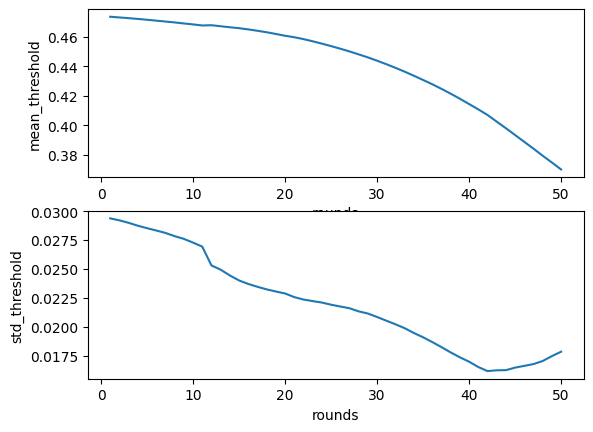

In [ ]:

rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history_train.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history_train.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

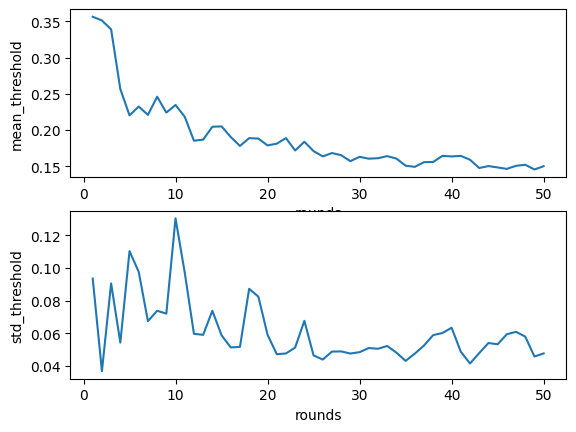

In [ ]:

rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history_train.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history_train.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

In [ ]:
THRESHOLD = min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])
print(THRESHOLD)

0.35386440783485


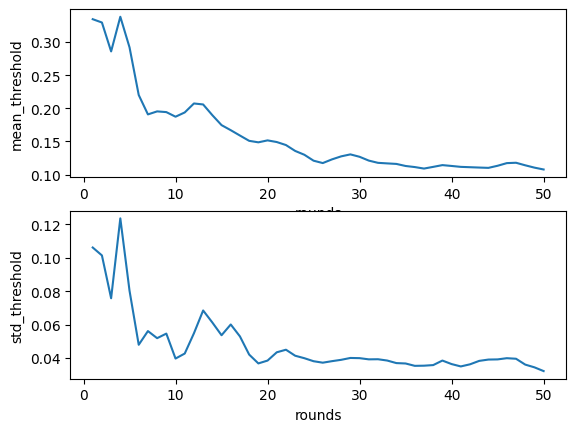

In [ ]:
## FedAdam, 3 layers
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history_train.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history_train.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

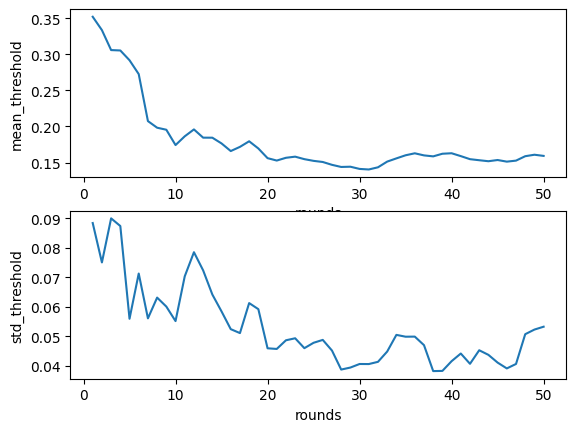

In [ ]:
## FedAdam
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history_train.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history_train.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

## **Training with FedAdam and MAD**

In [ ]:
strategy = SaveModelStrategy(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=1,
        min_evaluate_clients=1,
        min_available_clients=9,
        initial_parameters = initial_parameters,
        evaluate_metrics_aggregation_fn=threshold_selection,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=average_loss,
        patience = 15,
        eta = 0.0001,
        eta_l = 0.001
    )

history_train = flwr.simulation.start_simulation(
        client_fn=client_fn_train,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=50
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=50, no round_timeout
2024-12-03 11:37:06,656	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 16312614912.0, 'memory': 32625229824.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineA

(ClientAppActor pid=233886) [Client 1] fit, config: {}
(ClientAppActor pid=233886) Epoch [1/4], Train Loss: 0.1526


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06525684893131256, 0.08734793961048126, 0.06785771995782852, 0.031154794618487358, 0.098480723798275, 0.046435821801424026, 0.08691123872995377, 0.027764471247792244, 0.03602030873298645]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233886) [Client 2] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=233886) [Client 6] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.4890808102081368
Client 2 threshold: 0.4499159481650514
Client 1 threshold: 0.47193931876592077
Client 7 threshold: 0.4583067500520881
Client 8 threshold: 0.4623195235912714
Client 0 threshold: 0.4490160621969323
Client 4 threshold: 0.46615658565414014
Client 6 threshold: 0.40360818725573827
Client 3 threshold: 0.45305882909205547
Lowest validation threshold updated
Saving model at round 1
(ClientAppActor pid=233886) Epoch [4/4], Train Loss: 0.0653 [repeated 35x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.04869680479168892, 0.06377828121185303, 0.06747118383646011, 0.036006905138492584, 0.08906737715005875, 0.08737830072641373, 0.0320347435772419, 0.09806659072637558, 0.027858858928084373]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233890) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 2] evaluate, config: {} [repeated 8x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.4889544784320165
Client 1 threshold: 0.47186336732659834
Client 8 threshold: 0.46224261684511886
Client 6 threshold: 0.4035610635071341
Client 4 threshold: 0.46607171252552754
Client 7 threshold: 0.45822176568674117
Client 0 threshold: 0.44893690165879085
Client 2 threshold: 0.4498335848934144
Client 3 threshold: 0.45298046513322254
Lowest validation threshold updated
Saving model at round 2
(ClientAppActor pid=233890) Epoch [4/4], Train Loss: 0.0320 [repeated 36x across cluster]
(ClientAppActor pid=233883) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) [Client 7] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08364348858594894, 0.03153156861662865, 0.026266060769557953, 0.03572705015540123, 0.04939008876681328, 0.08993542194366455, 0.09112367779016495, 0.061711981892585754, 0.0659227967262268]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.462160907517314
Client 4 threshold: 0.46598174103698276
Client 3 threshold: 0.45289727310986855
Client 0 threshold: 0.44885333848845704
Client 1 threshold: 0.47178265540607145
Client 7 threshold: 0.45813161544178804
Client 2 threshold: 0.44974638740429806
Client 6 threshold: 0.4035521066795025
Client 5 threshold: 0.48882269638254483
Lowest validation threshold updated
Saving model at round 3
(ClientAppActor pid=233883) Epoch [4/4], Train Loss: 0.0357 [repeated 36x across cluster]
(ClientAppActor pid=233886) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 1] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08810091018676758, 0.0684753879904747, 0.049385495483875275, 0.024893494322896004, 0.028717994689941406, 0.0625646561384201, 0.08675281703472137, 0.035148736089468, 0.09933512657880783]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233886) Epoch [4/4], Train Loss: 0.0351 [repeated 36x across cluster]
Client 4 threshold: 0.465888818934659
Client 1 threshold: 0.47169891421084037
Client 0 threshold: 0.44876695058426574
Client 7 threshold: 0.45803834817550776
Client 5 threshold: 0.4886876892190397
Client 8 threshold: 0.46207617936948425
Client 6 threshold: 0.4035002918503749
Client 2 threshold: 0.4496561687866356
Client 3 threshold: 0.4528115087758024
Lowest validation threshold updated
Saving model at round 4
(ClientAppActor pid=233883) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 6] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06439857184886932, 0.08535376936197281, 0.03116190992295742, 0.0484057292342186, 0.09946271777153015, 0.06698007136583328, 0.03501147776842117, 0.02628130279481411, 0.09020489454269409]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233883) Epoch [4/4], Train Loss: 0.0902 [repeated 36x across cluster]
Client 7 threshold: 0.4579426362599152
Client 5 threshold: 0.48858706473885555
Client 3 threshold: 0.45272408064672603
Client 6 threshold: 0.40344718207453867
Client 8 threshold: 0.46198942817316746
Client 0 threshold: 0.4486670210933797
Client 1 threshold: 0.47161296349004994
Client 2 threshold: 0.44957787335694466
Client 4 threshold: 0.46582823866267237
Lowest validation threshold updated
Saving model at round 5
(ClientAppActor pid=233883) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) [Client 8] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02679472789168358, 0.06417477130889893, 0.028045039623975754, 0.035671114921569824, 0.08359374105930328, 0.09039010107517242, 0.06727377325296402, 0.044921211898326874, 0.08951088041067123]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233883) Epoch [4/4], Train Loss: 0.0357 [repeated 36x across cluster]
Client 5 threshold: 0.4884844044457804
Client 7 threshold: 0.45784469888082324
Client 2 threshold: 0.44948338275957206
Client 8 threshold: 0.46190086002455016
Client 4 threshold: 0.4657311893035363
Client 0 threshold: 0.44857666142496155
Client 6 threshold: 0.40339344497021035
Client 1 threshold: 0.4715248312011415
Client 3 threshold: 0.45263486811379167
Lowest validation threshold updated
Saving model at round 6


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08246740698814392, 0.09257206320762634, 0.030455047264695168, 0.09127999097108841, 0.049897201359272, 0.03548058122396469, 0.06703678518533707, 0.025615831837058067, 0.06337036192417145]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233888) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 0] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.45254396308113537
Client 0 threshold: 0.4484849885235213
Client 5 threshold: 0.48834351326588155
Client 7 threshold: 0.4577453545090884
Client 8 threshold: 0.46181089569275
Client 6 threshold: 0.40333916285996413
Client 4 threshold: 0.4656324883328669
Client 2 threshold: 0.44938739461790783
Client 1 threshold: 0.471435351033322
Lowest validation threshold updated
Saving model at round 7
(ClientAppActor pid=233888) Epoch [4/4], Train Loss: 0.0305 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233889) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) [Client 3] evaluate, config: {} [repeated 9x across cluster]
[0.03536422923207283, 0.06528414040803909, 0.10380982607603073, 0.02923531085252762, 0.025619426742196083, 0.08344031870365143, 0.06270021945238113, 0.04571858420968056, 0.09263092279434204]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4576440604810365
Client 5 threshold: 0.48823731187407116
Client 1 threshold: 0.47134414064324726
Client 8 threshold: 0.46171944168084117
Client 0 threshold: 0.4483919831400383
Client 4 threshold: 0.46553206282194065
Client 2 threshold: 0.44928951077931406
Client 6 threshold: 0.403283964960077
Client 3 threshold: 0.4524511069918772
Lowest validation threshold updated
Saving model at round 8
(ClientAppActor pid=233889) Epoch [4/4], Train Loss: 0.0926 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0849338248372078, 0.035308368504047394, 0.0900675430893898, 0.046892259269952774, 0.0664655864238739, 0.025776537135243416, 0.10265074670314789, 0.03132098913192749, 0.06288321316242218]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233887) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 5] evaluate, config: {} [repeated 12x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.449189828022218
Client 0 threshold: 0.4482750197734949
Client 3 threshold: 0.4523568540485518
Client 8 threshold: 0.4616265906841762
Client 5 threshold: 0.48809299607702544
Client 7 threshold: 0.4575409124893308
Client 1 threshold: 0.47125140217314954
Client 6 threshold: 0.40322781776067157
Client 4 threshold: 0.46542998861084056
Lowest validation threshold updated
Saving model at round 9
(ClientAppActor pid=233887) Epoch [4/4], Train Loss: 0.0901 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08321943879127502, 0.0849715918302536, 0.06485378742218018, 0.047975439578294754, 0.027162229642271996, 0.10281476378440857, 0.035079821944236755, 0.06419021636247635, 0.028290998190641403]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.4522614375766864
Client 5 threshold: 0.48798405538203343
Client 1 threshold: 0.47115759209223135
Client 8 threshold: 0.46153252988628524
Client 6 threshold: 0.4032122201259182
Client 0 threshold: 0.44817900074327033
Client 7 threshold: 0.45743668110212665
Client 2 threshold: 0.4490889361090651
Client 4 threshold: 0.4653270580721043
Lowest validation threshold updated
Saving model at round 10
(ClientAppActor pid=233885) [Client 7] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=233891) [Client 7] evaluate, config: {} [repeated 15x across cluster]
(ClientAppActor pid=233885) Epoch [1/4], Train Loss: 0.1657 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06495863944292068, 0.08340972661972046, 0.10382057726383209, 0.02843550220131874, 0.06299940496683121, 0.08706033229827881, 0.025577474385499954, 0.03506164625287056, 0.046579089015722275]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.4031960068584468
Client 1 threshold: 0.47106283288610606
Client 0 threshold: 0.44808189336999615
Client 7 threshold: 0.45733110051643583
Client 4 threshold: 0.46525764040341383
Client 5 threshold: 0.487837655060683
Client 2 threshold: 0.44898688718169233
Client 3 threshold: 0.45216478598307475
Client 8 threshold: 0.46143718735386513
Lowest validation threshold updated
Saving model at round 11
(ClientAppActor pid=233888) [Client 2] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=233883) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) Epoch [1/4], Train Loss: 0.1770 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.047583721578121185, 0.02526312880218029, 0.08831007778644562, 0.09919355064630508, 0.028015634045004845, 0.08688230067491531, 0.03509683907032013, 0.06102835759520531, 0.06527121365070343]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233887) [Client 4] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=233885) [Client 8] evaluate, config: {} [repeated 6x across cluster]
Client 0 threshold: 0.4479723267121705
Client 3 threshold: 0.45206687827745756
Client 4 threshold: 0.4651527193649477
Client 5 threshold: 0.48772651643778453
Client 2 threshold: 0.4488834811974174
Client 1 threshold: 0.47096702570125704
Client 7 threshold: 0.45722413098312986
Client 8 threshold: 0.46134051187602
Client 6 threshold: 0.4031381900973866
Lowest validation threshold updated
Saving model at round 12
(ClientAppActor pid=233883) Epoch [1/4], Train Loss: 0.1576 [repeated 34x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.026204010471701622, 0.04668582230806351, 0.06168605014681816, 0.02823309786617756, 0.03478056937456131, 0.06387270241975784, 0.08697627484798431, 0.0842096209526062, 0.10478292405605316]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 14]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233891) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) [Client 6] evaluate, config: {} [repeated 12x across cluster]
Client 2 threshold: 0.44877880250966756
Client 0 threshold: 0.44787295052662607
Client 3 threshold: 0.45196733568034686
Client 7 threshold: 0.4571160141215384
Client 6 threshold: 0.4031210614223699
Client 1 threshold: 0.4708702016582294
Client 4 threshold: 0.4650812360089472
Client 5 threshold: 0.4875782077560187
Client 8 threshold: 0.4612417045143937
Lowest validation threshold updated
Saving model at round 13
(ClientAppActor pid=233891) Epoch [1/4], Train Loss: 0.1772 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08793634921312332, 0.10301856696605682, 0.08710996806621552, 0.06489666551351547, 0.03481914848089218, 0.06514883786439896, 0.026401756331324577, 0.02916121669113636, 0.04856706038117409]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233886) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) [Client 0] evaluate, config: {} [repeated 4x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 15]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.46114182891243205
Client 3 threshold: 0.45186671891873875
Client 4 threshold: 0.46497441144982526
Client 1 threshold: 0.4707722138132454
Client 0 threshold: 0.44776152723853196
Client 7 threshold: 0.4570064747259146
Client 2 threshold: 0.4486728615736193
Client 6 threshold: 0.40310352347536665
Client 5 threshold: 0.487428815837768
Lowest validation threshold updated
Saving model at round 14
(ClientAppActor pid=233886) Epoch [1/4], Train Loss: 0.1468 [repeated 35x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06194330379366875, 0.08798962086439133, 0.09404995292425156, 0.034850869327783585, 0.08655676245689392, 0.025508811697363853, 0.047952912747859955, 0.0675886869430542, 0.0280852559953928]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.46104092701082505
Client 7 threshold: 0.45689503117142555
Client 4 threshold: 0.46486619201955104
Client 5 threshold: 0.48731420567354866
Client 1 threshold: 0.47067266332668245
Client 3 threshold: 0.4517651097634346
Client 0 threshold: 0.44766039350514436
Client 6 threshold: 0.40312680380555715
Client 2 threshold: 0.44856587403990106
Lowest validation threshold updated
Saving model at round 15
(ClientAppActor pid=233891) [Client 5] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=233891) [Client 3] evaluate, config: {} [repeated 14x across cluster]
(ClientAppActor pid=233888) Epoch [1/4], Train Loss: 0.1169 [repeated 41x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.047956790775060654, 0.02971619740128517, 0.10086049139499664, 0.02687174640595913, 0.03504415974020958, 0.0879121720790863, 0.06641817092895508, 0.06491361558437347, 0.08764386177062988]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4705715968819485
Client 3 threshold: 0.4516625984979607
Client 0 threshold: 0.4475583603407984
Client 5 threshold: 0.48719826882545986
Client 7 threshold: 0.4567823454101887
Client 8 threshold: 0.46093910989160114
Client 2 threshold: 0.4484579121717988
Client 6 threshold: 0.403067561103363
Client 4 threshold: 0.4647908857452951
Lowest validation threshold updated
Saving model at round 16
(ClientAppActor pid=233883) [Client 3] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=233889) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) Epoch [1/4], Train Loss: 0.1167 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0894206091761589, 0.04725652560591698, 0.08743373304605484, 0.06766153126955032, 0.10293473303318024, 0.0292596947401762, 0.0648861974477768, 0.025115208700299263, 0.035200249403715134]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.45155929344643625
Client 1 threshold: 0.47046941035299505
Client 6 threshold: 0.40304860564504835
Client 8 threshold: 0.46083636679686363
Client 7 threshold: 0.4566686182219907
Client 2 threshold: 0.44834915567442857
Client 0 threshold: 0.44744458928713926
Client 5 threshold: 0.4870813773460742
Client 4 threshold: 0.4647145538787258
Lowest validation threshold updated
Saving model at round 17
(ClientAppActor pid=233891) [Client 0] fit, config: {} [repeated 15x across cluster]
(ClientAppActor pid=233888) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) Epoch [2/4], Train Loss: 0.0883 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03625448793172836, 0.06536869704723358, 0.02880377322435379, 0.06347893178462982, 0.08820458501577377, 0.04534068703651428, 0.08406887203454971, 0.09780427068471909, 0.030361447483301163]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4565538791079865
Client 2 threshold: 0.448239620905807
Client 3 threshold: 0.45145518649952865
Client 0 threshold: 0.44733013070102595
Client 6 threshold: 0.4030291233875303
Client 5 threshold: 0.4869635964184228
Client 1 threshold: 0.47036632278675455
Client 4 threshold: 0.4646034418325211
Client 8 threshold: 0.46073272606372995
Lowest validation threshold updated
Saving model at round 18
(ClientAppActor pid=233888) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233887) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) Epoch [2/4], Train Loss: 0.0521 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0902731642127037, 0.08768100291490555, 0.06534849107265472, 0.0642283484339714, 0.03154976665973663, 0.10459236800670624, 0.04664362221956253, 0.027042852714657784, 0.03540721908211708]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.48684464026483676
Client 6 threshold: 0.4030501315234144
Client 2 threshold: 0.44812899886006646
Client 1 threshold: 0.47026214657002613
Client 3 threshold: 0.4513499949293401
Client 7 threshold: 0.4564379316319174
Client 4 threshold: 0.4645249243062074
Client 8 threshold: 0.4606278457398917
Client 0 threshold: 0.44722602109865806
Lowest validation threshold updated
Saving model at round 19
(ClientAppActor pid=233887) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) Epoch [3/4], Train Loss: 0.0540 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02941015362739563, 0.03574022278189659, 0.027451664209365845, 0.08939890563488007, 0.06700321286916733, 0.045675694942474365, 0.08790259808301926, 0.06582891196012497, 0.09866255521774292]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 21]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.486724884989649
Client 2 threshold: 0.448017575539357
Client 7 threshold: 0.45632064671817657
Client 6 threshold: 0.4029883051807492
Client 1 threshold: 0.4701572454268337
Client 0 threshold: 0.4471212643394315
Client 4 threshold: 0.4644118769817851
Client 3 threshold: 0.4512440581544911
Client 8 threshold: 0.46052220752011475
Lowest validation threshold updated
Saving model at round 20
(ClientAppActor pid=233887) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) Epoch [2/4], Train Loss: 0.0856 [repeated 31x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02907908707857132, 0.09022650867700577, 0.0626780316233635, 0.04488587751984596, 0.10160326212644577, 0.08843918889760971, 0.035763807594776154, 0.027831338346004486, 0.06456433236598969]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 22]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.45113776867029637
Client 8 threshold: 0.46041632175356245
Client 0 threshold: 0.447004971388623
Client 5 threshold: 0.48660479337735735
Client 6 threshold: 0.4030080327532216
Client 2 threshold: 0.447905747293156
Client 7 threshold: 0.45620213965777406
Client 4 threshold: 0.4642986242708577
Client 1 threshold: 0.47005184795930366
Lowest validation threshold updated
Saving model at round 21
(ClientAppActor pid=233890) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) Epoch [2/4], Train Loss: 0.0870 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08995133638381958, 0.10201095044612885, 0.06595098227262497, 0.030009767040610313, 0.04570851847529411, 0.026957549154758453, 0.060067422688007355, 0.03540578857064247, 0.08530975878238678]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 23]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45608222581322005
Client 5 threshold: 0.48648411258301494
Client 4 threshold: 0.4641848648160561
Client 0 threshold: 0.4468881633544214
Client 3 threshold: 0.4510271117200364
Client 8 threshold: 0.4603090617810574
Client 1 threshold: 0.46994558809065345
Client 6 threshold: 0.402986862231425
Client 2 threshold: 0.4477932600375207
Lowest validation threshold updated
Saving model at round 22
(ClientAppActor pid=233889) [Client 0] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=233886) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) Epoch [2/4], Train Loss: 0.0519 [repeated 31x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.0349460244178772, 0.06638116389513016, 0.06371387094259262, 0.04535922408103943, 0.08871597051620483, 0.10462146997451782, 0.029351036995649338, 0.08799641579389572, 0.029162628576159477]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 24]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.40308856659297876
Client 0 threshold: 0.4467814683118405
Client 4 threshold: 0.46410388597845803
Client 1 threshold: 0.46983709258882067
Client 3 threshold: 0.45091906772356344
Client 7 threshold: 0.4559606825198808
Client 8 threshold: 0.4601993351342009
Client 2 threshold: 0.44767928839089954
Client 5 threshold: 0.48632653993770586
Lowest validation threshold updated
Saving model at round 23
(ClientAppActor pid=233889) [Client 8] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=233886) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) Epoch [2/4], Train Loss: 0.0440 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.060542669147253036, 0.035530101507902145, 0.08925240486860275, 0.028580524027347565, 0.026768384501338005, 0.09824483096599579, 0.08798005431890488, 0.06455203145742416, 0.045924581587314606]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 25]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.4697266697516989
Client 2 threshold: 0.4475631587396467
Client 6 threshold: 0.40306646442115585
Client 0 threshold: 0.4466732084704441
Client 7 threshold: 0.4558377562531461
Client 3 threshold: 0.4508088794391212
Client 4 threshold: 0.46402175854088207
Client 5 threshold: 0.48620395108065084
Client 8 threshold: 0.45998184533855735
Lowest validation threshold updated
Saving model at round 24
(ClientAppActor pid=233889) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 6] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) Epoch [2/4], Train Loss: 0.0984 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06375741958618164, 0.08741012960672379, 0.06508410722017288, 0.047269679605960846, 0.10155633836984634, 0.02784370444715023, 0.08958025276660919, 0.031007206067442894, 0.03619561344385147]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 26]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4598685101381088
Client 2 threshold: 0.4474456751413106
Client 0 threshold: 0.44656431793683726
Client 6 threshold: 0.40308475728771304
Client 7 threshold: 0.4557131015345075
Client 1 threshold: 0.4696149839199819
Client 3 threshold: 0.4506979024481958
Client 5 threshold: 0.486080323313338
Client 4 threshold: 0.463938361275391
Lowest validation threshold updated
Saving model at round 25
(ClientAppActor pid=233889) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233887) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) Epoch [3/4], Train Loss: 0.0737 [repeated 40x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.035866234451532364, 0.026992592960596085, 0.06170133873820305, 0.029521863907575607, 0.04638659209012985, 0.08796866983175278, 0.08882144093513489, 0.0673845037817955, 0.10440747439861298]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 27]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.4597542719125404
Client 0 threshold: 0.44645443902974724
Client 1 threshold: 0.46950260539815414
Client 3 threshold: 0.45058561115639206
Client 6 threshold: 0.4030616479290458
Client 5 threshold: 0.48591927921799855
Client 2 threshold: 0.44732749582011216
Client 7 threshold: 0.4555875576818241
Client 4 threshold: 0.46385355868032097
Lowest validation threshold updated
Saving model at round 26
(ClientAppActor pid=233890) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) Epoch [4/4], Train Loss: 0.0474 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08992010354995728, 0.030310792848467827, 0.05861290171742439, 0.06704479455947876, 0.09014823287725449, 0.03682749345898628, 0.09590590745210648, 0.04741789773106575, 0.02842225320637226]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 28]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.40299693147596954
Client 3 threshold: 0.45047099326143875
Client 1 threshold: 0.46938896461498936
Client 8 threshold: 0.45963880360443027
Client 7 threshold: 0.4554608233400374
Client 2 threshold: 0.44720805464447283
Client 5 threshold: 0.4857562348244544
Client 0 threshold: 0.4463435198754843
Client 4 threshold: 0.4638319228463761
Lowest validation threshold updated
Saving model at round 27
(ClientAppActor pid=233891) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233887) [Client 5] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) Epoch [3/4], Train Loss: 0.0696 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06723003834486008, 0.060892585664987564, 0.08826811611652374, 0.0352015383541584, 0.10436339676380157, 0.027906633913517, 0.048660021275281906, 0.09098061919212341, 0.02912904880940914]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 29]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4553330944897512
Client 1 threshold: 0.46927425398589806
Client 0 threshold: 0.4462319147641624
Client 2 threshold: 0.44708768545104566
Client 3 threshold: 0.4503553811941026
Client 5 threshold: 0.4856281586914404
Client 6 threshold: 0.40297216280110865
Client 8 threshold: 0.4595223297279668
Client 4 threshold: 0.4637106398289466
Lowest validation threshold updated
Saving model at round 28
(ClientAppActor pid=233891) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) Epoch [3/4], Train Loss: 0.0524 [repeated 32x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08577980846166611, 0.028225740417838097, 0.0669567808508873, 0.03618638589978218, 0.0471695214509964, 0.06179037690162659, 0.02667669579386711, 0.08377321064472198, 0.10358273237943649]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 30]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 1 threshold: 0.46915857219217894
Client 0 threshold: 0.4461196341878002
Client 6 threshold: 0.4029470409831944
Client 7 threshold: 0.4552044827287705
Client 2 threshold: 0.4469664908753917
Client 5 threshold: 0.48549934390628735
Client 8 threshold: 0.45940491444363546
Client 4 threshold: 0.463621291164963
Client 3 threshold: 0.45023885498121613
Lowest validation threshold updated
Saving model at round 29
(ClientAppActor pid=233886) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) Epoch [4/4], Train Loss: 0.0860 [repeated 43x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.10385265946388245, 0.0679904967546463, 0.08777032792568207, 0.05919453501701355, 0.04874506592750549, 0.08596019446849823, 0.02877213805913925, 0.03592534735798836, 0.028293147683143616]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 31]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 2 threshold: 0.44684442753181686
Client 1 threshold: 0.46904188250561263
Client 3 threshold: 0.4501213988925631
Client 7 threshold: 0.45507488605710616
Client 0 threshold: 0.44600665296964737
Client 8 threshold: 0.459286585055725
Client 5 threshold: 0.4853696171737797
Client 4 threshold: 0.46353096310676667
Client 6 threshold: 0.40292134841559546
Lowest validation threshold updated
Saving model at round 30
(ClientAppActor pid=233885) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) Epoch [3/4], Train Loss: 0.0677 [repeated 28x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.03610634803771973, 0.08429685980081558, 0.08494608104228973, 0.028915084898471832, 0.028205465525388718, 0.10386820137500763, 0.06626284867525101, 0.05840105935931206, 0.047146275639534]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 32]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.4634398345406817
Client 8 threshold: 0.45916722117531167
Client 2 threshold: 0.4467214986723451
Client 5 threshold: 0.4852390203460267
Client 6 threshold: 0.40285413379511226
Client 0 threshold: 0.44588184301881495
Client 1 threshold: 0.46892414790374143
Client 3 threshold: 0.45000297154707514
Client 7 threshold: 0.45494435019998003
Lowest validation threshold updated
Saving model at round 31
(ClientAppActor pid=233888) [Client 0] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) [Client 7] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) Epoch [3/4], Train Loss: 0.0679 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.035408418625593185, 0.08736453950405121, 0.04678449407219887, 0.027673589065670967, 0.08620695769786835, 0.02810410037636757, 0.059415385127067566, 0.06544617563486099, 0.10453332960605621]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 33]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.4851079548162889
Client 8 threshold: 0.45904709107459357
Client 6 threshold: 0.4029499770149433
Client 1 threshold: 0.46880569178314446
Client 4 threshold: 0.46331578206572216
Client 2 threshold: 0.4465979430721566
Client 0 threshold: 0.4457564149482058
Client 7 threshold: 0.45481291028341475
Client 3 threshold: 0.44988392066016064
Lowest validation threshold updated
Saving model at round 32
(ClientAppActor pid=233889) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) Epoch [3/4], Train Loss: 0.0399 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.10427584499120712, 0.09201058745384216, 0.06669062376022339, 0.08733420819044113, 0.028635820373892784, 0.03600987046957016, 0.061701104044914246, 0.02759404480457306, 0.04681333154439926]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 34]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45468060815554345
Client 3 threshold: 0.4497641188415076
Client 5 threshold: 0.4849762130087016
Client 2 threshold: 0.4464736537722173
Client 1 threshold: 0.4686864189914756
Client 0 threshold: 0.4456303730375927
Client 6 threshold: 0.403044617521335
Client 4 threshold: 0.46322337251017587
Client 8 threshold: 0.4589262066271521
Lowest validation threshold updated
Saving model at round 33
(ClientAppActor pid=233887) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) [Client 1] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) Epoch [4/4], Train Loss: 0.0349 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08498100936412811, 0.06836807727813721, 0.06255639344453812, 0.0472382977604866, 0.03488699719309807, 0.10367795825004578, 0.028667381033301353, 0.02825661189854145, 0.0891241580247879]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 35]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.4631298260473999
Client 5 threshold: 0.484843252610539
Client 2 threshold: 0.44634827833300805
Client 1 threshold: 0.46856593478553477
Client 3 threshold: 0.4496432235881089
Client 7 threshold: 0.45454707350895535
Client 8 threshold: 0.4588042233845745
Client 6 threshold: 0.40297560986177394
Client 0 threshold: 0.44551449250363107
Lowest validation threshold updated
Saving model at round 34
(ClientAppActor pid=233888) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) [Client 2] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) Epoch [4/4], Train Loss: 0.0286 [repeated 39x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08306784182786942, 0.06694872677326202, 0.061519041657447815, 0.025260580703616142, 0.08911827206611633, 0.028612960129976273, 0.03495778143405914, 0.10401016473770142, 0.04793667048215866]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 36]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.46300320965979175
Client 2 threshold: 0.44622207020279825
Client 0 threshold: 0.4453979122038792
Client 3 threshold: 0.4495214492317699
Client 6 threshold: 0.40290624899500127
Client 1 threshold: 0.468444513234396
Client 8 threshold: 0.45868126077855853
Client 5 threshold: 0.4846736851612883
Client 7 threshold: 0.45441234769738337
Lowest validation threshold updated
Saving model at round 35
(ClientAppActor pid=233891) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) Epoch [4/4], Train Loss: 0.0352 [repeated 32x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.027835752815008163, 0.10390076041221619, 0.028021829202771187, 0.06162413954734802, 0.04494538530707359, 0.08872232586145401, 0.06562328338623047, 0.035249628126621246, 0.08870790898799896]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 37]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.48453898061329204
Client 3 threshold: 0.4493986877727588
Client 8 threshold: 0.45855730771960024
Client 1 threshold: 0.46832198634382466
Client 4 threshold: 0.46287583881367067
Client 0 threshold: 0.4452872908570768
Client 2 threshold: 0.44609503201564904
Client 7 threshold: 0.45427647380035724
Client 6 threshold: 0.4028772779285432
Lowest validation threshold updated
Saving model at round 36
(ClientAppActor pid=233883) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233885) Epoch [4/4], Train Loss: 0.0583 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08720739185810089, 0.027625547721982002, 0.034907203167676926, 0.05833258479833603, 0.06558258086442947, 0.04584534093737602, 0.08764591813087463, 0.10417170077562332, 0.028989292681217194]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 38]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45413956489589824
Client 4 threshold: 0.462747834604932
Client 2 threshold: 0.445967328208981
Client 6 threshold: 0.402888501735513
Client 5 threshold: 0.4844035266446924
Client 8 threshold: 0.4584324839355587
Client 1 threshold: 0.4681984926153559
Client 3 threshold: 0.4492750684473519
Client 0 threshold: 0.44515842456011534
Lowest validation threshold updated
Saving model at round 37
(ClientAppActor pid=233891) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233887) Epoch [4/4], Train Loss: 0.0572 [repeated 39x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06447554379701614, 0.045588258653879166, 0.08671476691961288, 0.03651302680373192, 0.02727954089641571, 0.028509467840194702, 0.05719028413295746, 0.08821728080511093, 0.10384365916252136]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 39]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.44502928759717814
Client 6 threshold: 0.4029803088090579
Client 1 threshold: 0.46807413249317226
Client 7 threshold: 0.45400195751941774
Client 3 threshold: 0.4491507179571637
Client 5 threshold: 0.4842674192599593
Client 2 threshold: 0.4458391130404348
Client 8 threshold: 0.4583074544699701
Client 4 threshold: 0.46261932185146093
Lowest validation threshold updated
Saving model at round 38
(ClientAppActor pid=233891) [Client 5] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 0] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) Epoch [4/4], Train Loss: 0.0349 [repeated 34x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.09098949283361435, 0.062191903591156006, 0.02853560820221901, 0.08559122681617737, 0.06500868499279022, 0.10317899286746979, 0.03487027809023857, 0.04834496229887009, 0.03010162152349949]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 40]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.46249034397319316
Client 8 threshold: 0.4581819653957255
Client 0 threshold: 0.4449107596557262
Client 7 threshold: 0.45386342740547714
Client 2 threshold: 0.44572462397587065
Client 5 threshold: 0.4841307910671741
Client 1 threshold: 0.4679490760481388
Client 3 threshold: 0.4490257684683243
Client 6 threshold: 0.40303111374854317
Lowest validation threshold updated
Saving model at round 39
(ClientAppActor pid=233891) [Client 7] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233888) Epoch [4/4], Train Loss: 0.0348 [repeated 42x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.061870843172073364, 0.02884018048644066, 0.08808930963277817, 0.09053118526935577, 0.03475518897175789, 0.10312118381261826, 0.0666768029332161, 0.04581109434366226, 0.028262745589017868]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 41]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.48399309882023284
Client 6 threshold: 0.4030006048028395
Client 4 threshold: 0.4623604484730837
Client 2 threshold: 0.44559472671322903
Client 3 threshold: 0.44889977750461574
Client 7 threshold: 0.45372304539590147
Client 8 threshold: 0.45805543254441033
Client 1 threshold: 0.46782288048518184
Client 0 threshold: 0.44476918867514004
Lowest validation threshold updated
Saving model at round 40
(ClientAppActor pid=233891) [Client 3] fit, config: {} [repeated 10x across cluster]
(ClientAppActor pid=233886) [Client 8] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) Epoch [2/4], Train Loss: 0.1175 [repeated 38x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.028225673362612724, 0.06345226615667343, 0.026847774162888527, 0.06385371088981628, 0.04428595304489136, 0.09051060676574707, 0.0900733470916748, 0.03488977998495102, 0.10306236147880554]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 42]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45358096302140793
Client 5 threshold: 0.4838189487836517
Client 4 threshold: 0.4622297830985097
Client 1 threshold: 0.4676957051173254
Client 2 threshold: 0.4454640233097175
Client 8 threshold: 0.45792793653993036
Client 6 threshold: 0.40300971422204745
Client 3 threshold: 0.4487728960560434
Client 0 threshold: 0.4446494652505432
Lowest validation threshold updated
Saving model at round 41
(ClientAppActor pid=233883) [Client 2] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233891) [Client 4] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) Epoch [2/4], Train Loss: 0.0897 [repeated 36x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08379747718572617, 0.02682243473827839, 0.06487306207418442, 0.0465596467256546, 0.028154661878943443, 0.06143062189221382, 0.08895669877529144, 0.10382217913866043, 0.0366167277097702]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 43]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45343704649335637
Client 5 threshold: 0.4836792398378621
Client 3 threshold: 0.4486449825172538
Client 8 threshold: 0.45769437655595885
Client 6 threshold: 0.40305807955536543
Client 2 threshold: 0.4453322926697355
Client 4 threshold: 0.46213039738277056
Client 1 threshold: 0.46756728749066173
Client 0 threshold: 0.4445291999699767
Lowest validation threshold updated
Saving model at round 42
(ClientAppActor pid=233883) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 3] evaluate, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) Epoch [3/4], Train Loss: 0.0715 [repeated 37x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.08431444317102432, 0.08940213173627853, 0.02579462341964245, 0.06153404712677002, 0.029330166056752205, 0.09713233262300491, 0.036290187388658524, 0.061153948307037354, 0.04562501981854439]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 44]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.45329141453086114
Client 8 threshold: 0.4575642767810532
Client 4 threshold: 0.4620295437830183
Client 0 threshold: 0.4444079928239422
Client 6 threshold: 0.40314500002853154
Client 3 threshold: 0.4485157592676947
Client 2 threshold: 0.44519925074490635
Client 5 threshold: 0.48353804357703417
Client 1 threshold: 0.46743684531784413
Lowest validation threshold updated
Saving model at round 43
(ClientAppActor pid=233889) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 5] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233889) Epoch [4/4], Train Loss: 0.0275 [repeated 37x across cluster]
[0.06635225564241409, 0.03500203788280487, 0.027504630386829376, 0.059642139822244644, 0.04521467164158821, 0.07987996935844421, 0.10321367532014847, 0.027048824355006218, 0.08820568770170212]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 45]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.45743325896108833
Client 0 threshold: 0.44428612265469053
Client 6 threshold: 0.4031106905564672
Client 7 threshold: 0.45314447056704743
Client 5 threshold: 0.48336048731718856
Client 3 threshold: 0.4483855944560988
Client 2 threshold: 0.44506524966430716
Client 4 threshold: 0.4619277346564369
Client 1 threshold: 0.4673051878514138
Lowest validation threshold updated
Saving model at round 44
(ClientAppActor pid=233890) [Client 2] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) [Client 5] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.02774716354906559, 0.10179706662893295, 0.06652629375457764, 0.08511252701282501, 0.05751107633113861, 0.04717276617884636, 0.08873967081308365, 0.03488310053944588, 0.02950233966112137]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233890) Epoch [4/4], Train Loss: 0.0575 [repeated 36x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 46]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 5 threshold: 0.4831819312388816
Client 6 threshold: 0.4030760885133706
Client 8 threshold: 0.45730121138647606
Client 2 threshold: 0.44493025348238163
Client 4 threshold: 0.4618248956655199
Client 1 threshold: 0.4671724198961989
Client 0 threshold: 0.4441636016119472
Client 3 threshold: 0.4482544555502217
Client 7 threshold: 0.4529958564129759
Lowest validation threshold updated
Saving model at round 45
(ClientAppActor pid=233883) [Client 8] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233890) [Client 6] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.10348795354366302, 0.08948785811662674, 0.028067173436284065, 0.027370430529117584, 0.03502185642719269, 0.06753778457641602, 0.06146916747093201, 0.08238323777914047, 0.04338536411523819]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233883) Epoch [4/4], Train Loss: 0.0350 [repeated 36x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 47]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.4528455886431844
Client 8 threshold: 0.4571678506681074
Client 1 threshold: 0.46703828848085704
Client 3 threshold: 0.44812228921167774
Client 5 threshold: 0.48303733160149565
Client 4 threshold: 0.461689217325478
Client 2 threshold: 0.44479399490214877
Client 0 threshold: 0.44402917349394316
Client 6 threshold: 0.40308074106163827
Lowest validation threshold updated
Saving model at round 46
(ClientAppActor pid=233889) [Client 4] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233883) [Client 2] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=233889) Epoch [4/4], Train Loss: 0.0654 [repeated 36x across cluster]
[0.028391189873218536, 0.06536600738763809, 0.08894462883472443, 0.029376013204455376, 0.06194248050451279, 0.03496186062693596, 0.04592089354991913, 0.08252441138029099, 0.10196156799793243]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 48]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.4030045892319212
Client 7 threshold: 0.4526932378803486
Client 1 threshold: 0.46690246983518846
Client 3 threshold: 0.44798922601145025
Client 0 threshold: 0.44389387784653556
Client 8 threshold: 0.45703327312550196
Client 4 threshold: 0.461552570125631
Client 5 threshold: 0.48289154937029727
Client 2 threshold: 0.44465641653241095
Lowest validation threshold updated
Saving model at round 47
(ClientAppActor pid=233888) [Client 3] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 3] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06759440898895264, 0.08478274941444397, 0.02738422155380249, 0.034718140959739685, 0.1015683114528656, 0.04311319813132286, 0.027734482660889626, 0.062539242208004, 0.08488718420267105]
[4, 4, 4, 4, 4, 4, 4, 4, 4]
(ClientAppActor pid=233888) Epoch [4/4], Train Loss: 0.1016 [repeated 36x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 49]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.40300736361306
Client 2 threshold: 0.44451741747690643
Client 7 threshold: 0.4525389503425374
Client 3 threshold: 0.4478549019688538
Client 0 threshold: 0.44376878004358644
Client 5 threshold: 0.48274442341330026
Client 8 threshold: 0.4568954682410067
Client 1 threshold: 0.46676407084381455
Client 4 threshold: 0.46144659068248706
Lowest validation threshold updated
Saving model at round 48
(ClientAppActor pid=233889) [Client 6] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233889) [Client 3] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.06793780624866486, 0.10268077999353409, 0.08487109839916229, 0.03540262579917908, 0.08788921684026718, 0.06374377012252808, 0.028443593531847, 0.04529991000890732, 0.027282480150461197]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 50]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.40304872039506884
Client 7 threshold: 0.4523832929257891
Client 8 threshold: 0.4567551025948593
Client 5 threshold: 0.4825960400815319
Client 0 threshold: 0.44363173519543664
Client 3 threshold: 0.44771940840218766
Client 1 threshold: 0.4666236807207095
Client 2 threshold: 0.44437703727239686
Client 4 threshold: 0.46133946267998377
Lowest validation threshold updated
Saving model at round 49
(ClientAppActor pid=233889) Epoch [4/4], Train Loss: 0.0284 [repeated 36x across cluster]
(ClientAppActor pid=233883) [Client 1] fit, config: {} [repeated 9x across cluster]
(ClientAppActor pid=233886) [Client 2] evaluate, config: {} [repeated 9x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.09824983775615692, 0.0650072991847992, 0.08923577517271042, 0.044742681086063385, 0.06422720849514008, 0.03568759188055992, 0.02941572666168213, 0.08656153827905655, 0.028358351439237595]
[4, 4, 4, 4, 4, 4, 4, 4, 4]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 50 round(s) in 259.25s
INFO :      	History (loss, distributed):
INFO :      		round 1: 33.121122525505655
INFO :      		round 2: 33.1210513441177
INFO :      		round 3: 33.12097593792534
INFO :      		round 4: 33.120897838595724
INFO :      		round 5: 33.120817785094964
INFO :      		round 6: 33.12073612948994
INFO :      		round 7: 33.12065321744539
INFO :      		round 8: 33.12056877194216
INFO :      		round 9: 33.12048284518423
INFO :      		round 10: 33.120395977032175
INFO :      		round 11: 33.120308042219136
INFO :      		round 12: 33.12021898210028
INFO :      		round 13: 33.12012896091349
INFO :      		round 14: 33.120037962699456
INFO :      		round 15: 33.11994601537068
INFO :      		round 16: 33.11985319522823
INFO :      		round 17: 33.11975955751181
INFO :      		round 18: 33.11966514648411
INFO :      		round 19: 33.11956971940806
INFO :      		r

Client 6 threshold: 0.4029693630794733
Client 7 threshold: 0.4522268089044218
Client 2 threshold: 0.44423557901372096
Client 3 threshold: 0.44758291254539295
Client 8 threshold: 0.45661330804165806
Client 5 threshold: 0.48241135986722017
Client 0 threshold: 0.44349394836297973
Client 4 threshold: 0.4612314355912325
Client 1 threshold: 0.46648175110513596
Lowest validation threshold updated
Saving model at round 50


INFO :      	                              (49, 0.45094160891866264),
INFO :      	                              (50, 0.4508051629456929)],
INFO :      	 'aggregate_threshold_std': [(1, 0.021949739214451237),
INFO :      	                             (2, 0.021933393910697978),
INFO :      	                             (3, 0.021905533320016827),
INFO :      	                             (4, 0.021888183106464065),
INFO :      	                             (5, 0.0218784788143822),
INFO :      	                             (6, 0.02186663046719979),
INFO :      	                             (7, 0.021848382781858414),
INFO :      	                             (8, 0.021836021538108593),
INFO :      	                             (9, 0.021818175302661894),
INFO :      	                             (10, 0.021794650654278807),
INFO :      	                             (11, 0.021766724286777093),
INFO :      	                             (12, 0.021754225310282486),
INFO :      	                   

In [ ]:
history_train.metrics_distributed['client_thresholds'][47]

(48,
 [0.25190458446741104,
  0.25088246911764145,
  0.16459035128355026,
  0.10419965907931328,
  0.13936706446111202,
  0.11177093163132668,
  0.39202000573277473,
  0.33385324850678444,
  0.4053192362189293])

In [ ]:
THRESHOLD = min([i[1] for i in history_train.metrics_distributed['aggregate_threshold_mean']])

In [ ]:
THRESHOLD

0.26237044084646644

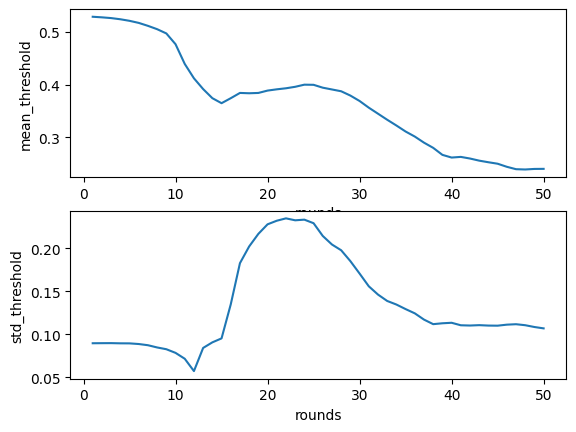

In [ ]:
## FedAdam
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history_train.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history_train.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


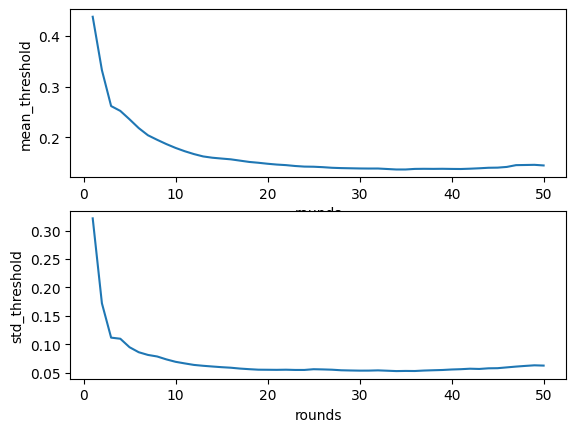

In [ ]:
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history_train.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history_train.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

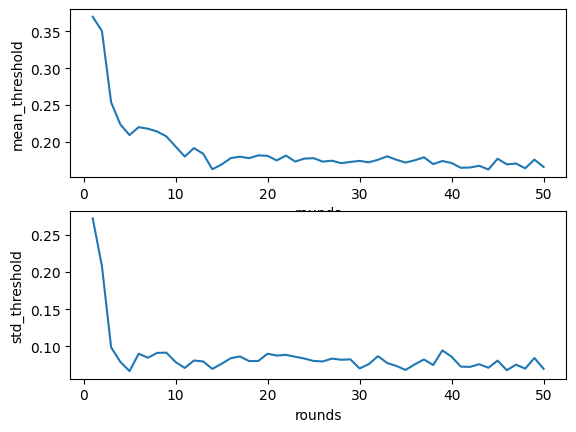

In [ ]:
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

In [ ]:
THRESHOLD = 0.13663125886685318 # 2 layers, K = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
THRESHOLD = 0.16229962247113386 # 4 layers, K = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


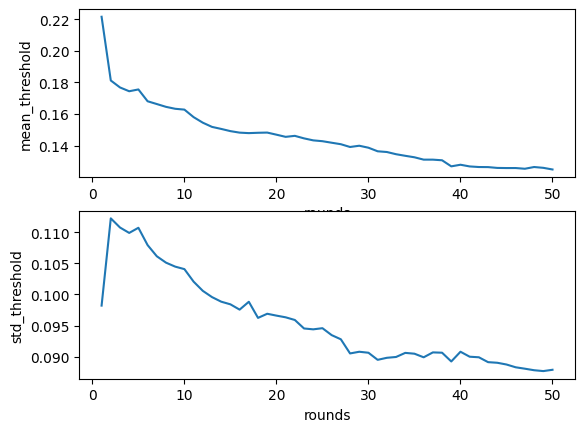

In [ ]:
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

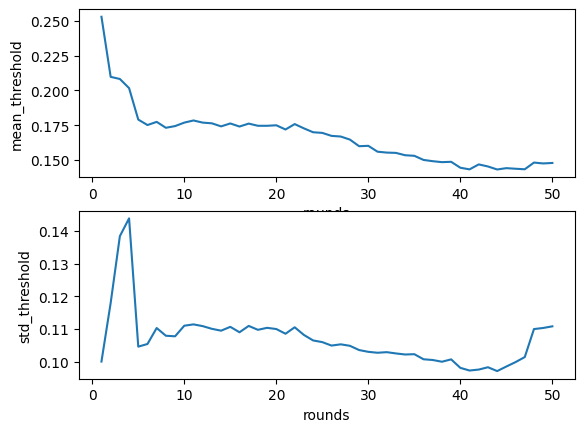

In [ ]:
rounds = []
mean_threshold = []
std_threshold = []
for round,thres_mean in history.metrics_distributed['aggregate_threshold_mean']:
  rounds.append(round)
  mean_threshold.append(thres_mean)

for _,thres_std in history.metrics_distributed['aggregate_threshold_std']:
  std_threshold.append(thres_std)

plt.subplot(2,1,1)
plt.plot(rounds,mean_threshold)
plt.xlabel('rounds')
plt.ylabel('mean_threshold')
plt.subplot(2,1,2)
plt.plot(rounds,std_threshold)
plt.xlabel('rounds')
plt.ylabel('std_threshold')
plt.show()

Select threshold to be 32.745083350275095

In [ ]:
THRESHOLD = 0.1293 # Fraction fit = 1

In [ ]:
THRESHOLD = 0.14301959466603067 # 4 layers, fraction fit = 1

In [ ]:
THRESHOLD = 0.18669525533914566 # Fraction fit = 0.5

In [ ]:
import glob
list_of_files = [fname for fname in glob.glob("./model_round_*")]

In [ ]:
list_of_files

['./model_round_44.pth',
 './model_round_3.pth',
 './model_round_10.pth',
 './model_round_4.pth',
 './model_round_2.pth',
 './model_round_1.pth',
 './model_round_9.pth',
 './model_round_14.pth',
 './model_round_5.pth',
 './model_round_11.pth']

In [ ]:
latest_round_file = max(list_of_files, key=os.path.getctime)
print("Loading pre-trained model from: ", latest_round_file)
state_dict = torch.load(latest_round_file)
global_model_trained.load_state_dict(state_dict)
state_dict_ndarrays = [v.cpu().numpy() for v in global_model_trained.state_dict().values()]
parameters = flwr.common.ndarrays_to_parameters(state_dict_ndarrays)

Loading pre-trained model from:  ./model_round_44.pth


<ipython-input-36-f6cca0873069>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(latest_round_file)


In [ ]:
global_model_trained

Autoencoder_2_layers(
  (encoder): Sequential(
    (0): Linear(in_features=35, out_features=15, bias=True)
    (1): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=35, bias=True)
    (1): Sigmoid()
  )
)

In [ ]:
latest_round_file = '/content/model_round_50 (1).pth'
state_dict = torch.load(latest_round_file)
global_model_trained.load_state_dict(state_dict)
state_dict_ndarrays = [v.cpu().numpy() for v in global_model_trained.state_dict().values()]
parameters = flwr.common.ndarrays_to_parameters(state_dict_ndarrays)

<ipython-input-36-301a4604aafd>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(latest_round_file)


In [ ]:
history_train.metrics_distributed['client_thresholds'][-1][-1]

(0.4011274822033793,
 0.39291345105277165,
 0.37664408609657796,
 0.35881737647344886,
 0.3912417541343004,
 0.40356411687069704,
 0.39930070984494037,
 0.3665019039128046,
 0.37653469917172)

## **Run Test**

In [ ]:
## The first step toward creating a ClientApp is to implement a subclasses of flwr.client.Client or flwr.client.NumPyClient.
## We use NumPyClient in this tutorial because it is easier to implement and requires us to write less boilerplate.
from sklearn.metrics import roc_curve, auc
class FlowerClient_Test(NumPyClient):
    def __init__(self, net, partition_id,trainloader, valloader, benign_testloader, attack_testloader):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.benign_testloader = benign_testloader
        self.attack_testloader = attack_testloader
        self.partition_id = partition_id

    def get_parameters(self, config):
        return get_parameters(self.net)
    ## Federated Training
    def fit(self, parameters, config):
      print(f"[Client {self.partition_id}] fit, config: {config}")
      set_parameters(self.net, parameters)
      ## disable training for the test simulation
      loss,loss_history, valid_loss_array = validation(self.net, self.trainloader)
      return get_parameters(self.net), len(self.trainloader), {'validation_loss':loss}
    ## Federated Evaluation (client-side evaluation)
    def evaluate(self, parameters, config):
      print(f"[Client {self.partition_id}] evaluate, config: {config}")
      set_parameters(self.net, parameters)
      client_thresholds = history_train.metrics_distributed['client_thresholds'][-1][-1]
      ## Use individual thresholds
      THRESHOLD = client_thresholds[self.partition_id]
      benign_loss, benign_MSE_history,fpr_thres, benign_loss_array = test(self.net, self.valloader,threshold = THRESHOLD)
      attack_loss, attack_MSE_history,tpr_thres, attack_loss_array = test(self.net, self.attack_testloader,threshold = THRESHOLD)
      reconstruction_errors = benign_MSE_history+attack_MSE_history  # Combine errors
      labels = [0]*len(benign_MSE_history) + [1]*len(attack_MSE_history)  # 0 for normal, 1 for anomaly
      fpr, tpr, thresholds = roc_curve(labels, reconstruction_errors)
      roc_auc = auc(fpr, tpr)
      plt.figure(figsize=(10, 6))
      plt.boxplot([benign_MSE_history, attack_MSE_history], vert=False, patch_artist=True, showmeans=True, labels=["Benign", "Attack"])
      plt.axvline(
    THRESHOLD,
    color='red',  # Vertical line color
    linestyle='--',  # Dashed line style
    linewidth=1.5,  # Line width
    label=f'Value = {THRESHOLD}'  # Legend label
)
      plt.title(f'distribution of reconstruction loss of Client {self.partition_id}')
      plt.savefig(f'boxplot_{self.partition_id}')
      plt.figure(figsize=(10,6))
      plt.scatter(range(len(benign_MSE_history)),benign_MSE_history,alpha = 0.6,label = 'benigh')
      plt.scatter(range(len(attack_MSE_history)),attack_MSE_history,alpha = 0.6,label = 'attack')
      plt.axhline(
    THRESHOLD,
    color='red',  # Vertical line color
    linestyle='--',  # Dashed line style
    linewidth=1.5,  # Line width
    label=f'Value = {THRESHOLD}'  # Legend label
)
      #plt.yscale('symlog', linthresh=0.5)
      plt.ylim(0,2)
      plt.legend()
      plt.savefig(f'scatter_{self.partition_id}')

      total_loss = np.vstack((benign_loss_array, attack_loss_array))
      print(total_loss.shape)
      pca = PCA(n_components=2)  # Only keep the top 2 components
      pca_result = pca.fit_transform(total_loss)
      pc1 = pca_result[:, 0]
      pc2 = pca_result[:, 1]
      plt.figure(figsize=(10, 6))
      plt.scatter(pc1[:len(benign_MSE_history)], pc2[:len(benign_MSE_history)], alpha=0.5, label="benign")
      plt.scatter(pc1[len(benign_MSE_history):], pc2[len(benign_MSE_history):], alpha=0.5, label="attack")
      plt.xlim(-10,1000)
      plt.ylim(-10,1000)
      plt.xlabel("Principal Component 1")
      plt.ylabel("Principal Component 2")
      plt.title("PCA Visualization of the Top 2 Components")
      plt.legend()
      plt.grid(True)
      plt.savefig(f'PCA_{self.partition_id}')
      '''
      # find outliers with OCSVM
      loaded_svm = joblib.load(f'svm_model_{self.partition_id}).pkl')
      benign_MSE_history,attack_MSE_history = np.array(benign_MSE_history).reshape(-1,1),np.array(attack_MSE_history).reshape(-1,1)
      benign_score = loaded_svm.decision_function(benign_MSE_history)
      attack_score = loaded_svm.decision_function(attack_MSE_history)
      print(f'benign_score:{np.median(benign_score)}')
      print(np.mean(benign_score))
      fpr_ocsvm = np.sum((loaded_svm.predict(benign_MSE_history) < 0))/benign_MSE_history.shape[0]
      tpr_ocsvm = np.sum((loaded_svm.predict(attack_MSE_history) < 0))/attack_MSE_history.shape[0]
      '''
      return float(benign_loss), len(self.valloader), {"client_id":self.partition_id,"benign_MSE": benign_loss,"attack_MSE":attack_loss,'fpr':fpr_thres,'tpr':tpr_thres,'roc_auc':roc_auc}

In [ ]:
history_train.metrics_distributed['client_thresholds'][49]

(50,
 [0.35534229824408436,
  0.3764547482445053,
  0.3784031535946996,
  0.3901118938667891,
  0.35062723612128793,
  0.3795308043777132,
  0.3583564774941485,
  0.3441131717469774,
  0.3993303914865679])

In [ ]:
layer_sizes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[115, 87, 58, 29]

In [ ]:
def client_fn_test(context: Context) -> Client:
    """Create a Flower client representing a single organization."""

    # Load model
    #net = Autoencoder(115,58,29).to(DEVICE)
    #net = Autoencoder(115,58,29)
    net = Autoencoder_4_layers(layer_sizes)
    #net = Autoencoder_2_layers(35,15)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data partition
    # Read the node_config to fetch data partition associated to this node
    # The value of partition-id is retrieved from the node_config dictionary in the Context object, which holds the information that persists throughout each training round.
    partition_id = int(context.node_config["partition-id"])
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df, 'Autoencoder',partition_id=partition_id,label_col_num = 3)

    # Create a single Flower client representing a single organization
    # FlowerClient is a subclass of NumPyClient, so we need to call .to_client()
    # to convert it to a subclass of `flwr.client.Client`
    return FlowerClient_Test(net, partition_id,trainloader, valloader,benign_testloader,attack_testloader).to_client()


# Create the ClientApp
client = ClientApp(client_fn=client_fn_test)

In [ ]:
## Define test metrics
def aggregate_metrics(metrics: List[Tuple[int, Metrics]]) -> Metrics:
  fpr_list = [m['fpr'] for num_examples,m in metrics]
  tpr_list = [m['tpr'] for num_examples,m in metrics]
  roc_auc_list = [m['roc_auc'] for _,m in metrics]
  benign_loss_list = [m['benign_MSE'] for _,m in metrics]
  attack_loss_list = [m['attack_MSE'] for _,m in metrics]
  client_id = [m['client_id'] for _,m in metrics]
  for id, fpr, tpr, roc_auc in zip(client_id,fpr_list,tpr_list,roc_auc_list):
    print(f'Client {id}: fpr {fpr} tpr {tpr} roc_auc {roc_auc}')
  return {'mean_roc_auc':np.mean(roc_auc_list),
          'std_roc_auc':np.std(roc_auc_list),
          'mean_fpr':np.mean(fpr_list),
          'std_fpr':np.std(fpr_list),
          'mean_tpr':np.mean(tpr_list),
          'std_tpr':np.std(tpr_list),
          'mean_benign_loss':np.mean(benign_loss_list),
          'std_benign_loss':np.std(benign_loss_list),
          'mean_attack_loss':np.mean(attack_loss_list),
          'std_attack_loss':np.std(attack_loss_list)}


In [ ]:
def server_fn(context: Context) -> ServerAppComponents:
    """Construct components that set the ServerApp behaviour.

    You can use settings in `context.run_config` to parameterize the
    construction of all elements (e.g the strategy or the number of rounds)
    wrapped in the returned ServerAppComponents object.
    """

    # Create FedAvg strategy
    strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=9,
        min_evaluate_clients=9,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )

    # Configure the server for 5 rounds of training
    config = ServerConfig(num_rounds=1)

    return ServerAppComponents(strategy=strategy, config=config)

In [ ]:
latest_round_file = '/content/model_round_50.pth'
state_dict = torch.load(latest_round_file,weights_only = True)
global_model_trained.load_state_dict(state_dict)
state_dict_ndarrays = [v.cpu().numpy() for v in global_model_trained.state_dict().values()]
parameters = flwr.common.ndarrays_to_parameters(state_dict_ndarrays)

## **Testing with FedAdam and OCSVM**

In [ ]:

strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=9,
        min_evaluate_clients=9,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )
history_test = flwr.simulation.start_simulation(
        client_fn=client_fn_test,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=1
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=1, no round_timeout
2024-12-22 04:21:21,582	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 32722835867.0, 'object_store_memory': 16361417932.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineAc

(ClientAppActor pid=45956) [Client 0] fit, config: {}
(ClientAppActor pid=45956) [Client 3] fit, config: {}


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3755206234811647, 0.37592234812518077, 0.3378626000596499, 0.363653404014503, 0.3513994936875033, 0.3311466326180856, 0.2948798894555793, 0.3509877167139361, 0.382369472805096]
(ClientAppActor pid=45953) [Client 6] evaluate, config: {}
(ClientAppActor pid=45953) exceed threshold proportion:0.0003205128205128205
(ClientAppActor pid=45953) count_total:6240.0


(ClientAppActor pid=45953) /usr/local/lib/python3.10/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
(ClientAppActor pid=45953) given by the platformdirs library.  To remove this warning and
(ClientAppActor pid=45953) see the appropriate new directories, set the environment variable
(ClientAppActor pid=45953) `JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
(ClientAppActor pid=45953) The use of platformdirs will be the default in `jupyter_core` v6
(ClientAppActor pid=45953)   from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
(pid=45953) 2024-12-22 04:21:24.480195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=45953) 2024-12-22 04:21:24.507073: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:84

Client 4: fpr 0.0 tpr 0.7384375 roc_auc 0.9885779747596154
Client 5: fpr 0.0 tpr 0.7403125 roc_auc 0.9953375901442307
Client 8: fpr 0.011698717948717949 tpr 0.984375 roc_auc 0.996524188701923
Client 3: fpr 0.047435897435897434 tpr 0.98875 roc_auc 0.9905959034455127
Client 1: fpr 0.00039108330074305825 tpr 0.9938977879481312 roc_auc 0.9993158279555651
Client 7: fpr 0.00016025641025641026 tpr 0.9965625 roc_auc 0.999764898838141
Client 0: fpr 0.10112179487179487 tpr 0.9984375 roc_auc 0.9991932091346154
Client 2: fpr 0.020993589743589742 tpr 0.99375 roc_auc 0.9875741185897435
Client 6: fpr 0.0003205128205128205 tpr 0.9909375 roc_auc 0.9982163962339744


In [ ]:
for i in range(9):
  trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df, 'Autoencoder',partition_id=i,label_col_num = 3)
  print(f'test benign size:{len(benign_testloader.dataset)}')
  print(f'test attack size:{len(attack_testloader.dataset)}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


test benign size:3200
test attack size:3200
test benign size:2623
test attack size:2622
test benign size:3200
test attack size:3200
test benign size:3200
test attack size:3200
test benign size:3200
test attack size:3200
test benign size:3200
test attack size:3200
test benign size:3200
test attack size:3200
test benign size:3200
test attack size:3200
test benign size:3200
test attack size:3200


## **Testing with FedAdam and STD threshold**

In [ ]:

strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=9,
        min_evaluate_clients=9,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )
history_test = flwr.simulation.start_simulation(
        client_fn=client_fn_test,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=1
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=1, no round_timeout
2024-12-10 11:11:46,696	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 16334337638.0, 'memory': 32668675278.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineAc

(ClientAppActor pid=101518) [Client 3] fit, config: {}


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.3289120312320974, 0.34047386687924264, 0.3338073001952675, 0.3637138977515466, 0.3131139409486673, 0.3466548305192921, 0.28466799281101834, 0.3400776229200502, 0.33827405679797223]
(ClientAppActor pid=101520) [Client 5] evaluate, config: {}
(ClientAppActor pid=101520) exceed threshold proportion:0.0
(ClientAppActor pid=101520) count_total:6240.0


(ClientAppActor pid=101520) /usr/local/lib/python3.10/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
(ClientAppActor pid=101520) given by the platformdirs library.  To remove this warning and
(ClientAppActor pid=101520) see the appropriate new directories, set the environment variable
(ClientAppActor pid=101520) `JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
(ClientAppActor pid=101520) The use of platformdirs will be the default in `jupyter_core` v6
(ClientAppActor pid=101520)   from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
(pid=101525) 2024-12-10 11:11:51.001103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=101525) 2024-12-10 11:11:51.045058: E external/local_xla/xla/stream_executor/cuda/cuda_d

Client 4: fpr 0.0 tpr 0.98875 roc_auc 0.9948438000801281
Client 5: fpr 0.0 tpr 0.7403125 roc_auc 0.9979312900641026
Client 3: fpr 0.15817307692307692 tpr 0.9921875 roc_auc 0.992384715544872
Client 8: fpr 0.028846153846153848 tpr 0.9921875 roc_auc 0.9975086638621795
Client 6: fpr 0.0 tpr 0.740625 roc_auc 0.9957882361778845
Client 0: fpr 0.00016025641025641026 tpr 0.9975 roc_auc 0.9997176983173076
Client 7: fpr 0.05384615384615385 tpr 0.9978125 roc_auc 0.9890670072115384
Client 2: fpr 0.02451923076923077 tpr 0.9946875 roc_auc 0.9877229567307693
Client 1: fpr 0.0017598748533437622 tpr 0.9969488939740656 roc_auc 0.9998376452429982


In [ ]:
history_train.metrics_distributed['client_thresholds'][49]

(50,
 (0.38129580633378246,
  0.34383983323504796,
  0.33940361721593926,
  0.32085848980599446,
  0.3640465830237853,
  0.36552043999192796,
  0.3951077974209034,
  0.34611490291652935,
  0.32859220056974014))

In [ ]:
strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=9,
        min_evaluate_clients=9,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )
history_test = flwr.simulation.start_simulation(
        client_fn=client_fn_test,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=1
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=1, no round_timeout
2024-11-27 12:13:24,926	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 32674988852.0, 'object_store_memory': 16337494425.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineAc

(ClientAppActor pid=261028) [Client 4] fit, config: {}


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.12818740021439198, 0.11982727778207386, 0.08362084998784873, 0.11741157826904991, 0.11326049256542589, 0.0995829824186858, 0.10915593799824018, 0.09394513685593603, 0.10287079950195988]
(ClientAppActor pid=261035) [Client 2] evaluate, config: {}
(ClientAppActor pid=261035) exceed threshold proportion:0.1203125
(ClientAppActor pid=261035) count_total:3200.0


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 1 round(s) in 10.55s
INFO :      	History (loss, distributed):
INFO :      		round 1: 63.88126532676011
INFO :      	History (metrics, distributed, fit):
INFO :      	{'client_max_loss': [(1, 0)], 'max_loss': [(1, 0.12818740021439198)]}
INFO :      	History (metrics, distributed, evaluate):
INFO :      	{'mean_attack_loss': [(1, 15.895620834479729)],
INFO :      	 'mean_benign_loss': [(1, 62.6097162061517)],
INFO :      	 'mean_fpr': [(1, 0.11008089496759436)],
INFO :      	 'mean_roc_auc': [(1, 0.8645989103007053)],
INFO :      	 'mean_tpr': [(1, 0.7715694444444445)],
INFO :      	 'std_attack_loss': [(1, 17.691607476565242)],
INFO :      	 'std_benign_loss': [(1, 176.7880263273804)],
INFO :      	 'std_fpr': [(1, 0.04743379876324183)],
INFO :      	 'std_roc_auc': [(1, 0.11242422349509061)],
INFO :      	 'std_tpr': [(1, 0.1137320668267809)]}
INFO :      


Client 3: fpr 0.03375 tpr 0.789125 roc_auc 0.9797846875
Client 0: fpr 0.155 tpr 1.0 roc_auc 0.9935839453124999
Client 8: fpr 0.0409375 tpr 0.791625 roc_auc 0.8680103515625001
Client 7: fpr 0.1053125 tpr 0.790375 roc_auc 0.8023260156249999
Client 5: fpr 0.11 tpr 0.791625 roc_auc 0.9102944921875
Client 6: fpr 0.1678125 tpr 0.5925 roc_auc 0.6049259374999999
Client 2: fpr 0.1203125 tpr 0.5995 roc_auc 0.815155625
Client 1: fpr 0.1704155547083492 tpr 0.79825 roc_auc 0.8539306614563478
Client 4: fpr 0.0871875 tpr 0.791125 roc_auc 0.9533784765625001


In [ ]:
## without hyperparameter tunig
strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=9,
        min_evaluate_clients=9,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )
history_test = flwr.simulation.start_simulation(
        client_fn=client_fn_test,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=1
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=1, no round_timeout
2024-11-27 12:26:44,290	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 16337279385.0, 'memory': 32674558772.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineAc

(ClientAppActor pid=265254) [Client 7] fit, config: {}


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.16582268827376057, 0.1497341662879402, 0.22416967175522376, 0.1907065179527981, 0.14144047561183268, 0.17909619020601747, 0.16089653854168345, 0.24708580217943835, 0.16325110333683132]
(ClientAppActor pid=265259) [Client 3] evaluate, config: {}
(ClientAppActor pid=265259) exceed threshold proportion:0.0384375
(ClientAppActor pid=265259) count_total:3200.0


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 1 round(s) in 11.48s
INFO :      	History (loss, distributed):
INFO :      		round 1: 63.94724763416822
INFO :      	History (metrics, distributed, fit):
INFO :      	{'client_max_loss': [(1, 7)], 'max_loss': [(1, 0.24708580217943835)]}
INFO :      	History (metrics, distributed, evaluate):
INFO :      	{'mean_attack_loss': [(1, 16.069291300124593)],
INFO :      	 'mean_benign_loss': [(1, 62.67533332900205)],
INFO :      	 'mean_fpr': [(1, 0.5597301780192316)],
INFO :      	 'mean_roc_auc': [(1, 0.9484171047848624)],
INFO :      	 'mean_tpr': [(1, 0.9992222222222222)],
INFO :      	 'std_attack_loss': [(1, 17.70890895678552)],
INFO :      	 'std_benign_loss': [(1, 176.7789542237577)],
INFO :      	 'std_fpr': [(1, 0.33183951399821454)],
INFO :      	 'std_roc_auc': [(1, 0.05980570667902165)],
INFO :      	 'std_tpr': [(1, 0.0010253349347384341)]}
INFO :      


Client 6: fpr 0.97125 tpr 0.99925 roc_auc 0.7899121875
Client 0: fpr 1.0 tpr 1.0 roc_auc 0.9431654296875
Client 5: fpr 0.441875 tpr 0.999375 roc_auc 0.9446729296874999
Client 8: fpr 0.645 tpr 1.0 roc_auc 0.9913928125
Client 4: fpr 0.239375 tpr 0.999 roc_auc 0.954803203125
Client 1: fpr 0.8478841021730843 tpr 1.0 roc_auc 0.9975365993137629
Client 2: fpr 0.188125 tpr 1.0 roc_auc 0.9468047656249999
Client 3: fpr 0.0384375 tpr 0.996625 roc_auc 0.9944019140625
Client 7: fpr 0.665625 tpr 0.99875 roc_auc 0.9730641015625
(ClientAppActor pid=265259) exceed threshold proportion:1.0
(ClientAppActor pid=265259) count_total:8000.0


## **Testing with FedAdam and MAD threshold**

In [ ]:
strategy = FedAvg(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=9,
        min_evaluate_clients=9,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn= aggregate_metrics,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=max_loss,
        initial_parameters=parameters,
    )
history_test = flwr.simulation.start_simulation(
        client_fn=client_fn_test,  # a function that spawns a particular client
        num_clients=NUM_CLIENTS,  # total number of clients
        config=flwr.server.ServerConfig(
            num_rounds=1
        ),  # minimal config for the server loop telling the number of rounds in FL
        strategy=strategy,  # our strategy of choice
        client_resources={
            "num_cpus": 1,
            "num_gpus": 0.0,
        },  # (optional) controls the degree of parallelism of your simulation.
        # Lower resources per client allow for more clients to run concurrently
        # (but need to be set taking into account the compute/memory footprint of your run)
        # `num_cpus` is an absolute number (integer) indicating the number of threads a client should be allocated
        # `num_gpus` is a ratio indicating the portion of gpu memory that a client needs.
    )

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=1, no round_timeout
2024-11-28 05:59:30,585	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 8.0, 'object_store_memory': 16325608243.0, 'memory': 32651216487.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineAc

(ClientAppActor pid=19994) [Client 5] fit, config: {}


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[0.1615697008846165, 0.14726199804160206, 0.19059490290068723, 0.22517042669047718, 0.167518148859412, 0.15012533344850268, 0.16024879809580458, 0.1753168814188778, 0.23556400495646262]
(ClientAppActor pid=19990) [Client 6] evaluate, config: {}
(ClientAppActor pid=20009) exceed threshold proportion:0.004888541259288229
(ClientAppActor pid=20009) count_total:5114.0


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 1 round(s) in 9.84s
INFO :      	History (loss, distributed):
INFO :      		round 1: 32.88148305635695
INFO :      	History (metrics, distributed, fit):
INFO :      	{'client_max_loss': [(1, 8)], 'max_loss': [(1, 0.23556400495646262)]}
INFO :      	History (metrics, distributed, evaluate):
INFO :      	{'mean_attack_loss': [(1, 16.048741533948316)],
INFO :      	 'mean_benign_loss': [(1, 32.228931699734616)],
INFO :      	 'mean_fpr': [(1, 0.10015143335929413)],
INFO :      	 'mean_roc_auc': [(1, 0.952126129551601)],
INFO :      	 'mean_tpr': [(1, 0.7486527777777778)],
INFO :      	 'std_attack_loss': [(1, 17.702273282004406)],
INFO :      	 'std_benign_loss': [(1, 90.67280283515801)],
INFO :      	 'std_fpr': [(1, 0.1366760446529178)],
INFO :      	 'std_roc_auc': [(1, 0.0599876565758316)],
INFO :      	 'std_tpr': [(1, 0.0820856763154988)]}
INFO :      


Client 2: fpr 0.13974358974358975 tpr 0.598 roc_auc 0.920675
Client 6: fpr 0.46955128205128205 tpr 0.5925 roc_auc 0.7972243189102565
Client 8: fpr 0.03878205128205128 tpr 0.791125 roc_auc 0.9882036258012821
Client 5: fpr 0.08125 tpr 0.790875 roc_auc 0.9489762219551282
Client 4: fpr 0.08317307692307692 tpr 0.790125 roc_auc 0.9555740584935898
Client 1: fpr 0.004888541259288229 tpr 0.797625 roc_auc 0.9976963238169729
Client 0: fpr 0.014423076923076924 tpr 0.799625 roc_auc 0.9944445913461539
Client 7: fpr 0.05368589743589743 tpr 0.790375 roc_auc 0.9712430689102565
Client 3: fpr 0.015865384615384615 tpr 0.787625 roc_auc 0.9950979567307692


### **Sending config to clients**

In [ ]:
import flwr as fl


def get_on_fit_config_fn() -> Callable[[int], Dict[str, str]]:
    """Return a function which returns training configurations."""

    def fit_config(server_round: int) -> Dict[str, str]:
        """Return a configuration with static batch size and (local) epochs."""
        config = {
            "learning_rate": str(0.001),
            "batch_size": str(32),
        }
        return config

    return fit_config


strategy = fl.server.strategy.FedAvg(
    fraction_fit=0.1,
    min_fit_clients=10,
    min_available_clients=80,
    on_fit_config_fn=get_on_fit_config_fn(),
)
fl.server.start_server(config=fl.server.ServerConfig(num_rounds=3), strategy=strategy)

## **Variational Autoencoder**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, input_dim=115, hidden_dim=64, latent_dim=32):
        super(VAE, self).__init__()

        # Encoder layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, latent_dim)  # Layer to generate mean
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)  # Layer to generate log variance

        # Decoder layers
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h = F.leaky_relu(self.fc1(x))
        mean = self.fc2_mean(h)
        logvar = self.fc2_logvar(h)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        # Reparameterization trick: z = mean + std * epsilon
        std = torch.exp(0.5 * logvar)
        epsilon = torch.randn_like(std)
        return mean + std * epsilon

    def decode(self, z):
        h = F.leaky_relu(self.fc3(z))
        reconstruction = self.fc4(h)  # Sigmoid to keep output between 0 and 1
        return reconstruction

    def forward(self, x):
        # Encode input to get mean and log variance
        mean, logvar = self.encode(x)
        # Reparameterize to get latent vector z
        z = self.reparameterize(mean, logvar)
        # Decode to get reconstruction
        reconstruction = self.decode(z)
        return reconstruction, mean, logvar

# Loss function for VAE
def vae_loss(reconstruction, x, mean, logvar):
    # Reconstruction loss (Binary Cross Entropy)
    recon_loss = F.mse_loss(reconstruction, x, reduction='sum')
    # KL Divergence
    kl_divergence = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return recon_loss + kl_divergence

def vae_loss_val(reconstruction, x, mean, logvar):
  # Reconstruction loss (Binary Cross Entropy)
  recon_loss = F.mse_loss(reconstruction, x, reduction='none').mean(dim = 1)
  # KL Divergence
  kl_divergence = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp(),dim = 1)
  return recon_loss + kl_divergence


In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

def train_VAE(net, trainloader, num_epochs: int, verbose=False):
    """Train the network on the training set."""
    #criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(),lr = 0.001)
    net.train()
    for epoch in range(num_epochs):
        total, epoch_loss = 0, 0.0
        for batch in trainloader:
            inputs = batch[0].float()
            optimizer.zero_grad()
            reconstruction,mean,logvar = net(inputs)
            loss = vae_loss(reconstruction,inputs,mean,logvar)
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
        epoch_loss /= len(trainloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss.item():.4f}')
    return epoch_loss.item()


def validation_VAE(net,valloader):
  #criterion = torch.nn.MSELoss(reduction = 'none')
  net.eval()
  total_loss = 0.0
  loss_history = []
  with torch.no_grad():
    for batch in valloader:
      inputs = batch[0].float()
      reconstruction,mean,logvar = net(inputs)
      loss = vae_loss_val(reconstruction,inputs,mean,logvar)
      if torch.isnan(loss).any():
        print(loss)
        print(f'inputs nan:{torch.isnan(inputs).any()}')
        print(f'reconstruction nan:{torch.isnan(reconstruction).any()}')
        print(torch.isnan(mean).any())
        print(torch.isnan(logvar).any())
        print(f"NaN value detected in loss vector at epoch {epoch + 1}")
        continue
      total_loss += loss.sum().item()
      loss_history.extend(loss.tolist())
  total_loss/=len(valloader.dataset)
  return total_loss,loss_history


def test_VAE(net, testloader,threshold):
    """Evaluate the network on the entire test set."""
    #criterion = torch.nn.MSELoss(reduction = 'none')
    loss_distribution = []
    net.eval()
    count_exceed_threshold,count_total,total_loss = 0.0,0.0,0.0
    #print(f'total_size:{len(testloader.dataset)}')
    with torch.no_grad():
        for batch in testloader:
            inputs, labels = [t.float() for t in batch]
            reconstruction,mean,logvar = net(inputs.float())
            loss = vae_loss_val(reconstruction,inputs,mean,logvar)
            #print(f'shape of loss:{loss.shape}')
            #print(loss)
            if threshold:
              count_exceed_threshold += (loss > threshold).sum().item()
            count_total += len(loss)
            total_loss += loss.sum().item()
            #print(loss.tolist())
            #print(f'loss:{loss}')
            #print(f'total_loss:{total_loss}')
            #print(loss.mean())
            loss_distribution.extend(loss.tolist())
            #total_loss += loss.item()
    exceed_threshold_proportion = count_exceed_threshold/count_total
    #print(f'number of loss:{len(loss_history)}')
    print(f'exceed threshold proportion:{exceed_threshold_proportion}')
    total_loss /= count_total
    return total_loss,loss_distribution, exceed_threshold_proportion

Epoch [1/1], Train Loss: 133.7401
Epoch 1: validation loss 593969247.7047403
validation_loss_mean:593969259.5111843,validation_loss_std:22094108874.69518
Epoch [1/1], Train Loss: 80.0790
Epoch 2: validation loss 561636332.8757657
validation_loss_mean:561636319.0124938,validation_loss_std:20891438135.42051
Epoch [1/1], Train Loss: 75.0691
Epoch 3: validation loss 568960348.124844
validation_loss_mean:568960317.242141,validation_loss_std:21164036945.713078
Epoch [1/1], Train Loss: 72.4767
Epoch 4: validation loss 586835834.8867574
validation_loss_mean:586835852.3857083,validation_loss_std:21828563588.374958
Epoch [1/1], Train Loss: 69.4104
Epoch 5: validation loss 730862346.6318493
validation_loss_mean:730862344.3869438,validation_loss_std:27184666272.187595
BENIGN:
exceed threshold proportion:0.031875
ATTACK:
exceed threshold proportion:0.99325
fpr:0.031875
tpr:0.99325
Final test set performance:
	 benign loss 657775577.5127511
Final test set performance:
	 attack loss 69774.08799901033

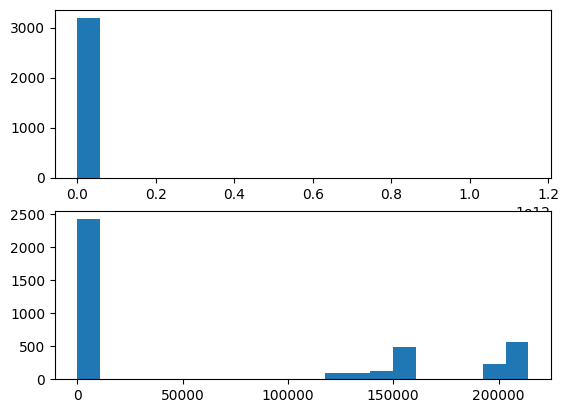

0.98575671875

In [ ]:
trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df,'Autoencoder',partition_id=2,label_col_num = 3)
net = VAE(115,58,29)

for epoch in range(5):
    train_VAE(net, trainloader, 1)
    loss,loss_history= validation_VAE(net, valloader)
    #print(loss,loss_history)
    RE_MED = np.median(loss_history)
    RE_MAD = np.median(np.abs(loss_history - RE_MED))
    threshold = RE_MED + 5*RE_MAD
    print(f"Epoch {epoch+1}: validation loss {loss}")
    print(f'validation_loss_mean:{np.mean(loss_history)},validation_loss_std:{np.std(loss_history)}')
print('BENIGN:')
benign_MSE, benign_MSE_history,false_positive = test_VAE(net, benign_testloader,threshold)
print("ATTACK:")
attack_MSE, attack_MSE_history,true_positive = test_VAE(net, attack_testloader,threshold)
print(f'fpr:{false_positive}')
print(f'tpr:{true_positive}')
print(f"Final test set performance:\n\t benign loss {benign_MSE}")
print(f"Final test set performance:\n\t attack loss {attack_MSE}")
plt.subplot(2,1,1)
plt.hist(benign_MSE_history,bins =20)
plt.subplot(2,1,2)
plt.hist(attack_MSE_history,bins = 20)
plt.show()
plot_roc(benign_MSE_history,attack_MSE_history,False)

In [ ]:
## The first step toward creating a ClientApp is to implement a subclasses of flwr.client.Client or flwr.client.NumPyClient.
## We use NumPyClient in this tutorial because it is easier to implement and requires us to write less boilerplate.
class FlowerClient_Train(NumPyClient):
    def __init__(self, net, partition_id,trainloader, valloader, benign_testloader, attack_testloader):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.benign_testloader = benign_testloader
        self.attack_testloader = attack_testloader
        self.partition_id = partition_id

    def get_parameters(self, config):
        return get_parameters(self.net)
    ## Training
    def fit(self, parameters, config):
      print(f"[Client {self.partition_id}] fit, config: {config}")
      set_parameters(self.net, parameters)
      loss = train_VAE(self.net, self.trainloader, num_epochs=4)
      return get_parameters(self.net), len(self.trainloader), {'train_loss':loss}
    ## Validation on subset of benign data to select threshold
    def evaluate(self, parameters, config):
      print(f"[Client {self.partition_id}] evaluate, config: {config}")
      set_parameters(self.net, parameters)
      loss,val_loss_history = validation_VAE(self.net,self.valloader)
      ## calculate threshold based on MAD to make it more robust to outliers in normal data
      median = np.median(val_loss_history)
      MAD = np.median(np.abs(val_loss_history - median))
      threshold = median +3*MAD
      return float(loss), len(self.valloader), {'Client':self.partition_id,'validation_loss':loss,'validation_threshold':threshold}

In [ ]:
def client_fn_train(context: Context) -> Client:
    """Create a Flower client representing a single organization."""

    # Load model
    #net = Autoencoder(115,58,29).to(DEVICE)
    net = VAE(115,58,29)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data partition
    # Read the node_config to fetch data partition associated to this node
    # The value of partition-id is retrieved from the node_config dictionary in the Context object, which holds the information that persists throughout each training round.
    partition_id = context.node_config["partition-id"]
    trainloader, valloader, benign_testloader,attack_testloader = load_datasets(final_df, 'Autoencoder',partition_id=partition_id,label_col_num = 3)

    # Create a single Flower client representing a single organization
    # FlowerClient is a subclass of NumPyClient, so we need to call .to_client()
    # to convert it to a subclass of `flwr.client.Client`
    return FlowerClient_Train(net, partition_id,trainloader, valloader,benign_testloader,attack_testloader).to_client()


# Create the ClientApp
client = ClientApp(client_fn=client_fn_train)

In [ ]:
global_model_trained = VAE(115,58,29)

In [ ]:
from typing import Union, Optional, Dict
from flwr.server.client_proxy import ClientProxy
from flwr.common import FitRes,Parameters, FitIns
from flwr.server.client_manager import ClientManager

class SaveModelStrategy(FedAvg):
    def aggregate_fit(
        self,
        server_round: int,
        results: List[Tuple[flwr.server.client_proxy.ClientProxy, flwr.common.FitRes]],
        failures: List[Union[Tuple[ClientProxy, FitRes], BaseException]],
    ) -> Tuple[Optional[Parameters], Dict[str, Scalar]]:
        """Aggregate model weights using weighted average and store checkpoint"""

        # Call aggregate_fit from base class (FedAvg) to aggregate parameters and metrics
        aggregated_parameters, aggregated_metrics = super().aggregate_fit(
            server_round, results, failures
        )


        if aggregated_parameters is not None:
            print(f"Saving round {server_round} aggregated_parameters...")

            # Convert `Parameters` to `List[np.ndarray]`
            aggregated_ndarrays: List[np.ndarray] = flwr.common.parameters_to_ndarrays(
                aggregated_parameters
            )

            # Convert `List[np.ndarray]` to PyTorch`state_dict`
            params_dict = zip(global_model_trained.state_dict().keys(), aggregated_ndarrays)
            state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
            global_model_trained.load_state_dict(state_dict, strict=True)

            # Save the model
            torch.save(global_model_trained.state_dict(), f"VAE_model_round_{server_round}.pth")

        return aggregated_parameters, aggregated_metrics


In [ ]:
def server_fn(context: Context) -> ServerAppComponents:
    """Construct components that set the ServerApp behaviour.

    You can use settings in `context.run_config` to parameterize the
    construction of all elements (e.g the strategy or the number of rounds)
    wrapped in the returned ServerAppComponents object.
    """

    # Create FedAvg strategy
    strategy = SaveModelStrategy(
        fraction_fit=1,
        fraction_evaluate=1,
        min_fit_clients=1,
        min_evaluate_clients=1,
        min_available_clients=9,
        evaluate_metrics_aggregation_fn=threshold_selection,  # <-- pass the metric aggregation function, return the max loss in each validation round
        fit_metrics_aggregation_fn=average_loss,
    )

    # Configure the server for 10 rounds of training
    config = ServerConfig(num_rounds=10)

    return ServerAppComponents(strategy=strategy, config=config)

In [ ]:
# Create a new server instance with the updated FedAvg strategy
server = ServerApp(server_fn=server_fn)

# Run simulation
run_simulation(
    server_app=server,
    client_app=client,
    num_supernodes=NUM_CLIENTS,
    backend_config=backend_config,
)

INFO :      Starting Flower ServerApp, config: num_rounds=10, no round_timeout
INFO :      
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=342236) 2024-10-24 01:37:22.718277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=342236) 2024-10-24 01:37:22.773098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=342236) 2024-10-24 01:37:22.789778: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=342240) 2024-10-24 01:37:25.494904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO :      R

(ClientAppActor pid=342240) [Client 0] fit, config: {}
(ClientAppActor pid=342240) Epoch [1/4], Train Loss: 56.1435
(ClientAppActor pid=342232) [Client 7] fit, config: {}
(ClientAppActor pid=342240) Epoch [2/4], Train Loss: 21.2526
(ClientAppActor pid=342239) [Client 1] fit, config: {}
(ClientAppActor pid=342240) Epoch [3/4], Train Loss: 19.0195
(ClientAppActor pid=342232) Epoch [1/4], Train Loss: 155.8586
(ClientAppActor pid=342236) Epoch [1/4], Train Loss: 131.5382
(ClientAppActor pid=342240) [Client 8] fit, config: {} [repeated 6x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(ClientAppActor pid=342239) Epoch [4/4], Train Loss: 58.2961 [repeated 23x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[18.441308975219727, 73.46189880371094, 58.29610061645508, 71.53173828125, 92.65937805175781, 51.675872802734375, 86.10749053955078, 61.04936599731445, 101.15218353271484]
Saving round 1 aggregated_parameters...
(ClientAppActor pid=342240) [Client 2] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.08737159706652164
Client 2 threshold: 0.12888560071587563
Client 4 threshold: 0.10648985579609871
Client 5 threshold: 0.1116507537662983
Client 6 threshold: 0.33131067268550396
Client 8 threshold: 0.10097280889749527
Client 7 threshold: 0.1787952557206154
Client 3 threshold: 0.13937057554721832
Client 1 threshold: 0.1389838457107544
(ClientAppActor pid=342240) [Client 0] fit, config: {}
(ClientAppActor pid=342237) Epoch [4/4], Train Loss: 101.1522 [repeated 8x across cluster]
(ClientAppActor pid=342240) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342232) [Client 5] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=342235) Epoch [2/4], Train Loss: 65.5883 [repeated 16x across cluster]
(ClientAppActor pid=342240) [Client 8] fit, config: {}
(ClientAppActor pid=342240) Epoch [3/4], Train Loss: 49.1694 [repeated 19x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[66.13458251953125, 48.90382385253906, 80.78243255615234, 53.23347091674805, 59.729244232177734, 18.189393997192383, 57.716392517089844, 86.79006958007812, 81.38693237304688]
Saving round 2 aggregated_parameters...
(ClientAppActor pid=342239) [Client 5] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.368603840470314
Client 2 threshold: 0.27867456525564194
Client 5 threshold: 0.24761249870061874
Client 0 threshold: 0.10383445397019386
Client 7 threshold: 0.40350309014320374
Client 6 threshold: 0.7002510502934456
Client 1 threshold: 0.47797276079654694
Client 8 threshold: 0.21223917603492737
Client 4 threshold: 0.26010144501924515
(ClientAppActor pid=342238) [Client 6] fit, config: {}
(ClientAppActor pid=342235) Epoch [1/4], Train Loss: 50.3028 [repeated 3x across cluster]
(ClientAppActor pid=342239) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342239) [Client 3] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342236) Epoch [3/4], Train Loss: 59.0034 [repeated 24x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[58.8444709777832, 47.97134780883789, 18.183700561523438, 80.84400939941406, 79.3065414428711, 54.82101058959961, 79.52493286132812, 65.79949188232422, 52.38573455810547]
Saving round 3 aggregated_parameters...
(ClientAppActor pid=342237) [Client 4] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.5612032264471054
Client 2 threshold: 0.35225457698106766
Client 1 threshold: 0.6119977533817291
Client 8 threshold: 0.26184504479169846
Client 5 threshold: 0.32659849524497986
Client 6 threshold: 0.924463540315628
Client 3 threshold: 0.4628728926181793
Client 4 threshold: 0.34155072271823883
Client 0 threshold: 0.1258583664894104
(ClientAppActor pid=342237) [Client 3] fit, config: {}
(ClientAppActor pid=342239) Epoch [4/4], Train Loss: 79.5249 [repeated 10x across cluster]
(ClientAppActor pid=342237) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342235) [Client 0] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=342232) Epoch [3/4], Train Loss: 65.9125 [repeated 19x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=342236) [Client 8] fit, config: {}
[65.64248657226562, 80.66419219970703, 78.88197326660156, 47.54999923706055, 53.94792938232422, 57.59165573120117, 18.204626083374023, 79.86894226074219, 52.745018005371094]
Saving round 4 aggregated_parameters...
(ClientAppActor pid=342232) [Client 6] evaluate, config: {}
(ClientAppActor pid=342236) Epoch [4/4], Train Loss: 47.5500 [repeated 17x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 8 threshold: 0.26320217549800873
Client 3 threshold: 0.46727682650089264
Client 0 threshold: 0.1269429624080658
Client 4 threshold: 0.34962594509124756
Client 5 threshold: 0.34434783458709717
Client 6 threshold: 0.8386837467551231
Client 2 threshold: 0.35973314940929413
Client 7 threshold: 0.5603139400482178
Client 1 threshold: 0.628434807062149
(ClientAppActor pid=342240) [Client 0] fit, config: {}
(ClientAppActor pid=342240) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342238) Epoch [2/4], Train Loss: 77.4835 [repeated 16x across cluster]
(ClientAppActor pid=342236) [Client 8] fit, config: {} [repeated 8x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[58.51145553588867, 65.6212387084961, 53.6205940246582, 52.458351135253906, 76.85745239257812, 47.533729553222656, 80.4541015625, 74.38703155517578, 18.208982467651367]
Saving round 5 aggregated_parameters...
(ClientAppActor pid=342236) Epoch [4/4], Train Loss: 47.5337 [repeated 20x across cluster]
(ClientAppActor pid=342236) [Client 0] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 6 threshold: 0.7650454491376877
Client 3 threshold: 0.4440806955099106
Client 8 threshold: 0.27214713394641876
Client 0 threshold: 0.1266089752316475
Client 2 threshold: 0.337067149579525
Client 4 threshold: 0.3559516668319702
Client 7 threshold: 0.6077830493450165
Client 1 threshold: 0.6139044165611267
Client 5 threshold: 0.3363017588853836
(ClientAppActor pid=342236) [Client 7] fit, config: {}
(ClientAppActor pid=342234) 
(ClientAppActor pid=342234) Epoch [2/4], Train Loss: 81.2322 [repeated 11x across cluster]
(ClientAppActor pid=342235) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342232) [Client 6] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=342237) Epoch [3/4], Train Loss: 47.7272 [repeated 24x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[47.63016891479492, 79.34507751464844, 65.61216735839844, 71.98222351074219, 58.63094711303711, 18.230667114257812, 52.65282440185547, 53.69798278808594, 80.73921203613281]
Saving round 6 aggregated_parameters...
(ClientAppActor pid=342235) [Client 5] evaluate, config: {}
(ClientAppActor pid=342237) [Client 8] fit, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 3 threshold: 0.4418645650148392
Client 2 threshold: 0.36633096635341644
Client 1 threshold: 0.6474361419677734
Client 6 threshold: 0.8496680036187172
Client 8 threshold: 0.26200708001852036
Client 7 threshold: 0.582801952958107
Client 5 threshold: 0.3550855964422226
Client 0 threshold: 0.1220669224858284
Client 4 threshold: 0.36385180056095123
(ClientAppActor pid=342240) [Client 0] fit, config: {}
(ClientAppActor pid=342232) Epoch [1/4], Train Loss: 66.0653 [repeated 9x across cluster]
(ClientAppActor pid=342240) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342238) [Client 1] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=342239) Epoch [4/4], Train Loss: 57.5739 [repeated 24x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[57.57394790649414, 51.93053436279297, 79.97882843017578, 75.22836303710938, 65.57841491699219, 18.22308349609375, 47.533206939697266, 70.12300109863281, 53.332088470458984]
Saving round 7 aggregated_parameters...
(ClientAppActor pid=342235) [Client 8] fit, config: {}
(ClientAppActor pid=342236) [Client 4] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 7 threshold: 0.5660194903612137
Client 1 threshold: 0.6132473945617676
Client 4 threshold: 0.3650558739900589
Client 3 threshold: 0.4318905621767044
Client 2 threshold: 0.37097975611686707
Client 6 threshold: 0.8336027786135674
Client 8 threshold: 0.2631800100207329
Client 5 threshold: 0.35622330009937286
Client 0 threshold: 0.12192979454994202
(ClientAppActor pid=342236) [Client 4] fit, config: {}
(ClientAppActor pid=342235) Epoch [4/4], Train Loss: 47.5332 [repeated 4x across cluster]
(ClientAppActor pid=342240) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342238) [Client 8] fit, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342238) Epoch [4/4], Train Loss: 52.1704 [repeated 25x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[76.04584503173828, 79.69205474853516, 18.20578956604004, 71.68955993652344, 65.42132568359375, 47.52394104003906, 52.17036437988281, 57.933990478515625, 53.63218307495117]
Saving round 8 aggregated_parameters...
(ClientAppActor pid=342237) [Client 5] evaluate, config: {}
(ClientAppActor pid=342238) Epoch [4/4], Train Loss: 47.5239 [repeated 11x across cluster]


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 4 threshold: 0.3835543543100357
Client 5 threshold: 0.3757122755050659
Client 3 threshold: 0.4462548643350601
Client 8 threshold: 0.27332260459661484
Client 2 threshold: 0.37679824233055115
Client 1 threshold: 0.5943085253238678
Client 7 threshold: 0.6206373572349548
Client 0 threshold: 0.12587785348296165
Client 6 threshold: 0.8259234726428986
(ClientAppActor pid=342240) [Client 4] fit, config: {}
(ClientAppActor pid=342237) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342240) Epoch [2/4], Train Loss: 58.7284 [repeated 15x across cluster]
(ClientAppActor pid=342234) [Client 1] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=342235) Epoch [3/4], Train Loss: 47.5915 [repeated 20x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


[52.6585693359375, 78.48896026611328, 18.22852897644043, 47.5904426574707, 53.02779006958008, 72.7996597290039, 57.960777282714844, 79.47550201416016, 65.33769989013672]
Saving round 9 aggregated_parameters...
(ClientAppActor pid=342238) [Client 6] evaluate, config: {}
(ClientAppActor pid=342235) [Client 8] fit, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 9 clients (out of 9)


Client 0 threshold: 0.1390211023390293
Client 3 threshold: 0.44403839111328125
Client 1 threshold: 0.5362009704113007
Client 8 threshold: 0.2981419414281845
Client 2 threshold: 0.36762456595897675
Client 7 threshold: 0.6651841551065445
Client 5 threshold: 0.3805890381336212
Client 6 threshold: 0.8401494324207306
Client 4 threshold: 0.38790781795978546
(ClientAppActor pid=342232) [Client 7] fit, config: {}
(ClientAppActor pid=342234) Epoch [2/4], Train Loss: 52.5513 [repeated 10x across cluster]
(ClientAppActor pid=342237) [Client 8] evaluate, config: {} [repeated 8x across cluster]
(ClientAppActor pid=342235) [Client 4] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=342234) Epoch [2/4], Train Loss: 48.0569 [repeated 25x across cluster]


INFO :      aggregate_fit: received 9 results and 0 failures
INFO :      configure_evaluate: strategy sampled 9 clients (out of 9)


(ClientAppActor pid=342234) [Client 8] fit, config: {}
[76.67377471923828, 69.2315902709961, 18.261592864990234, 57.06829833984375, 65.53272247314453, 52.6564826965332, 52.370609283447266, 78.98963165283203, 47.5084342956543]
Saving round 10 aggregated_parameters...
(ClientAppActor pid=342237) [Client 2] evaluate, config: {}


INFO :      aggregate_evaluate: received 9 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 10 round(s) in 131.72s
INFO :      	History (loss, distributed):
INFO :      		round 1: 53336152.08736234
INFO :      		round 2: 54742689.74271626
INFO :      		round 3: 60499875.727845125
INFO :      		round 4: 65878929.67556262
INFO :      		round 5: 67403900.40476637
INFO :      		round 6: 68074416.67154412
INFO :      		round 7: 74559654.24809372
INFO :      		round 8: 72132418.05726296
INFO :      		round 9: 75816280.23736538
INFO :      		round 10: 75421985.51525071
INFO :      	History (metrics, distributed, fit):
INFO :      	{'train_loss': [(1, 68.26392640007867),
INFO :      	                (2, 61.42959361606174),
INFO :      	                (3, 59.742360009087456),
INFO :      	                (4, 59.45520252651639),
INFO :      	                (5, 58.62810410393609),
INFO :      	                (6, 58.724585639105904),
INFO :      	              

Client 6 threshold: 0.8564375340938568
Client 4 threshold: 0.3962741643190384
Client 2 threshold: 0.3895636722445488
Client 1 threshold: 0.5358549356460571
Client 3 threshold: 0.4423791319131851
Client 0 threshold: 0.12781693413853645
Client 7 threshold: 0.6387120932340622
Client 8 threshold: 0.2737944945693016
Client 5 threshold: 0.38992318511009216
(ClientAppActor pid=342234) Epoch [4/4], Train Loss: 47.5084 [repeated 2x across cluster]
(ClientAppActor pid=342236) [Client 8] evaluate, config: {} [repeated 8x across cluster]


(pid=342239) 2024-10-24 01:37:22.977535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 7x across cluster]
(pid=342239) 2024-10-24 01:37:23.072836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered [repeated 7x across cluster]
(pid=342239) 2024-10-24 01:37:23.097471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered [repeated 7x across cluster]
(pid=342239) 2024-10-24 01:37:26.113521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT [repeated 7x across cluster]


In [ ]:
# Example usage
input_dim = 115
hidden_dim = 64
latent_dim = 32
vae = VAE(input_dim=input_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)

# Dummy input tensor with batch size of 10
x = torch.randn(10, input_dim)

# Forward pass
reconstruction, mean, logvar = vae(x)

# Calculate loss
loss = vae_loss(reconstruction, x, mean, logvar)
print(f'Loss: {loss.item()}')

## **Loading UNSW-15 dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset

NUM_CLIENTS = 9
BATCH_SIZE = 32


def load_datasets_unsw(dataset,model_type:str,partition_id: int,label_col_num:int):
    partition = dataset.loc[dataset['client_id'] == partition_id+1]
    feature_columns = partition.columns[:-label_col_num]
    partition_train_test = {}
    if model_type == 'Autoencoder':
      # select normal data profile to train
      partition_benign = partition.loc[partition['label']==0]
      #print(partition_benign)
      partition_attack = partition.loc[partition['label']==1]
      partition_train_test['train'] = partition_benign.iloc[:int(0.39*len(partition_benign))-1]
      partition_train_test['val'] = partition_benign.iloc[int(0.39*len(partition_benign)):int(0.78*len(partition_benign))]
      #partition_train_test['test_benign'] = pd.concat([partition_benign.iloc[int(0.8*len(partition_benign)):],partition_attack.iloc[:len(partition_benign)]])
      partition_train_test['test_benign'] = partition_benign.iloc[int(0.8*len(partition_benign)):]
      partition_train_test['test_attack'] = partition_attack.iloc[:len(partition_benign)]
    scaler = MinMaxScaler()
    scaler.fit(partition_train_test['train'][feature_columns])
    X_train = torch.tensor(scaler.transform(partition_train_test['train'][feature_columns]))
    #print(f'train_max:{X_train.max()}')
    y_train = torch.tensor(partition_train_test['train']['label'].values)
    X_val = torch.tensor(scaler.transform(partition_train_test['val'][feature_columns]))
    y_val = torch.tensor(partition_train_test['val']['label'].values)
    #print(f'val_max:{X_val.max()}')
    X_test_benign = torch.tensor(scaler.transform(partition_train_test['test_benign'][feature_columns]))
    y_test_benign = torch.tensor(partition_train_test['test_benign']['label'].values)
    #print(f'benign_max:{X_test_benign.max()}')
    X_test_attack = torch.tensor(scaler.transform(partition_train_test['test_attack'][feature_columns]))
    y_test_attack = torch.tensor(partition_train_test['test_attack']['label'].values)
    #print(f'attack_max:{X_test_attack.max()}')
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_benign_dataset = TensorDataset(X_test_benign, y_test_benign)
    test_attack_dataset = TensorDataset(X_test_attack, y_test_attack)
    trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
    valloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    benign_testloader = DataLoader(test_benign_dataset, batch_size=BATCH_SIZE)
    attack_testloader = DataLoader(test_attack_dataset, batch_size=BATCH_SIZE)
    return trainloader, valloader, benign_testloader, attack_testloader

## **Try implement client-specific learning configuration**

In [ ]:
from flwr.common import (
    Code,
    EvaluateIns,
    EvaluateRes,
    FitIns,
    FitRes,
    GetParametersIns,
    GetParametersRes,
    Status,
    ndarrays_to_parameters,
    parameters_to_ndarrays,
)


class FlowerClient(Client):
    def __init__(self, partition_id, net, trainloader, valloader):
        self.partition_id = partition_id
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, ins: GetParametersIns) -> GetParametersRes:
        print(f"[Client {self.partition_id}] get_parameters")

        # Get parameters as a list of NumPy ndarray's
        ndarrays: List[np.ndarray] = get_parameters(self.net)

        # Serialize ndarray's into a Parameters object
        parameters = ndarrays_to_parameters(ndarrays)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return GetParametersRes(
            status=status,
            parameters=parameters,
        )

    def fit(self, ins: FitIns) -> FitRes:
        print(f"[Client {self.partition_id}] fit, config: {ins.config}")

        # Deserialize parameters to NumPy ndarray's
        parameters_original = ins.parameters
        ndarrays_original = parameters_to_ndarrays(parameters_original)

        # Update local model, train, get updated parameters
        set_parameters(self.net, ndarrays_original)
        train(self.net, self.trainloader, epochs=1)
        ndarrays_updated = get_parameters(self.net)

        # Serialize ndarray's into a Parameters object
        parameters_updated = ndarrays_to_parameters(ndarrays_updated)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return FitRes(
            status=status,
            parameters=parameters_updated,
            num_examples=len(self.trainloader),
            metrics={},
        )

    def evaluate(self, ins: EvaluateIns) -> EvaluateRes:
        print(f"[Client {self.partition_id}] evaluate, config: {ins.config}")

        # Deserialize parameters to NumPy ndarray's
        parameters_original = ins.parameters
        ndarrays_original = parameters_to_ndarrays(parameters_original)

        set_parameters(self.net, ndarrays_original)
        loss, accuracy = test(self.net, self.valloader)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return EvaluateRes(
            status=status,
            loss=float(loss),
            num_examples=len(self.valloader),
            metrics={"accuracy": float(accuracy)},
        )


def client_fn(context: Context) -> Client:
    net = Net().to(DEVICE)
    partition_id = context.node_config["partition-id"]
    num_partitions = context.node_config["num-partitions"]
    trainloader, valloader, _ = load_datasets(partition_id, num_partitions)
    return FlowerClient(partition_id, net, trainloader, valloader).to_client()


# Create the ClientApp
client = ClientApp(client_fn=client_fn)